# Исследование недвижимости

## <a class="anchor" id="1"><div class="alert alert-block alert-success">Навигация:
[Задание](#2)<br>
[Описание датасета](#3)<br>
[Задание 1](#4)<br>
[Знакомство с данными](#5)<br>
[1. Приведем столбец с датой в соответствующий формат.](#6)<br>
[2. Исследуем столбец с ценой.](#7)<br>
[Задание 2](#8)<br>
[Задание 3](#9)<br>
[Задание 4](#10)<br>
[Задание 5](#11)<br>
[Задание 6](#12)<br>
[Задание 7](#13)<br>
[1. Соотношение площади кухни к общей площади.](#14)<br>
[2. Стоимость квартир в Москве больше, чем в Санкт-Петербурге.](#15)<br>
[Задание 8](#16)<br>

## <a class="anchor" id="2"><div class="alert alert-block alert-success">Задание

1. Познакомьтесь с данными.
2. Добавьте информацию из датасета region.csv.
3. Восстановите пропуски в столбце kitchen_area. 
4. Исследуйте рынок недвижимости в РФ за представленный период. Величина исследования - цена за м2. Обработайте аномалии.
5. Когда выгодно покупать/продавать объект недвижимости? 
6. Определите от каких признаков зависит стоимость объекта недвижимости. Найдите скрытые закономерности.
7. Выдвинете и проверьте собственную гипотезу статистическими методами.
8. Создайте модель прогноза цены объекта недвижимости.

## <a class="anchor" id="3"><div class="alert alert-block alert-success">Описание датасета

Описание датасета realty_18_21.csv<br>
date - дата объявления<br>
region - Регион<br>
building_type - Тип дома 0 - Другое. 1 - Панельный. 2 - Кирпично-монолитный. 3 - Кирпичный. 4 - Блочный 5 - Деревянный<br>
object_type -  1 - Вторичный рынок; 11 - Первичный рынок;<br>
level - Этаж<br>
levels - Число этажей<br>
rooms - Число комнат, где -1 означает студия<br>
area - Общая площадь<br>
kitchen_area - Площадь кухни<br>
price - Цена в руб.<br>

## <a class="anchor" id="4"><div class="alert alert-block alert-info">Задание №1

## <a class="anchor" id="5"><div class="alert alert-block alert-info">Познакомьтесь с данными.

In [1]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import t, norm
from scipy import stats as st
from scipy import stats
from scipy.stats import boxcox
from scipy.stats import mannwhitneyu

In [2]:
# загрузим данные
df = pd.read_csv('realty_18_21.csv', sep = ',')
df

price        date  region  building_type  level  levels  rooms  \
0         6050000  2018-02-19    2661              1      8      10      3   
1         8650000  2018-02-27      81              3      5      24      2   
2         4000000  2018-02-28    2871              1      5       9      3   
3         1850000  2018-03-01    2843              4     12      16      2   
4         5450000  2018-03-01      81              3     13      14      2   
...           ...         ...     ...            ...    ...     ...    ...   
5477001  19739760  2021-05-01       3              1      8      17      4   
5477002  12503160  2021-05-01       3              2     17      32      2   
5477003   8800000  2021-05-01    2871              2      4      17      3   
5477004  11831910  2021-05-01       3              1      8      33      2   
5477005  13316200  2021-05-01       3              2     10      23      2   

         area  kitchen_area  object_type  
0        82.6          10.8            1  
1        69.1          12.0            1  
2        66.0          10.0            1  
3        38.0           5.0           11  
4        60.0          10.0            1  
...       ...           ...          ...  
5477001  93.2          13.8           11  
5477002  45.9           6.6           11  
5477003  86.5          11.8            1  
5477004  52.1          18.9           11  
5477005  55.6          20.8           11  

[5477006 rows x 10 columns]

In [3]:
# посмотрим информацию о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5477006 entries, 0 to 5477005
Data columns (total 10 columns):
 #   Column         Dtype  
---  ------         -----  
 0   price          int64  
 1   date           object 
 2   region         int64  
 3   building_type  int64  
 4   level          int64  
 5   levels         int64  
 6   rooms          int64  
 7   area           float64
 8   kitchen_area   float64
 9   object_type    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 417.9+ MB


## <a class="anchor" id="6"><div class="alert alert-block alert-info">1. Приведем столбец с датой в соответствующий формат.

In [4]:
# преобразовываем в тип datetime
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df.head()

price       date  region  building_type  level  levels  rooms  area  \
0  6050000 2018-02-19    2661              1      8      10      3  82.6   
1  8650000 2018-02-27      81              3      5      24      2  69.1   
2  4000000 2018-02-28    2871              1      5       9      3  66.0   
3  1850000 2018-03-01    2843              4     12      16      2  38.0   
4  5450000 2018-03-01      81              3     13      14      2  60.0   

   kitchen_area  object_type  
0          10.8            1  
1          12.0            1  
2          10.0            1  
3           5.0           11  
4          10.0            1

In [5]:
# проверим преобразование
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5477006 entries, 0 to 5477005
Data columns (total 10 columns):
 #   Column         Dtype         
---  ------         -----         
 0   price          int64         
 1   date           datetime64[ns]
 2   region         int64         
 3   building_type  int64         
 4   level          int64         
 5   levels         int64         
 6   rooms          int64         
 7   area           float64       
 8   kitchen_area   float64       
 9   object_type    int64         
dtypes: datetime64[ns](1), float64(2), int64(7)
memory usage: 417.9 MB


[Вернуться к Навигации](#1)

## <a class="anchor" id="7"><div class="alert alert-block alert-info">2. Исследуем столбец с ценой.

In [6]:
# посмотрим есть ли записи с нулевой и отрицательной ценой на квартиру
df[df['price'] <= 0]

price       date  region  building_type  level  levels  rooms  \
43821   -1633967296 2018-09-14    5520              1     13      22      1   
43822   -1633967296 2018-09-14    5520              1     14      22      1   
179212            0 2018-10-01    6817              3      5      10      3   
199895   -429242296 2018-10-04    9654              2      5      25      2   
208483  -1744967296 2018-10-06    9654              3      4       5      2   
...             ...        ...     ...            ...    ...     ...    ...   
5382188 -2041757296 2021-04-23    2604              3      2       4      1   
5382595 -1794967296 2021-04-23      81              1      4       5      2   
5398253 -1494967296 2021-04-26    2843              3      3       3      1   
5419426 -2094967296 2021-04-27    3991              3     14      19      1   
5447885  -344967296 2021-04-30    2359              1      7       9      4   

           area  kitchen_area  object_type  
43821     38.92           NaN           11  
43822     38.92         17.26           11  
179212   104.00         15.00            1  
199895    57.27          9.31           11  
208483    45.00          6.00            1  
...         ...           ...          ...  
5382188   41.08          9.31           11  
5382595   56.00          9.00            1  
5398253   45.00         17.00           11  
5419426   30.00          8.00            1  
5447885   67.20          9.20            1  

[388 rows x 10 columns]

In [7]:
# посмотрим есть ли записи с нулевой ценой на квартиру
df[df['price'] == 0]

price       date  region  building_type  level  levels  rooms   area  \
179212       0 2018-10-01    6817              3      5      10      3  104.0   
386071       0 2018-10-31    2922              1      5       5      2   55.0   
533137       0 2018-11-21    3991              1      2       9      3   94.0   
1193624      0 2019-02-20    3230              3      1       3      2   57.0   
1302153      0 2019-03-04    2604              3      1       2      2   40.5   
1431531      0 2019-03-23    5520              3      5       5      4   61.4   
1766269      0 2019-05-09      81              3      2       3     -1  109.5   
1838690      0 2019-05-22       3              3      1       6     -1  137.0   
1905050      0 2019-05-31      81              2     12      17     -1   46.6   
1962361      0 2019-06-09    2843              3      1       1      2   65.0   
2171607      0 2019-07-09    2922              1      2       9      2   51.0   
2172626      0 2019-07-09    4007              2     10      17      1   42.0   
2245450      0 2019-07-22    4417              1      5       9      3   72.0   
2372650      0 2019-08-11    4417              1      9       9      3   67.0   
2645016      0 2019-09-27    4417              3      1       5      1   40.0   
2879832      0 2019-11-13    9648              3      2       5      3   60.0   
2882033      0 2019-11-14    9648              4      1       9      3   84.0   
3122592      0 2020-01-12    9648              3      1       5      1   40.0   
3122594      0 2020-01-12    9648              1      4       5      2   45.0   
3122595      0 2020-01-12    9648              1      1       9      1   30.0   
3788528      0 2020-05-26    2661              1      1       9      3   60.0   
4264807      0 2020-08-11    9648              3      4       5      4   63.0   
4771415      0 2020-11-29    7929              3      9      10      1   39.0   

         kitchen_area  object_type  
179212           15.0            1  
386071            8.0            1  
533137           16.0            1  
1193624           9.0           11  
1302153           5.3            1  
1431531          11.4            1  
1766269          20.0           11  
1838690          18.0            1  
1905050          12.0           11  
1962361           NaN            1  
2171607           9.0            1  
2172626          12.3           11  
2245450           9.5            1  
2372650           9.0            1  
2645016          10.0            1  
2879832           6.0            1  
2882033          14.0            1  
3122592           9.0            1  
3122594           6.0            1  
3122595           7.0            1  
3788528           7.0            1  
4264807           8.0            1  
4771415          10.0            1

In [8]:
# посмотрим количество строк с нулевой ценой
df[df['price'] == 0].count()

price            23
date             23
region           23
building_type    23
level            23
levels           23
rooms            23
area             23
kitchen_area     22
object_type      23
dtype: int64

Тут всего 388 строк, это всего 0,0007%, поэтому я считаю возможным это удалить. Нулевую цену тоже удаляю, т.к. это невозможно и там всего 23 строки.

In [9]:
# перезапишем датасет без нулевой или отрицательной цены
df = df[df['price'] > 0]
df

price       date  region  building_type  level  levels  rooms  \
0         6050000 2018-02-19    2661              1      8      10      3   
1         8650000 2018-02-27      81              3      5      24      2   
2         4000000 2018-02-28    2871              1      5       9      3   
3         1850000 2018-03-01    2843              4     12      16      2   
4         5450000 2018-03-01      81              3     13      14      2   
...           ...        ...     ...            ...    ...     ...    ...   
5477001  19739760 2021-05-01       3              1      8      17      4   
5477002  12503160 2021-05-01       3              2     17      32      2   
5477003   8800000 2021-05-01    2871              2      4      17      3   
5477004  11831910 2021-05-01       3              1      8      33      2   
5477005  13316200 2021-05-01       3              2     10      23      2   

         area  kitchen_area  object_type  
0        82.6          10.8            1  
1        69.1          12.0            1  
2        66.0          10.0            1  
3        38.0           5.0           11  
4        60.0          10.0            1  
...       ...           ...          ...  
5477001  93.2          13.8           11  
5477002  45.9           6.6           11  
5477003  86.5          11.8            1  
5477004  52.1          18.9           11  
5477005  55.6          20.8           11  

[5476618 rows x 10 columns]

Остальные проблемы в данных оставим до 3 задания, после заполнения в пропусках.

## <a class="anchor" id="40"><div class="alert alert-block alert-info">Выводы:
1. Столбец с датой был приведён к нужному типу данных (datetime64[ns]).
2. Были найдены и удалены строки с ценой 0 и отрицательной ценой, что составляло 388 строк (0,0007%).

[Вернуться к Навигации](#1)

## <a class="anchor" id="8"><div class="alert alert-block alert-info">Задание №2

## <a class="anchor" id="2"><div class="alert alert-block alert-info">Добавьте информацию из датасета region.csv.

In [10]:
# загрузим дополнительный датасет с регионами
df1 = pd.read_csv('region.csv', sep = ',')
df1

code                      reg_name
0    2661               Санкт-Петербург
1    3446         Ленинградская область
2       3                        Москва
3      81            Московская область
4    2843            Краснодарский край
..    ...                           ...
78  16705           Магаданская область
79     69  Еврейская автономная область
80   4963               Приморский край
81   1901           Сахалинская область
82  61888     Ненецкий автономный округ

[83 rows x 2 columns]

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   code      83 non-null     object
 1   reg_name  83 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


In [12]:
# создадим список уникальных значений 
un = df['region'].unique().tolist()
un

[2661,
 81,
 2871,
 2843,
 3,
 3106,
 2922,
 2900,
 2722,
 6171,
 3230,
 4417,
 5282,
 5368,
 3446,
 5520,
 6817,
 9579,
 2604,
 1010,
 9648,
 7793,
 13919,
 2860,
 3019,
 4982,
 5241,
 3870,
 3991,
 2359,
 9654,
 2072,
 8090,
 4007,
 11171,
 10160,
 7873,
 2594,
 8509,
 11416,
 11991,
 2880,
 5178,
 13913,
 6309,
 5952,
 6543,
 2328,
 5993,
 2484,
 13098,
 4240,
 5789,
 1901,
 14880,
 10201,
 1491,
 2885,
 5794,
 2528,
 4374,
 4695,
 5143,
 6937,
 2806,
 14368,
 5736,
 7121,
 4086,
 821,
 10582,
 7896,
 8640,
 5703,
 8894,
 4249,
 3153,
 4189,
 2814,
 7929,
 16705,
 69,
 4963,
 61888]

In [13]:
# создадим список уникальных значений 
ur = df1['code'].unique().tolist()
ur

['2661',
 '3446',
 '3',
 '81',
 '2843',
 '2871',
 '3230',
 '3106',
 '2922',
 '2900',
 '2722',
 '6171',
 '4417',
 '5282',
 '5368',
 '5520',
 '6817',
 '9579',
 '2604',
 '1010',
 '7793',
 '13919',
 '2860',
 '3019',
 '4982',
 '9648',
 '5241',
 '3870',
 '3991',
 '2359',
 '9654',
 '2072',
 '8090',
 '4007',
 '11171',
 '10160',
 '7873, 6937',
 '2594',
 '8509',
 '11416',
 '11991',
 '5178',
 '13913',
 '6309',
 '5952',
 '6543',
 '2880',
 '5993',
 '2484',
 '4240',
 '5789',
 '14880',
 '1491',
 '2885',
 '5794',
 '2528',
 '4374',
 '4695',
 '2328',
 '5143',
 '2806',
 '14368',
 '5736',
 '7121',
 '4086',
 '821',
 '10582',
 '7896',
 '8640',
 '5703',
 '10201',
 '4249',
 '3153',
 '4189',
 '2814',
 '13098',
 '8894',
 '7929',
 '16705',
 '69',
 '4963',
 '1901',
 '61888']

Тут найдена проблема: два кода написаны через запятую.

In [14]:
# посмотрим датасет
df1[df1['code'] == '7873, 6937']

code         reg_name
36  7873, 6937  Республика Крым

In [15]:
# посмотрим те же коды в данном датасете
df[df['region'] == '7873, 6937']

Empty DataFrame
Columns: [price, date, region, building_type, level, levels, rooms, area, kitchen_area, object_type]
Index: []

In [16]:
# посмотрим те же коды в данном датасете
df[df['region'] == 7873]

price       date  region  building_type  level  levels  rooms  \
1558      2150000 2018-09-08    7873              4      3       4      1   
425671     911240 2018-11-06    7873              1      2       3      1   
429326    3000000 2018-11-06    7873              4      2       3      1   
598574    4600000 2018-11-29    7873              1      8       9      2   
598603    1500000 2018-11-29    7873              3      1       1      1   
...           ...        ...     ...            ...    ...     ...    ...   
5390488   6800000 2021-04-24    7873              4      8       9      3   
5395302  10700000 2021-04-25    7873              2      2      10      3   
5407317   6300000 2021-04-26    7873              4      1       5      1   
5438307   7000000 2021-04-29    7873              2      2      10      2   
5454433   1400000 2021-04-30    7873              2      2       3     -1   

         area  kitchen_area  object_type  
1558     46.0          13.0            1  
425671   24.0           NaN           11  
429326   60.0           5.0            1  
598574   55.8           7.0            1  
598603   21.0           5.5            1  
...       ...           ...          ...  
5390488  72.0          13.0            1  
5395302  96.0          16.0            1  
5407317  43.0           9.0            1  
5438307  63.0          14.0            1  
5454433  22.0           NaN            1  

[2241 rows x 10 columns]

In [17]:
# посмотрим те же коды в данном датасете
df[df['region'] == 6937]

price       date  region  building_type  level  levels  rooms  \
326778    1250000 2018-10-22    6937              1      4       5      1   
419171    2000000 2018-11-05    6937              4      1       2      3   
462316    4500000 2018-11-12    6937              2      2       4      1   
598523    6550000 2018-11-29    6937              2     12      15      2   
598524   11509875 2018-11-29    6937              2      5       9      1   
...           ...        ...     ...            ...    ...     ...    ...   
5475529   9500000 2021-05-01    6937              2      6       9      3   
5476096   4500000 2021-05-01    6937              1      5       5      3   
5476107   7200000 2021-05-01    6937              4      9       9      3   
5476899   4400000 2021-05-01    6937              4      2       5      3   
5476923  15500000 2021-05-01    6937              2      6       7      2   

         area  kitchen_area  object_type  
326778   39.0           8.0            1  
419171   80.0          15.0            1  
462316   39.0           9.0            1  
598523   50.6          10.0            1  
598524   39.4          10.0            1  
...       ...           ...          ...  
5475529  76.0          10.0            1  
5476096  54.0           5.0            1  
5476107  70.0          40.0            1  
5476899  64.0           6.2            1  
5476923  82.0          38.7           11  

[4700 rows x 10 columns]

Сделаем так, что у Республики Крым будет два кода, по этому принципу датасет и заполним.

Проблема еще в том, что в df у стобца с регионом тип данных int, а у df1 object. Исправим это.

In [18]:
df['region'] = df['region'].astype(str)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14492\3070303094.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['region'] = df['region'].astype(str)


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5476618 entries, 0 to 5477005
Data columns (total 10 columns):
 #   Column         Dtype         
---  ------         -----         
 0   price          int64         
 1   date           datetime64[ns]
 2   region         object        
 3   building_type  int64         
 4   level          int64         
 5   levels         int64         
 6   rooms          int64         
 7   area           float64       
 8   kitchen_area   float64       
 9   object_type    int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(1)
memory usage: 459.6+ MB


In [20]:
# создадим список уникальных значений 
un = df['region'].astype(str).unique().tolist()
un

['2661',
 '81',
 '2871',
 '2843',
 '3',
 '3106',
 '2922',
 '2900',
 '2722',
 '6171',
 '3230',
 '4417',
 '5282',
 '5368',
 '3446',
 '5520',
 '6817',
 '9579',
 '2604',
 '1010',
 '9648',
 '7793',
 '13919',
 '2860',
 '3019',
 '4982',
 '5241',
 '3870',
 '3991',
 '2359',
 '9654',
 '2072',
 '8090',
 '4007',
 '11171',
 '10160',
 '7873',
 '2594',
 '8509',
 '11416',
 '11991',
 '2880',
 '5178',
 '13913',
 '6309',
 '5952',
 '6543',
 '2328',
 '5993',
 '2484',
 '13098',
 '4240',
 '5789',
 '1901',
 '14880',
 '10201',
 '1491',
 '2885',
 '5794',
 '2528',
 '4374',
 '4695',
 '5143',
 '6937',
 '2806',
 '14368',
 '5736',
 '7121',
 '4086',
 '821',
 '10582',
 '7896',
 '8640',
 '5703',
 '8894',
 '4249',
 '3153',
 '4189',
 '2814',
 '7929',
 '16705',
 '69',
 '4963',
 '61888']

In [21]:
# создадим список уникальных значений 
ur = df1['code'].unique().tolist()
ur

['2661',
 '3446',
 '3',
 '81',
 '2843',
 '2871',
 '3230',
 '3106',
 '2922',
 '2900',
 '2722',
 '6171',
 '4417',
 '5282',
 '5368',
 '5520',
 '6817',
 '9579',
 '2604',
 '1010',
 '7793',
 '13919',
 '2860',
 '3019',
 '4982',
 '9648',
 '5241',
 '3870',
 '3991',
 '2359',
 '9654',
 '2072',
 '8090',
 '4007',
 '11171',
 '10160',
 '7873, 6937',
 '2594',
 '8509',
 '11416',
 '11991',
 '5178',
 '13913',
 '6309',
 '5952',
 '6543',
 '2880',
 '5993',
 '2484',
 '4240',
 '5789',
 '14880',
 '1491',
 '2885',
 '5794',
 '2528',
 '4374',
 '4695',
 '2328',
 '5143',
 '2806',
 '14368',
 '5736',
 '7121',
 '4086',
 '821',
 '10582',
 '7896',
 '8640',
 '5703',
 '10201',
 '4249',
 '3153',
 '4189',
 '2814',
 '13098',
 '8894',
 '7929',
 '16705',
 '69',
 '4963',
 '1901',
 '61888']

In [22]:
# тут я хочу посмотреть, каких значений нет df['region'], но есть в df1['code']
a = []
b = []
for i in un:
    if i in ur:
        a.append(i)
    else:
        b.append(i)
b

['7873', '6937']

In [23]:
# заполним список соответствующими значениями
reg = []
for i in df['region'].tolist():
    if i in df1['code'].tolist():
        o = df1['reg_name'].tolist()[df1['code'].tolist().index(i)]
        reg.append(o)
    else:
        reg.append('nan')

In [24]:
reg

['Санкт-Петербург',
 'Московская область',
 'Нижегородская область',
 'Краснодарский край',
 'Московская область',
 'Московская область',
 'Москва',
 'Санкт-Петербург',
 'Самарская область',
 'Московская область',
 'Московская область',
 'Московская область',
 'Московская область',
 'Московская область',
 'Московская область',
 'Московская область',
 'Республика Татарстан',
 'Республика Татарстан',
 'Ставропольский край',
 'Краснодарский край',
 'Москва',
 'Республика Башкортостан',
 'Нижегородская область',
 'Нижегородская область',
 'Нижегородская область',
 'Нижегородская область',
 'Свердловская область',
 'Московская область',
 'Московская область',
 'Москва',
 'Ростовская область',
 'Нижегородская область',
 'Краснодарский край',
 'Московская область',
 'Москва',
 'Республика Коми',
 'Санкт-Петербург',
 'Челябинская область',
 'Московская область',
 'Московская область',
 'Московская область',
 'Московская область',
 'Московская область',
 'Московская область',
 'Москва',
 'Иркут

In [25]:
# создадим столбец из списка
df['reg_name'] = reg
df

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14492\4181352951.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reg_name'] = reg


price       date region  building_type  level  levels  rooms  \
0         6050000 2018-02-19   2661              1      8      10      3   
1         8650000 2018-02-27     81              3      5      24      2   
2         4000000 2018-02-28   2871              1      5       9      3   
3         1850000 2018-03-01   2843              4     12      16      2   
4         5450000 2018-03-01     81              3     13      14      2   
...           ...        ...    ...            ...    ...     ...    ...   
5477001  19739760 2021-05-01      3              1      8      17      4   
5477002  12503160 2021-05-01      3              2     17      32      2   
5477003   8800000 2021-05-01   2871              2      4      17      3   
5477004  11831910 2021-05-01      3              1      8      33      2   
5477005  13316200 2021-05-01      3              2     10      23      2   

         area  kitchen_area  object_type               reg_name  
0        82.6          10.8            1        Санкт-Петербург  
1        69.1          12.0            1     Московская область  
2        66.0          10.0            1  Нижегородская область  
3        38.0           5.0           11     Краснодарский край  
4        60.0          10.0            1     Московская область  
...       ...           ...          ...                    ...  
5477001  93.2          13.8           11                 Москва  
5477002  45.9           6.6           11                 Москва  
5477003  86.5          11.8            1  Нижегородская область  
5477004  52.1          18.9           11                 Москва  
5477005  55.6          20.8           11                 Москва  

[5476618 rows x 11 columns]

In [26]:
# посмотрим, что заполнилось nan, хотя это можно было понять еще из списка b
df[df['reg_name'] == 'nan']

price       date region  building_type  level  levels  rooms  \
1558      2150000 2018-09-08   7873              4      3       4      1   
326778    1250000 2018-10-22   6937              1      4       5      1   
419171    2000000 2018-11-05   6937              4      1       2      3   
425671     911240 2018-11-06   7873              1      2       3      1   
429326    3000000 2018-11-06   7873              4      2       3      1   
...           ...        ...    ...            ...    ...     ...    ...   
5475529   9500000 2021-05-01   6937              2      6       9      3   
5476096   4500000 2021-05-01   6937              1      5       5      3   
5476107   7200000 2021-05-01   6937              4      9       9      3   
5476899   4400000 2021-05-01   6937              4      2       5      3   
5476923  15500000 2021-05-01   6937              2      6       7      2   

         area  kitchen_area  object_type reg_name  
1558     46.0          13.0            1      nan  
326778   39.0           8.0            1      nan  
419171   80.0          15.0            1      nan  
425671   24.0           NaN           11      nan  
429326   60.0           5.0            1      nan  
...       ...           ...          ...      ...  
5475529  76.0          10.0            1      nan  
5476096  54.0           5.0            1      nan  
5476107  70.0          40.0            1      nan  
5476899  64.0           6.2            1      nan  
5476923  82.0          38.7           11      nan  

[6941 rows x 11 columns]

Т.е. ровно 4700+2241, заполним республикой Крым. Можно в самом коде изначально написать вместо nan, я уже просто заменю пропуски на значение 'Республика Крым'.

In [27]:
df['reg_name'] = df['reg_name'].replace('nan', 'Республика Крым')
df

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14492\3935493695.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reg_name'] = df['reg_name'].replace('nan', 'Республика Крым')


price       date region  building_type  level  levels  rooms  \
0         6050000 2018-02-19   2661              1      8      10      3   
1         8650000 2018-02-27     81              3      5      24      2   
2         4000000 2018-02-28   2871              1      5       9      3   
3         1850000 2018-03-01   2843              4     12      16      2   
4         5450000 2018-03-01     81              3     13      14      2   
...           ...        ...    ...            ...    ...     ...    ...   
5477001  19739760 2021-05-01      3              1      8      17      4   
5477002  12503160 2021-05-01      3              2     17      32      2   
5477003   8800000 2021-05-01   2871              2      4      17      3   
5477004  11831910 2021-05-01      3              1      8      33      2   
5477005  13316200 2021-05-01      3              2     10      23      2   

         area  kitchen_area  object_type               reg_name  
0        82.6          10.8            1        Санкт-Петербург  
1        69.1          12.0            1     Московская область  
2        66.0          10.0            1  Нижегородская область  
3        38.0           5.0           11     Краснодарский край  
4        60.0          10.0            1     Московская область  
...       ...           ...          ...                    ...  
5477001  93.2          13.8           11                 Москва  
5477002  45.9           6.6           11                 Москва  
5477003  86.5          11.8            1  Нижегородская область  
5477004  52.1          18.9           11                 Москва  
5477005  55.6          20.8           11                 Москва  

[5476618 rows x 11 columns]

## <a class="anchor" id="40"><div class="alert alert-block alert-info">Выводы:
1. В дополнительном датасете была обнаружена странность: через запятую написаны два кода. Было принято решение в исходном датасете оставить у Республики Крым оба этих кода (7873, 6937).

[Вернуться к Навигации](#1)

## <a class="anchor" id="9"><div class="alert alert-block alert-info">Задание №3

## <a class="anchor" id="2"><div class="alert alert-block alert-info">Восстановите пропуски в столбце kitchen_area.

Рассмотрим пропуски в датасете

In [28]:
# посмотрим, в каких столбцах есть пропуски и сколько их
df.isna().sum()

price                 0
date                  0
region                0
building_type         0
level                 0
levels                0
rooms                 0
area                  0
kitchen_area     253696
object_type           0
reg_name              0
dtype: int64

In [29]:
df['kitchen_area'].describe()

count    5.222922e+06
mean     1.062841e+01
std      9.935507e+00
min      1.000000e-02
25%      7.000000e+00
50%      9.700000e+00
75%      1.270000e+01
max      9.999000e+03
Name: kitchen_area, dtype: float64

Таким образом, пропуски только в столбце kitchen_area.

In [30]:
# проанализируем пропуски в столбце kitchen_area
df[df['kitchen_area'].isna()]

price       date region  building_type  level  levels  rooms  \
19        1650000 2018-03-16   2843              3      5       5      2   
42        4400000 2018-04-14     81              3     11      14      2   
78        2980000 2018-06-04   4417              1      7       9      2   
114       2900000 2018-07-12     81              3      2       9      1   
136       5800000 2018-07-31   2661              2      6      14      1   
...           ...        ...    ...            ...    ...     ...    ...   
5476919   3247500 2021-05-01   6543              0      7      12     -1   
5476924   4250770 2021-05-01   6543              0     12      12      2   
5476979  23319120 2021-05-01      3              2      2      11      3   
5476982  13403880 2021-05-01      3              2      4      23      2   
5476983  11354820 2021-05-01      3              1     13      15      2   

          area  kitchen_area  object_type               reg_name  
19       51.00           NaN            1     Краснодарский край  
42       54.00           NaN            1     Московская область  
78       52.00           NaN            1        Республика Коми  
114      37.50           NaN            1     Московская область  
136      47.10           NaN            1        Санкт-Петербург  
...        ...           ...          ...                    ...  
5476919  43.30           NaN           11  Архангельская область  
5476924  59.87           NaN           11  Архангельская область  
5476979  96.36           NaN           11                 Москва  
5476982  59.10           NaN           11                 Москва  
5476983  58.20           NaN           11                 Москва  

[253696 rows x 11 columns]

Нам нужно заполнить этот столбец пропусками. Попробуем посмотреть, от каких столбцов больше всего зависит столбец kitchen_area.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5476618 entries, 0 to 5477005
Data columns (total 11 columns):
 #   Column         Dtype         
---  ------         -----         
 0   price          int64         
 1   date           datetime64[ns]
 2   region         object        
 3   building_type  int64         
 4   level          int64         
 5   levels         int64         
 6   rooms          int64         
 7   area           float64       
 8   kitchen_area   float64       
 9   object_type    int64         
 10  reg_name       object        
dtypes: datetime64[ns](1), float64(2), int64(6), object(2)
memory usage: 501.4+ MB


In [32]:
# сделаем копию датасета
lr = df.copy()
lr = lr.drop(labels = ['date', 'reg_name'], axis = 1)
lr
 

price region  building_type  level  levels  rooms  area  \
0         6050000   2661              1      8      10      3  82.6   
1         8650000     81              3      5      24      2  69.1   
2         4000000   2871              1      5       9      3  66.0   
3         1850000   2843              4     12      16      2  38.0   
4         5450000     81              3     13      14      2  60.0   
...           ...    ...            ...    ...     ...    ...   ...   
5477001  19739760      3              1      8      17      4  93.2   
5477002  12503160      3              2     17      32      2  45.9   
5477003   8800000   2871              2      4      17      3  86.5   
5477004  11831910      3              1      8      33      2  52.1   
5477005  13316200      3              2     10      23      2  55.6   

         kitchen_area  object_type  
0                10.8            1  
1                12.0            1  
2                10.0            1  
3                 5.0           11  
4                10.0            1  
...               ...          ...  
5477001          13.8           11  
5477002           6.6           11  
5477003          11.8            1  
5477004          18.9           11  
5477005          20.8           11  

[5476618 rows x 9 columns]

In [33]:
 # импортируем класс StandardScaler модуля Preprocessing библиотеки sklearn
from sklearn.preprocessing import StandardScaler
 
# создаем объект этого класса
scaler = StandardScaler()
 
# применяем метод .fit_transform() и сразу помещаем результат в датафрейм
lr = pd.DataFrame(scaler.fit_transform(lr), columns = lr.columns)
 
# посмотрим на результат
lr.head(3)


price    region  building_type     level    levels     rooms      area  \
0  0.097377 -0.497558      -0.913799  0.360164 -0.214048  1.177205  0.860045   
1  0.264851 -1.277502       1.011991 -0.244976  1.927977  0.253096  0.455259   
2 -0.034669 -0.434074      -0.913799 -0.244976 -0.367049  1.177205  0.362308   

   kitchen_area  object_type  
0      0.017271     -0.64611  
1      0.138050     -0.64611  
2     -0.063249     -0.64611

In [34]:
# создадим пустые значения в столбце kitchen_area с помощью метода .isnull()
test = lr[lr['kitchen_area'].isnull()].copy()
test.head(3)

price    region  building_type     level    levels     rooms      area  \
19 -0.186039 -0.442538       1.011991 -0.244976 -0.979056  0.253096 -0.087453   
42 -0.008904 -1.277502       1.011991  0.965304  0.397960  0.253096  0.002499   
78 -0.100370  0.033288      -0.913799  0.158451 -0.367049  0.253096 -0.057469   

    kitchen_area  object_type  
19           NaN     -0.64611  
42           NaN     -0.64611  
78           NaN     -0.64611

In [35]:
# посмотрим на количество таких строк
test.shape

(253696, 9)

In [36]:
# используем метод .dropna(), чтобы избавиться от пропусков
train = lr.dropna().copy()
 
# оценим количество строк без пропусков
train.shape

(5222922, 9)

In [37]:
# в сумме должно получиться 5476618
len(train) + len(test)

5476618

In [38]:
# целевая переменная может быть в формате Series
y_train = train['kitchen_area']
 
# также удаляем столбец kitchen_area из датафрейма признаков
X_train = train.drop('kitchen_area', axis = 1)
 
# в test столбец kitchen_area не нужен в принципе
X_test = test.drop('kitchen_area', axis = 1)

In [39]:
# на этих признаках мы будем учить нашу модель
X_train.head(3)

price    region  building_type     level    levels     rooms      area  \
0  0.097377 -0.497558      -0.913799  0.360164 -0.214048  1.177205  0.860045   
1  0.264851 -1.277502       1.011991 -0.244976  1.927977  0.253096  0.455259   
2 -0.034669 -0.434074      -0.913799 -0.244976 -0.367049  1.177205  0.362308   

   object_type  
0     -0.64611  
1     -0.64611  
2     -0.64611

In [40]:
# это будет нашей целевой переменной
y_train.head(3)

0    0.017271
1    0.138050
2   -0.063249
Name: kitchen_area, dtype: float64

In [41]:
# на этих данных мы будем строить прогноз (заполнять пропуски)
X_test.head(3)

price    region  building_type     level    levels     rooms      area  \
19 -0.186039 -0.442538       1.011991 -0.244976 -0.979056  0.253096 -0.087453   
42 -0.008904 -1.277502       1.011991  0.965304  0.397960  0.253096  0.002499   
78 -0.100370  0.033288      -0.913799  0.158451 -0.367049  0.253096 -0.057469   

    object_type  
19     -0.64611  
42     -0.64611  
78     -0.64611

In [42]:
# импортируем класс LinearRegression
from sklearn.linear_model import LinearRegression
 
# создадим объект этого класса
lr_model = LinearRegression()
 
# обучим модель
lr_model.fit(X_train, y_train)
 
# применим обученную модель к данным, в которых были пропуски в столбце kitchen_area
y_pred = lr_model.predict(X_test)
 
# посмотрим на первые три прогнозных значения
y_pred[:3]


array([-0.11511722,  0.09260039, -0.11827485])

In [43]:
# присоединим прогнозные значения kitchen_area к датафрейму test
test['kitchen_area'] = y_pred
test.head(3)

price    region  building_type     level    levels     rooms      area  \
19 -0.186039 -0.442538       1.011991 -0.244976 -0.979056  0.253096 -0.087453   
42 -0.008904 -1.277502       1.011991  0.965304  0.397960  0.253096  0.002499   
78 -0.100370  0.033288      -0.913799  0.158451 -0.367049  0.253096 -0.057469   

    kitchen_area  object_type  
19     -0.115117     -0.64611  
42      0.092600     -0.64611  
78     -0.118275     -0.64611

In [44]:
# еще раз взглянем на датафрейм train
train.head(3)

price    region  building_type     level    levels     rooms      area  \
0  0.097377 -0.497558      -0.913799  0.360164 -0.214048  1.177205  0.860045   
1  0.264851 -1.277502       1.011991 -0.244976  1.927977  0.253096  0.455259   
2 -0.034669 -0.434074      -0.913799 -0.244976 -0.367049  1.177205  0.362308   

   kitchen_area  object_type  
0      0.017271     -0.64611  
1      0.138050     -0.64611  
2     -0.063249     -0.64611

In [45]:
# соединим результаты
lr = pd.concat([train, test])
lr.head(7)


price    region  building_type     level    levels     rooms      area  \
0  0.097377 -0.497558      -0.913799  0.360164 -0.214048  1.177205  0.860045   
1  0.264851 -1.277502       1.011991 -0.244976  1.927977  0.253096  0.455259   
2 -0.034669 -0.434074      -0.913799 -0.244976 -0.367049  1.177205  0.362308   
3 -0.173157 -0.442538       1.974886  1.167018  0.703963  0.253096 -0.477247   
4  0.058730 -1.277502       1.011991  1.368731  0.397960  0.253096  0.182404   
5 -0.079758 -1.277502      -0.913799 -0.446690 -0.979056 -0.671012 -0.657152   
6  0.010696 -1.301082       0.049096 -1.051830  2.080979 -0.671012 -0.666147   

   kitchen_area  object_type  
0      0.017271    -0.646110  
1      0.138050    -0.646110  
2     -0.063249    -0.646110  
3     -0.566494     1.547725  
4     -0.063249    -0.646110  
5     -0.465845    -0.646110  
6     -0.465845     1.547725

In [46]:
# восстановим изначальный порядок строк, отсортировав их по индексу
lr.sort_index(inplace = True)
lr.head(7)


price    region  building_type     level    levels     rooms      area  \
0  0.097377 -0.497558      -0.913799  0.360164 -0.214048  1.177205  0.860045   
1  0.264851 -1.277502       1.011991 -0.244976  1.927977  0.253096  0.455259   
2 -0.034669 -0.434074      -0.913799 -0.244976 -0.367049  1.177205  0.362308   
3 -0.173157 -0.442538       1.974886  1.167018  0.703963  0.253096 -0.477247   
4  0.058730 -1.277502       1.011991  1.368731  0.397960  0.253096  0.182404   
5 -0.079758 -1.277502      -0.913799 -0.446690 -0.979056 -0.671012 -0.657152   
6  0.010696 -1.301082       0.049096 -1.051830  2.080979 -0.671012 -0.666147   

   kitchen_area  object_type  
0      0.017271    -0.646110  
1      0.138050    -0.646110  
2     -0.063249    -0.646110  
3     -0.566494     1.547725  
4     -0.063249    -0.646110  
5     -0.465845    -0.646110  
6     -0.465845     1.547725

In [47]:
# вернем исходный масштаб с помощью метода .inverse_transform()
lr = pd.DataFrame(scaler.inverse_transform(lr), columns = lr.columns)
# выведем результат
lr.head(7)

price  region  building_type  level  levels  rooms  area  kitchen_area  \
0  6050000.0  2661.0            1.0    8.0    10.0    3.0  82.6          10.8   
1  8650000.0    81.0            3.0    5.0    24.0    2.0  69.1          12.0   
2  4000000.0  2871.0            1.0    5.0     9.0    3.0  66.0          10.0   
3  1850000.0  2843.0            4.0   12.0    16.0    2.0  38.0           5.0   
4  5450000.0    81.0            3.0   13.0    14.0    2.0  60.0          10.0   
5  3300000.0    81.0            1.0    4.0     5.0    1.0  32.0           6.0   
6  4704280.0     3.0            2.0    1.0    25.0    1.0  31.7           6.0   

   object_type  
0          1.0  
1          1.0  
2          1.0  
3         11.0  
4          1.0  
5          1.0  
6         11.0

In [48]:
lr.kitchen_area.isna().sum(), lr.shape

(0, (5476618, 9))

In [49]:
df['kitchen_area']=lr['kitchen_area'].tolist()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14492\4162948331.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kitchen_area']=lr['kitchen_area'].tolist()


In [50]:
df[df['kitchen_area'].isna()]

Empty DataFrame
Columns: [price, date, region, building_type, level, levels, rooms, area, kitchen_area, object_type, reg_name]
Index: []

In [51]:
df

price       date region  building_type  level  levels  rooms  \
0         6050000 2018-02-19   2661              1      8      10      3   
1         8650000 2018-02-27     81              3      5      24      2   
2         4000000 2018-02-28   2871              1      5       9      3   
3         1850000 2018-03-01   2843              4     12      16      2   
4         5450000 2018-03-01     81              3     13      14      2   
...           ...        ...    ...            ...    ...     ...    ...   
5477001  19739760 2021-05-01      3              1      8      17      4   
5477002  12503160 2021-05-01      3              2     17      32      2   
5477003   8800000 2021-05-01   2871              2      4      17      3   
5477004  11831910 2021-05-01      3              1      8      33      2   
5477005  13316200 2021-05-01      3              2     10      23      2   

         area  kitchen_area  object_type               reg_name  
0        82.6          10.8            1        Санкт-Петербург  
1        69.1          12.0            1     Московская область  
2        66.0          10.0            1  Нижегородская область  
3        38.0           5.0           11     Краснодарский край  
4        60.0          10.0            1     Московская область  
...       ...           ...          ...                    ...  
5477001  93.2          13.8           11                 Москва  
5477002  45.9           6.6           11                 Москва  
5477003  86.5          11.8            1  Нижегородская область  
5477004  52.1          18.9           11                 Москва  
5477005  55.6          20.8           11                 Москва  

[5476618 rows x 11 columns]

Пропуски заполнены, посмотрим как.

In [52]:
df['kitchen_area'].describe()

count    5.476618e+06
mean     1.062862e+01
std      9.725306e+00
min      1.000000e-02
25%      7.000000e+00
50%      9.800000e+00
75%      1.260000e+01
max      9.999000e+03
Name: kitchen_area, dtype: float64

In [53]:
lr.kitchen_area.mean().round(1), lr.kitchen_area.median()

(10.6, 9.8)

In [54]:
# сделаем копию датафрейма, которую используем для визуализации
lr_viz = lr.copy()
 
# создадим столбец kitchen_type, в который запишем значение actual, если индекс наблюдения есть в train,
# и imputed, если нет (т.е. он есть в test)
lr_viz['kitchen_type'] = np.where(lr.index.isin(train.index), 'actual', 'imputed')
 
# вновь "обрежем" нулевые значения
lr_viz.kitchen_area.clip(lower = 0.5, inplace = True)
 
# посмотрим на результат
lr_viz.head(7)

price  region  building_type  level  levels  rooms  area  kitchen_area  \
0  6050000.0  2661.0            1.0    8.0    10.0    3.0  82.6          10.8   
1  8650000.0    81.0            3.0    5.0    24.0    2.0  69.1          12.0   
2  4000000.0  2871.0            1.0    5.0     9.0    3.0  66.0          10.0   
3  1850000.0  2843.0            4.0   12.0    16.0    2.0  38.0           5.0   
4  5450000.0    81.0            3.0   13.0    14.0    2.0  60.0          10.0   
5  3300000.0    81.0            1.0    4.0     5.0    1.0  32.0           6.0   
6  4704280.0     3.0            2.0    1.0    25.0    1.0  31.7           6.0   

   object_type kitchen_type  
0          1.0       actual  
1          1.0       actual  
2          1.0       actual  
3         11.0       actual  
4          1.0       actual  
5          1.0       actual  
6         11.0       actual

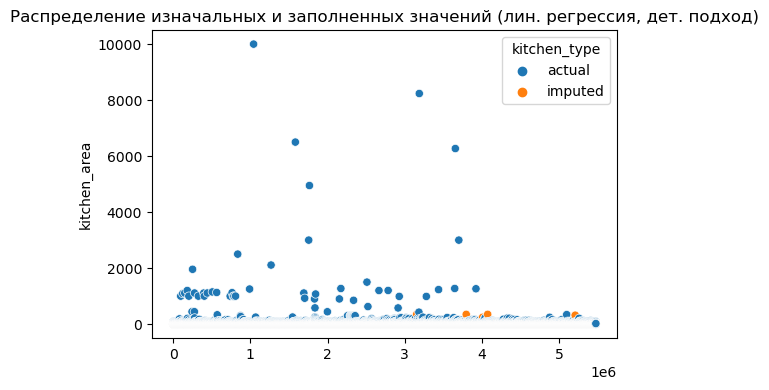

In [55]:
plt.rcParams['figure.figsize'] = (6, 4)
sns.scatterplot(data = lr_viz, x = lr_viz.index, y = 'kitchen_area', hue = 'kitchen_type')
plt.title('Распределение изначальных и заполненных значений (лин. регрессия, дет. подход)');

Среднее осталось тем же, медиана увеличилась на 0,1. Детерминированный подход (который я использовала) может преувеличивать точность прогноза (оранжевые круги в основной массе синих, близко к среднему значению). В стохастическом подходе добавляется "случайный эффект", который как раз позволяет не переоценить точность прогноза. Однако при этом можно и ухудшить результаты прогноза, поэтому я применила детерминированный. 

## <a class="anchor" id="40"><div class="alert alert-block alert-info">Выводы:
1. Столбцы были проверены на пропуски. Они оказались только в столбце kitchen_area - 253 696.
2. Было принято решение заполнить этот столбец с помощью построения модели линейной регрессии. При этом, применялся детерминированный подход, который мог переоценить точность прогноза. При заполнении пропусков среднее осталось таким же, а медиана увеличилась на 0,1. При этом я не стала применять стохастический метод, который добавляет шум в данных (чтобы не переоценить точность прогноза), потому что это может и ухудшить данные.

[Вернуться к Навигации](#1)

## <a class="anchor" id="10"><div class="alert alert-block alert-info">Задание №4

## <a class="anchor" id="2"><div class="alert alert-block alert-info">Исследуйте рынок недвижимости в РФ за представленный период. Величина исследования - цена за м2. Обработайте аномалии.

Будем исследовать каждый столбец датасета в отдельности.

In [53]:
df.head(1)

price       date region  building_type  level  levels  rooms  area  \
0  6050000 2018-02-19   2661              1      8      10      3  82.6   

   kitchen_area  object_type         reg_name  
0          10.8            1  Санкт-Петербург

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5476618 entries, 0 to 5477005
Data columns (total 11 columns):
 #   Column         Dtype         
---  ------         -----         
 0   price          int64         
 1   date           datetime64[ns]
 2   region         object        
 3   building_type  int64         
 4   level          int64         
 5   levels         int64         
 6   rooms          int64         
 7   area           float64       
 8   kitchen_area   float64       
 9   object_type    int64         
 10  reg_name       object        
dtypes: datetime64[ns](1), float64(2), int64(6), object(2)
memory usage: 501.4+ MB


In [56]:
#проверим количество явных дубликатов
df.duplicated().sum()

235601

Явных дубликатов много, id нет нигде. Я решила не удалять дубликаты, т.к. чисто теоретически по одной цене, в одну дату, в одном регионе, в здании одного типа и с одним количеством этажей, на одном и том же этаже могут купить квартиры с одинаковым количеством комнат.

В результате исследования было принято решение сначала исправлять аномалии, а потом исследовать отдельные столбцы на выбросы.

## <a class="anchor" id="2"><div class="alert alert-block alert-info">5. Level

In [58]:
df['level'].unique()

array([ 8,  5, 12, 13,  4,  1,  2,  9, 10, 25,  7,  6, 16, 17, 14, 11,  3,
       18, 15, 23, 21, 20, 22, 19, 28, 24, 26, 32, 30, 27, 31, 29, 34, 33,
       35, 37, 36, 39, 38], dtype=int64)

## <a class="anchor" id="2"><div class="alert alert-block alert-info">6. Levels

In [59]:
df['levels'].unique()

array([10, 24,  9, 16, 14,  5, 25, 15, 17,  8,  2,  3, 18,  4, 22, 12, 20,
        7, 19,  6, 23, 27,  1, 21, 11, 28, 13, 36, 26, 33, 34, 30, 29, 35,
       32, 31, 37, 38, 39], dtype=int64)

Т.к. анализ дальше будет и по этим столбцам, проверила нет ли неожиданностей - вроде нет.

## <a class="anchor" id="2"><div class="alert alert-block alert-info">Рассмотрим, какие проблемы могли возникнуть в связанных столбцах.

## <a class="anchor" id="2"><div class="alert alert-block alert-info">1. Связь level и levels

Посмотрим, есть ли аномальные записи, где этаж, на котором находится квартира, больше, чем количество этажей в доме в принципе.

In [56]:
df[df['level'] > df['levels']]

price       date region  building_type  level  levels  rooms  \
26283    1850000 2018-09-12   3870              3     17      13      1   
35903    1100000 2018-09-13   9654              3      4       1      1   
117969    700000 2018-09-22   2722              3      2       1      2   
148751   3200000 2018-09-27  11171              2      4       3      1   
164863   1050000 2018-09-28   2843              4      2       1      2   
...          ...        ...    ...            ...    ...     ...    ...   
4942329  4750000 2021-01-19   2843              4     11      10      2   
5175158  6984180 2021-03-18     81              3      4       3      2   
5175162  7164620 2021-03-18     81              3      4       3      2   
5175971  4136487 2021-03-18     81              3      4       3      1   
5345334  2370000 2021-04-15   2900              1      5       4      3   

          area  kitchen_area  object_type                  reg_name  
26283    37.00         10.00            1         Красноярский край  
35903    30.00          8.00            1     Новосибирская область  
117969   40.00         11.00            1   Республика Башкортостан  
148751   31.00         10.00            1  Республика Саха (Якутия)  
164863   54.00         10.00            1        Краснодарский край  
...        ...           ...          ...                       ...  
4942329  54.00          6.00            1        Краснодарский край  
5175158  57.80         11.68           11        Московская область  
5175162  78.84         11.68           11        Московская область  
5175971  48.40          9.01           11        Московская область  
5345334  64.00          8.00            1       Ставропольский край  

[1072 rows x 11 columns]

Варианты: удаляем строки или меняем местами эти значения. Я выбрала второй для минимизации потерь в данных.

In [57]:
a = df['levels'].tolist()
b = df['level'].tolist()

In [58]:
for i in range(len(a)):
    if a[i] < b[i]:
        a[i], b[i] = b[i], a[i] 

In [59]:
df['levels'] = a

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14492\3624865201.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['levels'] = a


In [60]:
df['level'] = b

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14492\1748377105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['level'] = b


In [61]:
df[df['level'] > df['levels']]

Empty DataFrame
Columns: [price, date, region, building_type, level, levels, rooms, area, kitchen_area, object_type, reg_name]
Index: []

Аномалия исправлена.

## <a class="anchor" id="2"><div class="alert alert-block alert-info">2. Связь area и kitchen_area

Проверим, есть ли строки, где значение площади кухни больше, чем общей площади квартиры.

In [62]:
df[df['kitchen_area'] >= df['area']]

price       date region  building_type  level  levels  rooms  \
502       4599000 2018-09-08   9654              3      6      10      2   
673       1350000 2018-09-08   9654              1      5      10      1   
3055       950000 2018-09-08   9654              3      2       9     -1   
4111      1200000 2018-09-08   2359              3      3       9     -1   
4500      1570000 2018-09-08   1010              3      4       5      1   
...           ...        ...    ...            ...    ...     ...    ...   
5459325   2300000 2021-04-30   3991              0      5      16      1   
5460602   1050000 2021-04-30   3991              0      4       5      1   
5466054   1800000 2021-05-01   9654              2      4      18      1   
5474504  23399000 2021-05-01   2843              2     24      24     -2   
5475540   4500000 2021-05-01   1010              2     10      17      3   

          area  kitchen_area  object_type               reg_name  
502       5.60          7.70            1  Новосибирская область  
673      13.78         48.02           11  Новосибирская область  
3055     22.00         22.00            1  Новосибирская область  
4111     23.00         23.00           11     Республика Хакасия  
4500     32.00         65.00            1  Удмуртская Республика  
...        ...           ...          ...                    ...  
5459325  23.50         23.50            1      Тюменская область  
5460602  18.00         18.00            1      Тюменская область  
5466054  18.50         18.50            1  Новосибирская область  
5474504   9.00         40.00           11     Краснодарский край  
5475540  69.00         91.00            1  Удмуртская Республика  

[4568 rows x 11 columns]

Варианты такие же, как и в прошлом пункте, поэтому использую то же самое.

In [62]:
a = df['area'].tolist()
b = df['kitchen_area'].tolist()

In [63]:
for i in range(len(a)):
    if a[i] <= b[i]:
        a[i], b[i] = b[i], a[i] 

In [64]:
df['area'] = a

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14492\1717188818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['area'] = a


In [65]:
df['kitchen_area'] = b

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14492\123462938.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kitchen_area'] = b


In [66]:
df[df['kitchen_area'] >= df['area']]

price       date region  building_type  level  levels  rooms  area  \
3055      950000 2018-09-08   9654              3      2       9     -1  22.0   
4111     1200000 2018-09-08   2359              3      3       9     -1  23.0   
12682    1600000 2018-09-10   2604              3      1       5     -1  26.5   
16236    1650000 2018-09-10  10160              1      3       5      2   6.0   
16564    1900000 2018-09-10   2843              2      2       6      1  25.0   
...          ...        ...    ...            ...    ...     ...    ...   ...   
5414347  1600000 2021-04-27   9654              1     10      17     -1  20.0   
5449257  1958000 2021-04-30   5282              3      5      14      1  37.0   
5459325  2300000 2021-04-30   3991              0      5      16      1  23.5   
5460602  1050000 2021-04-30   3991              0      4       5      1  18.0   
5466054  1800000 2021-05-01   9654              2      4      18      1  18.5   

         kitchen_area  object_type               reg_name  
3055             22.0            1  Новосибирская область  
4111             23.0           11     Республика Хакасия  
12682            26.5            1    Ярославская область  
16236             6.0            1     Забайкальский край  
16564            25.0            1     Краснодарский край  
...               ...          ...                    ...  
5414347          20.0            1  Новосибирская область  
5449257          37.0            1    Челябинская область  
5459325          23.5            1      Тюменская область  
5460602          18.0            1      Тюменская область  
5466054          18.5            1  Новосибирская область  

[1156 rows x 11 columns]

In [67]:
df[df['kitchen_area'] == df['area']]

price       date region  building_type  level  levels  rooms  area  \
3055      950000 2018-09-08   9654              3      2       9     -1  22.0   
4111     1200000 2018-09-08   2359              3      3       9     -1  23.0   
12682    1600000 2018-09-10   2604              3      1       5     -1  26.5   
16236    1650000 2018-09-10  10160              1      3       5      2   6.0   
16564    1900000 2018-09-10   2843              2      2       6      1  25.0   
...          ...        ...    ...            ...    ...     ...    ...   ...   
5414347  1600000 2021-04-27   9654              1     10      17     -1  20.0   
5449257  1958000 2021-04-30   5282              3      5      14      1  37.0   
5459325  2300000 2021-04-30   3991              0      5      16      1  23.5   
5460602  1050000 2021-04-30   3991              0      4       5      1  18.0   
5466054  1800000 2021-05-01   9654              2      4      18      1  18.5   

         kitchen_area  object_type               reg_name  
3055             22.0            1  Новосибирская область  
4111             23.0           11     Республика Хакасия  
12682            26.5            1    Ярославская область  
16236             6.0            1     Забайкальский край  
16564            25.0            1     Краснодарский край  
...               ...          ...                    ...  
5414347          20.0            1  Новосибирская область  
5449257          37.0            1    Челябинская область  
5459325          23.5            1      Тюменская область  
5460602          18.0            1      Тюменская область  
5466054          18.5            1  Новосибирская область  

[1156 rows x 11 columns]

Проблема в том, что если этаж квартиры равен количеству этажей в доме, это нормально. А вот площадь квартиры не может равняться площади кухни (там выше нормативные акты были, где помимо кухни должны быть жилые помещения, санузел и коридоры хоть какие). Тут всего 1156 строка, принято решение их удалить.

In [63]:
df = df[df['kitchen_area'] < df['area']]
df = df.reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5475462 entries, 0 to 5475461
Data columns (total 12 columns):
 #   Column         Dtype         
---  ------         -----         
 0   index          int64         
 1   price          int64         
 2   date           datetime64[ns]
 3   region         object        
 4   building_type  int64         
 5   level          int64         
 6   levels         int64         
 7   rooms          int64         
 8   area           float64       
 9   kitchen_area   float64       
 10  object_type    int64         
 11  reg_name       object        
dtypes: datetime64[ns](1), float64(2), int64(7), object(2)
memory usage: 501.3+ MB


И эта аномалия исправлена. Больше каких-то странностей я не заметила.

Теперь посмотрим отдельные столбцы.

## <a class="anchor" id="2"><div class="alert alert-block alert-info">7. Rooms

In [69]:
df['rooms'].unique()

array([ 3,  2,  1,  4, -1,  5,  7,  6,  8,  9, -2, 10], dtype=int64)

Обнаружено значение -2, такого в изначальном описании данных не было. Посмотрим соответствующие строки.

In [68]:
df_r = df[df['rooms'] == -2]
df_r

price       date region  building_type  level  levels  rooms  \
62764     24912000 2018-09-17   2843              2     22      22     -2   
89002     25500000 2018-09-18   2661              3      1       7     -2   
112359     3150000 2018-09-21   2661              2      2      17     -2   
118076     4300000 2018-09-22     81              3      3       5     -2   
142208    57000000 2018-09-26     81              3      3       3     -2   
...            ...        ...    ...            ...    ...     ...    ...   
5357663    2350000 2021-04-19   3019              4      4       5     -2   
5374584  199000000 2021-04-21   2661              3      2       3     -2   
5392668   36874000 2021-04-24   2661              3      2       4     -2   
5432473    5200000 2021-04-29     81              2      7      17     -2   
5474504   23399000 2021-05-01   2843              2     24      24     -2   

          area  kitchen_area  object_type              reg_name  
62764    415.2          40.0           11    Краснодарский край  
89002    360.0          22.0            1       Санкт-Петербург  
112359    35.0           9.0            1       Санкт-Петербург  
118076    61.0           5.6            1    Московская область  
142208   300.0          30.0            1    Московская область  
...        ...           ...          ...                   ...  
5357663   10.7           9.0            1  Чувашская Республика  
5374584   25.0           9.0            1       Санкт-Петербург  
5392668   19.7           9.0            1       Санкт-Петербург  
5432473   10.7           9.0            1    Московская область  
5474504   40.0           9.0           11    Краснодарский край  

[343 rows x 11 columns]

Какие варианты? Либо удаляем 342 строки, что от изначального датасета 0,0062 %, либо меняем знак и получаем двушки, либо меняем цифру 2 на 1 и получаем студии.

In [69]:
df_r['price'].describe()

count    3.430000e+02
mean     4.232202e+07
std      7.257068e+07
min      4.400000e+05
25%      6.050000e+06
50%      2.150000e+07
75%      4.600000e+07
max      8.712900e+08
Name: price, dtype: float64

Я решила использовать смешанный вариант: до цены 6.025000e+06 включительно заполню как -1 (студия), все, что выше будет двушками. (В целом же по рынку первичного жилья в качественном предложении цена студии начинается от 7 млн рублей. В апартаментах можно найти студии стоимостью от 5 млн рублей. 
Источник: https://www.fontanka.ru/2023/06/28/72441830/. Т.е. эта информация по СПБ, т.е. логично, что по стране студии тем более могут стоить в этом диапазоне).

In [70]:
df.loc[(df['rooms']== -2) & (df['price'] <= 6.050000e+06), 'rooms'] = -1
df.loc[(df['rooms']== -2) & (df['price'] > 6.050000e+06), 'rooms'] = 2

In [71]:
df.head(1)

price       date region  building_type  level  levels  rooms  area  \
0  6050000 2018-02-19   2661              1      8      10      3  82.6   

   kitchen_area  object_type         reg_name  
0          10.8            1  Санкт-Петербург

In [72]:
df['rooms'].unique()

array([ 3,  2,  1,  4, -1,  5,  7,  6,  8,  9, 10], dtype=int64)

Я решила начать с этого столбца, чтобы дальше была возможность анализа выбросов.

## <a class="anchor" id="2"><div class="alert alert-block alert-info">2. Date

In [80]:
df['date'].describe()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15448\801468514.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df['date'].describe()


count                 5475462
unique                   1075
top       2020-03-27 00:00:00
freq                    44759
first     2018-02-19 00:00:00
last      2021-05-01 00:00:00
Name: date, dtype: object

В целом каких-то проблем в этом столбце я не заметила.

## <a class="anchor" id="2"><div class="alert alert-block alert-info">3. Region

In [81]:
df['region'].unique()

array(['2661', '81', '2871', '2843', '3', '3106', '2922', '2900', '2722',
       '6171', '3230', '4417', '5282', '5368', '3446', '5520', '6817',
       '9579', '2604', '1010', '9648', '7793', '13919', '2860', '3019',
       '4982', '5241', '3870', '3991', '2359', '9654', '2072', '8090',
       '4007', '11171', '10160', '7873', '2594', '8509', '11416', '11991',
       '2880', '5178', '13913', '6309', '5952', '6543', '2328', '5993',
       '2484', '13098', '4240', '5789', '1901', '14880', '10201', '1491',
       '2885', '5794', '2528', '4374', '4695', '5143', '6937', '2806',
       '14368', '5736', '7121', '4086', '821', '10582', '7896', '8640',
       '5703', '8894', '4249', '3153', '4189', '2814', '7929', '16705',
       '69', '4963', '61888'], dtype=object)

В целом этот столбец был исследован во втором задании.

## <a class="anchor" id="2"><div class="alert alert-block alert-info">4. Building_type	

In [82]:
df['building_type'].unique()

array([1, 3, 4, 2, 5, 0], dtype=int64)

## <a class="anchor" id="2"><div class="alert alert-block alert-info">10. Object_type

In [83]:
df['object_type'].unique()

array([ 1, 11], dtype=int64)

## <a class="anchor" id="2"><div class="alert alert-block alert-info">11. Reg_name

In [84]:
df['reg_name'].unique()

array(['Санкт-Петербург', 'Московская область', 'Нижегородская область',
       'Краснодарский край', 'Москва', 'Самарская область',
       'Республика Татарстан', 'Ставропольский край',
       'Республика Башкортостан', 'Свердловская область',
       'Ростовская область', 'Республика Коми', 'Челябинская область',
       'Иркутская область', 'Ленинградская область', 'Пермский край',
       'Алтайский край', 'Республика Бурятия', 'Ярославская область',
       'Удмуртская Республика', 'Кабардино-Балкарская Республика',
       'Псковская область', 'Республика Северная Осетия — Алания',
       'Кемеровская область', 'Чувашская Республика',
       'Республика Марий Эл', 'Республика Мордовия', 'Красноярский край',
       'Тюменская область', 'Республика Хакасия', 'Новосибирская область',
       'Воронежская область', 'Республика Карелия', 'Республика Дагестан',
       'Республика Саха (Якутия)', 'Забайкальский край',
       'Республика Крым', 'Кировская область', 'Республика Калмыкия',
     

Аномалий найдено не было.

Теперь посмотрим на выбросы.

## <a class="anchor" id="2"><div class="alert alert-block alert-info">8. Area

In [73]:
df['area'].describe()

count    5.476618e+06
mean     5.393830e+01
std      3.418291e+01
min      2.200000e-01
25%      3.800000e+01
50%      4.802000e+01
75%      6.313000e+01
max      9.999000e+03
Name: area, dtype: float64

In [75]:
df.sort_values('area')

index    price       date region  building_type  level  levels  \
3283819  3284924  1150000 2020-02-14   9654              2      7      17   
3287038  3288143   830000 2020-02-15   5282              5      3       3   
3288516  3289622  2995000 2020-02-15   6171              3      1       5   
3291599  3292706  1800000 2020-02-17   5282              3      1       5   
3293935  3295043  2450000 2020-02-17   2843              0      4       5   
...          ...      ...        ...    ...            ...    ...     ...   
3607183  3608366  3360000 2020-04-16   2843              3      5      19   
3042390  3043425  2700000 2019-12-16  13919              1      1       9   
3417424  3418563  8490000 2020-03-09   2661              1      6       9   
3188284  3189364  3500000 2020-01-27   2843              2      2       9   
1042021  1042411  3200000 2019-01-31  11171              1      6       9   

         rooms     area  kitchen_area  object_type  \
3283819     -1     0.22          0.03            1   
3287038     -1     0.28          0.06            1   
3288516      1     0.32          0.06            1   
3291599      2     0.45          0.06            1   
3293935      2     0.48          0.10            1   
...        ...      ...           ...          ...   
3607183      2  7625.00         22.20           11   
3042390      3  7660.00         14.00            1   
3417424      4  7856.00         10.00            1   
3188284      2  8235.00         51.00            1   
1042021      1  9999.00         37.00            1   

                                    reg_name  
3283819                Новосибирская область  
3287038                  Челябинская область  
3288516                 Свердловская область  
3291599                  Челябинская область  
3293935                   Краснодарский край  
...                                      ...  
3607183                   Краснодарский край  
3042390  Республика Северная Осетия — Алания  
3417424                      Санкт-Петербург  
3188284                   Краснодарский край  
1042021             Республика Саха (Якутия)  

[5475462 rows x 12 columns]

Начальные значения площади очень странные, таких квартир не существует.

1. Норма предоставления площади жилого помещения, предоставляемого в соответствии с настоящим Федеральным законом в собственность бесплатно или по договору социального найма, составляет 18 квадратных метров общей площади жилого помещения на одного человека. Источник: https://www.consultant.ru/document/cons_doc_LAW_18853/5bb3d48a3c46a7db00fb451576e38fc1ed3acce1/#:~:text=1.,%D0%B6%D0%B8%D0%BB%D0%BE%D0%B3%D0%BE%20%D0%BF%D0%BE%D0%BC%D0%B5%D1%89%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%BD%D0%B0%20%D0%BE%D0%B4%D0%BD%D0%BE%D0%B3%D0%BE%20%D1%87%D0%B5%D0%BB%D0%BE%D0%B2%D0%B5%D0%BA%D0%B0.
Вообще в каждом регионе могут быть свои нормы, к примеру, в Москве согласно закону № 29 об обеспечении жильём гражданских лиц установлены следующие размеры нормы жилой площади:
минимальной площадью на одного человека является 10 м² (либо 15 м² по суду);
однокомнатная квартира для семьи из двух человек – 44 м²;
двухкомнатная для двух граждан, если их брак официально не зарегистрирован, – 54 м²;
двухкомнатная квартира для семьи из трёх человек— 62 м²;
трёхкомнатная для трёх несемейных граждан — 74 м².
Закон Санкт-Петербурга «О порядке ведения учета граждан в качестве нуждающихся в жилых помещениях и предоставлении жилых помещений по договорам социального найма» гласит, что регламент предоставления жилой площади, составляет:
18 м² на одного члена семьи, состоящей из двух и более человек;
33 м² для одинокого гражданина.
Тогда как учётная норма на 1 человека признана:
9 м² в отдельных квартирах и жилых домах;
до 15 м² в коммуналках
Источник: https://www.mgsn.ru/usefull/stati/soczialnaya-norma-zhilploshhadi-na-odnogo-cheloveka-v-2022-godu/#:~:text=%D0%9F%D0%BE%D0%BA%D0%B0%D0%B7%D0%B0%D1%82%D0%B5%D0%BB%D0%B8%20%D0%BD%D0%BE%D1%80%D0%BC%D1%8B%20%D0%B6%D0%B8%D0%BB%D0%BE%D0%B9%20%D0%BF%D0%BB%D0%BE%D1%89%D0%B0%D0%B4%D0%B8%20%D0%B2%20%D0%BA%D1%80%D1%83%D0%BF%D0%BD%D1%8B%D1%85%20%D1%80%D0%B5%D0%B3%D0%B8%D0%BE%D0%BD%D0%B0%D1%85&text=%D0%BE%D0%B4%D0%BD%D0%BE%D0%BA%D0%BE%D0%BC%D0%BD%D0%B0%D1%82%D0%BD%D0%B0%D1%8F%20%D0%BA%D0%B2%D0%B0%D1%80%D1%82%D0%B8%D1%80%D0%B0%20%D0%B4%D0%BB%D1%8F%20%D1%81%D0%B5%D0%BC%D1%8C%D0%B8%20%D0%B8%D0%B7,%D1%82%D1%80%D1%91%D1%85%20%D0%BD%D0%B5%D1%81%D0%B5%D0%BC%D0%B5%D0%B9%D0%BD%D1%8B%D1%85%20%D0%B3%D1%80%D0%B0%D0%B6%D0%B4%D0%B0%D0%BD%20%E2%80%94%2074%20%D0%BC%C2%B2.

При этом надо не забыть учесть площадь кухни, как минимум.

Для кухни, помимо различных ограничений по ее размещению (подробнее здесь), в СП 54.13330.2016 также существуют рекомендации по площади. 
Так, минимальные площади этих помещений в муниципальном жилье следующие:
Для кухни – 8 м².
Для выделенной зоны кухни-ниши – 5 м². в СП 54.13330.2016
Источник: https://mostpr.ru/article/minimalnaya-ploshchad#:~:text=%D0%9C%D0%B8%D0%BD%D0%B8%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F%20%D0%BF%D0%BB%D0%BE%D1%89%D0%B0%D0%B4%D1%8C%20%D0%BA%D1%83%D1%85%D0%BD%D0%B8&text=%D0%94%D0%BB%D1%8F%20%D0%BA%D1%83%D1%85%D0%BD%D0%B8%20%E2%80%93%208%20%D0%BC%C2%B2.,%D0%B2%20%D0%A1%D0%9F%2054.13330.2016

Площадь помещений в квартирах, указанных в 5.3, должна быть не менее: жилого помещения (комнаты) в однокомнатной квартире — 14 м2, общего жилого помещения в квартирах с числом комнат две и более — 16 м2, спальни — 8 м2 (10 м2 —на двух человек); кухни — 8 м2; кухонной зоны в кухне — столовой — 6 м2. В однокомнатных квартирах допускается проектировать кухни или кухни-ниши площадью не менее 5 м2.

Площадь спальни и кухни в мансардном этаже (или этаже с наклонными ограждающими конструкциями) допускается не менее 7 м2 при условии, что общее жилое помещение имеет площадь не менее 16 м2."

(СНиП 31-01-2003)

Источник: https://drive.google.com/file/d/1MZq1CeZWsgXHXd6aWx5-V6QP6uILqr6T/view?pli=1

https://basicdecor.ru/blog/post/normy-sanpin/#doc

Также рассмотрим нормы площади по санузлам.

Также, согласно нормативам СНиП, существуют следующие типовые размеры санузлов в панельном доме и в хрущевке :

Уборная с унитазом и умывальником – 1х1,5 м2.

Ванная с умывальником – 1,5х2 м2.

Совместный санузел – 1,98х1,73 м2, 2,5х1,5 м2.

С душевой кабиной вместо ванной – 1,4х1,6 м2.

Источник: https://izibro.ru/kak-pravilno-podobrat-ploshhad-sanuzla-soglasno-snip/#%D0%BC%D0%B8%D0%BD%D0%B8%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D0%B5-%D1%80%D0%B0%D0%B7%D0%BC%D0%B5%D1%80%D1%8B-%D1%81%D0%B0%D0%BD%D1%83%D0%B7%D0%BB%D0%B0

По коридорам никаких официальных сведений нет, да и нельзя точно сказать, сколько их в квартире.

Ширина - согласно строительным нормам – 1,2 м. Этот размер можно уменьшить до 0,9 м, но при этом узкий участок должен длиться не более 1,5 м.

Источник:https://doma-paneli.ru/stroitel-sovety/shirina-koridora#:~:text=%D0%9A%D0%B0%D0%BA%D0%BE%D0%B9%20%D0%B4%D0%BE%D0%BB%D0%B6%D0%BD%D0%B0%20%D0%B1%D1%8B%D1%82%D1%8C%20%D1%88%D0%B8%D1%80%D0%B8%D0%BD%D0%B0%20%D0%BA%D0%BE%D1%80%D0%B8%D0%B4%D0%BE%D1%80%D0%B0,%D0%BD%D0%B5%20%D0%B1%D0%BE%D0%BB%D0%B5%D0%B5%201%2C5%20%D0%BC.

Исходя из всего вышеперечисленного, я беру минимальную общую площадь - 14 + 5 + 1,5 + 0,9 * 1,5 = 21,85 квадратных метров.

In [74]:
df = df[df['area'] >= 21.85]
df

price       date region  building_type  level  levels  rooms  \
0         6050000 2018-02-19   2661              1      8      10      3   
1         8650000 2018-02-27     81              3      5      24      2   
2         4000000 2018-02-28   2871              1      5       9      3   
3         1850000 2018-03-01   2843              4     12      16      2   
4         5450000 2018-03-01     81              3     13      14      2   
...           ...        ...    ...            ...    ...     ...    ...   
5477001  19739760 2021-05-01      3              1      8      17      4   
5477002  12503160 2021-05-01      3              2     17      32      2   
5477003   8800000 2021-05-01   2871              2      4      17      3   
5477004  11831910 2021-05-01      3              1      8      33      2   
5477005  13316200 2021-05-01      3              2     10      23      2   

         area  kitchen_area  object_type               reg_name  
0        82.6          10.8            1        Санкт-Петербург  
1        69.1          12.0            1     Московская область  
2        66.0          10.0            1  Нижегородская область  
3        38.0           5.0           11     Краснодарский край  
4        60.0          10.0            1     Московская область  
...       ...           ...          ...                    ...  
5477001  93.2          13.8           11                 Москва  
5477002  45.9           6.6           11                 Москва  
5477003  86.5          11.8            1  Нижегородская область  
5477004  52.1          18.9           11                 Москва  
5477005  55.6          20.8           11                 Москва  

[5386523 rows x 11 columns]

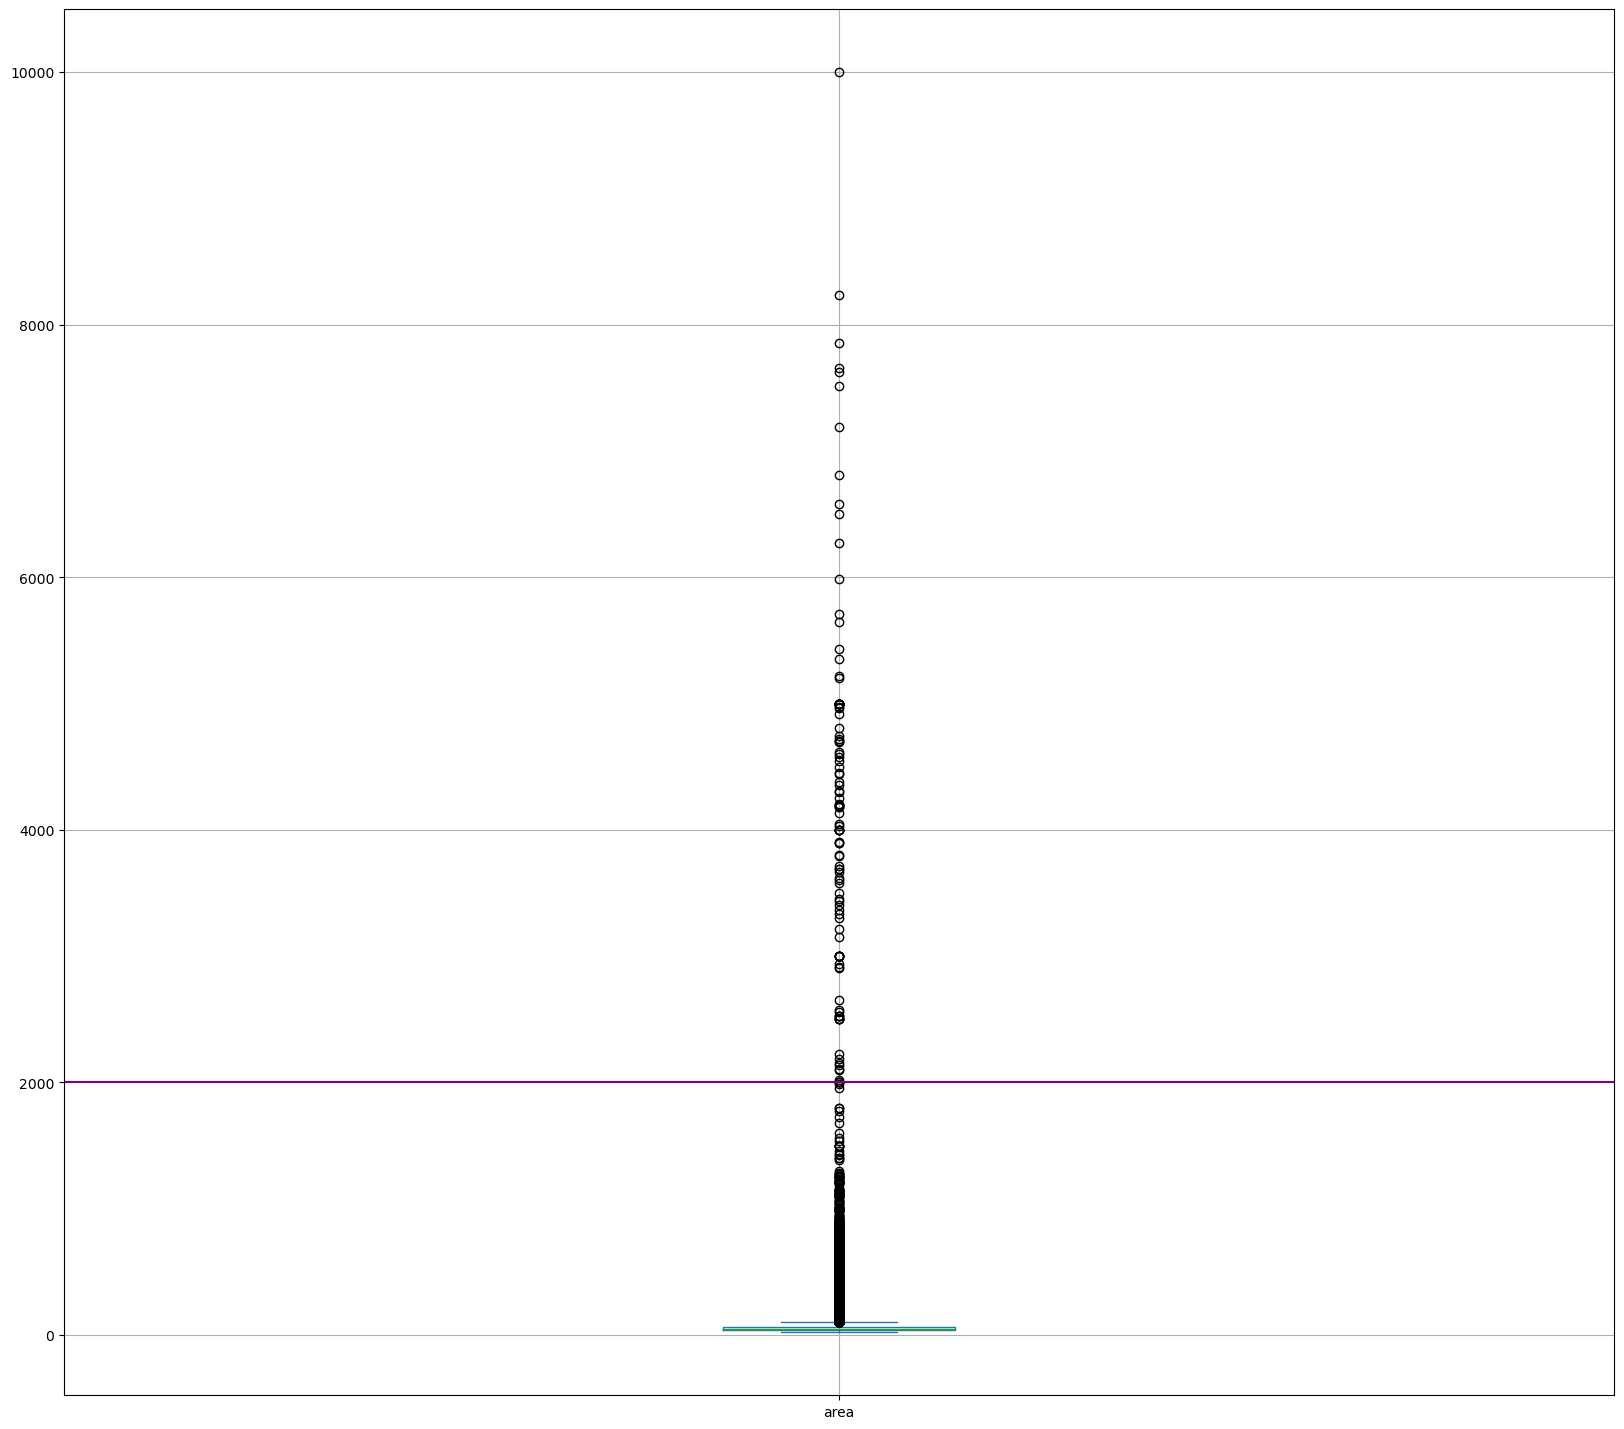

In [75]:
# построим boxplot по общей площади
df['area'].plot(kind='box', figsize=(20, 18), grid=True)
plt.axhline(y=2000, color = 'purple')

In [75]:
ejection('area')

(100.325, 2.2049999999999983, 194831, 3.6175727386851397)

Посмотрим только сильно экстремальные данные.

In [67]:
df[df['area'] > 2000]

index     price       date region  building_type  level  levels  \
132489    132529   3600000 2018-09-25   3991              0     12      17   
182954    183010   1070000 2018-10-02   4007              3      5       5   
275208    275294   4444444 2018-10-15   2871              2      4       4   
474664    474818    999000 2018-11-13   2871              3      1       2   
659075    659313   2150000 2018-12-05   2843              3     15      17   
...          ...       ...        ...    ...            ...    ...     ...   
5341377  5342906  14685000 2021-04-15   2661              0      2      12   
5358940  5360470   5540000 2021-04-20   2661              3     10      12   
5372452  5373984   1500000 2021-04-21   2843              3      9      10   
5392152  5393688   4500000 2021-04-25   4007              3      4       5   
5440517  5442056   5800000 2021-04-29   2661              1     12      12   

         rooms    area  kitchen_area  object_type               reg_name  
132489       2  3600.0         20.00            1      Тюменская область  
182954       2  3800.0       1200.00            1    Республика Дагестан  
275208       3  4444.0        444.00            1  Нижегородская область  
474664       2  4180.0         10.00            1  Нижегородская область  
659075       1  3366.0          9.00            1     Краснодарский край  
...        ...     ...           ...          ...                    ...  
5341377      2  7513.4         28.69            1        Санкт-Петербург  
5358940      1  4381.9          7.00            1        Санкт-Петербург  
5372452      1  3690.0         36.90           11     Краснодарский край  
5392152      2  5000.0          9.00            1    Республика Дагестан  
5440517      1  4693.0         10.20            1        Санкт-Петербург  

[123 rows x 12 columns]

Стоимость 1-ого квадратного метра общей площади жилого помещения РФ на 1-ое полугодие 2018 года установлено в размере 37848 руб.

Источник: https://lk.usoft.ru/news/6133

Средняя стоимость квадратного метра на вторичном рынке недвижимости России составила 90,2 тыс. рублей по итогам 2020 года. К такому выводу пришли аналитики сервиса объявлений ЦИАН.

Источник: https://iz.ru/1100289/2020-12-15/nazvana-tcena-kvadratnogo-metra-na-rossiiskom-rynke-vtorichki-v-2020-godu

Т.е. если для вторичного такая стоимость, то для первичного больше скорее всего.

Самой большой квартирой мира считается трехуровневый пентхаус в Коста-Рике площадью 6360 квадратных метров.
Источник: https://xn--80alqgor.xn--80aa6ajv.xn--p1ai/gde-v-mire-samye-bolshie-i-samye-malenkie-kvartiry
Т.е. теоретически возможно, но практически вряд ли.

По этой причине эти данные я точно удалю, тем более они в небольшом количестве.

In [76]:
# Обозначим условия, чтобы отфильтровать датасет без них
df = df[df['area'] <= 2000]
df = df.reset_index()
df

index     price       date region  building_type  level  levels  \
0              0   6050000 2018-02-19   2661              1      8      10   
1              1   8650000 2018-02-27     81              3      5      24   
2              2   4000000 2018-02-28   2871              1      5       9   
3              3   1850000 2018-03-01   2843              4     12      16   
4              4   5450000 2018-03-01     81              3     13      14   
...          ...       ...        ...    ...            ...    ...     ...   
5386395  5477001  19739760 2021-05-01      3              1      8      17   
5386396  5477002  12503160 2021-05-01      3              2     17      32   
5386397  5477003   8800000 2021-05-01   2871              2      4      17   
5386398  5477004  11831910 2021-05-01      3              1      8      33   
5386399  5477005  13316200 2021-05-01      3              2     10      23   

         rooms  area  kitchen_area  object_type               reg_name  
0            3  82.6          10.8            1        Санкт-Петербург  
1            2  69.1          12.0            1     Московская область  
2            3  66.0          10.0            1  Нижегородская область  
3            2  38.0           5.0           11     Краснодарский край  
4            2  60.0          10.0            1     Московская область  
...        ...   ...           ...          ...                    ...  
5386395      4  93.2          13.8           11                 Москва  
5386396      2  45.9           6.6           11                 Москва  
5386397      3  86.5          11.8            1  Нижегородская область  
5386398      2  52.1          18.9           11                 Москва  
5386399      2  55.6          20.8           11                 Москва  

[5386400 rows x 12 columns]

## <a class="anchor" id="2"><div class="alert alert-block alert-info">9. Kitchen_area

Для кухни, помимо различных ограничений по ее размещению (подробнее здесь), в СП 54.13330.2016 также существуют рекомендации по площади. 
Так, минимальные площади этих помещений в муниципальном жилье следующие:
Для кухни – 8 м².
Для выделенной зоны кухни-ниши – 5 м². в СП 54.13330.2016

Источник: https://mostpr.ru/article/minimalnaya-ploshchad#:~:text=%D0%9C%D0%B8%D0%BD%D0%B8%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F%20%D0%BF%D0%BB%D0%BE%D1%89%D0%B0%D0%B4%D1%8C%20%D0%BA%D1%83%D1%85%D0%BD%D0%B8&text=%D0%94%D0%BB%D1%8F%20%D0%BA%D1%83%D1%85%D0%BD%D0%B8%20%E2%80%93%208%20%D0%BC%C2%B2.,%D0%B2%20%D0%A1%D0%9F%2054.13330.2016

In [68]:
df = df[df['kitchen_area'] >= 5]
df

level_0    index     price       date region  building_type  level  \
0              0        0   6050000 2018-02-19   2661              1      8   
1              1        1   8650000 2018-02-27     81              3      5   
2              2        2   4000000 2018-02-28   2871              1      5   
3              3        3   1850000 2018-03-01   2843              4     12   
4              4        4   5450000 2018-03-01     81              3     13   
...          ...      ...       ...        ...    ...            ...    ...   
5385615  5475457  5477001  19739760 2021-05-01      3              1      8   
5385616  5475458  5477002  12503160 2021-05-01      3              2     17   
5385617  5475459  5477003   8800000 2021-05-01   2871              2      4   
5385618  5475460  5477004  11831910 2021-05-01      3              1      8   
5385619  5475461  5477005  13316200 2021-05-01      3              2     10   

         levels  rooms  area  kitchen_area  object_type               reg_name  
0            10      3  82.6          10.8            1        Санкт-Петербург  
1            24      2  69.1          12.0            1     Московская область  
2             9      3  66.0          10.0            1  Нижегородская область  
3            16      2  38.0           5.0           11     Краснодарский край  
4            14      2  60.0          10.0            1     Московская область  
...         ...    ...   ...           ...          ...                    ...  
5385615      17      4  93.2          13.8           11                 Москва  
5385616      32      2  45.9           6.6           11                 Москва  
5385617      17      3  86.5          11.8            1  Нижегородская область  
5385618      33      2  52.1          18.9           11                 Москва  
5385619      23      2  55.6          20.8           11                 Москва  

[5244400 rows x 13 columns]

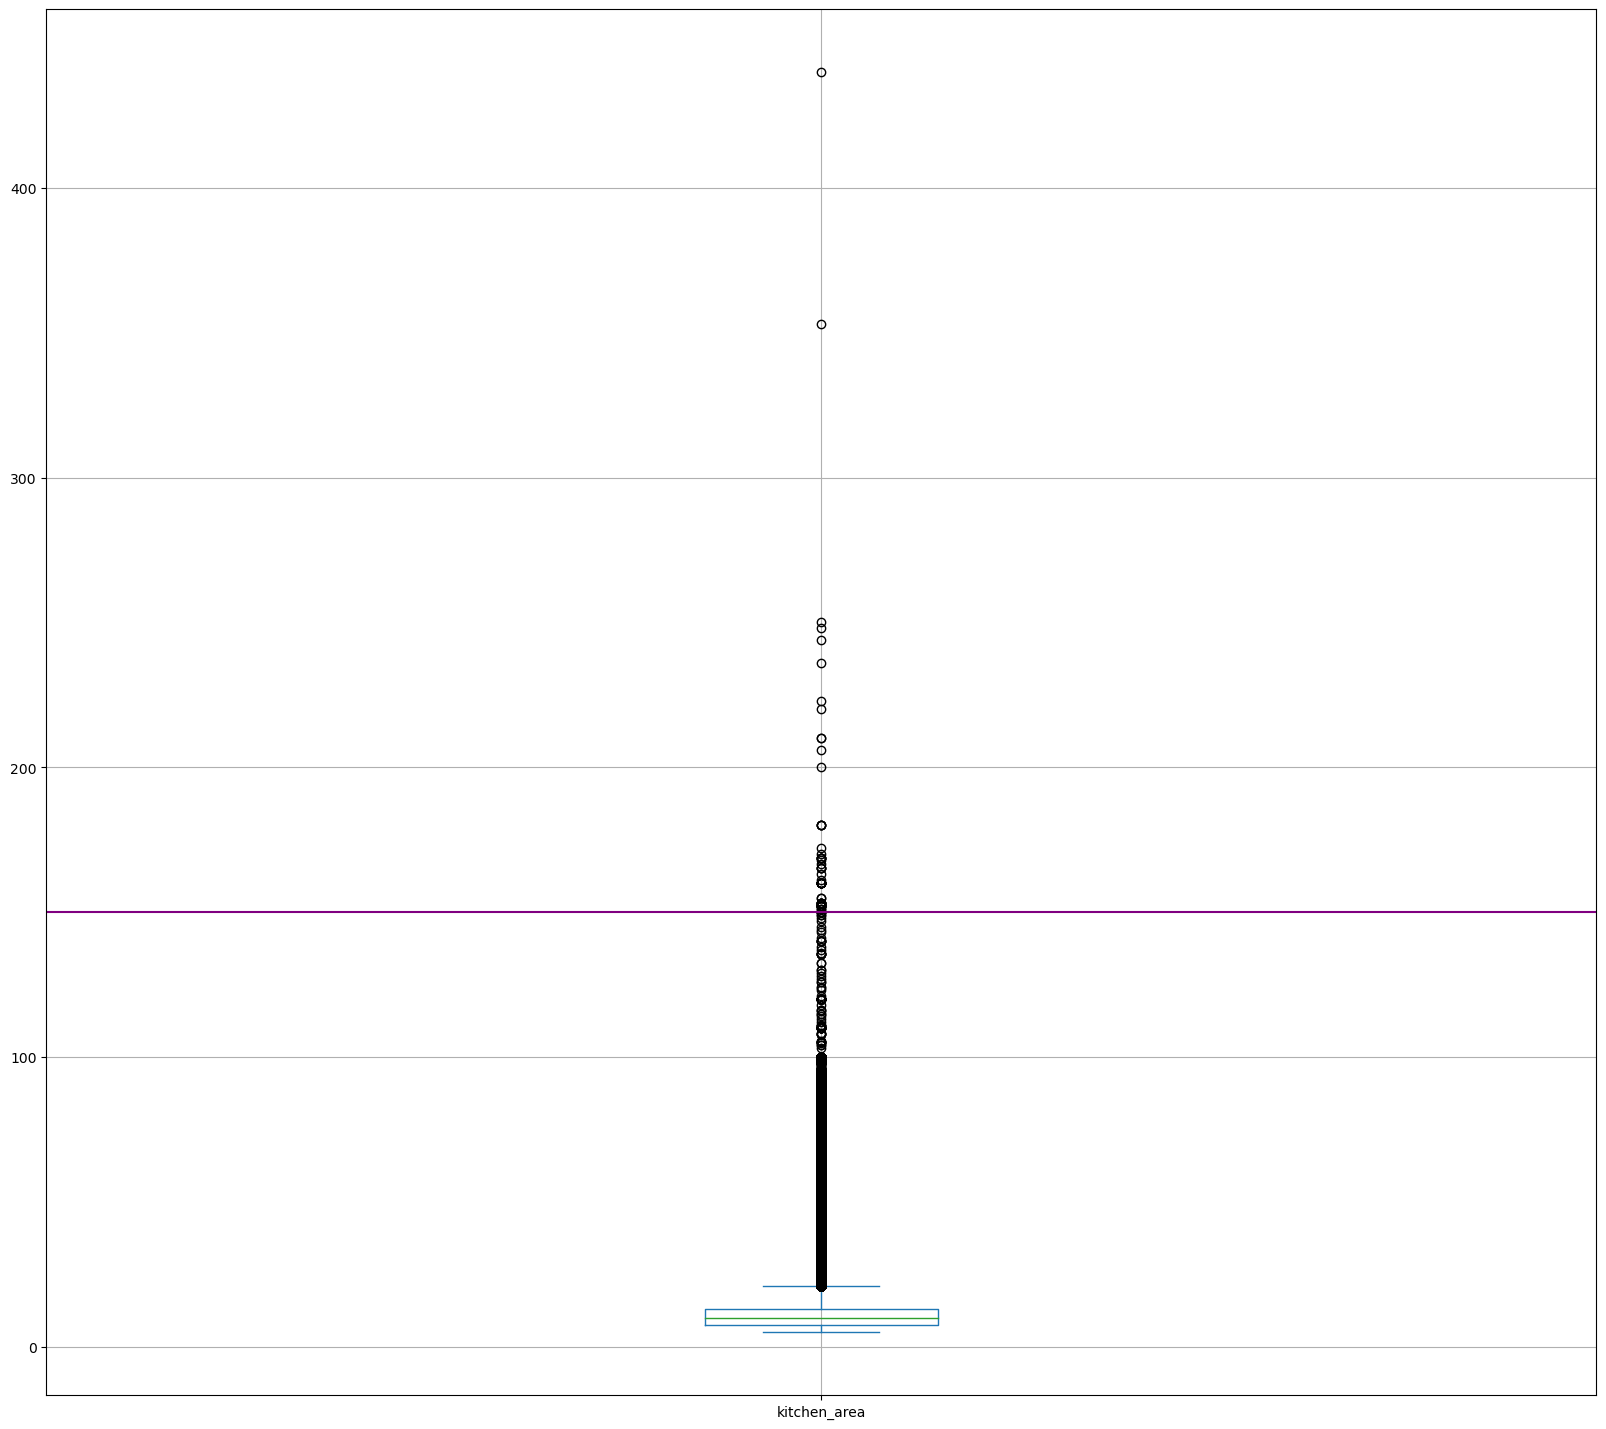

In [70]:
# построим boxplot по площади кухни
df['kitchen_area'].plot(kind='box', figsize=(20, 18), grid=True)
plt.axhline(y= 150, color = 'purple')

In [83]:
# возьмем функцию для определения границ усов, количества выбросов и их процент
def ejection (col):
    q75 = np.percentile(df[col], 75)
    q25 = np.percentile(df[col], 25)
    iqr = q75 - q25
    ejection_h = q75 + iqr * 1.5
    ejection_l = q25 - iqr * 1.5
    ejection_count = df[col][(df[col] > ejection_h) | (df[col] < ejection_l)].count()
    ejection_perc = ejection_count / len(df) * 100
    return(ejection_h, ejection_l, ejection_count, ejection_perc)
ejection('kitchen_area')

(20.9, -0.3800000000000008, 212312, 4.048279921494884)

Проанализируем экстремальные выбросы.

In [71]:
df[df['kitchen_area'] > 150]

level_0    index      price       date region  building_type  level  \
334045    337250   337352   14033250 2018-10-23   3106              3      5   
557981    563751   563947    3600000 2018-11-25     81              1     11   
704062    711457   711716   19500000 2018-12-11   2843              2      6   
902501    912829   913207    3500000 2019-01-12   2860              3      1   
1816667  1835478  1836176       4900 2019-05-21   2843              4      8   
...          ...      ...        ...        ...    ...            ...    ...   
5016670  5097461  5098955   37884000 2021-03-01   2871              2      3   
5106828  5189897  5191402  323000000 2021-03-20   2661              0     13   
5106829  5189898  5191403  410000000 2021-03-20   2661              0     13   
5106831  5189900  5191405  122850000 2021-03-20   2661              0      6   
5173343  5258059  5259577  140000000 2021-04-01   2661              2      4   

         levels  rooms    area  kitchen_area  object_type  \
334045        9      5   170.1         170.0            1   
557981       16      1  1131.0         353.0            1   
704062        6      5   175.0         155.0            1   
902501        1      4   208.0         161.0            1   
1816667      14      2   710.0         160.0            1   
...         ...    ...     ...           ...          ...   
5016670       6      3   340.0         172.0           11   
5106828      13      3   424.6         168.8            1   
5106829      13      4   538.9         165.3            1   
5106831      13      4   332.4         153.3            1   
5173343      15      3   339.2         206.0            1   

                      reg_name  
334045       Самарская область  
557981      Московская область  
704062      Краснодарский край  
902501     Кемеровская область  
1816667     Краснодарский край  
...                        ...  
5016670  Нижегородская область  
5106828        Санкт-Петербург  
5106829        Санкт-Петербург  
5106831        Санкт-Петербург  
5173343        Санкт-Петербург  

[63 rows x 13 columns]

In [69]:
# Обозначим условия, чтобы отфильтровать датасет без них, чтобы они не искажали следующие исследования
df = df[df['kitchen_area'] <= 150]
df

level_0    index     price       date region  building_type  level  \
0              0        0   6050000 2018-02-19   2661              1      8   
1              1        1   8650000 2018-02-27     81              3      5   
2              2        2   4000000 2018-02-28   2871              1      5   
3              3        3   1850000 2018-03-01   2843              4     12   
4              4        4   5450000 2018-03-01     81              3     13   
...          ...      ...       ...        ...    ...            ...    ...   
5385615  5475457  5477001  19739760 2021-05-01      3              1      8   
5385616  5475458  5477002  12503160 2021-05-01      3              2     17   
5385617  5475459  5477003   8800000 2021-05-01   2871              2      4   
5385618  5475460  5477004  11831910 2021-05-01      3              1      8   
5385619  5475461  5477005  13316200 2021-05-01      3              2     10   

         levels  rooms  area  kitchen_area  object_type               reg_name  
0            10      3  82.6          10.8            1        Санкт-Петербург  
1            24      2  69.1          12.0            1     Московская область  
2             9      3  66.0          10.0            1  Нижегородская область  
3            16      2  38.0           5.0           11     Краснодарский край  
4            14      2  60.0          10.0            1     Московская область  
...         ...    ...   ...           ...          ...                    ...  
5385615      17      4  93.2          13.8           11                 Москва  
5385616      32      2  45.9           6.6           11                 Москва  
5385617      17      3  86.5          11.8            1  Нижегородская область  
5385618      33      2  52.1          18.9           11                 Москва  
5385619      23      2  55.6          20.8           11                 Москва  

[5244337 rows x 13 columns]

In [70]:
df = df.reset_index(drop=True)

In [71]:
df.head(1)

level_0  index    price       date region  building_type  level  levels  \
0        0      0  6050000 2018-02-19   2661              1      8      10   

   rooms  area  kitchen_area  object_type         reg_name  
0      3  82.6          10.8            1  Санкт-Петербург

In [72]:
df = df.drop(['level_0', 'index'], axis=1)

In [73]:
df.head(1)

price       date region  building_type  level  levels  rooms  area  \
0  6050000 2018-02-19   2661              1      8      10      3  82.6   

   kitchen_area  object_type         reg_name  
0          10.8            1  Санкт-Петербург

## <a class="anchor" id="2"><div class="alert alert-block alert-info">1. Price

Создадим новый столбец с ценой за м2.

In [74]:
df['pr_m'] = df['price'] / df['area']
df.head(1)

price       date region  building_type  level  levels  rooms  area  \
0  6050000 2018-02-19   2661              1      8      10      3  82.6   

   kitchen_area  object_type         reg_name          pr_m  
0          10.8            1  Санкт-Петербург  73244.552058

In [81]:
# возьмем функцию для определения границ усов, количества выбросов и их процент
def ejection (col):
    q75 = np.percentile(df[col], 75)
    q25 = np.percentile(df[col], 25)
    iqr = q75 - q25
    ejection_h = q75 + iqr * 1.5
    ejection_l = q25 - iqr * 1.5
    ejection_count = df[col][(df[col] > ejection_h) | (df[col] < ejection_l)].count()
    ejection_perc = ejection_count / len(df) * 100
    return(ejection_h, ejection_l, ejection_count, ejection_perc)
ejection('price')

(9375000.0, -2425000.0, 407615, 7.772320573925473)

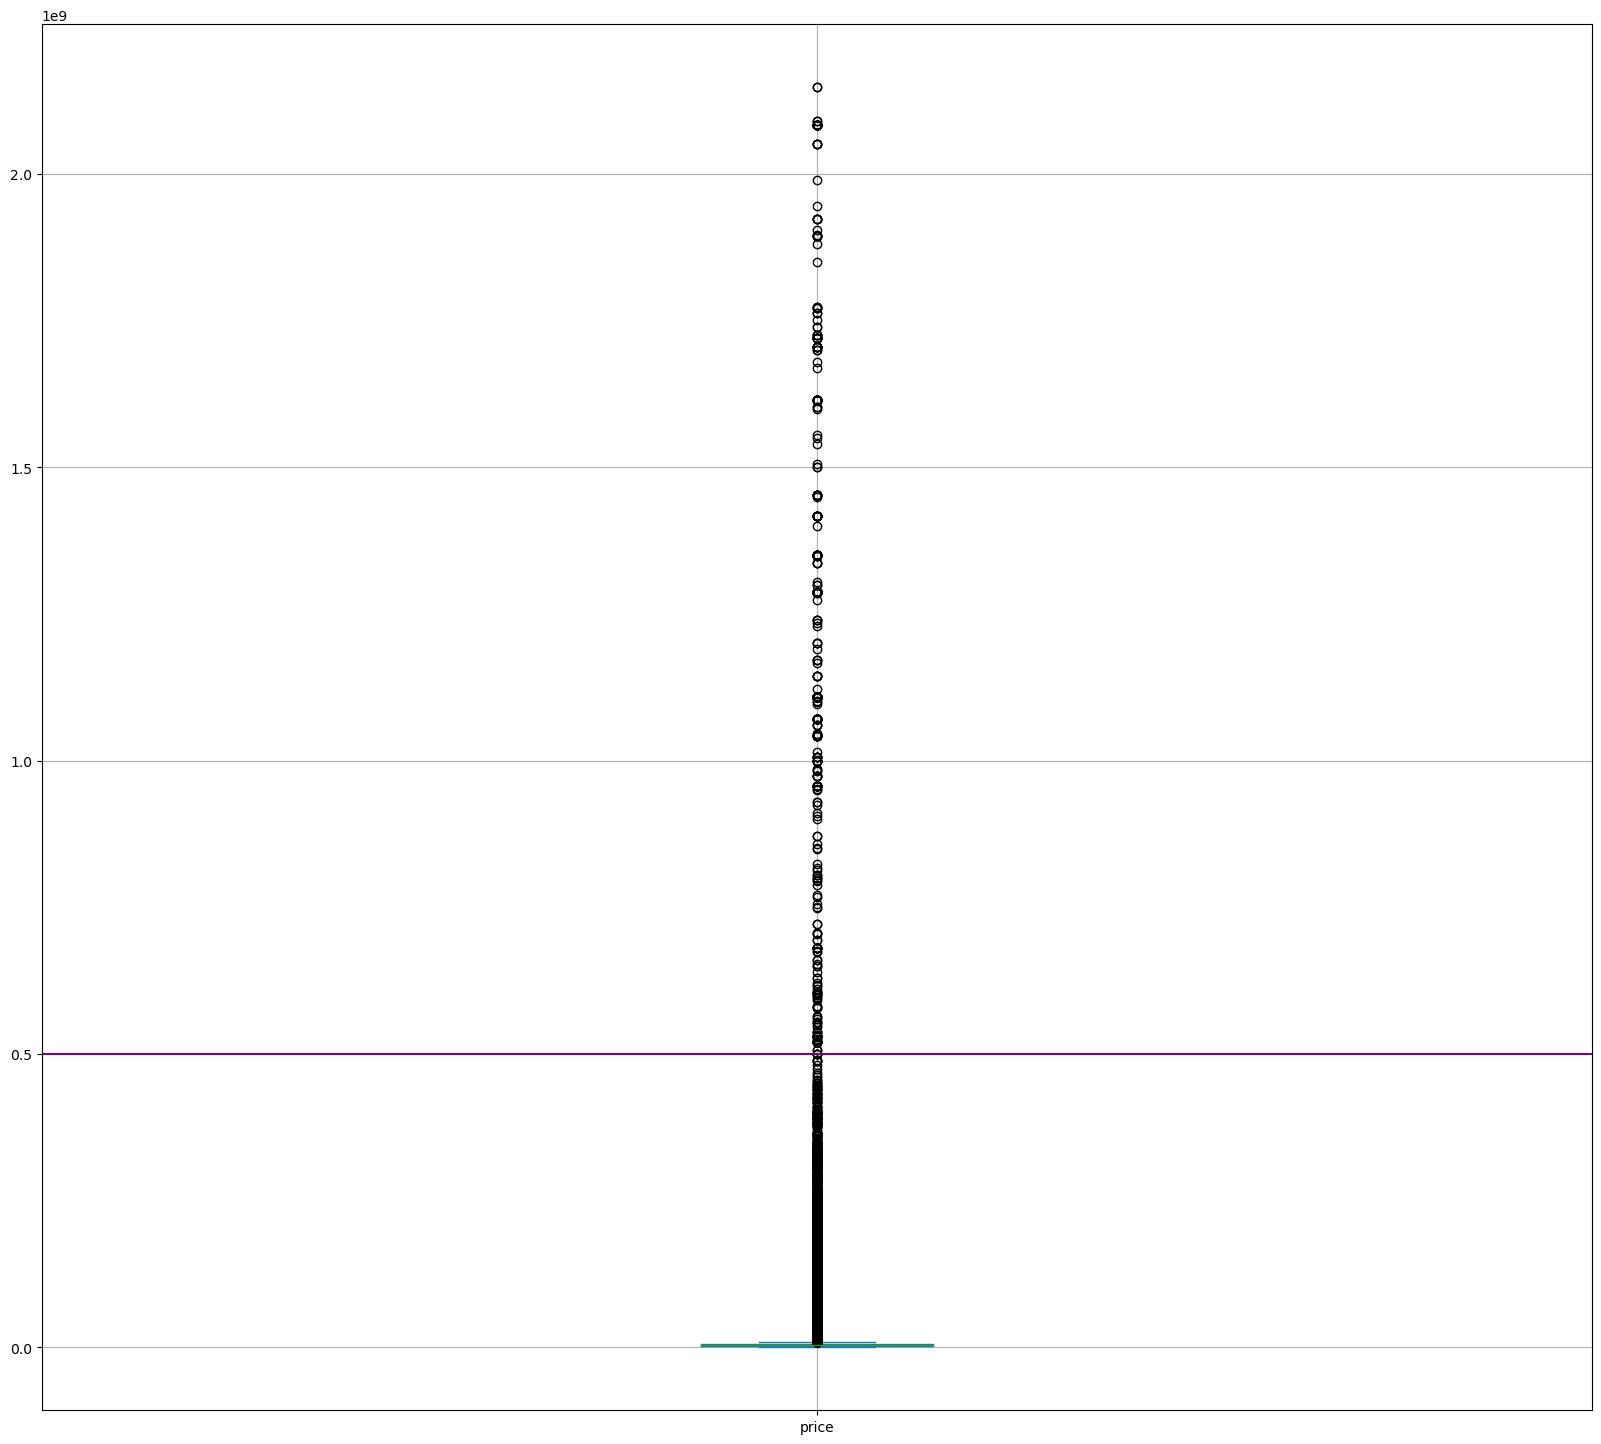

In [75]:
# построим boxplot по стоимости
df['price'].plot(kind='box', figsize=(20, 18), grid=True)
plt.axhline(y=500000000, color = 'purple')

На самом деле была попытка рассмотреть только экстремальные выбросы, но потом было принято решение рассматривать цену за м^2, т.к. на мой взгляд, это более показательный столбец.

In [93]:
ejection('pr_m')

(162929.57193807862, -28882.619896797696, 390218, 7.4405257322201654)

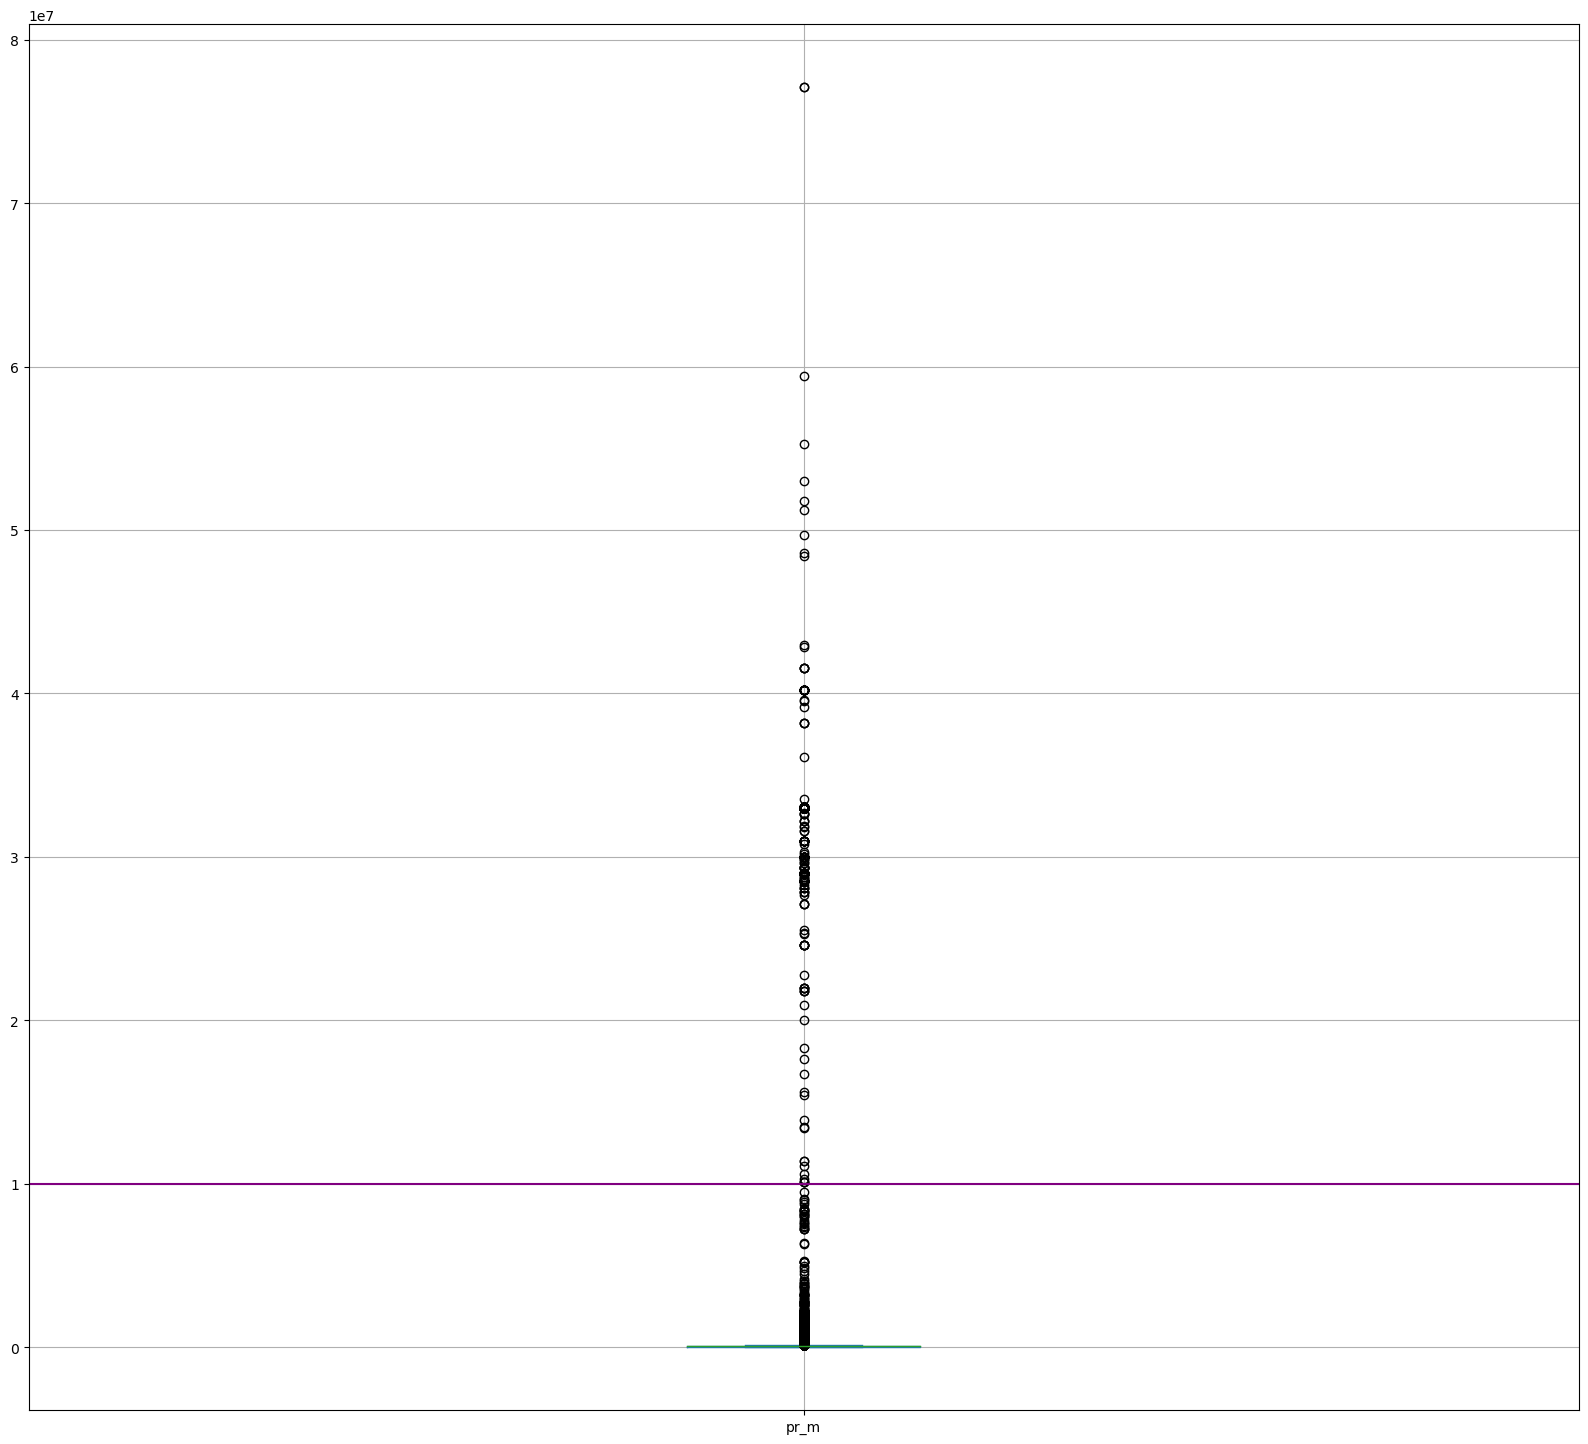

In [76]:
# построим boxplot по стоимости за метр
df['pr_m'].plot(kind='box', figsize=(20, 18), grid=True)
plt.axhline(y=10000000, color = 'purple')

Цена квадратного метра установлена на первое полугодие 2018 года в размере 37 848 рублей, что на 472 рубля ниже второго полугодия 2017 года.
Источник: https://rg.ru/2018/01/22/minstroj-vpervye-za-9-let-ponizil-normativ-stoimosti-kvadratnogo-metra.html
https://base.garant.ru/71854826/

В качестве минимума я приму это значение.

In [86]:
 df[df['pr_m'] < 37848]

price       date region  building_type  level  levels  rooms  area  \
18       1450000 2018-03-16   2900              1      9      10      1  43.0   
19       1650000 2018-03-16   2843              3      5       5      2  51.0   
26        950000 2018-03-25   6171              3      2       5      1  32.0   
51       1200000 2018-04-25   2871              3      5       5      2  40.7   
57       1450000 2018-05-04   6817              3      4       4      2  44.0   
...          ...        ...    ...            ...    ...     ...    ...   ...   
5244397  1450000 2021-05-01   2604              3      2       3      1  40.0   
5244432  2200000 2021-05-01   6817              1      3       9      3  59.0   
5244442   800000 2021-05-01   2871              3      3       3      2  43.0   
5244482  1700000 2021-05-01   5282              3      1       3      2  48.0   
5244484   650000 2021-05-01   3019              3      2       2      1  42.0   

         kitchen_area  object_type               reg_name          pr_m  
18            9.00000            1    Ставропольский край  33720.930233  
19            9.48466            1     Краснодарский край  32352.941176  
26           10.00000            1   Свердловская область  29687.500000  
51            5.50000           11  Нижегородская область  29484.029484  
57            6.00000            1         Алтайский край  32954.545455  
...               ...          ...                    ...           ...  
5244397      10.00000           11    Ярославская область  36250.000000  
5244432       8.00000            1         Алтайский край  37288.135593  
5244442       9.00000            1  Нижегородская область  18604.651163  
5244482       9.00000            1    Челябинская область  35416.666667  
5244484      13.00000            1   Чувашская Республика  15476.190476  

[949861 rows x 12 columns]

Таких строк оказалось очень много, поэтому после изучения документа оказалось, что в каждом регионе опять же установлены свои значения. Это указано в приложении.
Источник: https://base.garant.ru/71854826/

In [77]:
dop1 = pd.read_excel('Норма.xlsx')
dop1.head(1)

№              reg_name  pr_m_min
0  1  Белгородская область     35884

Попробуем объединить датасеты.

In [78]:
# создадим список уникальных значений 
un = df['reg_name'].astype(str).unique().tolist()
un

['Санкт-Петербург',
 'Московская область',
 'Нижегородская область',
 'Краснодарский край',
 'Москва',
 'Самарская область',
 'Республика Татарстан',
 'Ставропольский край',
 'Республика Башкортостан',
 'Свердловская область',
 'Ростовская область',
 'Республика Коми',
 'Челябинская область',
 'Иркутская область',
 'Ленинградская область',
 'Пермский край',
 'Алтайский край',
 'Республика Бурятия',
 'Ярославская область',
 'Удмуртская Республика',
 'Кабардино-Балкарская Республика',
 'Псковская область',
 'Республика Северная Осетия — Алания',
 'Кемеровская область',
 'Чувашская Республика',
 'Республика Марий Эл',
 'Красноярский край',
 'Тюменская область',
 'Республика Хакасия',
 'Республика Мордовия',
 'Новосибирская область',
 'Воронежская область',
 'Республика Карелия',
 'Республика Дагестан',
 'Республика Саха (Якутия)',
 'Забайкальский край',
 'Республика Крым',
 'Кировская область',
 'Республика Калмыкия',
 'Республика Адыгея',
 'Карачаево-Черкесская Республика',
 'Тверская об

In [79]:
# создадим список уникальных значений 
ur = dop1['reg_name'].unique().tolist()
ur

['Белгородская область',
 'Брянская область',
 'Владимирская область',
 'Воронежская область',
 'Ивановская область',
 'Калужская область',
 'Костромская область',
 'Курская область',
 'Липецкая область',
 'Московская область',
 'Орловская область',
 'Рязанская область',
 'Смоленская область',
 'Тамбовская область',
 'Тверская область',
 'Тульская область',
 'Ярославская область',
 'г. Москва',
 'Республика Карелия',
 'Республика Коми',
 'Архангельская область',
 'Вологодская область',
 'Калининградская область',
 'Ленинградская область',
 'Мурманская область',
 'Новгородская область',
 'Псковская область',
 'Ненецкий автономный округ',
 'г. Санкт-Петербург',
 'Республика Адыгея',
 'Республика Калмыкия',
 'Республика Крым',
 'Краснодарский край',
 'Астраханская область',
 'Волгоградская область',
 'Ростовская область',
 'г. Севастополь',
 'Республика Дагестан',
 'Республика Ингушетия',
 'Кабардино-Балкарская Республика',
 'Карачаево-Черкесская Республика',
 'Республика Северная Осетия 

In [80]:
a = []
b = []
for i in un:
    if i in ur:
        a.append(i)
    else:
        b.append(i)
b

['Санкт-Петербург',
 'Москва',
 'Республика Северная Осетия — Алания',
 'Чувашская Республика',
 'Ханты-Мансийский автономный округ']

In [81]:
dop1['reg_name'] = dop1['reg_name'].replace('г. Санкт-Петербург', 'Санкт-Петербург')
dop1['reg_name'] = dop1['reg_name'].replace('г. Москва', 'Москва')
dop1['reg_name'] = dop1['reg_name'].replace('Республика Северная Осетия - Алания', 'Республика Северная Осетия — Алания')
dop1['reg_name'] = dop1['reg_name'].replace('Чувашская Республика - Чувашия', 'Чувашская Республика')
dop1['reg_name'] = dop1['reg_name'].replace('Ханты-Мансийский автономный округ - Югра', 'Ханты-Мансийский автономный округ')

In [82]:
# создадим список уникальных значений 
ur = dop1['reg_name'].unique().tolist()
ur

['Белгородская область',
 'Брянская область',
 'Владимирская область',
 'Воронежская область',
 'Ивановская область',
 'Калужская область',
 'Костромская область',
 'Курская область',
 'Липецкая область',
 'Московская область',
 'Орловская область',
 'Рязанская область',
 'Смоленская область',
 'Тамбовская область',
 'Тверская область',
 'Тульская область',
 'Ярославская область',
 'Москва',
 'Республика Карелия',
 'Республика Коми',
 'Архангельская область',
 'Вологодская область',
 'Калининградская область',
 'Ленинградская область',
 'Мурманская область',
 'Новгородская область',
 'Псковская область',
 'Ненецкий автономный округ',
 'Санкт-Петербург',
 'Республика Адыгея',
 'Республика Калмыкия',
 'Республика Крым',
 'Краснодарский край',
 'Астраханская область',
 'Волгоградская область',
 'Ростовская область',
 'г. Севастополь',
 'Республика Дагестан',
 'Республика Ингушетия',
 'Кабардино-Балкарская Республика',
 'Карачаево-Черкесская Республика',
 'Республика Северная Осетия — Алан

In [83]:
a = []
b = []
for i in un:
    if i in ur:
        a.append(i)
    else:
        b.append(i)
b

[]

In [84]:
df = df.merge(dop1, on = 'reg_name')

In [85]:
df

price       date region  building_type  level  levels  rooms  area  \
0        6050000 2018-02-19   2661              1      8      10      3  82.6   
1        3600000 2018-03-04   2661              1      2       5      1  31.1   
2        3200000 2018-04-10   2661              1      7       9      1  31.0   
3        6500000 2018-04-23   2661              3      3       3      3  89.0   
4        6300000 2018-04-28   2661              3      5       5      2  99.9   
...          ...        ...    ...            ...    ...     ...    ...   ...   
5244332  3500000 2021-01-28   4963              1      9       9      3  66.0   
5244333  3000000 2018-11-29  61888              5      2       2      2  57.0   
5244334  6000000 2018-11-30  61888              3      5       5      2  64.3   
5244335  3500000 2018-11-30  61888              2      1       3      2  59.7   
5244336  5200000 2018-12-01  61888              3      5       5      2  72.5   

         kitchen_area  object_type                   reg_name           pr_m  \
0                10.8            1            Санкт-Петербург   73244.552058   
1                 6.0            1            Санкт-Петербург  115755.627010   
2                 7.0            1            Санкт-Петербург  103225.806452   
3                10.0            1            Санкт-Петербург   73033.707865   
4                14.5            1            Санкт-Петербург   63063.063063   
...               ...          ...                        ...            ...   
5244332          12.0            1            Приморский край   53030.303030   
5244333          10.0            1  Ненецкий автономный округ   52631.578947   
5244334          16.3            1  Ненецкий автономный округ   93312.597201   
5244335          10.2            1  Ненецкий автономный округ   58626.465662   
5244336          15.7            1  Ненецкий автономный округ   71724.137931   

          №  pr_m_min  
0        29     63416  
1        29     63416  
2        29     63416  
3        29     63416  
4        29     63416  
...      ..       ...  
5244332  79     50101  
5244333  28     56760  
5244334  28     56760  
5244335  28     56760  
5244336  28     56760  

[5244337 rows x 14 columns]

Посмотрим тогда столько получится строк при таком раскладе.

In [87]:
df[df['pr_m'] < df['pr_m_min']]

price       date region  building_type  level  levels  rooms  area  \
4        6300000 2018-04-28   2661              3      5       5      2  99.9   
43       2000000 2018-09-08   2661              3      2       3      2  40.5   
116      2086150 2018-09-08   2661              1     12      12      1  38.0   
146      1690000 2018-09-08   2661              3      2       5      2  41.5   
153      4480000 2018-09-08   2661              3      3       3      2  79.3   
...          ...        ...    ...            ...    ...     ...    ...   ...   
5244322  1300000 2019-10-22   4963              1      5       5      3  43.5   
5244323  2500000 2019-10-29   4963              1      2       5      2  50.0   
5244324  4200000 2020-04-11   4963              2      1       3      4  85.7   
5244327  1750000 2020-07-10   4963              4      2       5      3  54.0   
5244333  3000000 2018-11-29  61888              5      2       2      2  57.0   

         kitchen_area  object_type                   reg_name          pr_m  \
4                14.5            1            Санкт-Петербург  63063.063063   
43                6.0            1            Санкт-Петербург  49382.716049   
116              11.5           11            Санкт-Петербург  54898.684211   
146               5.7            1            Санкт-Петербург  40722.891566   
153               8.2            1            Санкт-Петербург  56494.325347   
...               ...          ...                        ...           ...   
5244322           9.0            1            Приморский край  29885.057471   
5244323           8.9            1            Приморский край  50000.000000   
5244324          12.0            1            Приморский край  49008.168028   
5244327           6.0            1            Приморский край  32407.407407   
5244333          10.0            1  Ненецкий автономный округ  52631.578947   

          №  pr_m_min  
4        29     63416  
43       29     63416  
116      29     63416  
146      29     63416  
153      29     63416  
...      ..       ...  
5244322  79     50101  
5244323  79     50101  
5244324  79     50101  
5244327  79     50101  
5244333  28     56760  

[935961 rows x 14 columns]

На самом деле это огромный пласт данных. Т.к. это показатели СРЕДНЕЙ рыночной стоимости, я решила сделать столбец с отклонением этих среднего от общего, указанного выше (37 848 рублей).

Посчитала средний разброс данных в экселевском файле, получилось 9489,893399 рублей. Я решила, чтобы удалить только те значения, которые точно не могли быть, вычту из минимального значения его половину. Все, что будет меньше - удалю.

In [86]:
df['pr_m_min'] = 0.5 * df['pr_m_min']

In [87]:
df[df['pr_m'] < df['pr_m_min']]

level_0    index    price       date region  building_type  level  \
229         3867     3868   900000 2018-09-08   2661              3      1   
515         8923     8925  1200000 2018-09-09   2661              1      2   
661        12716    12719  7000000 2018-09-10   2661              1      1   
1016       17576    17581  1500000 2018-09-10   2661              3      3   
1509       26537    26546   700000 2018-09-12   2661              4      1   
...          ...      ...      ...        ...    ...            ...    ...   
5244292   652449   652683   700000 2018-12-04   4963              3      4   
5244296   659710   659949  1110000 2018-12-05   4963              1      5   
5244309  1650940  1651562  1200000 2019-04-21   4963              1      1   
5244315  2264733  2265580  1300000 2019-07-25   4963              1      1   
5244321  2767512  2768476   800000 2019-10-21   4963              3      5   

         levels  rooms   area  kitchen_area  object_type         reg_name  \
229           2      2   49.0          12.0            1  Санкт-Петербург   
515           5      2   44.2           6.0            1  Санкт-Петербург   
661           8      4  700.0           8.3            1  Санкт-Петербург   
1016          5      2   54.0          12.0            1  Санкт-Петербург   
1509          9      1   33.2           6.7            1  Санкт-Петербург   
...         ...    ...    ...           ...          ...              ...   
5244292       5      1   29.0           6.0            1  Приморский край   
5244296       5      3   54.5           5.0            1  Приморский край   
5244309       5      2   63.0          10.7            1  Приморский край   
5244315       5      2   61.6          10.7            1  Приморский край   
5244321       5      2   42.0           8.0            1  Приморский край   

                 pr_m   №  pr_m_min  
229      18367.346939  29   31708.0  
515      27149.321267  29   31708.0  
661      10000.000000  29   31708.0  
1016     27777.777778  29   31708.0  
1509     21084.337349  29   31708.0  
...               ...  ..       ...  
5244292  24137.931034  79   25050.5  
5244296  20366.972477  79   25050.5  
5244309  19047.619048  79   25050.5  
5244315  21103.896104  79   25050.5  
5244321  19047.619048  79   25050.5  

[61070 rows x 16 columns]

In [87]:
df = df[df['pr_m'] >= df['pr_m_min']]
df

price       date region  building_type  level  levels  rooms  area  \
0        6050000 2018-02-19   2661              1      8      10      3  82.6   
1        3600000 2018-03-04   2661              1      2       5      1  31.1   
2        3200000 2018-04-10   2661              1      7       9      1  31.0   
3        6500000 2018-04-23   2661              3      3       3      3  89.0   
4        6300000 2018-04-28   2661              3      5       5      2  99.9   
...          ...        ...    ...            ...    ...     ...    ...   ...   
5244332  3500000 2021-01-28   4963              1      9       9      3  66.0   
5244333  3000000 2018-11-29  61888              5      2       2      2  57.0   
5244334  6000000 2018-11-30  61888              3      5       5      2  64.3   
5244335  3500000 2018-11-30  61888              2      1       3      2  59.7   
5244336  5200000 2018-12-01  61888              3      5       5      2  72.5   

         kitchen_area  object_type                   reg_name           pr_m  \
0                10.8            1            Санкт-Петербург   73244.552058   
1                 6.0            1            Санкт-Петербург  115755.627010   
2                 7.0            1            Санкт-Петербург  103225.806452   
3                10.0            1            Санкт-Петербург   73033.707865   
4                14.5            1            Санкт-Петербург   63063.063063   
...               ...          ...                        ...            ...   
5244332          12.0            1            Приморский край   53030.303030   
5244333          10.0            1  Ненецкий автономный округ   52631.578947   
5244334          16.3            1  Ненецкий автономный округ   93312.597201   
5244335          10.2            1  Ненецкий автономный округ   58626.465662   
5244336          15.7            1  Ненецкий автономный округ   71724.137931   

          №  pr_m_min  
0        29   31708.0  
1        29   31708.0  
2        29   31708.0  
3        29   31708.0  
4        29   31708.0  
...      ..       ...  
5244332  79   25050.5  
5244333  28   28380.0  
5244334  28   28380.0  
5244335  28   28380.0  
5244336  28   28380.0  

[5183267 rows x 14 columns]

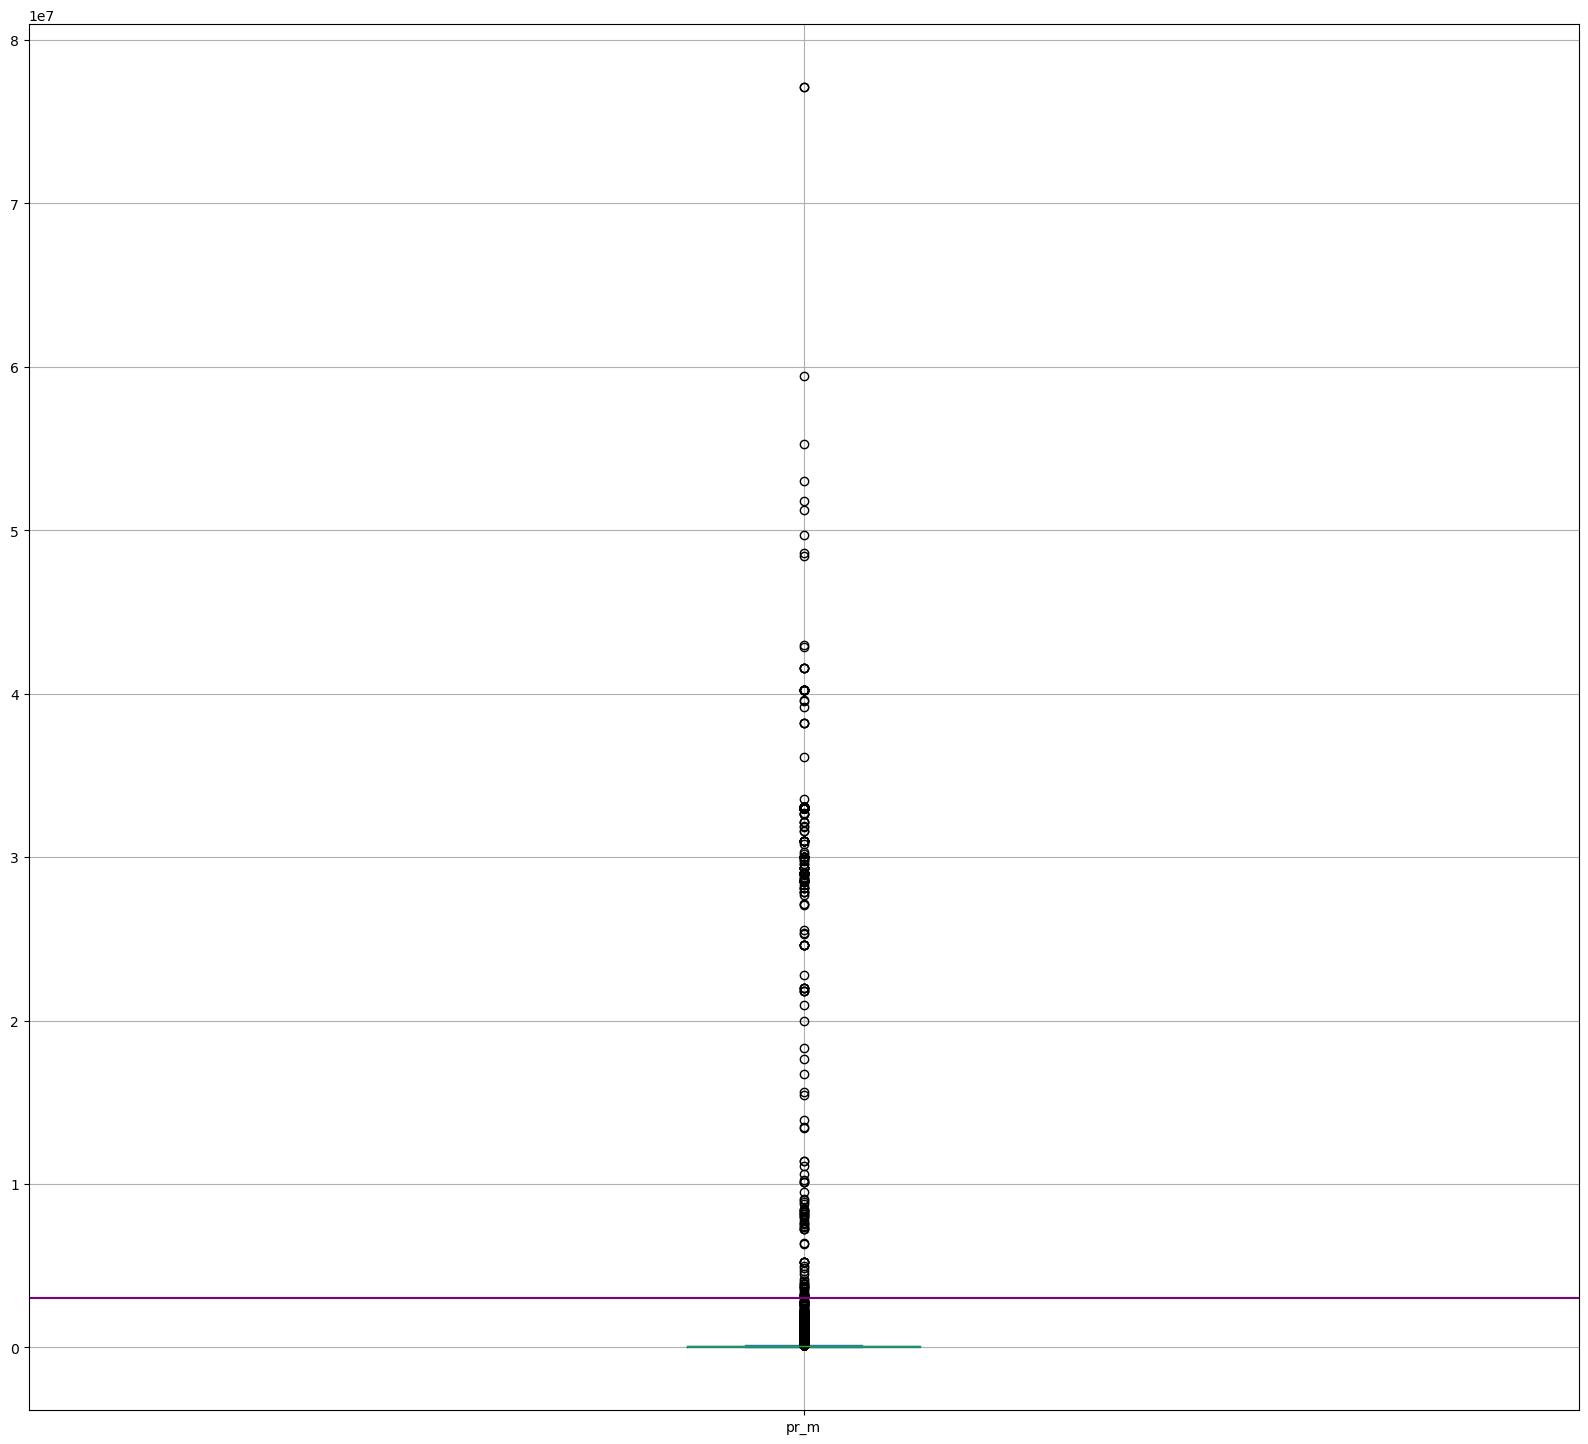

In [88]:
# построим boxplot по стоимости за метр
df['pr_m'].plot(kind='box', figsize=(20, 18), grid=True)
plt.axhline(y=3000000, color = 'purple')

Попробуем посмотреть только экстремальные выбросы.

In [89]:
dfex = df[(df['pr_m'] > 3000000) & (df['reg_name'] != 'Москва') & (df['reg_name'] != 'Санкт-Петербург') & (df['reg_name'] != 'Московская область') & (df['reg_name'] != 'Ленинградская область')]
dfex

price       date region  building_type  level  levels  rooms  \
1010512   405032704 2020-11-18   2871              3      8      10      1   
1017479   204395073 2021-02-11   2871              3      2      18      2   
1023952  1555032704 2021-03-29   2871              3      2       9      3   
1025894   304932704 2021-04-08   2871              3      3       3      3   
1160185  2089477704 2019-02-01   2843              2      5      25      3   
...             ...        ...    ...            ...    ...     ...    ...   
5053957   999999999 2019-04-17  13913              3      2       6     -1   
5053990   999999999 2019-05-21  13913              0      7       9      5   
5144590   350000000 2020-01-02   2885              2      7       7      3   
5200230  1285032704 2020-07-14   7896              3      7       9      4   
5200281  1285032704 2020-07-15   7896              3      7       9      4   

           area  kitchen_area  object_type                 reg_name  \
1010512   48.70         11.30            1    Нижегородская область   
1017479   52.10         10.20            1    Нижегородская область   
1023952   61.50          7.30            1    Нижегородская область   
1025894   81.70          7.00            1    Нижегородская область   
1160185   95.86         15.00           11       Краснодарский край   
...         ...           ...          ...                      ...   
5053957   99.00          9.00            1     Республика Ингушетия   
5053990   99.00         33.00            1     Республика Ингушетия   
5144590   98.00         11.00            1     Чеченская Республика   
5200230  112.71         12.82           11  Калининградская область   
5200281  112.71         12.82           11  Калининградская область   

                 pr_m   №  pr_m_min  
1010512  8.316893e+06  53   22063.0  
1017479  3.923130e+06  53   22063.0  
1023952  2.528508e+07  53   22063.0  
1025894  3.732346e+06  53   22063.0  
1160185  2.179718e+07  33   18484.5  
...               ...  ..       ...  
5053957  1.010101e+07  39   13624.0  
5053990  1.010101e+07  39   13624.0  
5144590  3.571429e+06  43   16304.0  
5200230  1.140123e+07  23   18211.0  
5200281  1.140123e+07  23   18211.0  

[512 rows x 14 columns]

Я удалю все эти выбросы, отфильтровав 4 региона, потому что не может быть такой стоимости за метр, такое может быть только при каких-то особых условиях элитных новостроек.

In [90]:
a = dfex.index.tolist()
a

[1010512,
 1017479,
 1023952,
 1025894,
 1160185,
 1201217,
 1264363,
 1359356,
 1368503,
 1369157,
 1371926,
 1385966,
 1397478,
 1407185,
 1474943,
 1554251,
 1558262,
 1585464,
 1617557,
 1647869,
 1649904,
 2082512,
 2102049,
 2342914,
 2351661,
 2421710,
 2492017,
 2721576,
 2924071,
 2927278,
 3000059,
 3115152,
 3318782,
 3333963,
 3338423,
 3499375,
 3509269,
 3548760,
 3609477,
 3611475,
 3612492,
 3762289,
 3772037,
 3775819,
 3789390,
 3838516,
 3842570,
 3862279,
 3869300,
 3879770,
 3880225,
 3906196,
 3906963,
 3907990,
 3909868,
 3912020,
 3913668,
 3919568,
 3978806,
 3992729,
 3995136,
 3995795,
 3996010,
 3997837,
 3998793,
 3999671,
 4002367,
 4003005,
 4004914,
 4006169,
 4007684,
 4009245,
 4010371,
 4011845,
 4012826,
 4014470,
 4015693,
 4017003,
 4018839,
 4020139,
 4022051,
 4023672,
 4024548,
 4036792,
 4037270,
 4038692,
 4039153,
 4041473,
 4041695,
 4042140,
 4042625,
 4043002,
 4043147,
 4043844,
 4045112,
 4045987,
 4046289,
 4046441,
 4047426,
 4047785,


In [91]:
df = df.drop(index = a,axis=1)
df

price       date region  building_type  level  levels  rooms  area  \
0        6050000 2018-02-19   2661              1      8      10      3  82.6   
1        3600000 2018-03-04   2661              1      2       5      1  31.1   
2        3200000 2018-04-10   2661              1      7       9      1  31.0   
3        6500000 2018-04-23   2661              3      3       3      3  89.0   
4        6300000 2018-04-28   2661              3      5       5      2  99.9   
...          ...        ...    ...            ...    ...     ...    ...   ...   
5244332  3500000 2021-01-28   4963              1      9       9      3  66.0   
5244333  3000000 2018-11-29  61888              5      2       2      2  57.0   
5244334  6000000 2018-11-30  61888              3      5       5      2  64.3   
5244335  3500000 2018-11-30  61888              2      1       3      2  59.7   
5244336  5200000 2018-12-01  61888              3      5       5      2  72.5   

         kitchen_area  object_type                   reg_name           pr_m  \
0                10.8            1            Санкт-Петербург   73244.552058   
1                 6.0            1            Санкт-Петербург  115755.627010   
2                 7.0            1            Санкт-Петербург  103225.806452   
3                10.0            1            Санкт-Петербург   73033.707865   
4                14.5            1            Санкт-Петербург   63063.063063   
...               ...          ...                        ...            ...   
5244332          12.0            1            Приморский край   53030.303030   
5244333          10.0            1  Ненецкий автономный округ   52631.578947   
5244334          16.3            1  Ненецкий автономный округ   93312.597201   
5244335          10.2            1  Ненецкий автономный округ   58626.465662   
5244336          15.7            1  Ненецкий автономный округ   71724.137931   

          №  pr_m_min  
0        29   31708.0  
1        29   31708.0  
2        29   31708.0  
3        29   31708.0  
4        29   31708.0  
...      ..       ...  
5244332  79   25050.5  
5244333  28   28380.0  
5244334  28   28380.0  
5244335  28   28380.0  
5244336  28   28380.0  

[5182755 rows x 14 columns]

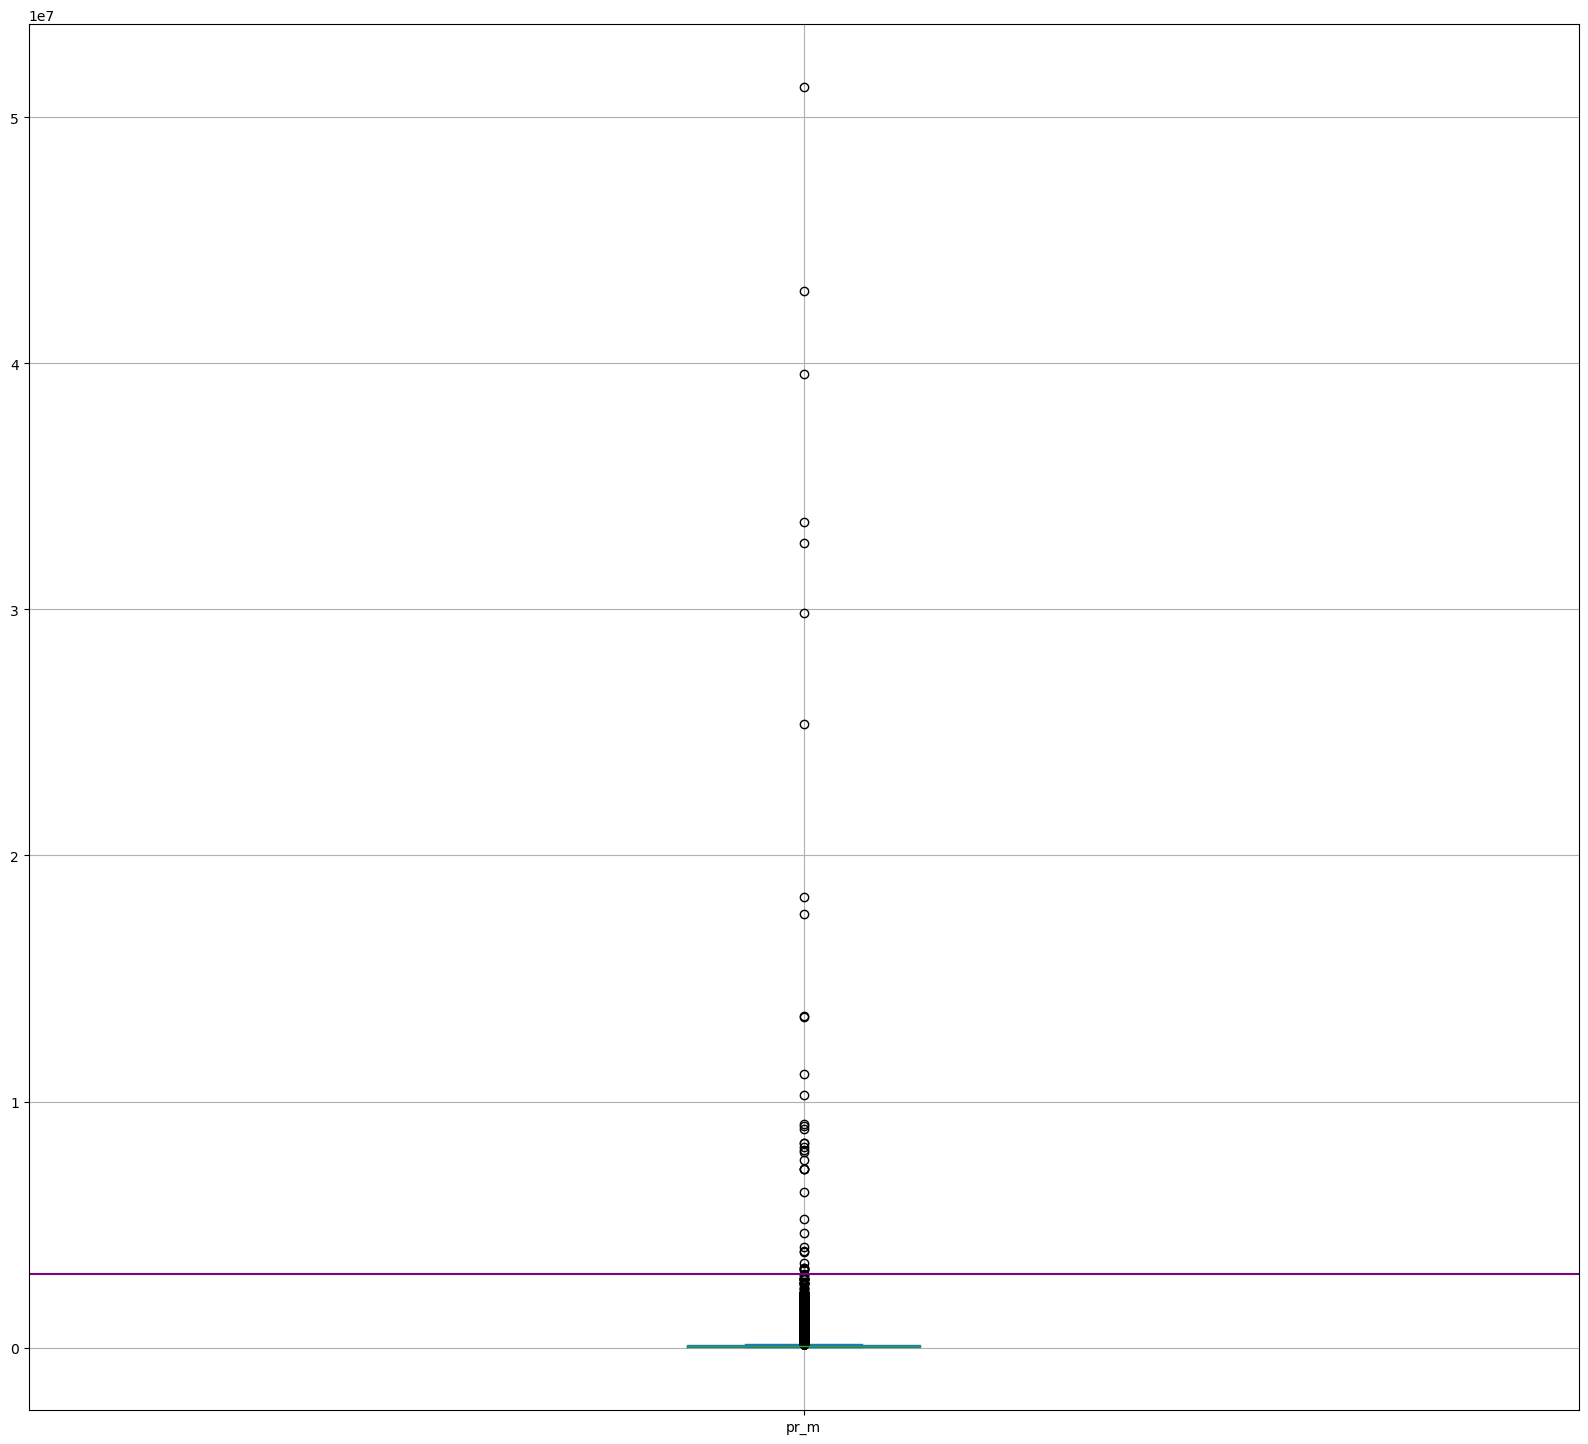

In [92]:
# построим boxplot по стоимости за метр
df['pr_m'].plot(kind='box', figsize=(20, 18), grid=True)
plt.axhline(y = 3000000, color = 'purple')

Посмотрим стоимость общую.

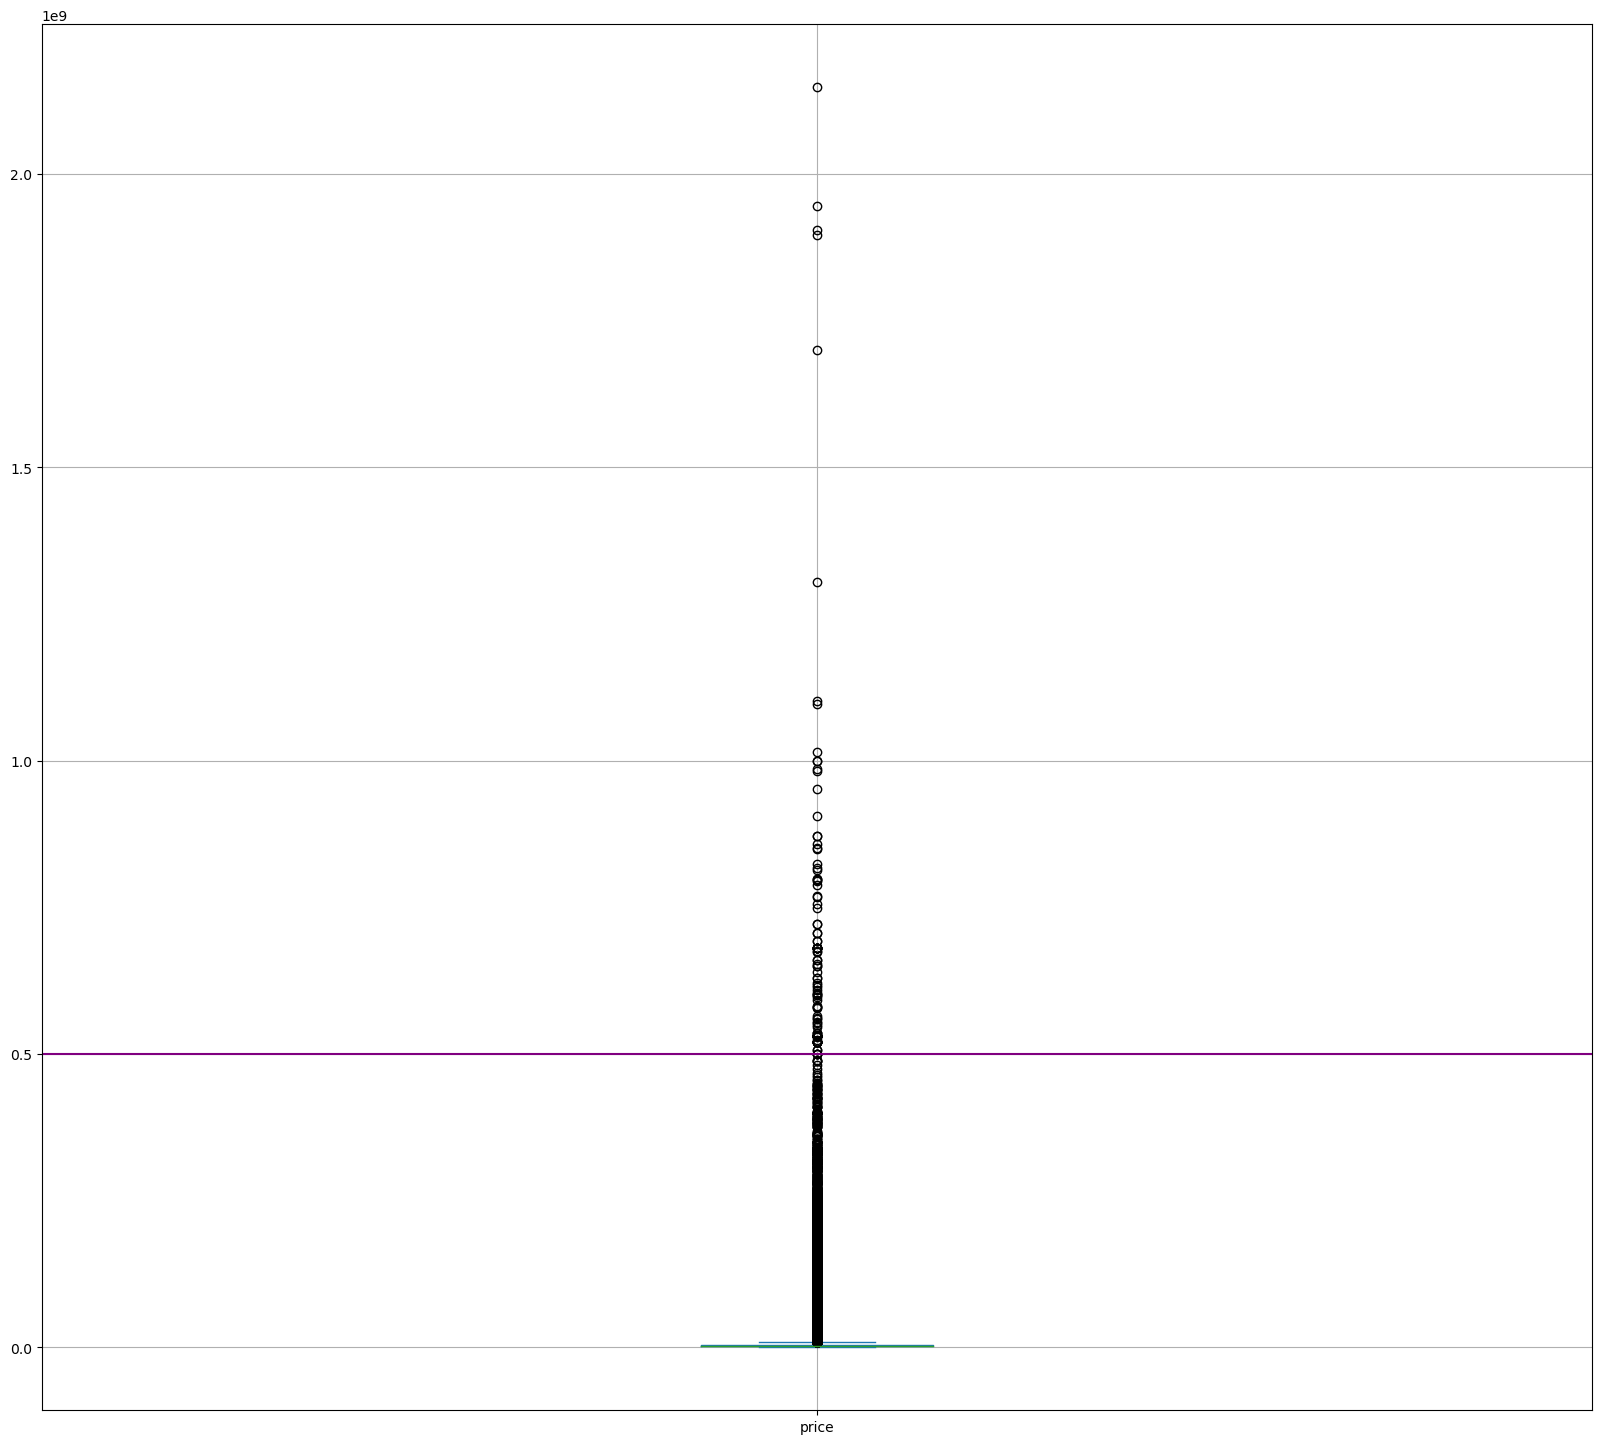

In [94]:
# построим boxplot по стоимости
df['price'].plot(kind='box', figsize=(20, 18), grid=True)
plt.axhline(y=500000000, color = 'purple')

In [95]:
df[df['price'] > 500000000]

price       date region  building_type  level  levels  rooms  \
92952     579000000 2019-04-11   2661              3      2       4      5   
121154    536500000 2019-06-27   2661              2     11      13      4   
151542   1305032704 2019-09-07   2661              2      5      10      1   
179552    520000345 2019-11-08   2661              0      1       3      5   
181563    680000000 2019-11-11   2661              0      2       4      5   
...             ...        ...    ...            ...    ...     ...    ...   
2044693   529461100 2021-04-01      3              2     12      12      5   
2046200   770144768 2021-04-04      3              2     13      13      4   
3213121   555032704 2021-03-15   3446              2      1      16      1   
5053953   999999999 2019-04-17  13913              0      1      20      5   
5053955   999999999 2019-04-17  13913              0      1       2      5   

           area  kitchen_area  object_type               reg_name  \
92952     443.0     10.000000            1        Санкт-Петербург   
121154    536.5     10.000000            1        Санкт-Петербург   
151542     33.0      8.900000            1        Санкт-Петербург   
179552   1211.0     21.600000            1        Санкт-Петербург   
181563    493.0    135.500000            1        Санкт-Петербург   
...         ...           ...          ...                    ...   
2044693   324.0     54.000000            1                 Москва   
2046200   415.8     35.000000           11                 Москва   
3213121    31.5     18.830164            1  Ленинградская область   
5053953   800.0     25.000000            1   Республика Ингушетия   
5053955   999.0     25.000000            1   Республика Ингушетия   

                 pr_m   №  pr_m_min  
92952    1.306998e+06  29   31708.0  
121154   1.000000e+06  29   31708.0  
151542   3.954645e+07  29   31708.0  
179552   4.293975e+05  29   31708.0  
181563   1.379310e+06  29   31708.0  
...               ...  ..       ...  
2044693  1.634139e+06  18   45835.0  
2046200  1.852200e+06  18   45835.0  
3213121  1.762009e+07  24   21549.5  
5053953  1.250000e+06  39   13624.0  
5053955  1.001001e+06  39   13624.0  

[110 rows x 14 columns]

Посмотрим сколько таких в не Москве, не в Санкт-Петербурге, не в Московской области и не Ленинградской области, потому что там высокая цена скорее не выброс, а факт.

In [95]:
df_pr = df[(df['price'] > 500000000) & (df['reg_name'] != 'Москва') & (df['reg_name'] != 'Санкт-Петербург') & (df['reg_name'] != 'Московская область') & (df['reg_name'] != 'Ленинградская область')]
df_pr

price       date region  building_type  level  levels  rooms  \
5053953  999999999 2019-04-17  13913              0      1      20      5   
5053955  999999999 2019-04-17  13913              0      1       2      5   

          area  kitchen_area  object_type              reg_name          pr_m  \
5053953  800.0          25.0            1  Республика Ингушетия  1.250000e+06   
5053955  999.0          25.0            1  Республика Ингушетия  1.001001e+06   

          №  pr_m_min  
5053953  39   13624.0  
5053955  39   13624.0

Возможно, если площадь квартиры очень большая - она может иметь такую стоимость. Посмотрим на это.

В августе в Москве средняя площадь квартиры в новостройке составила 55,1 кв. м. Самая маленькая недвижимость — в Ленинградской и Архангельской областях и Санкт-Петербурге, (40,4 кв. м, 44 кв. м, 42,9 кв. м соответственно). В Чечне средняя площадь квартиры в новостройке 75 кв. м, в Кабардино-Балкарии — 68 кв. м, а в Северной Осетии — 63 кв. м. Это максимальные значения по стране.
(Источник: https://dzen.ru/a/ZuPqIWOpGQxy1LDw)

Будем считать большую площадь - более 100

In [96]:
df_pr = df_pr[df_pr['area'] <= 100]
df_pr

Empty DataFrame
Columns: [price, date, region, building_type, level, levels, rooms, area, kitchen_area, object_type, reg_name, pr_m, №, pr_m_min]
Index: []

Экстремальных выбросов нет. Большая часть из них - 4 главных региона.

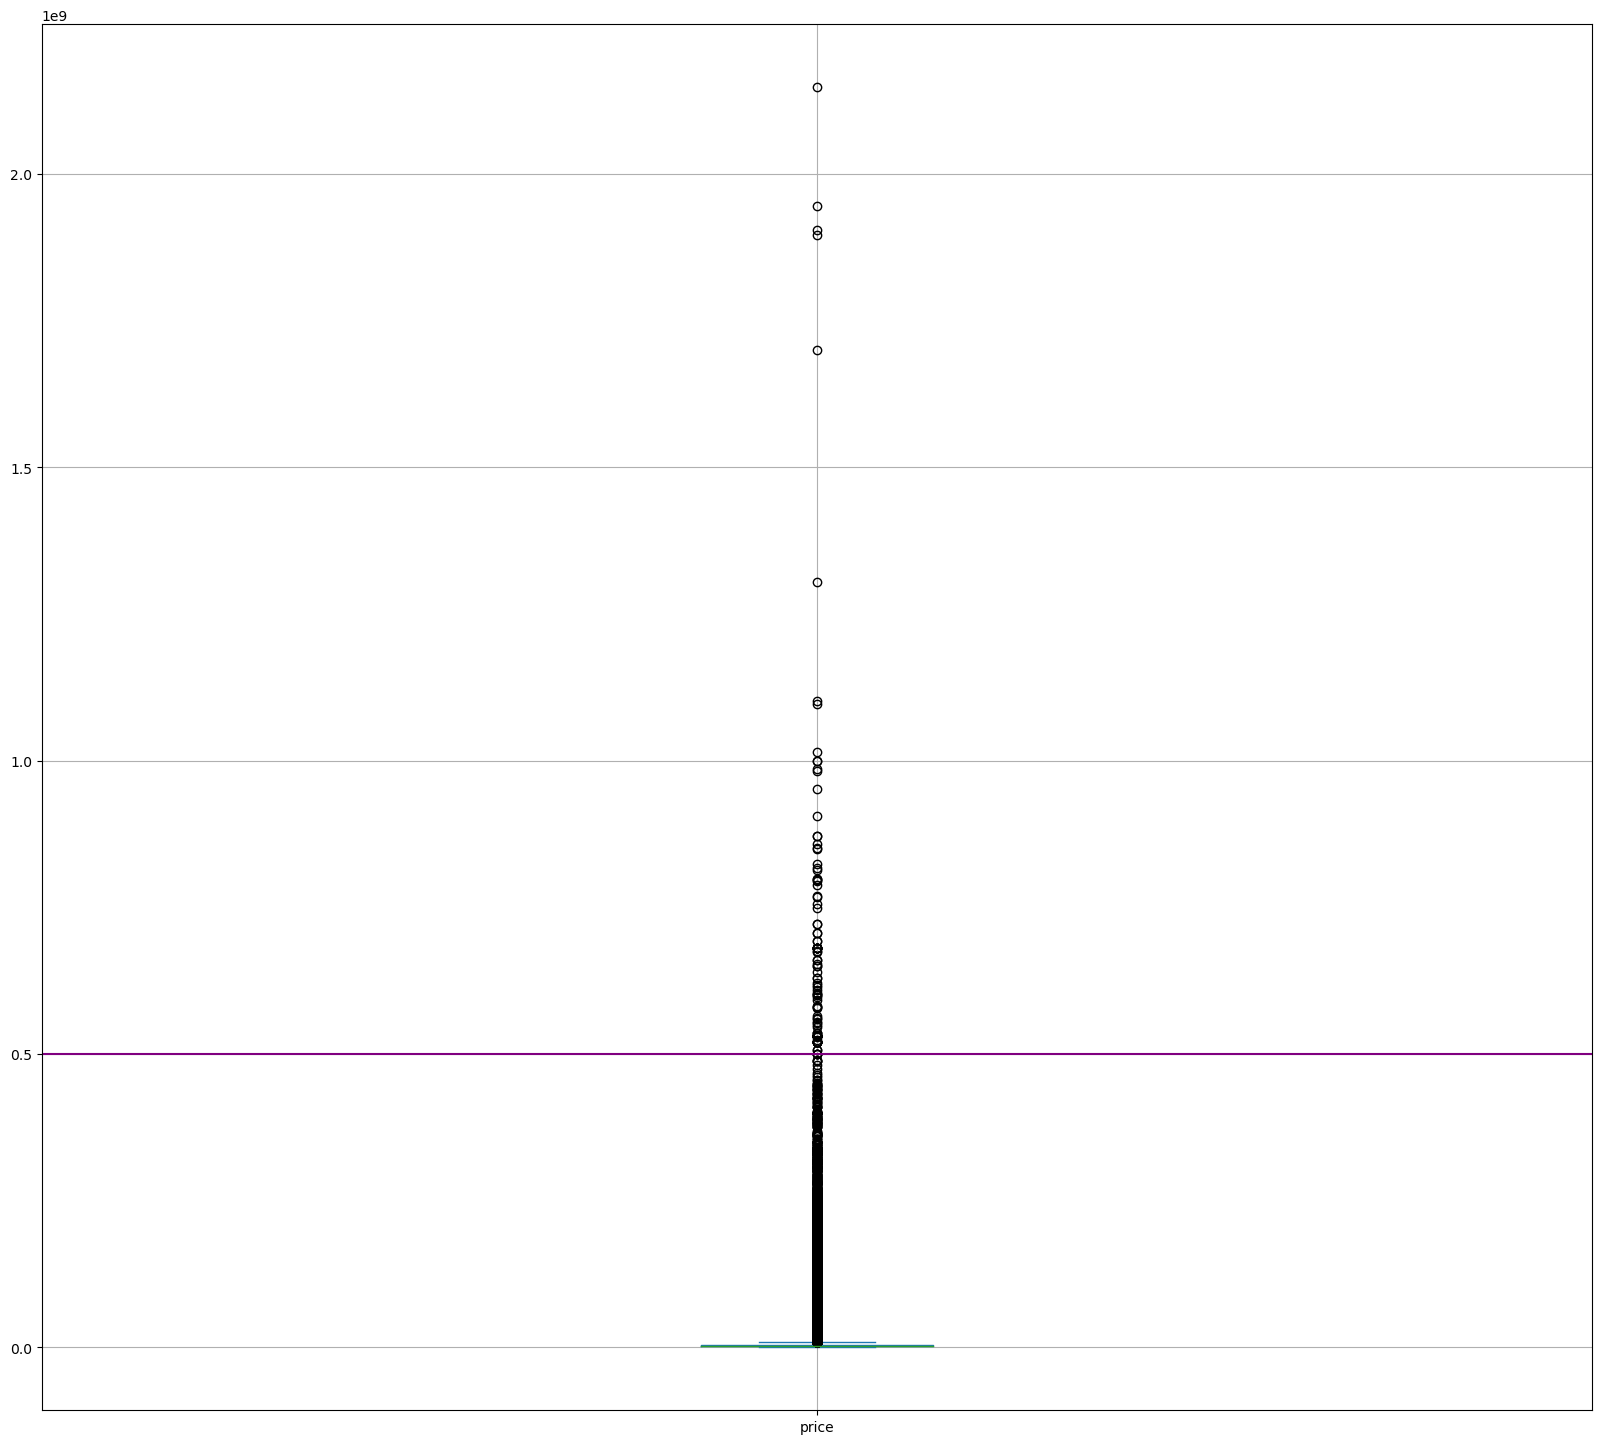

In [98]:
# построим boxplot по стоимости
df['price'].plot(kind='box', figsize=(20, 18), grid=True)
plt.axhline(y=500000000, color = 'purple')

На самом деле, я старалась везде работать с ограничением минимальных значений, т.к. есть установленные нормативы. С максимальными значениями сложнее, т.к. чисто теоретически возможно все. Я удалила только экстремальные выбросы, потому что это получилось 5 182 755 \ 5 477 006 = 0,9462752, т.е. я итак удалила 5,37%.

In [100]:
df.to_csv('Редакт.csv')

Я сохранила файл в csv, потому что каждый раз перегружать ячейки очень долго и сложно.

[Вернуться к Навигации](#1)

In [ ]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import t, norm
from scipy import stats as st
from scipy import stats
from scipy.stats import boxcox
from scipy.stats import mannwhitneyu

In [5]:
# загрузим данные
df = pd.read_csv('Редакт.csv')
df

Unnamed: 0    price        date  region  building_type  level  \
0                 0  6050000  2018-02-19    2661              1      8   
1                 1  3600000  2018-03-04    2661              1      2   
2                 2  3200000  2018-04-10    2661              1      7   
3                 3  6500000  2018-04-23    2661              3      3   
4                 4  6300000  2018-04-28    2661              3      5   
...             ...      ...         ...     ...            ...    ...   
5182750     5244332  3500000  2021-01-28    4963              1      9   
5182751     5244333  3000000  2018-11-29   61888              5      2   
5182752     5244334  6000000  2018-11-30   61888              3      5   
5182753     5244335  3500000  2018-11-30   61888              2      1   
5182754     5244336  5200000  2018-12-01   61888              3      5   

         levels  rooms  area  kitchen_area  object_type  \
0            10      3  82.6          10.8            1   
1             5      1  31.1           6.0            1   
2             9      1  31.0           7.0            1   
3             3      3  89.0          10.0            1   
4             5      2  99.9          14.5            1   
...         ...    ...   ...           ...          ...   
5182750       9      3  66.0          12.0            1   
5182751       2      2  57.0          10.0            1   
5182752       5      2  64.3          16.3            1   
5182753       3      2  59.7          10.2            1   
5182754       5      2  72.5          15.7            1   

                          reg_name           pr_m   №  pr_m_min  
0                  Санкт-Петербург   73244.552058  29   31708.0  
1                  Санкт-Петербург  115755.627010  29   31708.0  
2                  Санкт-Петербург  103225.806452  29   31708.0  
3                  Санкт-Петербург   73033.707865  29   31708.0  
4                  Санкт-Петербург   63063.063063  29   31708.0  
...                            ...            ...  ..       ...  
5182750            Приморский край   53030.303030  79   25050.5  
5182751  Ненецкий автономный округ   52631.578947  28   28380.0  
5182752  Ненецкий автономный округ   93312.597201  28   28380.0  
5182753  Ненецкий автономный округ   58626.465662  28   28380.0  
5182754  Ненецкий автономный округ   71724.137931  28   28380.0  

[5182755 rows x 15 columns]

In [6]:
# продолжу редактирование, удалив ненужные столбцы
df = df.drop(labels = ['Unnamed: 0', 'pr_m_min', '№'], axis = 1)
df.head(1)

price        date  region  building_type  level  levels  rooms  area  \
0  6050000  2018-02-19    2661              1      8      10      3  82.6   

   kitchen_area  object_type         reg_name          pr_m  
0          10.8            1  Санкт-Петербург  73244.552058

Я также решила проверить этажность домов по building_type.

## <a class="anchor" id="2"><div class="alert alert-block alert-info">3. Связь building_type и levels.

Сегодня же строить панельные дома можно до 25 этажей включительно без опасений.<br>
Монолитная технология позволяет строить дома свыше 25 этажей.<br>
Согласно строительным нормам, кирпичный дом не может превышать 18 этажей.<br>
Некоторые серии блочных домов могут достигать высоты в 22 этажа. Например, к таким сериям относятся II-68, И-209А, И-522А, И-700, а также их модификации.<br>
Но уже сейчас в России возможно строить дома на основе таких конструкций высотой до 9 этажей - деревянные (в 2024 можно уже 12, но данные за 2021)<br>
Читайте на WWW.KP.RU: https://www.kp.ru/daily/27415/4614428/
Источник: https://urielt.by/blog/panelniy-dom-plyusi-minusi
https://www.fontanka.ru/2021/10/25/70214579/
https://dzen.ru/a/YRgd7343F162N1do
https://mostpr.ru/article/blochnyy-dom-vse-osobennosti
https://www.kp.ru/daily/27415/4614428/

In [7]:
df[(df['building_type'] == 1) & (df['levels'] > 25)]

price        date  region  building_type  level  levels  rooms  \
20149     3600000  2018-09-29    2661              1      9      26      1   
20330     7000000  2018-09-30    2661              1     25      26      2   
23111     5980000  2018-10-09    2661              1     10      26      1   
25507     4441690  2018-10-15    2661              1     15      26      2   
25508     4226985  2018-10-15    2661              1      8      26      2   
...           ...         ...     ...            ...    ...     ...    ...   
5106545  14250000  2021-03-12    4695              1     20      26      3   
5107965   3790000  2020-03-05    5143              1     17      27      2   
5108331   3990000  2020-05-14    5143              1     21      27      3   
5108736   2350000  2020-07-04    5143              1      9      27      1   
5109418   2870000  2020-10-26    5143              1     25      27      1   

          area  kitchen_area  object_type               reg_name  \
20149     34.3      7.500000           11        Санкт-Петербург   
20330     60.0     13.280474            1        Санкт-Петербург   
23111     40.0     14.000000            1        Санкт-Петербург   
25507     59.6     16.400000           11        Санкт-Петербург   
25508     57.5      9.900000           11        Санкт-Петербург   
...        ...           ...          ...                    ...   
5106545  122.2     18.500000            1  Волгоградская область   
5107965   61.0     17.000000           11       Тульская область   
5108331   80.0     20.000000           11       Тульская область   
5108736   42.0     10.000000           11       Тульская область   
5109418   44.0     12.000000           11       Тульская область   

                  pr_m  
20149    104956.268222  
20330    116666.666667  
23111    149500.000000  
25507     74525.000000  
25508     73512.782609  
...                ...  
5106545  116612.111293  
5107965   62131.147541  
5108331   49875.000000  
5108736   55952.380952  
5109418   65227.272727  

[4953 rows x 12 columns]

In [8]:
df[(df['building_type'] == 3) & (df['levels'] > 18)]

price        date  region  building_type  level  levels  rooms  \
12        7101000  2018-07-16    2661              3      3      25      2   
18        4800000  2018-08-30    2661              3      8      19      1   
24       10470000  2018-08-31    2661              3      9      22      2   
38        3750000  2018-09-08    2661              3      9      24      1   
52        8750000  2018-09-08    2661              3     17      25      2   
...           ...         ...     ...            ...    ...     ...    ...   
5180356   4550000  2021-04-09    2814              3      1      19      2   
5180358   3100000  2021-04-10    2814              3     15      19      1   
5180916   7000000  2020-05-12    7929              3     15      19      3   
5181075   3800000  2020-06-15    7929              3      9      19      1   
5181660   3300000  2020-10-15    7929              3      7      20      1   

         area  kitchen_area  object_type           reg_name           pr_m  
12       63.8     13.000000            1    Санкт-Петербург  111300.940439  
18       35.7      9.300000            1    Санкт-Петербург  134453.781513  
24       72.4     14.000000            1    Санкт-Петербург  144613.259669  
38       41.0      9.000000            1    Санкт-Петербург   91463.414634  
52       75.0     15.000000            1    Санкт-Петербург  116666.666667  
...       ...           ...          ...                ...            ...  
5180356  73.6     18.620000            1  Орловская область   61820.652174  
5180358  49.4     12.800000            1  Орловская область   62753.036437  
5180916  88.0     14.550633            1   Амурская область   79545.454545  
5181075  41.8      8.900000            1   Амурская область   90909.090909  
5181660  36.2      9.500000           11   Амурская область   91160.220994  

[127547 rows x 12 columns]

In [11]:
df[(df['building_type'] == 4) & (df['levels'] > 22)]

price        date  region  building_type  level  levels  rooms  \
1464     4500000  2018-09-11    2661              4     10      23      2   
2433     4600000  2018-09-13    2661              4      5      25      1   
3818     1650000  2018-09-17    2661              4     22      25     -1   
16630    4350000  2018-09-20    2661              4     10      25      1   
17767    4150000  2018-09-23    2661              4     12      25     -1   
...          ...         ...     ...            ...    ...     ...    ...   
5166884  1960000  2020-05-19    4249              4      7      25      1   
5167166  2580000  2020-06-23    4249              4      2      24      2   
5167540  1880000  2020-08-31    4249              4     18      24      2   
5167587  1700000  2020-09-08    4249              4      3      24      1   
5168250  2100000  2021-03-04    4249              4     18      24     -1   

         area  kitchen_area  object_type             reg_name           pr_m  
1464     70.0          14.0           11      Санкт-Петербург   64285.714286  
2433     37.9          10.1            1      Санкт-Петербург  121372.031662  
3818     26.0           8.0           11      Санкт-Петербург   63461.538462  
16630    44.0          11.0            1      Санкт-Петербург   98863.636364  
17767    26.1           6.0            1      Санкт-Петербург  159003.831418  
...       ...           ...          ...                  ...            ...  
5166884  39.0          11.0           11  Ульяновская область   50256.410256  
5167166  66.0          11.0            1  Ульяновская область   39090.909091  
5167540  55.0           9.0            1  Ульяновская область   34181.818182  
5167587  36.1           8.0            1  Ульяновская область   47091.412742  
5168250  36.6           8.0            1  Ульяновская область   57377.049180  

[2750 rows x 12 columns]

In [10]:
df[(df['building_type'] == 5) & (df['levels'] > 9)]

price        date  region  building_type  level  levels  rooms  \
929      3805550  2018-09-10    2661              5     25      25      1   
930      3250060  2018-09-10    2661              5      6      25      1   
931      4676770  2018-09-10    2661              5      2      24      2   
932      3952590  2018-09-10    2661              5     20      24      1   
933      1959750  2018-09-10    2661              5      2      12      1   
...          ...         ...     ...            ...    ...     ...    ...   
5058643  2844419  2020-11-26    5993              5     15      18      2   
5080579  2100000  2020-02-26    1491              5      4      10      1   
5100439  2149000  2018-12-02    4695              5      6      14      1   
5149544  3792000  2020-10-22    7896              5      1      10      2   
5173915  1950000  2021-04-26    3153              5     10      14      1   

         area  kitchen_area  object_type                 reg_name  \
929      41.5     17.700000            1          Санкт-Петербург   
930      37.4     14.300000            1          Санкт-Петербург   
931      49.7     10.000000            1          Санкт-Петербург   
932      36.7     10.000000            1          Санкт-Петербург   
933      22.5      5.900000            1          Санкт-Петербург   
...       ...           ...          ...                      ...   
5058643  55.1      9.700000           11       Пензенская область   
5080579  38.0     12.000000            1        Рязанская область   
5100439  39.0     14.000000            1    Волгоградская область   
5149544  63.2     12.806124           11  Калининградская область   
5173915  37.0     10.500000            1     Оренбургская область   

                  pr_m  
929       91700.000000  
930       86900.000000  
931       94100.000000  
932      107700.000000  
933       87100.000000  
...                ...  
5058643   51622.849365  
5080579   55263.157895  
5100439   55102.564103  
5149544   60000.000000  
5173915   52702.702703  

[1645 rows x 12 columns]

Чтобы не удалять данные, я поставлю вместо этажей максимум нормативных значений.

In [12]:
df.loc[(df['building_type'] == 5) & (df['levels'] > 9), 'levels'] = 9
df.loc[(df['building_type'] == 4) & (df['levels'] > 22), 'levels'] = 22
df.loc[(df['building_type'] == 3) & (df['levels'] > 18), 'levels'] = 18
df.loc[(df['building_type'] == 1) & (df['levels'] > 25), 'levels'] = 25

In [13]:
df[(df['building_type'] == 5) & (df['levels'] > 9)]

Empty DataFrame
Columns: [price, date, region, building_type, level, levels, rooms, area, kitchen_area, object_type, reg_name, pr_m]
Index: []

Данные предобработаны. Сохраню в новый файл.

In [14]:
df.to_csv('All.csv')

## <a class="anchor" id="40"><div class="alert alert-block alert-info">Выводы:
1. Все столбцы были проверены на аномалии, включая новый столбец - цена за м², а также были обработаны связанные столбцы.
2. Были строки, где этаж квартиры больше, чем всего этажей в доме. В таком случаи столбцы были поменяны местами.
3. Были строки, где площадь кухни больше или равна общей площади. Там, где площадь кухни больше, строки поменяли местами. Там, где они равны, строки были удалены.
4. Было обнаружено значение -2 в столбце с комнатами. По средней цене студии и первому квартилю значения до него были заменены на -1, а все следующие на 2.
5. Была вычислена минимальная площадь квартиры - 21, 85, удалены экстремальные выбросы (больше 2000)
6. Минимальная площадь кухни была определена как 5, а максимальная 150.
7. Был создан столбец pr_m с ценой за метр. Для минимальной средней цены за метр был загружен дополнительный датасет, составленный на основе нпа. Минимум был основан на 0,5*минимальное среднее из дополнительного датасета. Также были удалены экстремальные выбросы за исключением 4 регионов: Москва, Санкт-Петербург, Московская область, Ленинградская область. Экстремальных выбросов в цене не оказалось (с учётом площади).
8. Также у каждого материала дома есть максимум этажей, поэтому если этажей было больше нормы, число этажей менялось на максимальный этаж.

[Вернуться к Навигации](#1)

## <a class="anchor" id="11"><div class="alert alert-block alert-info">Задание №5

In [1]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import t, norm
from scipy import stats as st
from scipy import stats
from scipy.stats import boxcox
from scipy.stats import mannwhitneyu

In [2]:
# загрузим данные
df = pd.read_csv('All.csv')
df

Unnamed: 0    price        date  region  building_type  level  \
0                 0  6050000  2018-02-19    2661              1      8   
1                 1  3600000  2018-03-04    2661              1      2   
2                 2  3200000  2018-04-10    2661              1      7   
3                 3  6500000  2018-04-23    2661              3      3   
4                 4  6300000  2018-04-28    2661              3      5   
...             ...      ...         ...     ...            ...    ...   
5182750     5182750  3500000  2021-01-28    4963              1      9   
5182751     5182751  3000000  2018-11-29   61888              5      2   
5182752     5182752  6000000  2018-11-30   61888              3      5   
5182753     5182753  3500000  2018-11-30   61888              2      1   
5182754     5182754  5200000  2018-12-01   61888              3      5   

         levels  rooms  area  kitchen_area  object_type  \
0            10      3  82.6          10.8            1   
1             5      1  31.1           6.0            1   
2             9      1  31.0           7.0            1   
3             3      3  89.0          10.0            1   
4             5      2  99.9          14.5            1   
...         ...    ...   ...           ...          ...   
5182750       9      3  66.0          12.0            1   
5182751       2      2  57.0          10.0            1   
5182752       5      2  64.3          16.3            1   
5182753       3      2  59.7          10.2            1   
5182754       5      2  72.5          15.7            1   

                          reg_name           pr_m  
0                  Санкт-Петербург   73244.552058  
1                  Санкт-Петербург  115755.627010  
2                  Санкт-Петербург  103225.806452  
3                  Санкт-Петербург   73033.707865  
4                  Санкт-Петербург   63063.063063  
...                            ...            ...  
5182750            Приморский край   53030.303030  
5182751  Ненецкий автономный округ   52631.578947  
5182752  Ненецкий автономный округ   93312.597201  
5182753  Ненецкий автономный округ   58626.465662  
5182754  Ненецкий автономный округ   71724.137931  

[5182755 rows x 13 columns]

In [3]:
# продолжу редактирование, удалив ненужные столбцы
df = df.drop(labels = ['Unnamed: 0'], axis = 1)
df.head(1)

price        date  region  building_type  level  levels  rooms  area  \
0  6050000  2018-02-19    2661              1      8      10      3  82.6   

   kitchen_area  object_type         reg_name          pr_m  
0          10.8            1  Санкт-Петербург  73244.552058

## <a class="anchor" id="2"><div class="alert alert-block alert-info">Когда выгодно покупать/продавать объект недвижимости?

In [35]:
# установим единые параметры рисунков
plt.rcParams['figure.figsize'] = (40, 35)
sns.set_theme(style="darkgrid", font_scale=1.2) 

<Axes: xlabel='date', ylabel='price'>

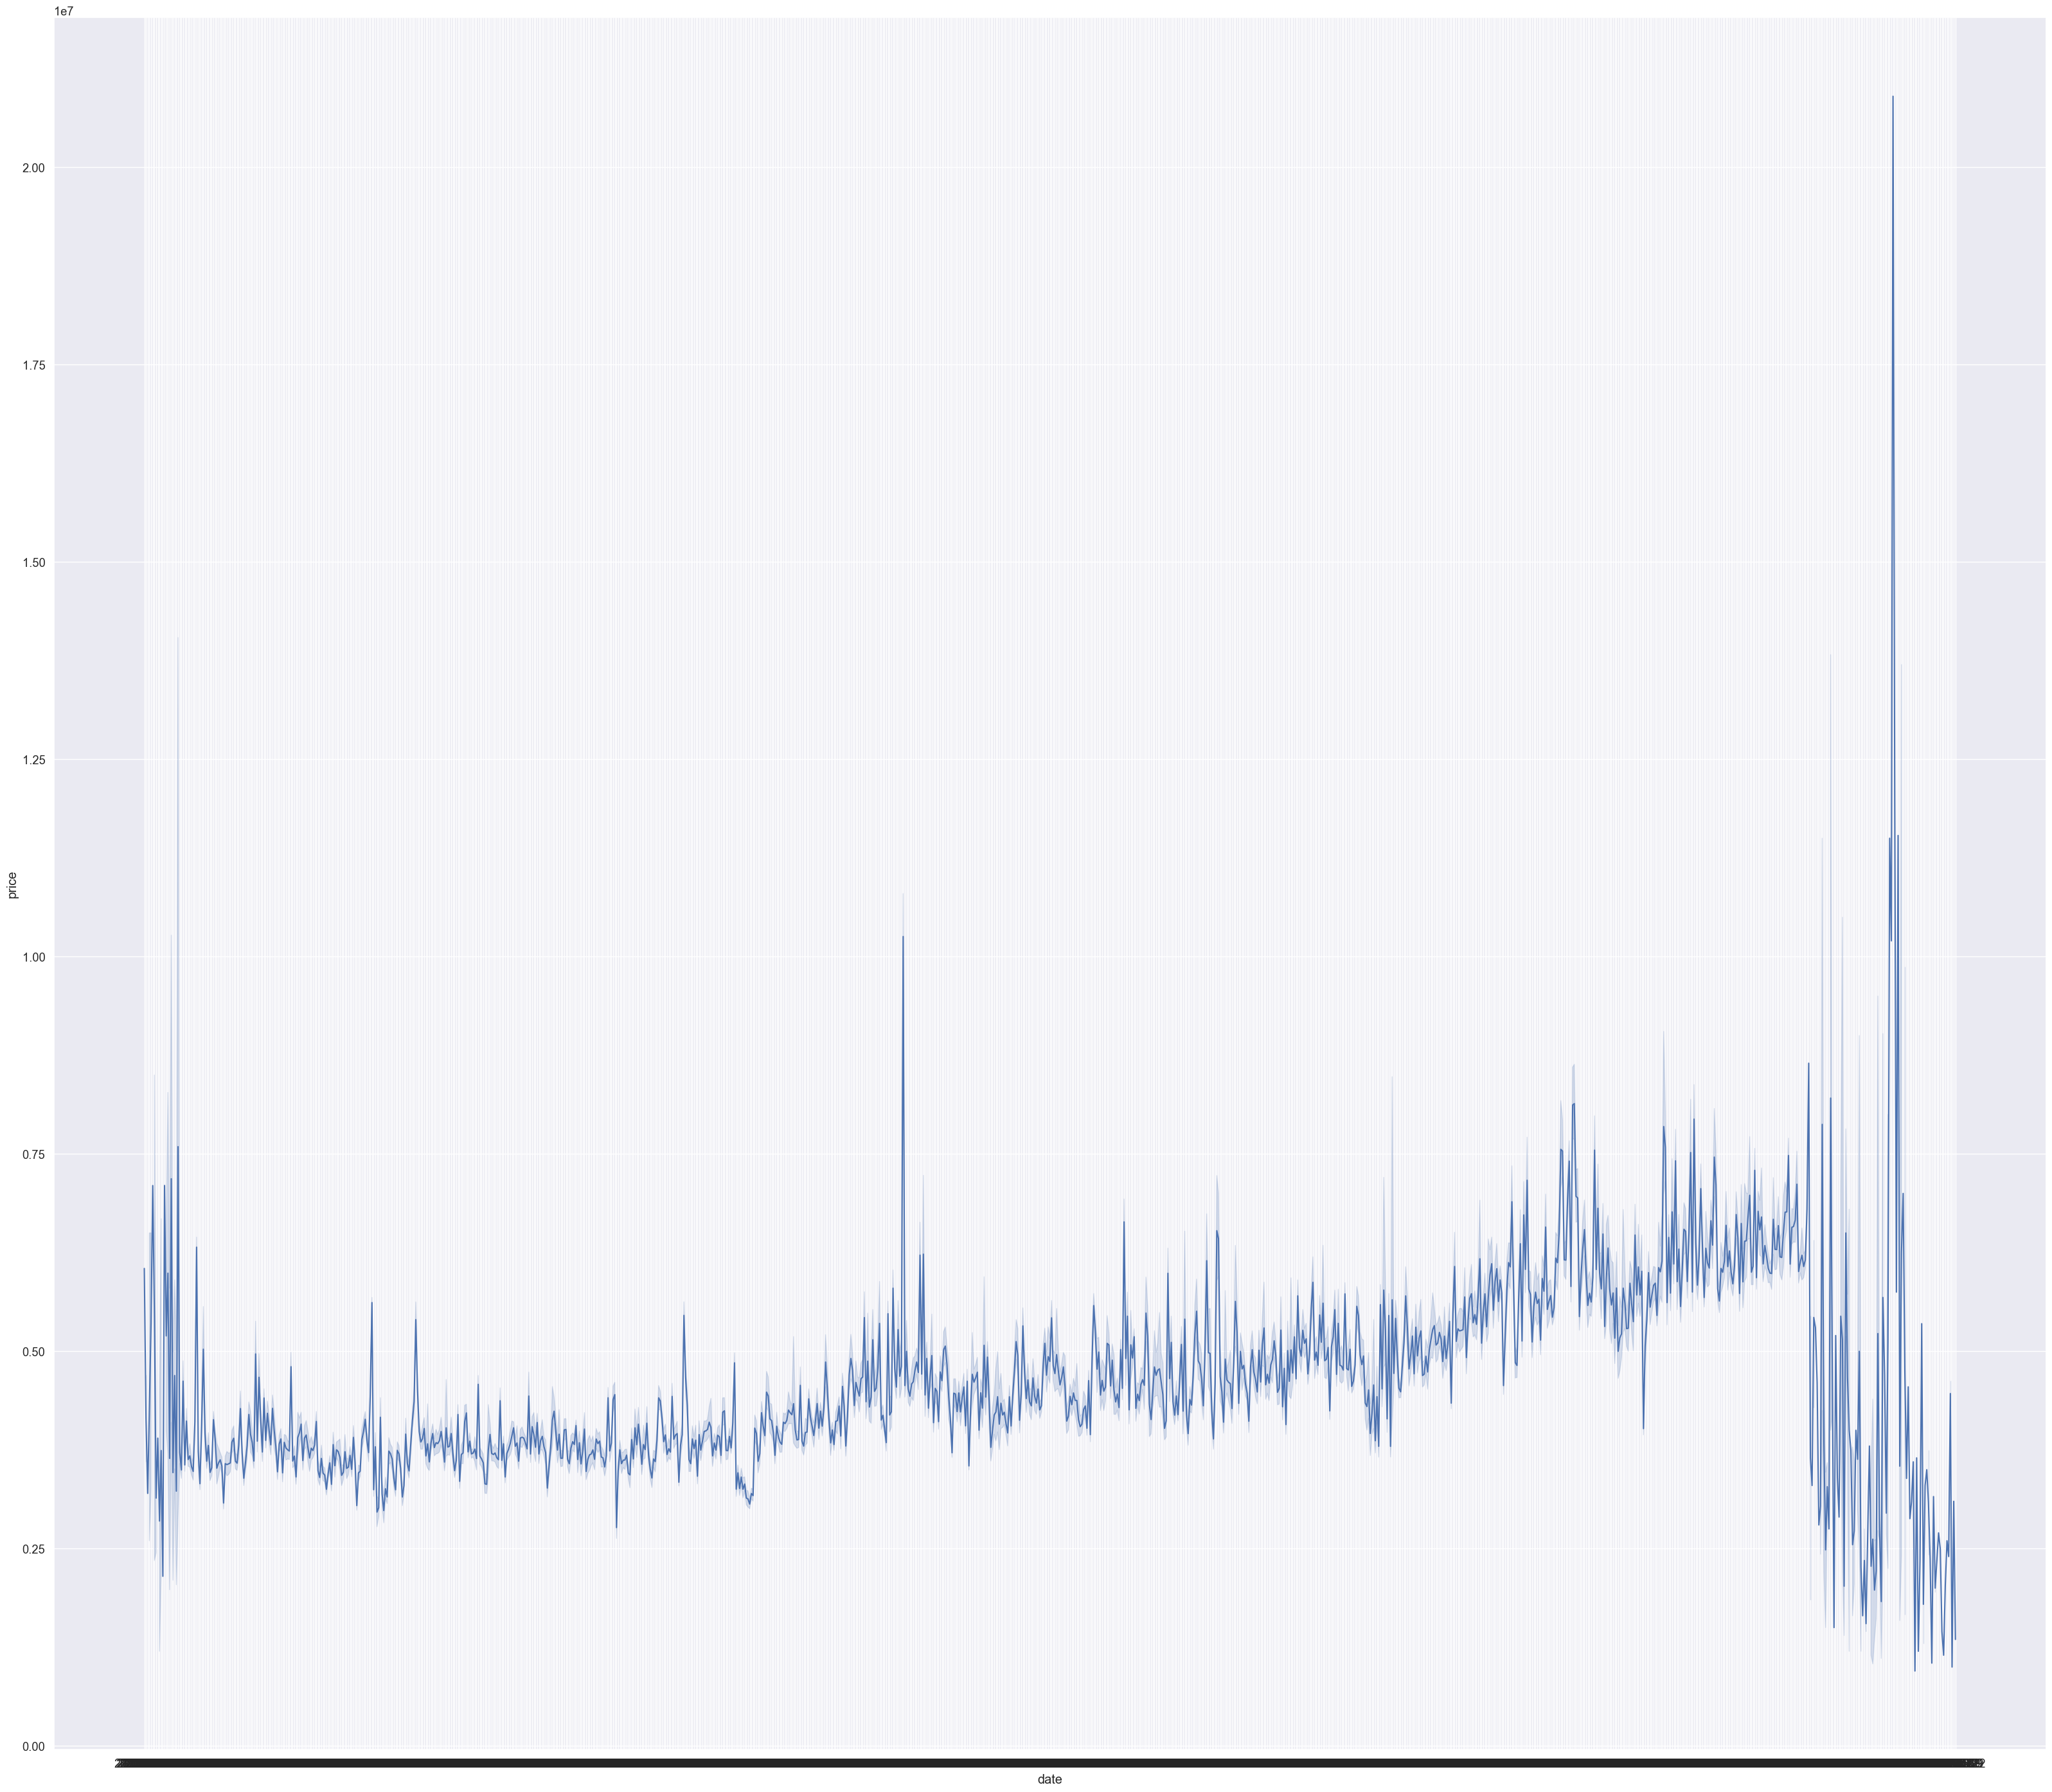

In [5]:
# построим график по датам
sns.lineplot(data = df, x = 'date', y = 'price')

К сожалению, по линейному графику очень сложно понять конкретные даты.

In [4]:
# преобразовываем в тип datetime
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df.head(1)

price       date  region  building_type  level  levels  rooms  area  \
0  6050000 2018-02-19    2661              1      8      10      3  82.6   

   kitchen_area  object_type         reg_name          pr_m year_month  month  \
0          10.8            1  Санкт-Петербург  73244.552058    2018-02      2   

  season month_name  year  season_n  
0   Зима    Февраль  2018         1

In [5]:
# создадим столбец год-месяц
df['year_month'] = df['date'].dt.to_period('M')
df.head(1)

price       date  region  building_type  level  levels  rooms  area  \
0  6050000 2018-02-19    2661              1      8      10      3  82.6   

   kitchen_area  object_type         reg_name          pr_m year_month  month  \
0          10.8            1  Санкт-Петербург  73244.552058    2018-02      2   

  season month_name  year  season_n  
0   Зима    Февраль  2018         1

In [8]:
# детализируем по rooms и год-месяц
ym = df.groupby('year_month')['price'].sum().reset_index()
ym.sort_values(by = 'price')

year_month          price
0     2018-02       18700000
3     2018-05       83768912
1     2018-03      101855620
4     2018-06      107270000
5     2018-07      120701000
2     2018-04      124330000
6     2018-08      319998610
39    2021-05    78279440313
35    2021-01   377305396533
23    2020-01   454835878467
30    2020-08   472046610825
26    2020-04   550980555167
22    2019-12   582504615261
27    2020-05   582537207877
18    2019-08   594382312043
36    2021-02   614796165156
20    2019-10   628287209949
11    2019-01   635974632516
15    2019-05   677218065662
24    2020-02   693199876543
7     2018-09   695337202599
21    2019-11   709009790250
16    2019-06   714679318898
19    2019-09   726452975403
34    2020-12   739301505559
33    2020-11   744817668435
17    2019-07   760698308352
8     2018-10   773059404948
14    2019-04   787012042528
12    2019-02   794012290475
28    2020-06   815502899910
13    2019-03   821364752674
9     2018-11   822932340809
31    2020-09   850757965494
32    2020-10   853267164475
25    2020-03   866875233944
10    2018-12   901161264552
29    2020-07   989216991860
37    2021-03   991810966189
38    2021-04  1255084928284

[Text(0.5, 1.0, 'Сумма по датам'), Text(0.5, 0, 'Дата'), Text(0, 0.5, 'Сумма')]

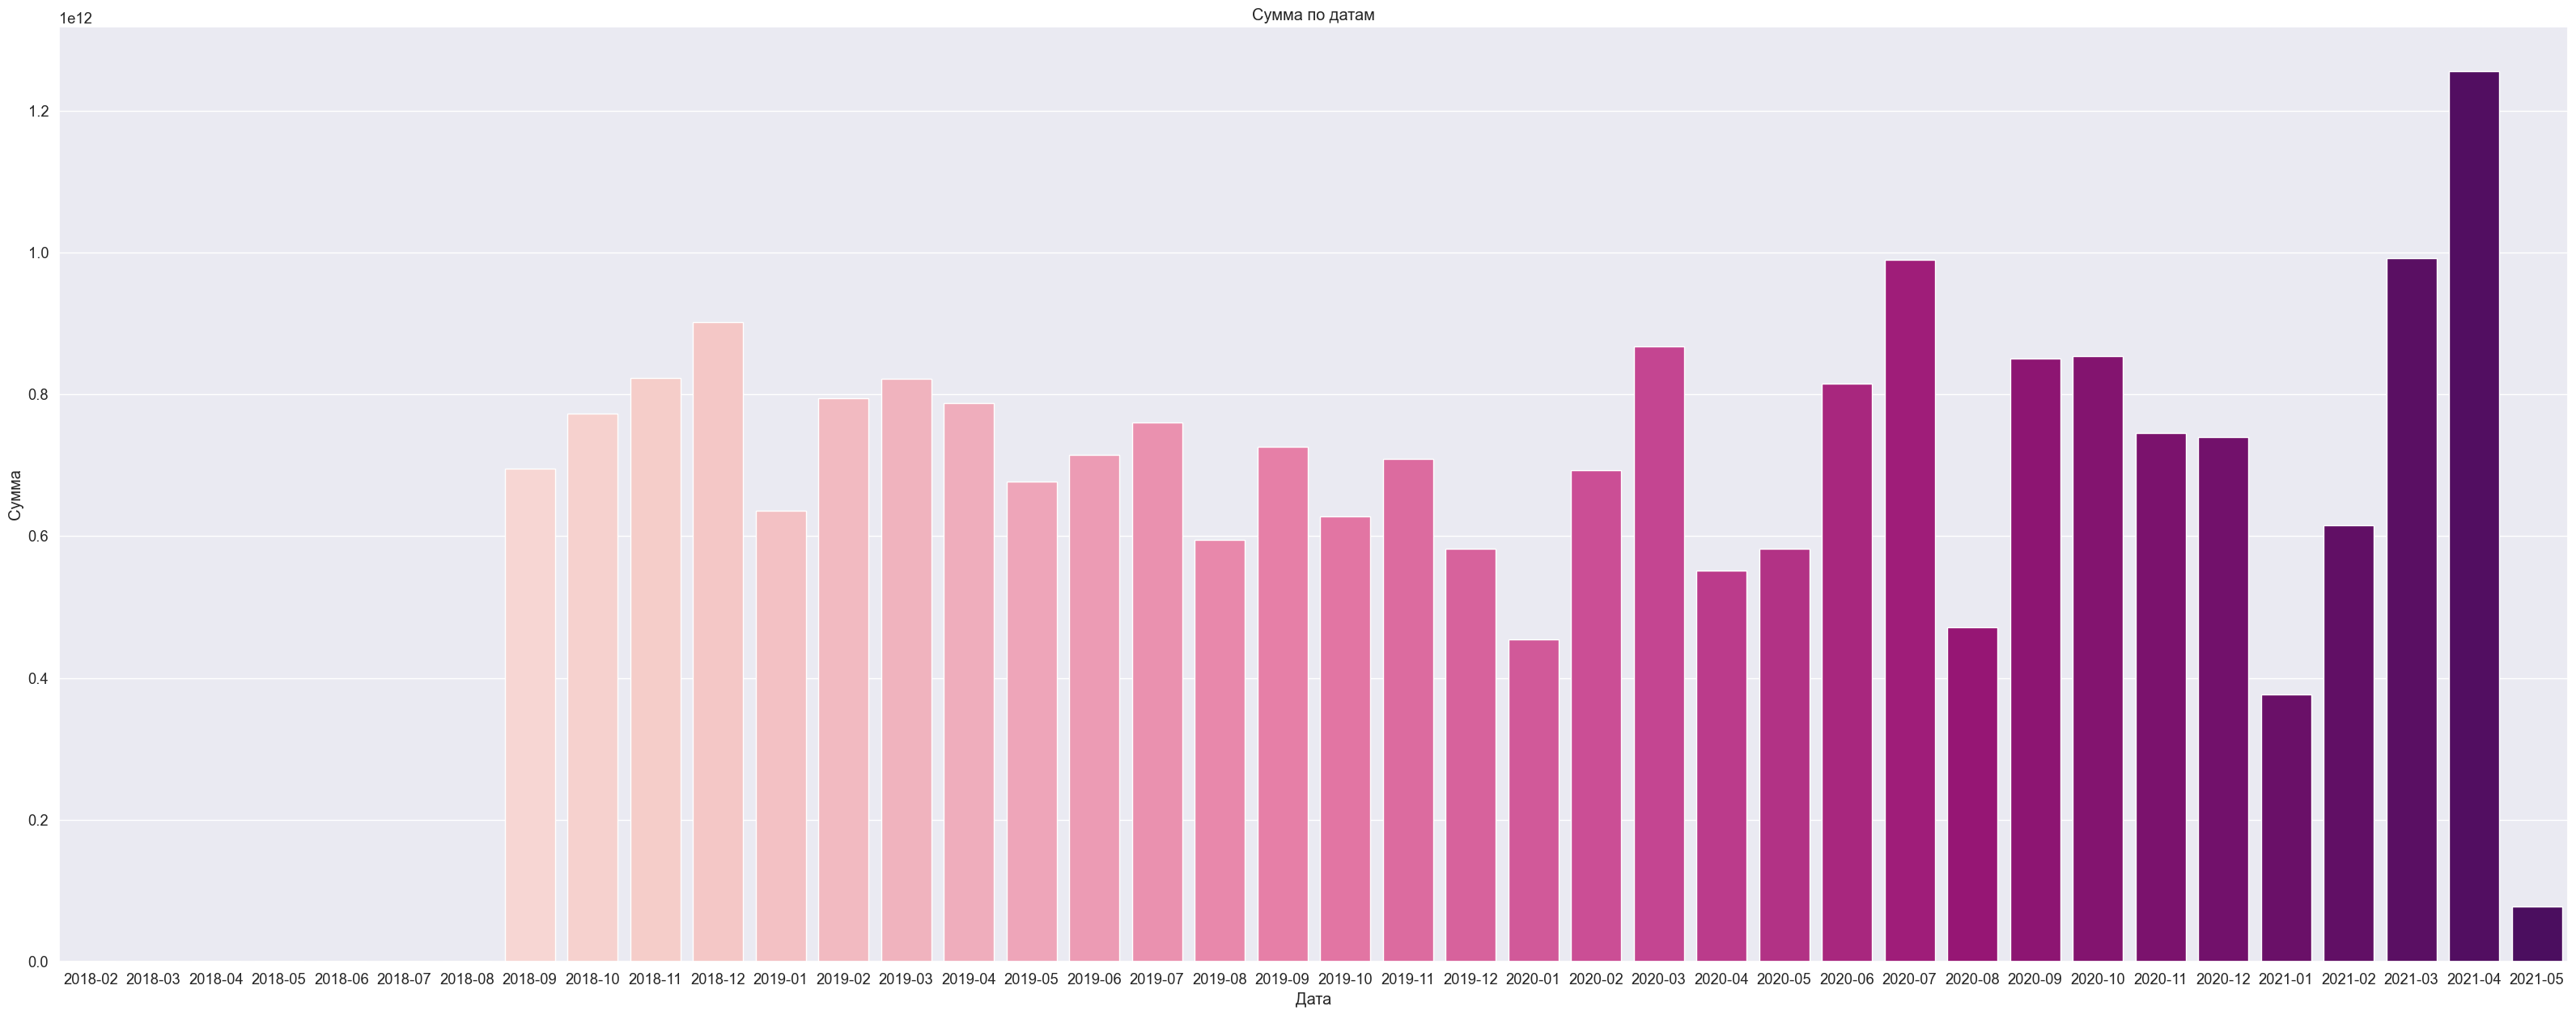

In [9]:
# построим столбчатую диаграмму с детализацией 
plt.rcParams['figure.figsize'] = (40, 15)
sns.barplot(data = ym , x = 'year_month', y = 'price', palette ='RdPu').set(title = 'Сумма по датам', xlabel = 'Дата', ylabel = 'Сумма')

По этому графику видно, что самое выгодное время для покупки квартиры - февраль 2018 года, а самое выгодное время для продажи - апрель 2021 года. Но теперь попробуем поискать закономерности.

In [6]:
# создадим столбец с месяцем, сезоном
df['month'] = df['date'].dt.month
seas_m = {1: 'Зима',
    2: 'Зима',
    3: 'Весна',
    4: 'Весна',
    5: 'Весна',
    6: 'Лето',
    7: 'Лето',
    8: 'Лето',
    9: 'Осень',
    10: 'Осень',
    11: 'Осень',
    12: 'Зима'} 
df['season'] = df['month'].map(seas_m)
df.loc[df['month'] == 1, 'month_name'] = 'Январь'
df.loc[df['month'] == 2, 'month_name'] = 'Февраль'
df.loc[df['month'] == 3, 'month_name'] = 'Март'
df.loc[df['month'] == 4, 'month_name'] = 'Апрель'
df.loc[df['month'] == 5, 'month_name'] = 'Май'
df.loc[df['month'] == 6, 'month_name'] = 'Июнь'
df.loc[df['month'] == 7, 'month_name'] = 'Июль'
df.loc[df['month'] == 8, 'month_name'] = 'Август'
df.loc[df['month'] == 9, 'month_name'] = 'Сентябрь'
df.loc[df['month'] == 10, 'month_name'] = 'Октябрь'
df.loc[df['month'] == 11, 'month_name'] = 'Ноябрь'
df.loc[df['month'] == 12, 'month_name'] = 'Декабрь'
df['year'] = pd.DatetimeIndex(df['date']).year
df.head(1)

price       date  region  building_type  level  levels  rooms  area  \
0  6050000 2018-02-19    2661              1      8      10      3  82.6   

   kitchen_area  object_type         reg_name          pr_m year_month  month  \
0          10.8            1  Санкт-Петербург  73244.552058    2018-02      2   

  season month_name  year  season_n  
0   Зима    Февраль  2018         1

In [11]:
# группируем по году
y = df.groupby('year')['price'].sum().sort_values().reset_index()
y

year          price
0  2018  3193366837050
1  2021  3317276896475
2  2019  8431596314011
3  2020  8613339558556

[Text(0.5, 1.0, 'Сумма по годам'), Text(0.5, 0, 'Год'), Text(0, 0.5, 'Сумма')]

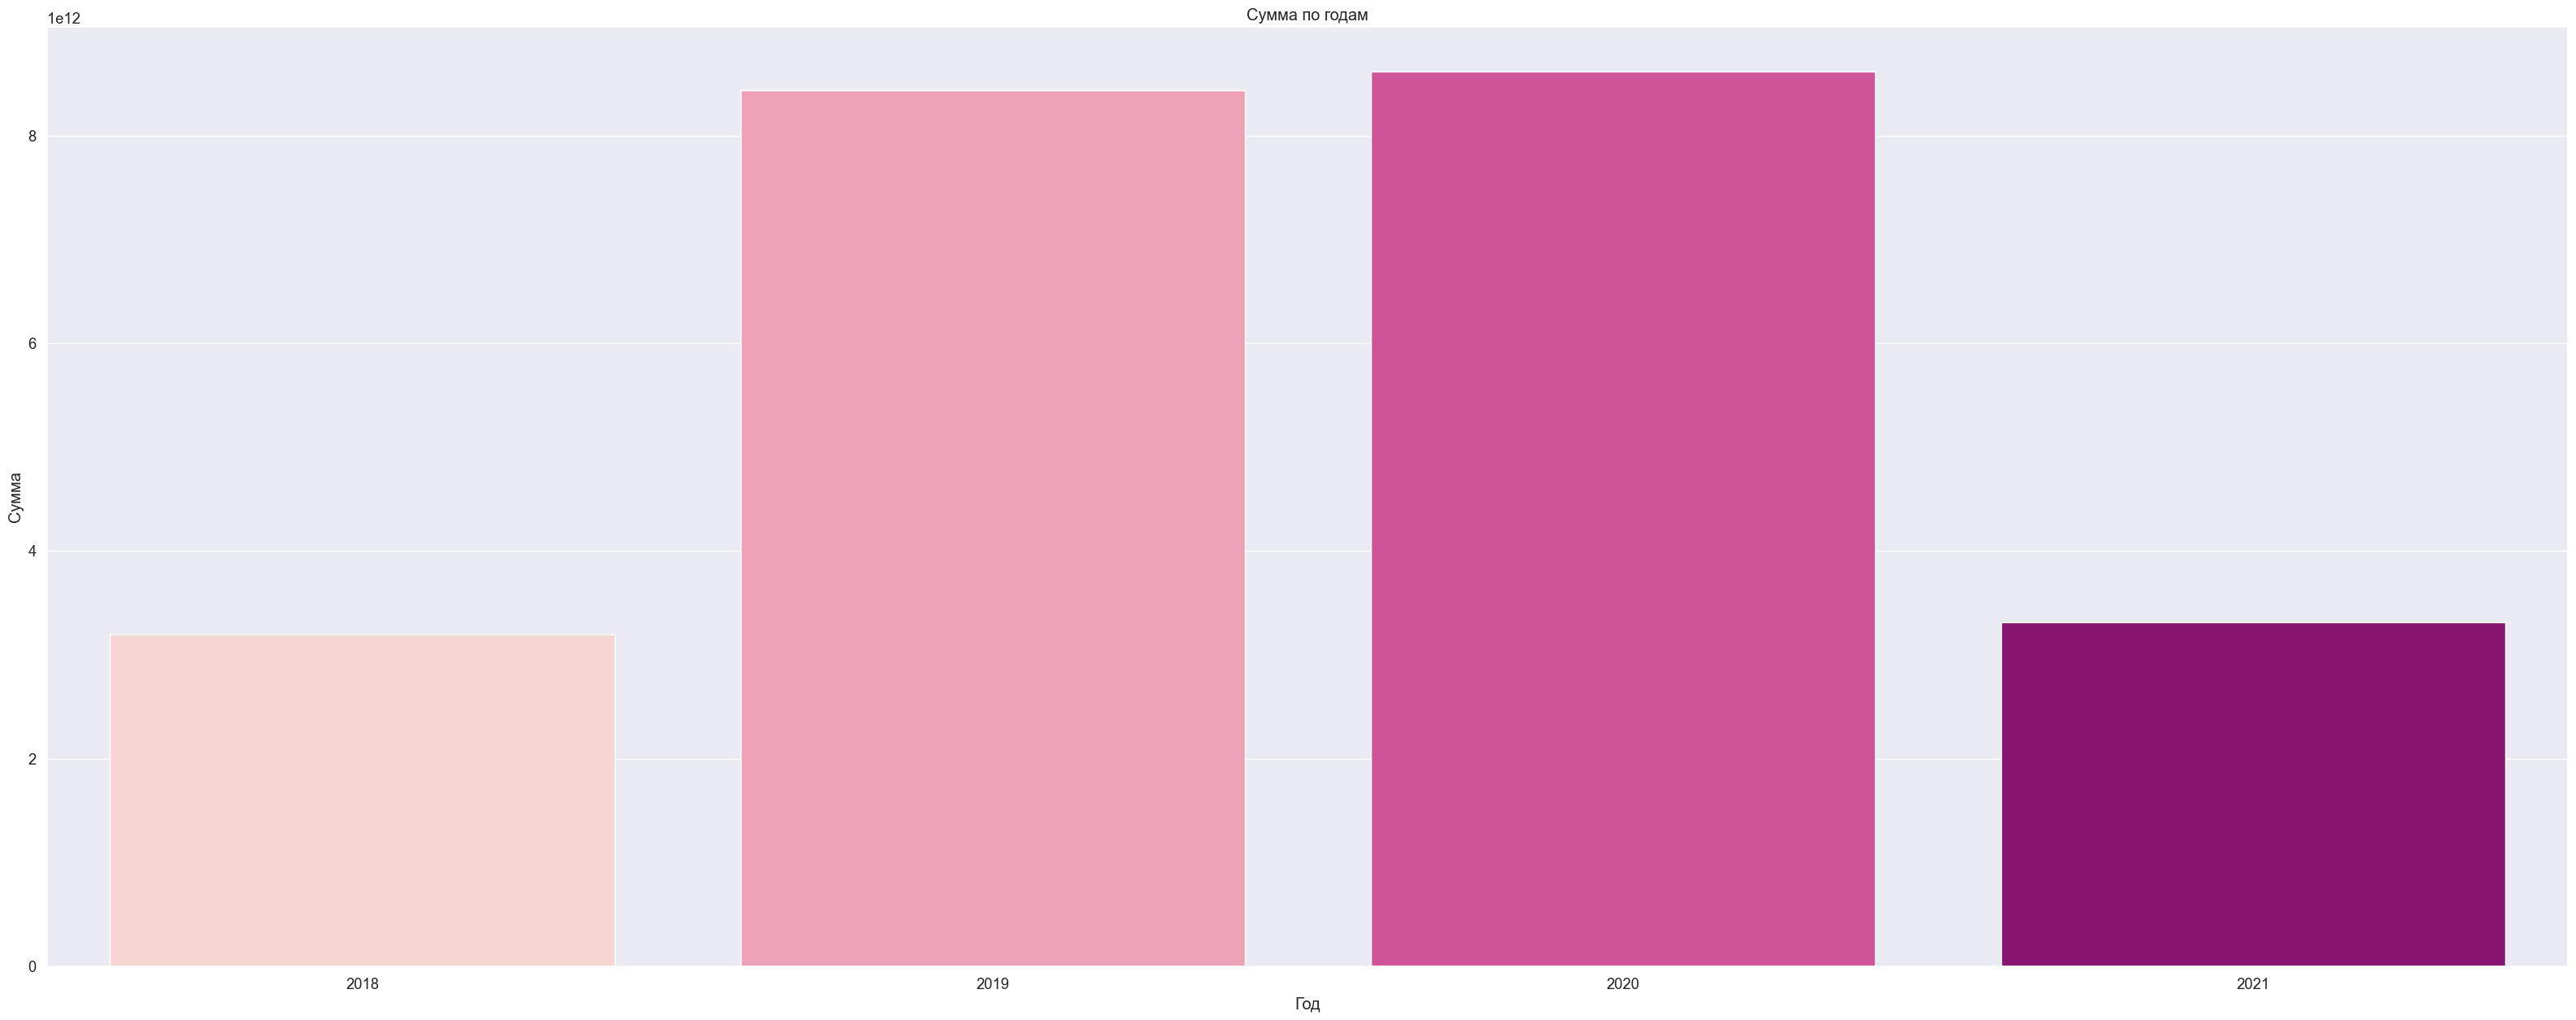

In [12]:
# построим столбчатую диаграмму
sns.barplot(data = y, x = 'year', y = 'price', palette ='RdPu').set(title = 'Сумма по годам', xlabel = 'Год', ylabel = 'Сумма')

Видно, что был рост цен, учитывая,что за 2021 год представлена информация только по первым пяти месяцам.

In [13]:
# группируем по году и добавим сезоны
ys = df.groupby(['year', 'season'])['price'].sum().sort_values().reset_index()
ys

year season          price
0   2018  Весна      309954532
1   2018   Лето      547969610
2   2018   Зима   901179964552
3   2021   Зима   992101561689
4   2020   Зима  1887337260569
5   2020  Весна  2000392996988
6   2019   Зима  2012491538252
7   2019  Осень  2063749975602
8   2019   Лето  2069759939293
9   2020   Лето  2276766502595
10  2019  Весна  2285594860864
11  2018  Осень  2291328948356
12  2021  Весна  2325175334786
13  2020  Осень  2448842798404

[Text(0.5, 1.0, 'Сумма по годам и сезонам'),
 Text(0.5, 0, 'Год'),
 Text(0, 0.5, 'Сумма')]

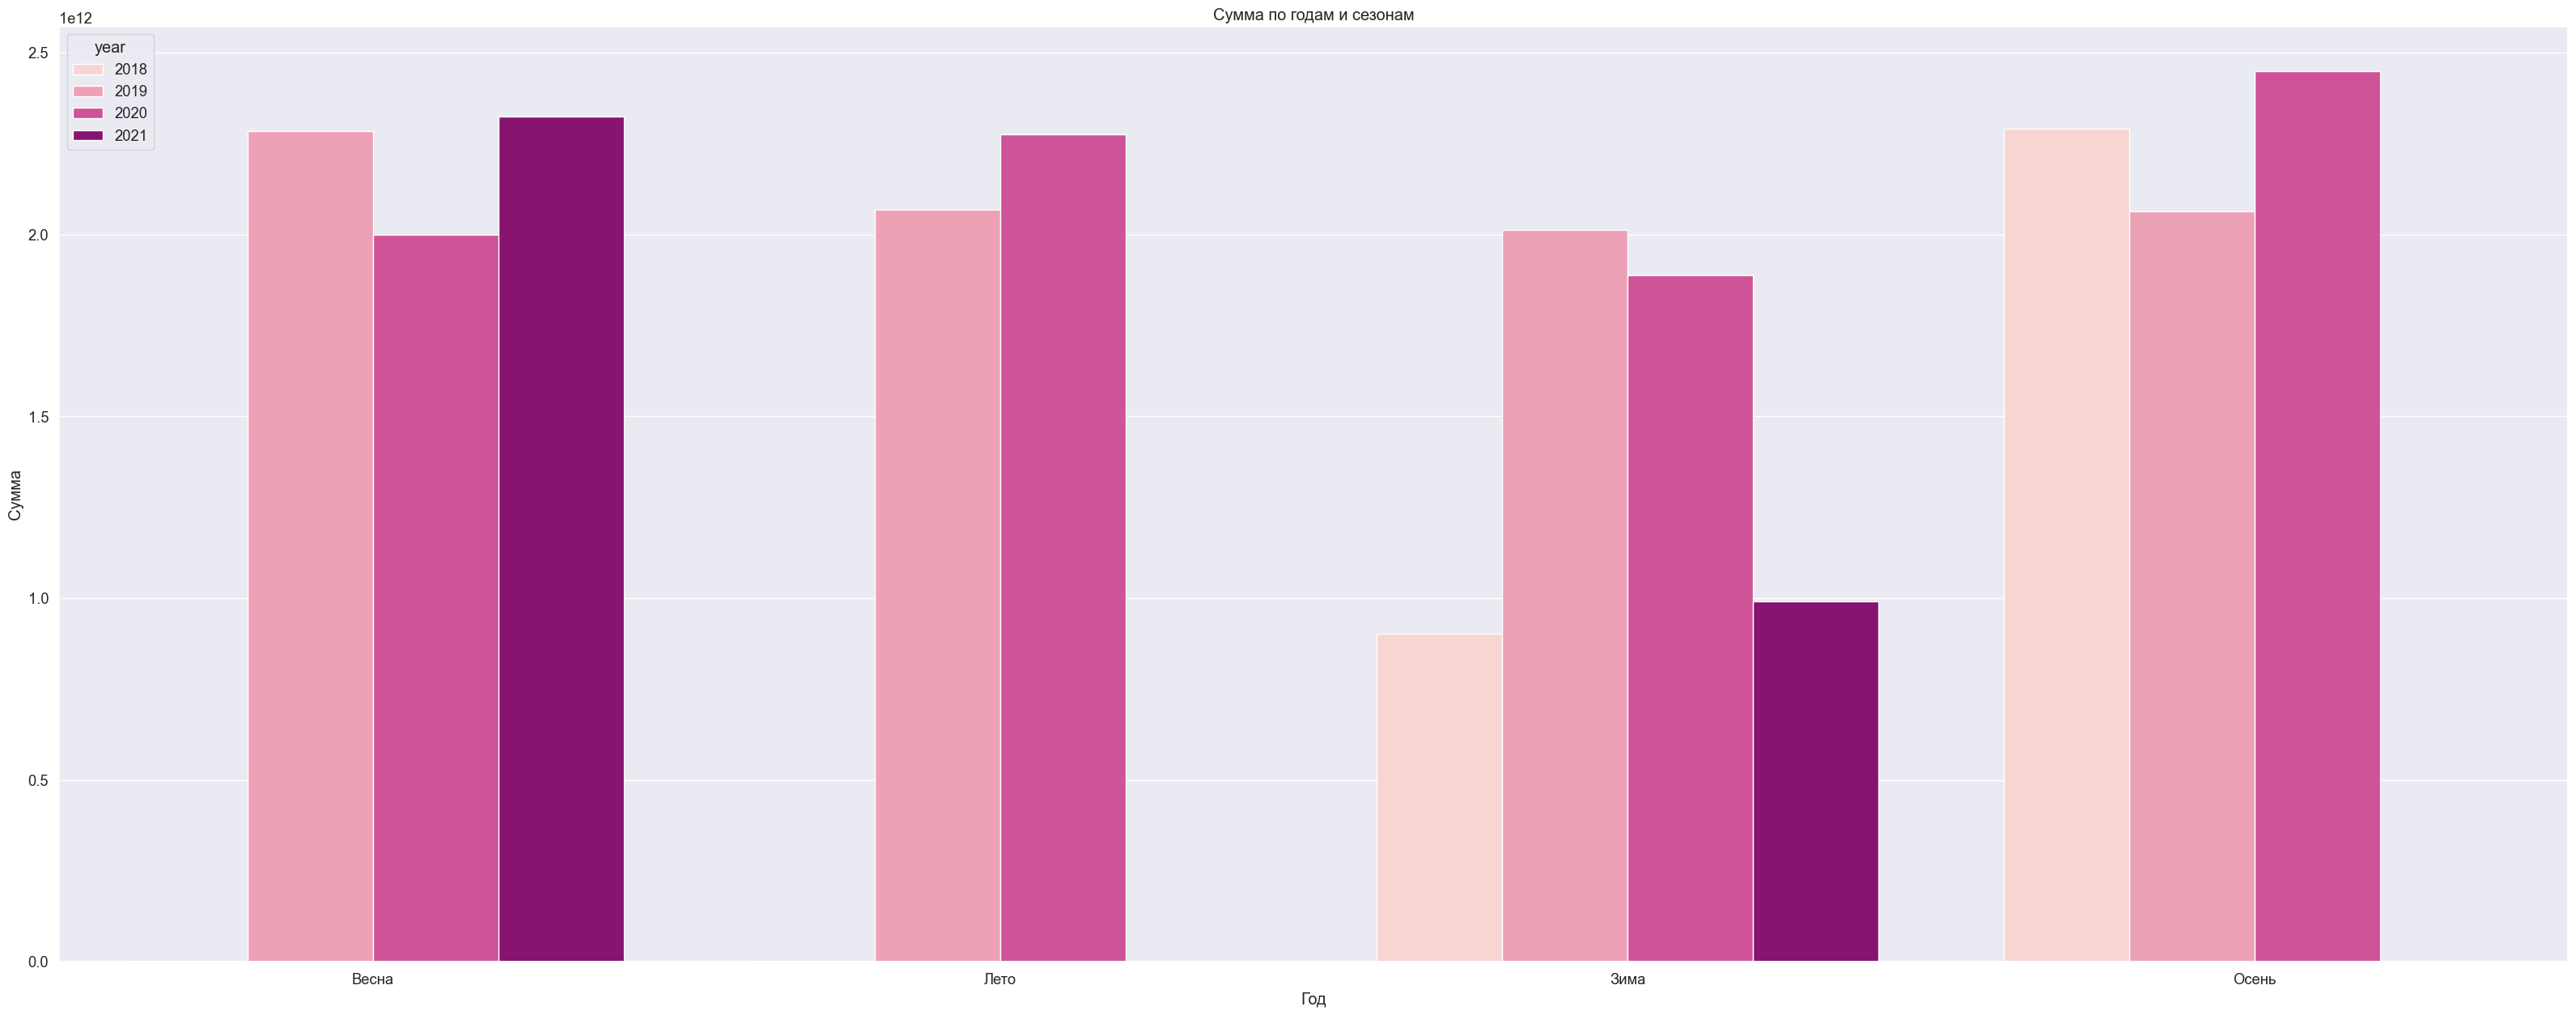

In [14]:
# построим столбчатую диаграмму
sns.barplot(data = ys, x = 'season', y = 'price', hue = 'year', palette ='RdPu').set(title = 'Сумма по годам и сезонам', xlabel = 'Год', ylabel = 'Сумма')

Видно, что летом квартиры стоят дешевле всего + данных либо мало, либо нет по весне-лету 2018 и лету-осени 2021 года. Проверим это.

In [28]:
# группируем по сезонам
s = df.groupby('season')['price'].sum().sort_values().reset_index()
s

season          price
0   Лето  4347074411498
1   Зима  5793110325062
2  Весна  6611473147170
3  Осень  6803921722362

[Text(0.5, 1.0, 'Сумма по сезонам'),
 Text(0.5, 0, 'Сезон'),
 Text(0, 0.5, 'Сумма')]

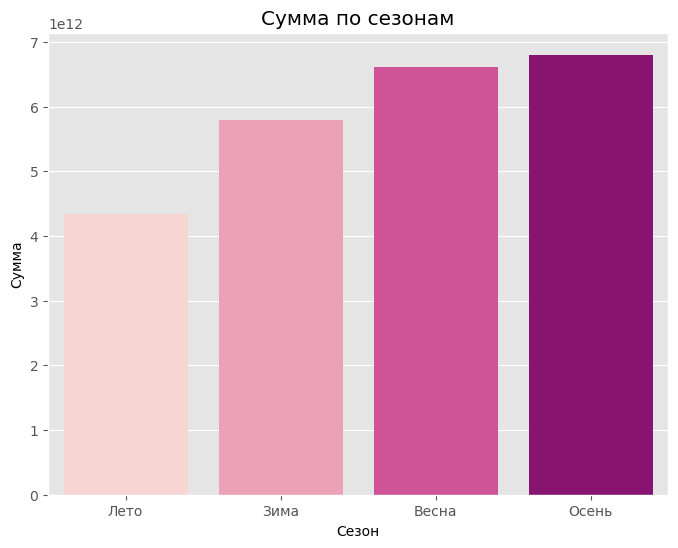

In [29]:
# построим столбчатую диаграмму
sns.barplot(data = s, x = 'season', y = 'price', palette ='RdPu').set(title = 'Сумма по сезонам', xlabel = 'Сезон', ylabel = 'Сумма')

На самом деле не самый информативный график, т.к. данные представлены за разные периоды. Буду ориентироваться по средним.

## <a class="anchor" id="2"><div class="alert alert-block alert-success">Исследование по сезонам

In [30]:
# группируем по сезонам
s = df.groupby('season')['price'].mean().sort_values().reset_index()
s

season         price
0   Лето  4.339849e+06
1   Зима  4.500996e+06
2  Осень  4.521725e+06
3  Весна  4.758855e+06

Сформулируем нулевую гипотезу: <br>
H0 = стоимость продаж квартир летом и зимой одинакова.<br>
Другими словами: летний или зимний сезон не влияет на стоимость продаж квартир.<br>
Тогда альтернативная гипотеза будет звучать так: <br>
H1 = стоимость продаж квартир летом и зимой отличается.<br>
Другими словами: летний или зимний сезон влияет на стоимость продаж квартир.<br>

In [31]:
summer = df[df['season'] == 'Лето']['price'].tolist()
winter = df[df['season'] == 'Зима']['price'].tolist()

<Axes: ylabel='Count'>

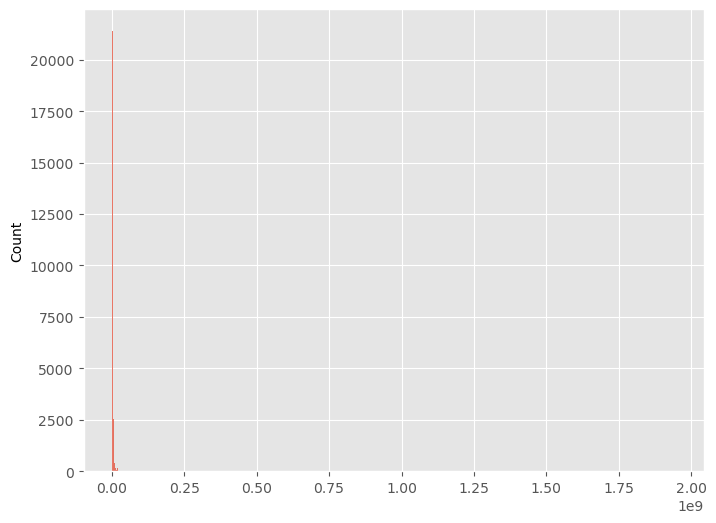

In [32]:
plt.rcParams['figure.figsize'] = (8, 6)
sns.histplot(data = summer)

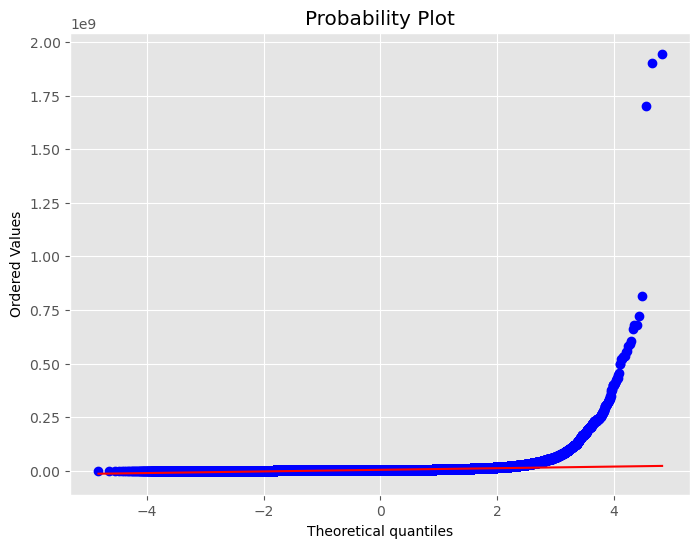

In [33]:
st.probplot(summer, dist='norm', plot=plt)
plt.show()

<Axes: ylabel='Count'>

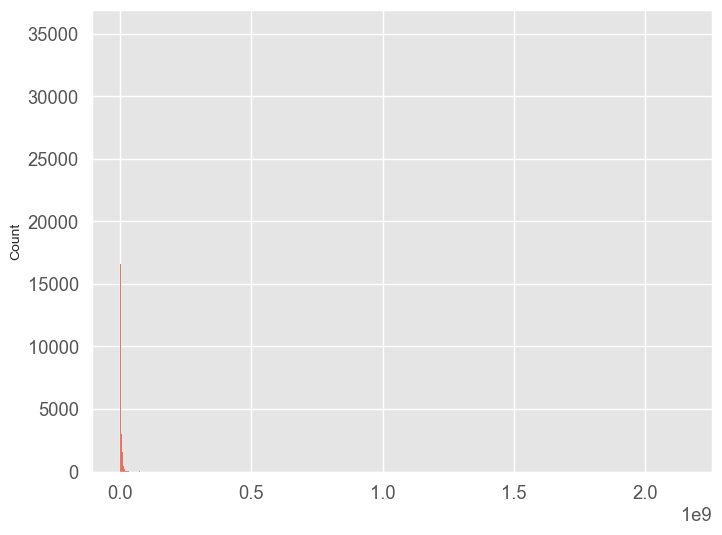

In [99]:
sns.histplot(data = winter)

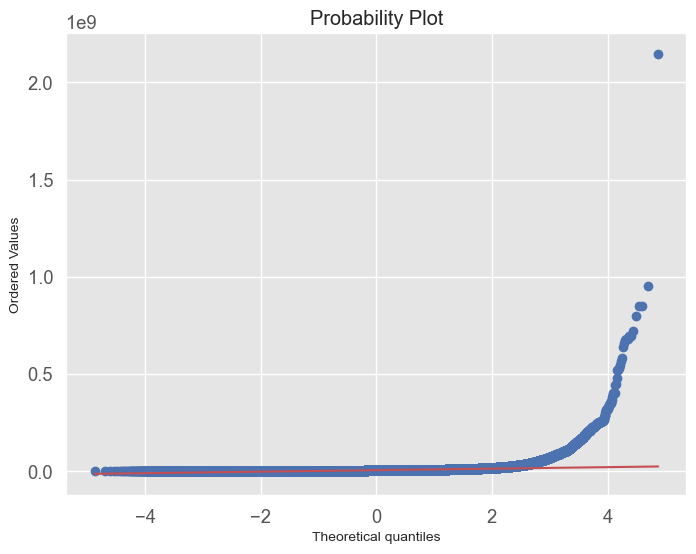

In [100]:
st.probplot(winter, dist='norm', plot=plt)
plt.show()

Т.к. выборки не имеют нормального распределения, проведем тест Манна-Уитни.

In [34]:
alpha = 0.05 # уровень статистической значимости

results = st.mannwhitneyu(winter, summer)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Следует отвергнуть нулевую гипотезу') 
else:
    print('Не удалось отвергнуть нулевую гипотезу') 

p-value: 0.0
Следует отвергнуть нулевую гипотезу


Также я решила проверить выборки методом bootstrap.

In [84]:
summer = df[df['season'] == 'Лето']['price']
winter = df[df['season'] == 'Зима']['price']

In [4]:
def get_bootstrap(
    data_column_1, # числовые значения первой выборки
    data_column_2, # числовые значения второй выборки
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
):
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    for i in tqdm(range(boot_it)): # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            boot_len, 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            boot_len, # чтобы сохранить дисперсию, берем такой же размер выборки
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2)) 
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    quants = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    _, _, bars = plt.hist(pd_boot_data[0], bins = 50)
    for bar in bars:
        if abs(bar.get_x()) <= quants.iloc[0][0] or abs(bar.get_x()) >= quants.iloc[1][0]:
            bar.set_facecolor('purple')
    
    plt.style.use('ggplot')
    plt.vlines(quants,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"boot_data": boot_data, 
            "quants": quants, 
            "p_value": p_value}

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [04:11<00:00,  3.98it/s]


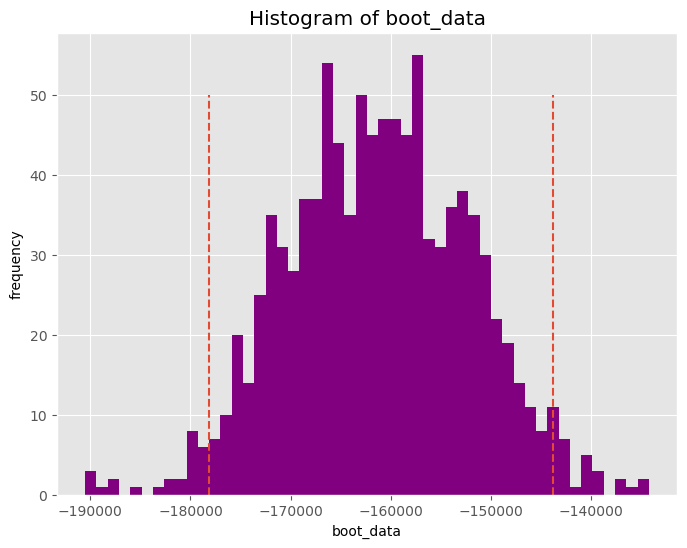

In [37]:
from tqdm import tqdm
alpha = 0.05
booted_data = get_bootstrap(summer, winter)

In [38]:
booted_data["p_value"]

6.977488182759392e-71

In [39]:
if booted_data["p_value"]  < alpha:
    print('Следует отвергнуть нулевую гипотезу') 
else:
    print('Не удалось отвергнуть нулевую гипотезу') 

Следует отвергнуть нулевую гипотезу


Также я решила проверить t-тестом, т.к. по ЦПТ на достаточно больших выборках его можно использовать и без требования нормальности распределения данных.

In [85]:
alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(summer, winter)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Следует отвергнуть нулевую гипотезу') 
else:
    print('Не удалось отвергнуть нулевую гипотезу') 

p-value: 1.454812804065976e-61
Следует отвергнуть нулевую гипотезу


По итогам всех тестов мы получили отвержение нулевой гипотезы, т.е. есть статистическая разница между выборками зимой и летом, следовательно стоимость квартир летом самая маленькая, выгоднее покупать квартиры летом.

Проверим для весны и осени ту же гипотезу.
Сформулируем нулевую гипотезу: <br>
H0 = стоимость продаж квартир весной и осенью одинакова.<br>
Другими словами: весенний или осенний сезон не влияет на стоимость продаж квартир.<br>
Тогда альтернативная гипотеза будет звучать так: <br>
H1 = стоимость продаж квартир весной и осенью отличается.<br>
Другими словами: весенний или осенний сезон влияет на стоимость продаж квартир.<br>

In [41]:
autumn = df[df['season'] == 'Осень']['price']
spring = df[df['season'] == 'Весна']['price']

<Axes: xlabel='price', ylabel='Count'>

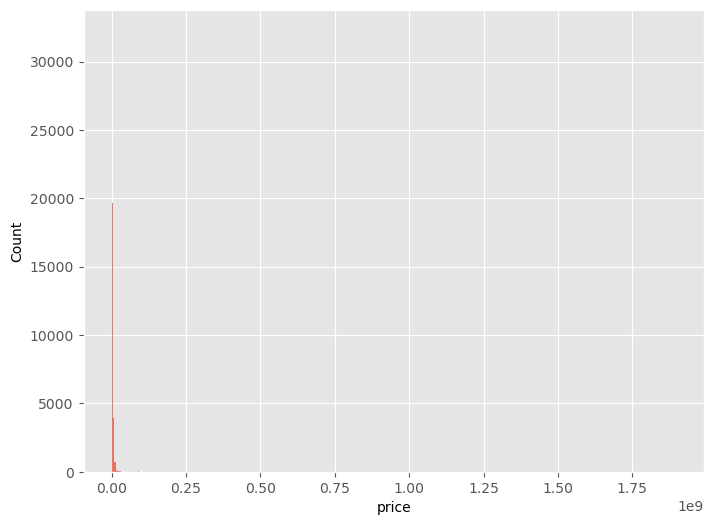

In [42]:
plt.rcParams['figure.figsize'] = (8, 6)
sns.histplot(data = spring)

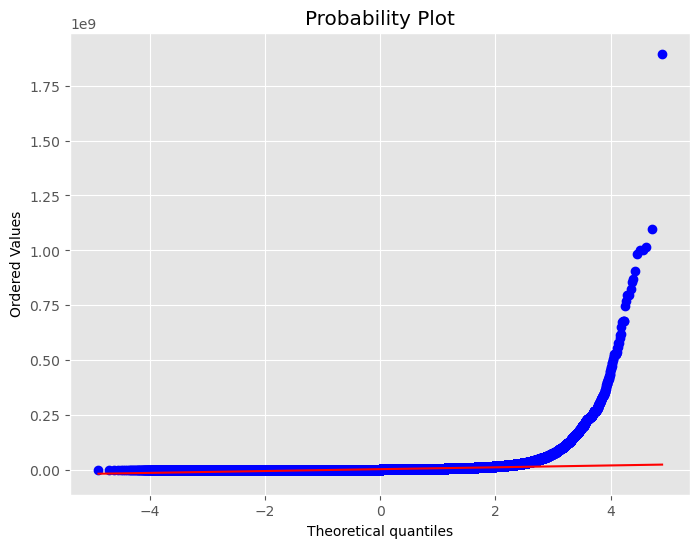

In [43]:
st.probplot(spring, dist='norm', plot=plt)
plt.show()

<Axes: xlabel='price', ylabel='Count'>

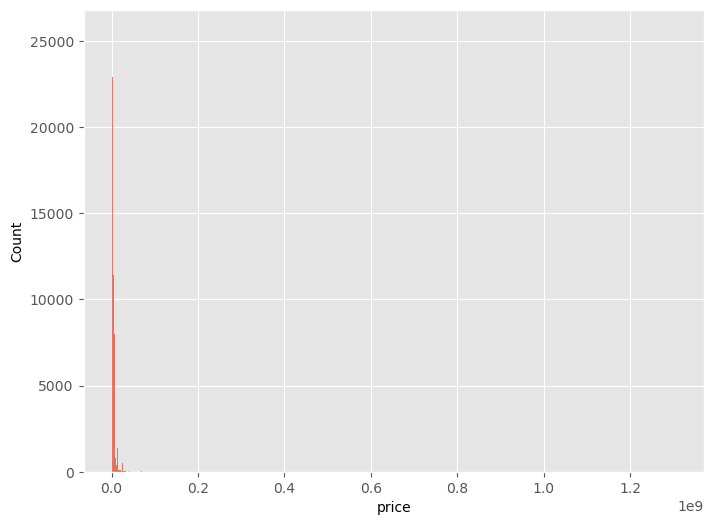

In [44]:
sns.histplot(data = autumn)

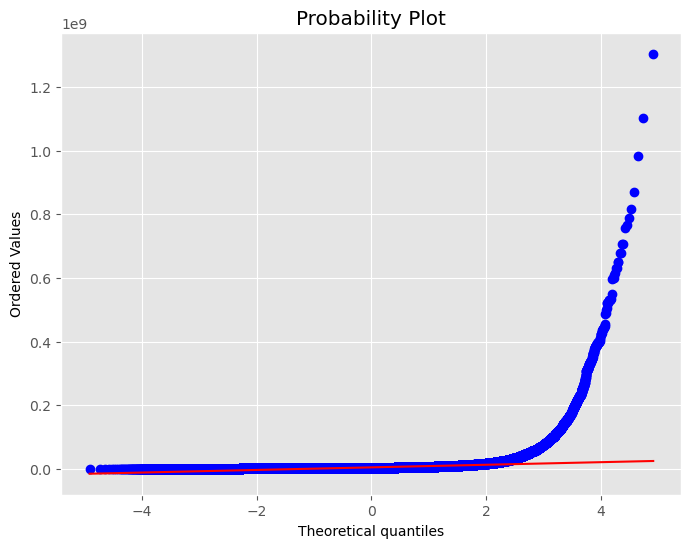

In [45]:
st.probplot(autumn, dist='norm', plot=plt)
plt.show()

Т.к. выборки не имеют нормального распределения, проведем тест Манна-Уитни.

In [46]:
alpha = 0.05 # уровень статистической значимости

results = st.mannwhitneyu(spring, autumn)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Следует отвергнуть нулевую гипотезу') 
else:
    print('Не удалось отвергнуть нулевую гипотезу') 

p-value: 0.0
Следует отвергнуть нулевую гипотезу


Также я решила проверить выборки методом bootstrap.

In [82]:
spring = df[df['season'] == 'Весна']['price']
autumn = df[df['season'] == 'Осень']['price']

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [04:59<00:00,  3.34it/s]


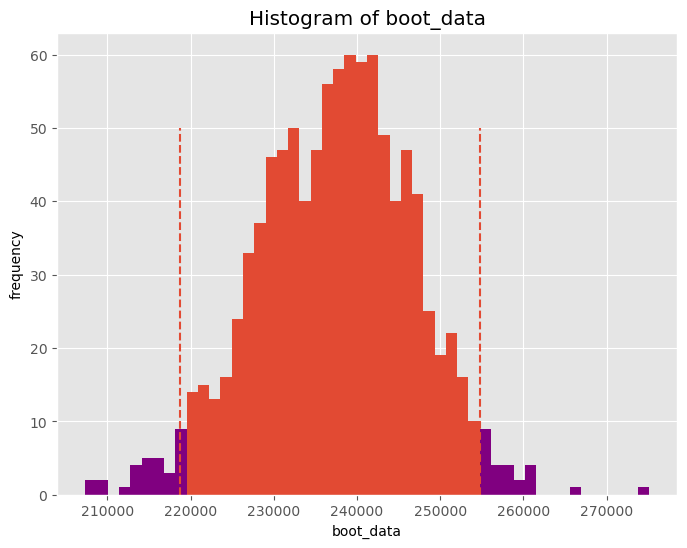

In [48]:
from tqdm import tqdm
alpha = 0.05
booted_data = get_bootstrap(spring, autumn)

In [49]:
booted_data["p_value"]

5.241341384594183e-143

In [50]:
if booted_data["p_value"]  < alpha:
    print('Следует отвергнуть нулевую гипотезу') 
else:
    print('Не удалось отвергнуть нулевую гипотезу') 

Следует отвергнуть нулевую гипотезу


Также я решила проверить t-тестом для двух независимых выборок, т.к. по ЦПТ на достаточно больших выборках его можно использовать и без требования нормальности распределения данных.

In [83]:
alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(spring, autumn)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Следует отвергнуть нулевую гипотезу') 
else:
    print('Не удалось отвергнуть нулевую гипотезу') 

p-value: 7.037984833121071e-139
Следует отвергнуть нулевую гипотезу


По итогам всех тестов мы получили отвержение нулевой гипотезы, т.е. есть статистическая разница между выборками весной и осенью, следовательно стоимость квартир весной самая большая, выгоднее продавать квартиры весной.

In [7]:
# создадим столбец с номером сезона
seas = {'Зима' : 1, 'Весна' : 2, 'Лето' : 3, 'Осень' : 4} 
df['season_n'] = df['season'].map(seas)
df.head()

price       date  region  building_type  level  levels  rooms  area  \
0  6050000 2018-02-19    2661              1      8      10      3  82.6   
1  3600000 2018-03-04    2661              1      2       5      1  31.1   
2  3200000 2018-04-10    2661              1      7       9      1  31.0   
3  6500000 2018-04-23    2661              3      3       3      3  89.0   
4  6300000 2018-04-28    2661              3      5       5      2  99.9   

   kitchen_area  object_type         reg_name           pr_m year_month  \
0          10.8            1  Санкт-Петербург   73244.552058    2018-02   
1           6.0            1  Санкт-Петербург  115755.627010    2018-03   
2           7.0            1  Санкт-Петербург  103225.806452    2018-04   
3          10.0            1  Санкт-Петербург   73033.707865    2018-04   
4          14.5            1  Санкт-Петербург   63063.063063    2018-04   

   month season month_name  year  season_n  
0      2   Зима    Февраль  2018         1  
1      3  Весна       Март  2018         2  
2      4  Весна     Апрель  2018         2  
3      4  Весна     Апрель  2018         2  
4      4  Весна     Апрель  2018         2

## <a class="anchor" id="2"><div class="alert alert-block alert-success">Исследование по месяцам

In [53]:
# группируем по месяцам
s = df.groupby('month')['price'].mean().sort_values().reset_index()
s

month         price
0       8  4.163589e+06
1       6  4.301659e+06
2       5  4.319535e+06
3       1  4.336392e+06
4       9  4.423348e+06
5      10  4.489724e+06
6       7  4.490588e+06
7       2  4.558446e+06
8      12  4.560981e+06
9      11  4.658008e+06
10      3  4.833720e+06
11      4  4.938999e+06

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15984\1736837365.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data = s, x = 'month', y = 'price', palette ='RdPu').set(title = 'Средняя сумма по месяцам', xlabel = 'Месяц', ylabel = 'Сумма')


[Text(0.5, 1.0, 'Средняя сумма по месяцам'),
 Text(0.5, 0, 'Месяц'),
 Text(0, 0.5, 'Сумма')]

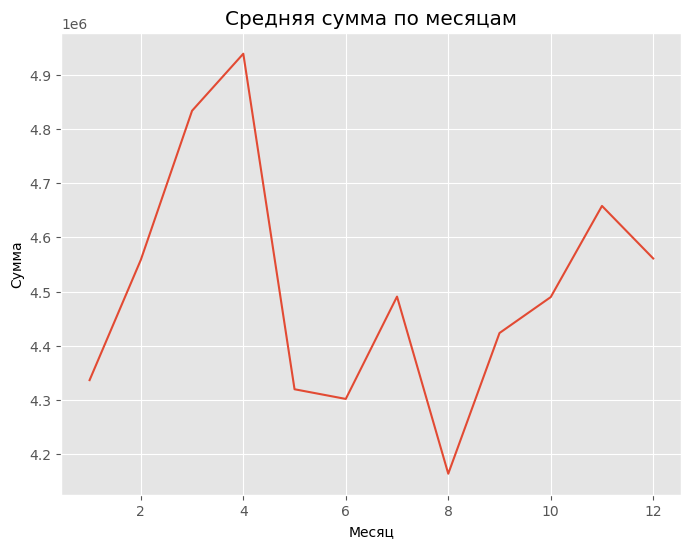

In [54]:
# построим график по месяцам
sns.lineplot(data = s, x = 'month', y = 'price', palette ='RdPu').set(title = 'Средняя сумма по месяцам', xlabel = 'Месяц', ylabel = 'Сумма')

Видно, что пик средней стоимости квартир пришелся на апрель, а самая маленькая стоимость была в августе.

In [55]:
# группируем по месяцам
s = df.groupby('month')['price'].count().sort_values().reset_index()
s

month   price
0       8  256209
1       5  309783
2       1  338557
3       6  355744
4       7  389712
5       2  461128
6      12  487388
7      11  488784
8      10  502172
9       9  513762
10      4  525046
11      3  554470

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15984\1830057583.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data = s, x = 'month', y = 'price', palette ='RdPu').set(title = 'Среднее количество по месяцам', xlabel = 'Месяц', ylabel = 'Количество')


[Text(0.5, 1.0, 'Среднее количество по месяцам'),
 Text(0.5, 0, 'Месяц'),
 Text(0, 0.5, 'Количество')]

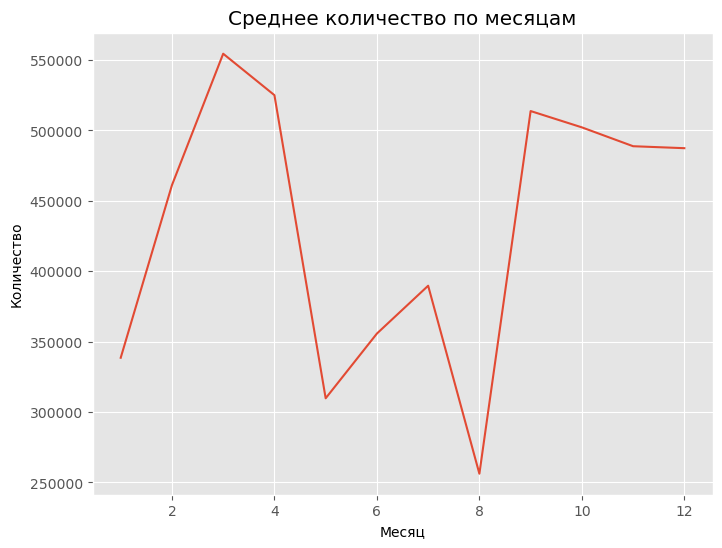

In [56]:
# построим график по месяцам
sns.lineplot(data = s, x = 'month', y = 'price', palette ='RdPu').set(title = 'Среднее количество по месяцам', xlabel = 'Месяц', ylabel = 'Количество')

Интересно, что пик количества покупок пришелся на март, а самое маленькое количество  в августе.

In [66]:
# посмотрим матрицу корреляции
# построим корреляционную матрицу
correlation_matrix = df1.corr(method = 'spearman')
print(correlation_matrix)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12952\4154984044.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df1.corr(method = 'spearman')


                  price    region  building_type     level    levels  \
price          1.000000 -0.467114       0.052572  0.257119  0.366550   
region        -0.467114  1.000000      -0.149365 -0.114062 -0.143181   
building_type  0.052572 -0.149365       1.000000 -0.114499 -0.221721   
level          0.257119 -0.114062      -0.114499  1.000000  0.606079   
levels         0.366550 -0.143181      -0.221721  0.606079  1.000000   
rooms          0.412215 -0.051574       0.036418 -0.050871 -0.117807   
area           0.520099 -0.009906      -0.011369  0.083202  0.117000   
kitchen_area   0.432515 -0.120707       0.021696  0.260228  0.416274   
object_type    0.012102  0.054125      -0.158552  0.213467  0.391595   
pr_m           0.836615 -0.538213       0.063405  0.252730  0.359086   
month          0.040631 -0.056135       0.021701  0.012187  0.012301   
year           0.159581 -0.090458       0.053700  0.031820  0.029798   

                  rooms      area  kitchen_area  object_type   

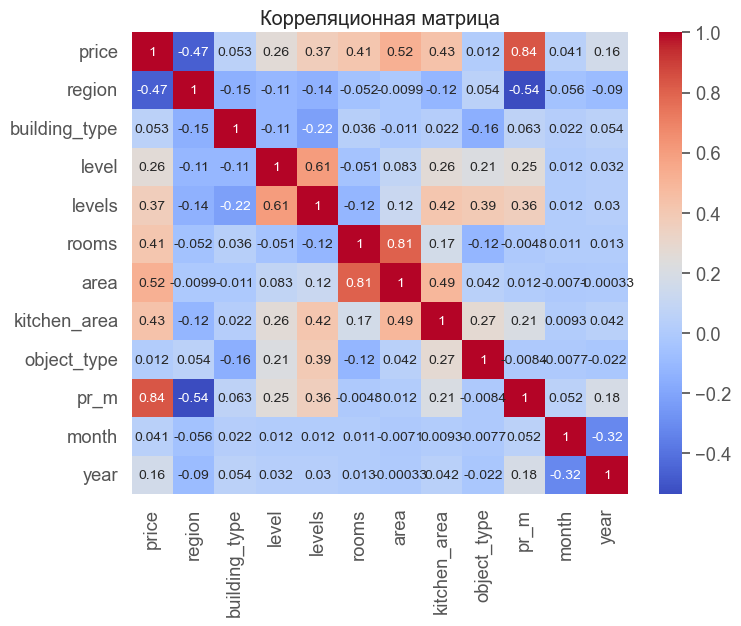

In [67]:
# визуализируем корреляционную матрицу с окраской по степени связи
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

Видно, что корреляция между стоимостью продаж квартиры и месяцем практически отсутствует.

In [73]:
# решила сохранить со всеми новыми столбцами
df.to_csv('All1.csv')

## <a class="anchor" id="40"><div class="alert alert-block alert-info">Выводы:
1. По анализу средних было выяснено, что самым выгодным временем для покупки квартиры был февраль 2018 года, а для продажи - апрель 2021 года.
2. Выгоднее покупать квартиры летом, а продавать весной.
3. Продавать квартиры лучше в апреле, а покупать в августе.

[Вернуться к Навигации](#1)

## <a class="anchor" id="12"><div class="alert alert-block alert-info">Задание №6

## <a class="anchor" id="2"><div class="alert alert-block alert-info">Определите от каких признаков зависит стоимость объекта недвижимости. Найдите скрытые закономерности.

In [1]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import t, norm
from scipy import stats as st
from scipy import stats
from scipy.stats import boxcox
from scipy.stats import mannwhitneyu

In [2]:
# загрузим данные
df = pd.read_csv('All1.csv')
df

Unnamed: 0    price        date  region  building_type  level  \
0                 0  6050000  2018-02-19    2661              1      8   
1                 1  3600000  2018-03-04    2661              1      2   
2                 2  3200000  2018-04-10    2661              1      7   
3                 3  6500000  2018-04-23    2661              3      3   
4                 4  6300000  2018-04-28    2661              3      5   
...             ...      ...         ...     ...            ...    ...   
5182750     5182750  3500000  2021-01-28    4963              1      9   
5182751     5182751  3000000  2018-11-29   61888              5      2   
5182752     5182752  6000000  2018-11-30   61888              3      5   
5182753     5182753  3500000  2018-11-30   61888              2      1   
5182754     5182754  5200000  2018-12-01   61888              3      5   

         levels  rooms  area  kitchen_area  object_type  \
0            10      3  82.6          10.8            1   
1             5      1  31.1           6.0            1   
2             9      1  31.0           7.0            1   
3             3      3  89.0          10.0            1   
4             5      2  99.9          14.5            1   
...         ...    ...   ...           ...          ...   
5182750       9      3  66.0          12.0            1   
5182751       2      2  57.0          10.0            1   
5182752       5      2  64.3          16.3            1   
5182753       3      2  59.7          10.2            1   
5182754       5      2  72.5          15.7            1   

                          reg_name           pr_m year_month  month season  \
0                  Санкт-Петербург   73244.552058    2018-02      2   Зима   
1                  Санкт-Петербург  115755.627010    2018-03      3  Весна   
2                  Санкт-Петербург  103225.806452    2018-04      4  Весна   
3                  Санкт-Петербург   73033.707865    2018-04      4  Весна   
4                  Санкт-Петербург   63063.063063    2018-04      4  Весна   
...                            ...            ...        ...    ...    ...   
5182750            Приморский край   53030.303030    2021-01      1   Зима   
5182751  Ненецкий автономный округ   52631.578947    2018-11     11  Осень   
5182752  Ненецкий автономный округ   93312.597201    2018-11     11  Осень   
5182753  Ненецкий автономный округ   58626.465662    2018-11     11  Осень   
5182754  Ненецкий автономный округ   71724.137931    2018-12     12   Зима   

        month_name  year  season_n  
0          Февраль  2018         1  
1             Март  2018         2  
2           Апрель  2018         2  
3           Апрель  2018         2  
4           Апрель  2018         2  
...            ...   ...       ...  
5182750     Январь  2021         1  
5182751     Ноябрь  2018         4  
5182752     Ноябрь  2018         4  
5182753     Ноябрь  2018         4  
5182754    Декабрь  2018         1  

[5182755 rows x 19 columns]

In [3]:
# продолжу редактирование, удалив ненужные столбцы
df = df.drop(labels = ['Unnamed: 0'], axis = 1)
df.head(1)

price        date  region  building_type  level  levels  rooms  area  \
0  6050000  2018-02-19    2661              1      8      10      3  82.6   

   kitchen_area  object_type         reg_name          pr_m year_month  month  \
0          10.8            1  Санкт-Петербург  73244.552058    2018-02      2   

  season month_name  year  season_n  
0   Зима    Февраль  2018         1

## <a class="anchor" id="2"><div class="alert alert-block alert-success">Попробуем подумать логически. Выдвинем гипотезы:
1) Жилье на первичном рынке стоит дороже, чем на вторичном.
2) По данным самая высокая рыночная цена в монолитных домах. Также можем это проверить.
Источник: https://rg-ru.turbopages.org/turbo/rg.ru/s/2021/10/01/kvartiry-v-panelnyh-domah-ceniatsia-dorozhe-chem-v-kirpichnyh.html.
3) В большинстве случаев чем больше площадь, тем больше цена (однако может влиять расположение квартиры, например, ближе к морю - дороже, но этих данных у нас нет).
4) Квартиры в многоэтажных домах стоят дороже, чем в низкоэтажных.
5) Чем выше этаж, тем дороже может быть квартира (на первых этажах больше шума, грязи).
6) Чем больше площадь кухни, тем дороже стоимость квартиры.

In [71]:
df.corr()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12952\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


price    region  building_type     level    levels  \
price          1.000000 -0.212548       0.019648  0.115310  0.149914   
region        -0.212548  1.000000      -0.164583 -0.127650 -0.175538   
building_type  0.019648 -0.164583       1.000000 -0.107511 -0.200538   
level          0.115310 -0.127650      -0.107511  1.000000  0.654364   
levels         0.149914 -0.175538      -0.200538  0.654364  1.000000   
rooms          0.245955 -0.082293       0.050523 -0.051148 -0.097948   
area           0.493857 -0.010722       0.023702  0.071920  0.080494   
kitchen_area   0.319765 -0.090272       0.021044  0.200526  0.286859   
object_type    0.024673  0.100169      -0.159863  0.236793  0.380458   
pr_m           0.727121 -0.330193       0.013309  0.168320  0.240653   
month         -0.004854 -0.037495       0.014608  0.001077  0.000795   
year           0.090269 -0.101855       0.040937  0.047779  0.064321   
season_n      -0.004748 -0.003682       0.007620 -0.012227 -0.017782   

                  rooms      area  kitchen_area  object_type      pr_m  \
price          0.245955  0.493857      0.319765     0.024673  0.727121   
region        -0.082293 -0.010722     -0.090272     0.100169 -0.330193   
building_type  0.050523  0.023702      0.021044    -0.159863  0.013309   
level         -0.051148  0.071920      0.200526     0.236793  0.168320   
levels        -0.097948  0.080494      0.286859     0.380458  0.240653   
rooms          1.000000  0.685221      0.226911    -0.134354  0.035892   
area           0.685221  1.000000      0.527118     0.016389  0.128732   
kitchen_area   0.226911  0.527118      1.000000     0.205130  0.177420   
object_type   -0.134354  0.016389      0.205130     1.000000  0.044558   
pr_m           0.035892  0.128732      0.177420     0.044558  1.000000   
month          0.008634 -0.009349      0.000790    -0.005239 -0.008490   
year           0.016237  0.013616      0.048904    -0.020281  0.148918   
season_n      -0.007390 -0.008984     -0.011595    -0.015865 -0.010169   

                  month      year  season_n  
price         -0.004854  0.090269 -0.004748  
region        -0.037495 -0.101855 -0.003682  
building_type  0.014608  0.040937  0.007620  
level          0.001077  0.047779 -0.012227  
levels         0.000795  0.064321 -0.017782  
rooms          0.008634  0.016237 -0.007390  
area          -0.009349  0.013616 -0.008984  
kitchen_area   0.000790  0.048904 -0.011595  
object_type   -0.005239 -0.020281 -0.015865  
pr_m          -0.008490  0.148918 -0.010169  
month          1.000000 -0.465071  0.557539  
year          -0.465071  1.000000 -0.247459  
season_n       0.557539 -0.247459  1.000000

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12952\2148900611.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


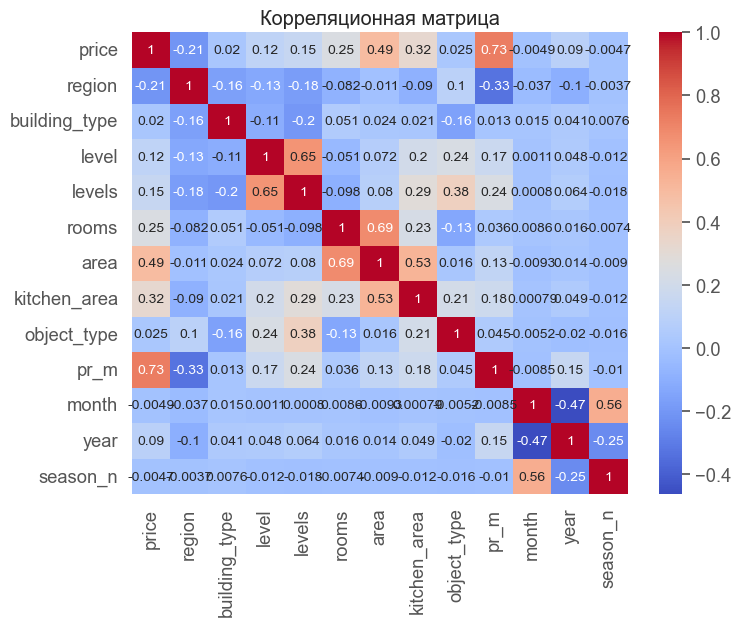

In [72]:
# визуализируем корреляционную матрицу с окраской по степени связи
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

Самые большие коэффициенты корреляции у стоимости квартир с их площадью, площадью кухни и площадью за метр, что естественно.

Проверим гипотезы с помощью статистических тестов.

## <a class="anchor" id="2"><div class="alert alert-block alert-success">1. Жилье на первичном рынке стоит дороже, чем на вторичном.

Сформулируем нулевую гипотезу:<br>
H0 = стоимость квартир на первичном и вторичном рынках одинакова.<br>
Другими словами: вторичный или первичный рынок не влияет на стоимость квартир.<br>
Тогда альтернативная гипотеза будет звучать так:<br>
H1 = стоимость квартир на первичном и вторичном рынках отличается.<br>
Другими словами: вторичный или первичный рынок влияет на стоимость квартир.<br>

In [10]:
# группируем по сезонам
r = df.groupby('object_type')['price'].agg(['sum', 'count']).reset_index()
r

object_type             sum    count
0            1  16211736702104  3665795
1           11   7343842903988  1516960

По абсолютной сумме вторичный рынок превышает первичной рынок, но только лишь по причине намного большего количества наблюдений.

[Text(0.5, 1.0, 'Сумма по типу рынка'),
 Text(0.5, 0, 'Тип рынка'),
 Text(0, 0.5, 'Сумма')]

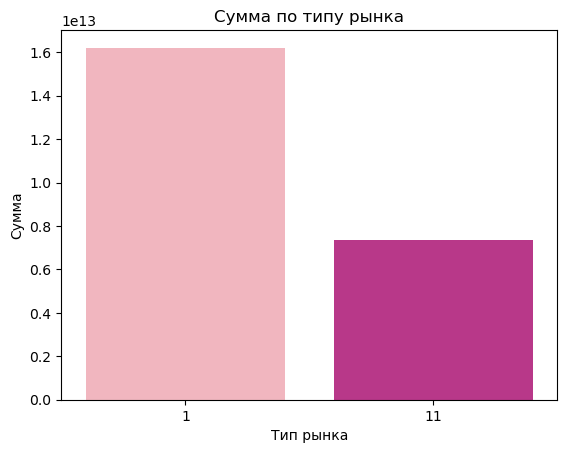

In [12]:
# построим столбчатую диаграмму
sns.barplot(data = r, x = 'object_type', y = 'sum', palette ='RdPu').set(title = 'Сумма по типу рынка', xlabel = 'Тип рынка', ylabel = 'Сумма')

In [59]:
perv = df[df['object_type'] == 11]['price'].tolist()
vtor = df[df['object_type'] == 1]['price'].tolist()

<Axes: ylabel='Count'>

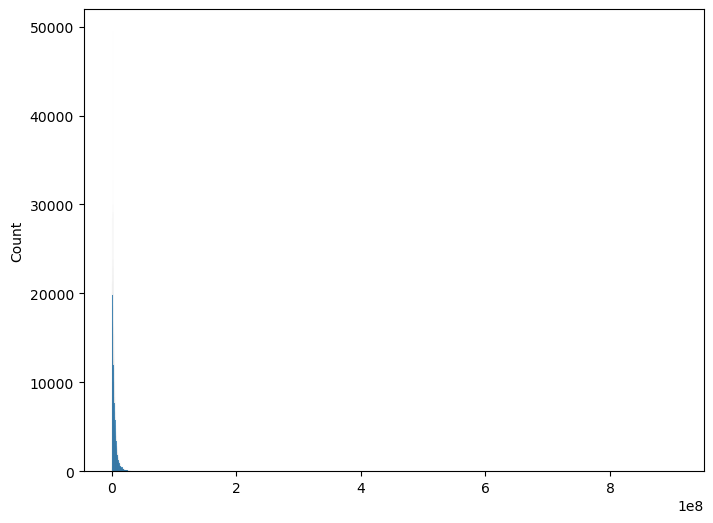

In [14]:
plt.rcParams['figure.figsize'] = (8, 6)
sns.histplot(data = perv)

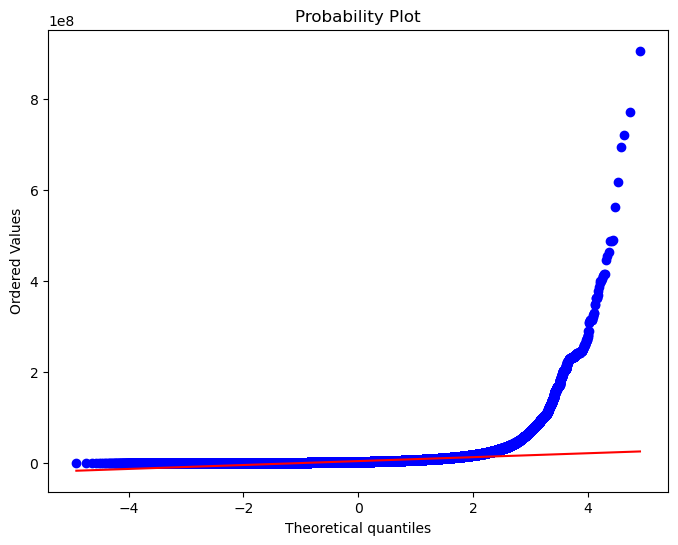

In [15]:
st.probplot(perv, dist='norm', plot=plt)
plt.show()

<Axes: ylabel='Count'>

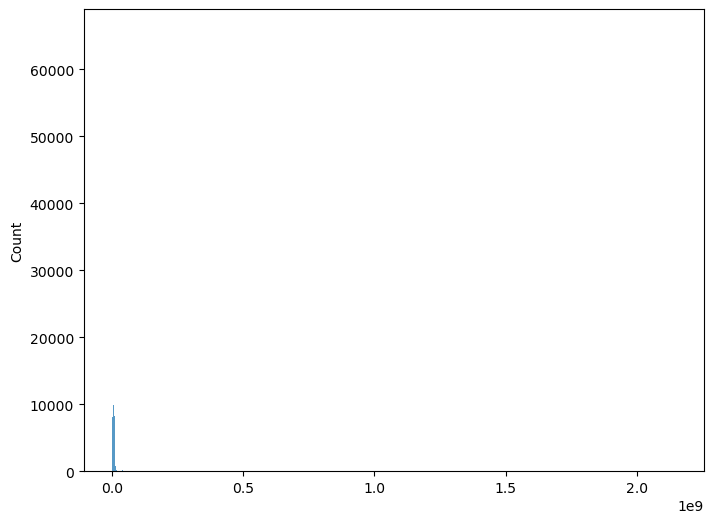

In [16]:
sns.histplot(data = vtor)

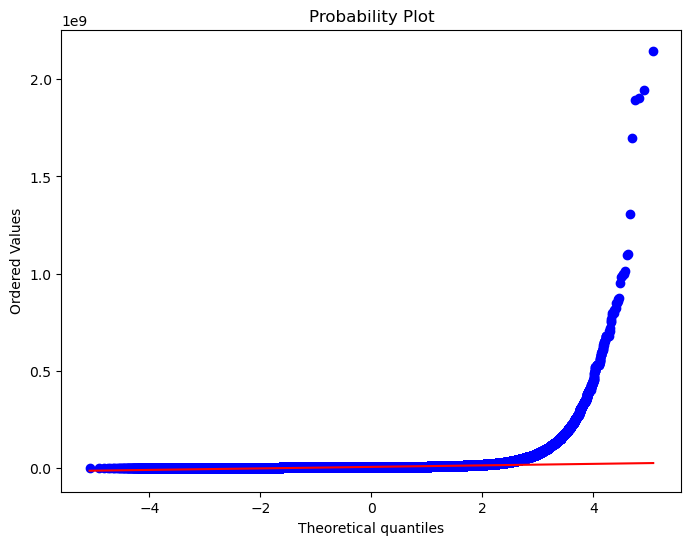

In [17]:
st.probplot(vtor, dist='norm', plot=plt)
plt.show()

Т.к. выборки не имеют нормального распределения, проведем тест Манна-Уитни.

In [60]:
alpha = 0.05 # уровень статистической значимости

results = st.mannwhitneyu(perv, vtor)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Следует отвергнуть нулевую гипотезу') 
else:
    print('Не удалось отвергнуть нулевую гипотезу') 

p-value: 0.0
Следует отвергнуть нулевую гипотезу


Проверим с помощью bootstrap

In [80]:
perv = df[df['object_type'] == 11]['price']
vtor = df[df['object_type'] == 1]['price']

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [10:58<00:00,  1.52it/s]


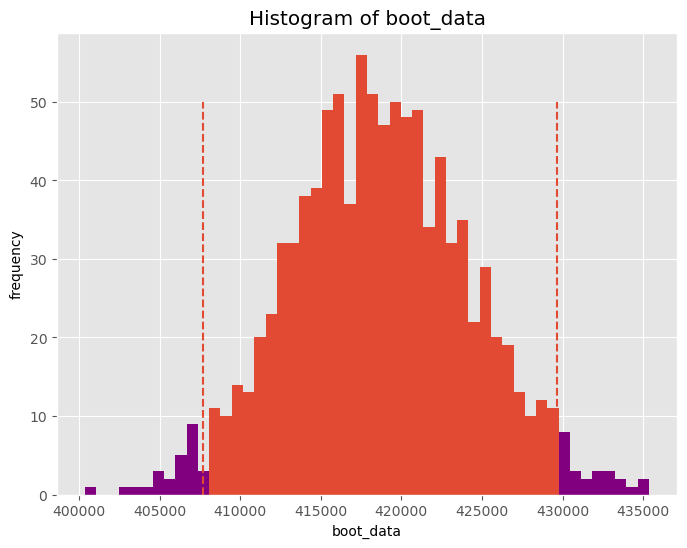

In [62]:
alpha = 0.05
from tqdm import tqdm
booted_data = get_bootstrap(perv, vtor)

In [63]:
booted_data["p_value"]

0.0

In [64]:
if booted_data["p_value"]  < alpha:
    print('Следует отвергнуть нулевую гипотезу') 
else:
    print('Не удалось отвергнуть нулевую гипотезу') 

Следует отвергнуть нулевую гипотезу


Также я решила проверить t-тестом, т.к. по ЦПТ на достаточно больших выборках его можно использовать и без требования нормальности распределения данных.

In [81]:
alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(perv, vtor)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Следует отвергнуть нулевую гипотезу') 
else:
    print('Не удалось отвергнуть нулевую гипотезу') 

p-value: 0.0
Следует отвергнуть нулевую гипотезу


По итогам всех тестов мы получили отвержение нулевой гипотезы, т.е. есть статистическая разница между стоимостью квартир на первичном и вторичным рынке есть.

In [27]:
perv.mean() - vtor.mean()

418723.8404222857

Т.е. жилье дороже на первичном рынке, первая моя гипотеза подтвердилась.

## <a class="anchor" id="2"><div class="alert alert-block alert-success">2. По данным самая высокая рыночная цена в монолитных домах. Также можем это проверить. 

In [4]:
# создадим столбец с типом дома
seas_m = {1: 'Панельный',
    2: 'Кирпично-монолитный',
    3: 'Кирпичный',
    4: 'Блочный',
    5: 'Деревянный',
    0: 'Другое'
} 
df['building_type_m'] = df['building_type'].map(seas_m)
df.head(1)

price        date  region  building_type  level  levels  rooms  area  \
0  6050000  2018-02-19    2661              1      8      10      3  82.6   

   kitchen_area  object_type         reg_name          pr_m year_month  month  \
0          10.8            1  Санкт-Петербург  73244.552058    2018-02      2   

  season month_name  year  season_n building_type_m  
0   Зима    Февраль  2018         1       Панельный

In [72]:
# группируем по материалу дома
m = df.groupby('building_type_m')['price'].agg(['sum', 'count']).reset_index()
m

building_type_m            sum    count
0              Блочный   582909872562   163615
1           Деревянный    36500205937    10483
2               Другое  1554689481239   290762
3  Кирпично-монолитный  7878227296051  1086533
4            Кирпичный  7444243756611  1788387
5            Панельный  6059008993692  1842975

По количеству больше всего домов панельных, меньше всего деревянных. При этом больше всего по сумме монолитных домов, а меньше всего деревянных.

[Text(0.5, 1.0, 'Сумма по типу материала'),
 Text(0.5, 0, 'Тип материала'),
 Text(0, 0.5, 'Сумма')]

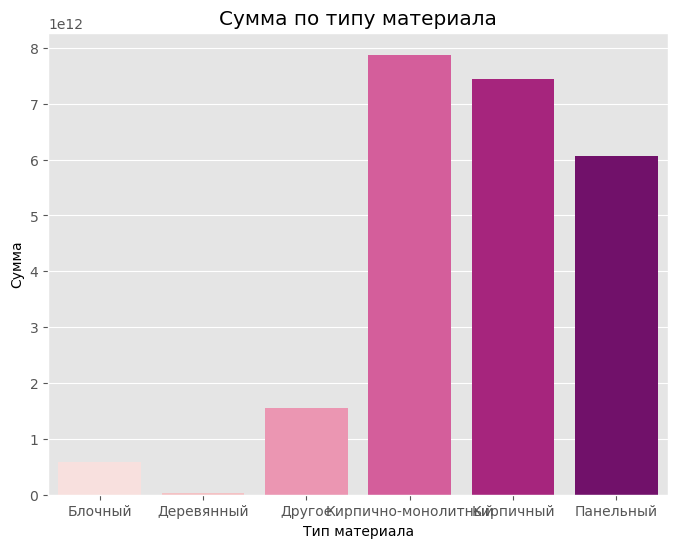

In [74]:
# построим столбчатую диаграмму
sns.barplot(data = m, x = 'building_type_m', y = 'sum', palette ='RdPu').set(title = 'Сумма по типу материала', xlabel = 'Тип материала', ylabel = 'Сумма')

In [86]:
# группируем по материалу дома
st1 = df.groupby('building_type_m')['price'].mean().reset_index()
st1

building_type_m         price
0              Блочный  3.562692e+06
1           Деревянный  3.481847e+06
2               Другое  5.346949e+06
3  Кирпично-монолитный  7.250794e+06
4            Кирпичный  4.162546e+06
5            Панельный  3.287624e+06

[Text(0.5, 1.0, 'Средняя сумма по типу материала'),
 Text(0.5, 0, 'Тип материала'),
 Text(0, 0.5, 'Средняя сумма')]

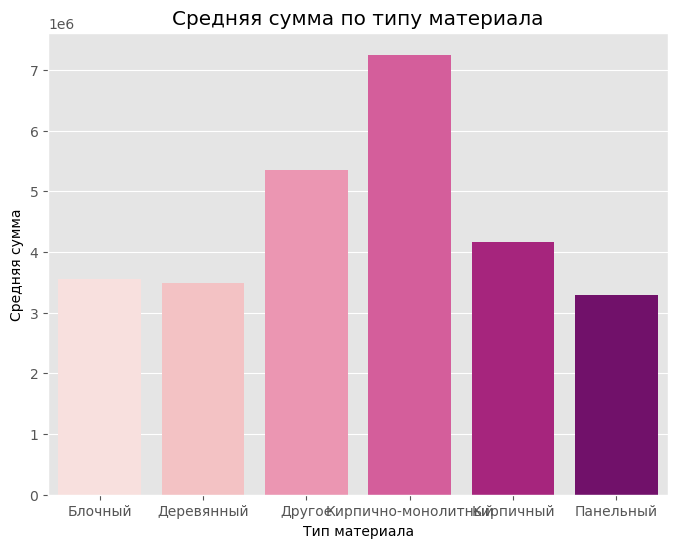

In [87]:
# построим столбчатую диаграмму
sns.barplot(data = st1, x = 'building_type_m', y = 'price', palette ='RdPu').set(title = 'Средняя сумма по типу материала', xlabel = 'Тип материала', ylabel = 'Средняя сумма')

Средняя сумма по типу материала больше всего у кирпично-монолитных домов, а меньше всего у панельных.

Сформулируем нулевую гипотезу:<br>
H0 = стоимость квартир в монолитных домах и домах из материала из категории другое одинакова.<br>
Другими словами: материал не влияет на стоимость квартир.<br>
Тогда альтернативная гипотеза будет звучать так:<br>
H1 = стоимость квартир в монолитных домах и домах из материала из категории другое отличается.<br>
Другими словами: материал влияет на стоимость квартир.<br>

In [5]:
mon = df[df['building_type'] == 2]['price'].tolist()
dr = df[df['building_type'] == 0]['price'].tolist()

<Axes: ylabel='Count'>

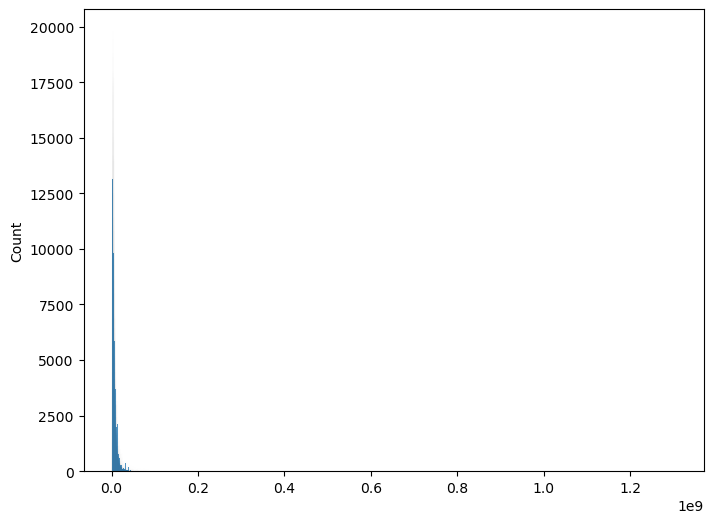

In [6]:
plt.rcParams['figure.figsize'] = (8, 6)
sns.histplot(data = mon)

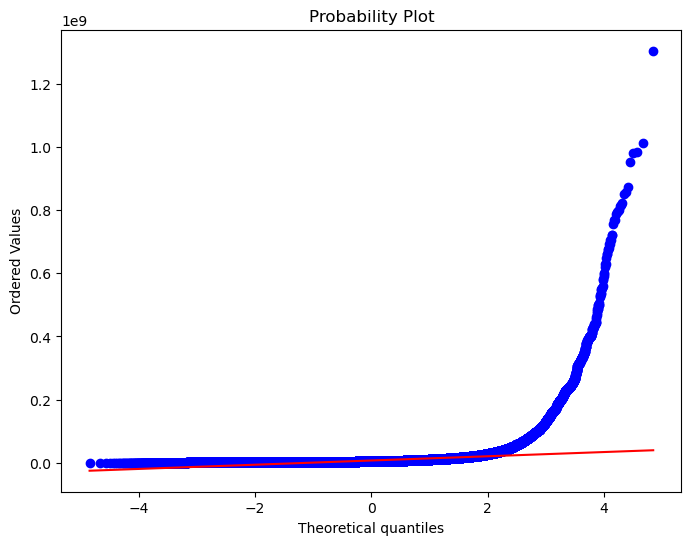

In [7]:
st.probplot(mon, dist='norm', plot=plt)
plt.show()

<Axes: ylabel='Count'>

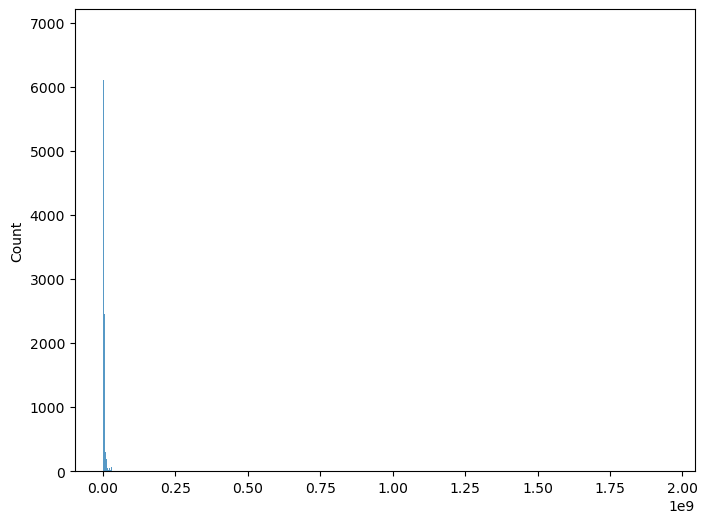

In [8]:
sns.histplot(data = dr)

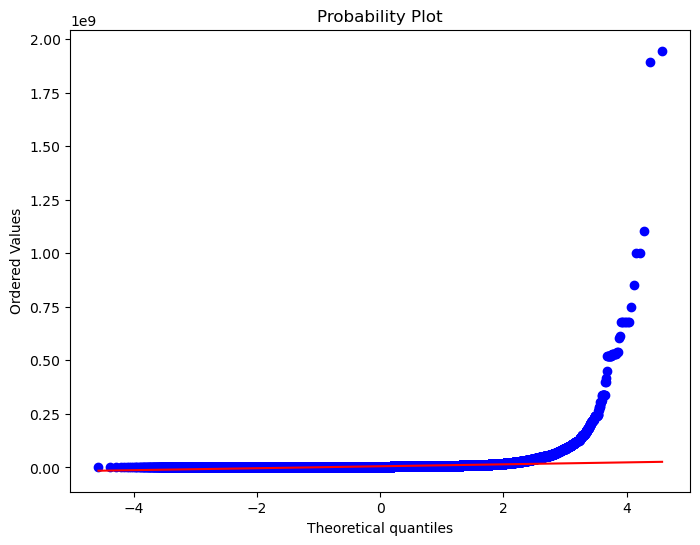

In [9]:
st.probplot(dr, dist='norm', plot=plt)
plt.show()

Т.к. выборки не имеют нормального распределения, проведем тест Манна-Уитни.

In [11]:
alpha = 0.05 # уровень статистической значимости

results = st.mannwhitneyu(mon, dr)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Следует отвергнуть нулевую гипотезу') 
else:
    print('Не удалось отвергнуть нулевую гипотезу') 

p-value: 0.0
Следует отвергнуть нулевую гипотезу


Проверим с помощью bootstrap

In [12]:
mon = df[df['building_type'] == 2]['price']
dr = df[df['building_type'] == 0]['price']

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:31<00:00,  4.74it/s]


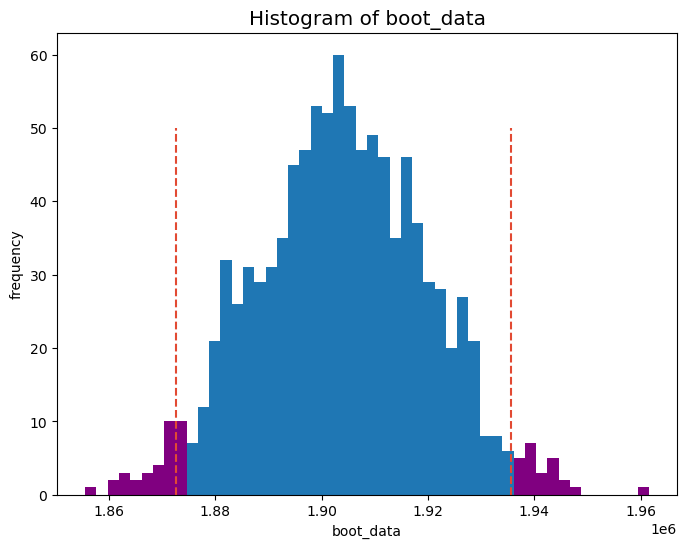

In [15]:
alpha = 0.05
from tqdm import tqdm
booted_data = get_bootstrap(mon, dr)

In [16]:
booted_data["p_value"]

0.0

In [17]:
if booted_data["p_value"]  < alpha:
    print('Следует отвергнуть нулевую гипотезу') 
else:
    print('Не удалось отвергнуть нулевую гипотезу') 

Следует отвергнуть нулевую гипотезу


Также я решила проверить t-тестом, т.к. по ЦПТ на достаточно больших выборках его можно использовать и без требования нормальности распределения данных.

In [78]:
alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(mon, dr)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Следует отвергнуть нулевую гипотезу') 
else:
    print('Не удалось отвергнуть нулевую гипотезу') 

p-value: 0.0
Следует отвергнуть нулевую гипотезу


По итогам всех тестов мы получили отвержение нулевой гипотезы, т.е. есть статистическая разница между стоимостью квартир в монолитных домах и домах с категорией другое есть.

In [19]:
mon.mean() - dr.mean()

1903845.6691960841

Т.е. жилье дороже в монолитных домах, первая моя гипотеза подтвердилась.

## <a class="anchor" id="2"><div class="alert alert-block alert-success">3. Чем больше площадь, тем больше цена.

Для этого исследования я разделю квартиры по площади на 4 группы с помощью метода describe.

In [43]:
df['area'].describe()

count    5.182755e+06
mean     5.476534e+01
std      2.409879e+01
min      2.185000e+01
25%      3.900000e+01
50%      4.900000e+01
75%      6.385000e+01
max      1.500000e+03
Name: area, dtype: float64

In [44]:
a1 = df[(df['area'] >= 2.185000e+01) & (df['area'] < 3.900000e+01)]['price'].tolist()
a1

[3600000,
 3200000,
 2150000,
 4800000,
 3735430,
 2149764,
 3680000,
 3903900,
 3900000,
 3300000,
 4690000,
 3400000,
 3055000,
 4100000,
 3070000,
 2350000,
 3300000,
 4400000,
 2450000,
 4950000,
 2250000,
 3500000,
 2995000,
 3800000,
 3595000,
 3700000,
 3899000,
 5050000,
 3995000,
 4260000,
 3370000,
 2086150,
 3259920,
 3363030,
 3894000,
 2980000,
 3500000,
 3650000,
 2349999,
 3900000,
 3250000,
 4800000,
 2630160,
 2297881,
 3150000,
 2000000,
 2800000,
 2750000,
 3000000,
 1850000,
 4100000,
 4200000,
 2000000,
 2700000,
 2650000,
 2990000,
 3800000,
 1185000,
 2584170,
 3950000,
 4165560,
 5200000,
 4549000,
 2424058,
 1932000,
 2840000,
 3150000,
 3350000,
 2999999,
 2600000,
 3650000,
 3800000,
 2500000,
 3390000,
 3460000,
 3580000,
 3590000,
 3200000,
 6150000,
 2550000,
 3350000,
 3050000,
 2400000,
 3400000,
 3400000,
 3600000,
 4550000,
 3650000,
 4500000,
 4100000,
 3250000,
 4450000,
 2550000,
 3200000,
 3250000,
 3040000,
 3003728,
 3200000,
 3300000,
 3300000,


In [45]:
a2 = df[(df['area'] >= 3.900000e+01) & (df['area'] < 4.900000e+01)]['price'].tolist()
a2

[3830000,
 5800000,
 4500000,
 4900000,
 3900000,
 3750000,
 2000000,
 3784100,
 3550000,
 3600000,
 4570000,
 5200000,
 3800000,
 4750000,
 4400000,
 3600000,
 4365000,
 3808000,
 3550000,
 4550000,
 4830000,
 4500000,
 4400000,
 6250000,
 5800000,
 1690000,
 4000000,
 4555000,
 4975000,
 4500000,
 2700000,
 4500000,
 4300000,
 3150000,
 4100000,
 4300000,
 4500000,
 4600000,
 4000000,
 3750000,
 3600000,
 3950000,
 4250000,
 4400000,
 6100000,
 3970000,
 5750000,
 4999000,
 4190000,
 5824000,
 7200000,
 4090000,
 6300000,
 5840000,
 5400000,
 4500000,
 5300000,
 7500000,
 5900000,
 4550000,
 4150000,
 4600000,
 5000000,
 5200000,
 3650000,
 4000000,
 4200000,
 4590000,
 5600000,
 4400000,
 3840000,
 9660000,
 4600000,
 8160000,
 5000000,
 7400000,
 5088000,
 4860000,
 4190000,
 2700000,
 6400000,
 4800000,
 5000000,
 4500000,
 3800000,
 6000000,
 4400000,
 4600000,
 3578400,
 4709070,
 5400000,
 4790000,
 3400000,
 4000000,
 4515000,
 5300000,
 5275000,
 2460000,
 6000000,
 3900000,


In [46]:
a3 = df[(df['area'] >= 4.900000e+01) & (df['area'] < 6.385000e+01)]['price'].tolist()
a3

[8500000,
 3900000,
 6680000,
 7101000,
 4990000,
 6380000,
 4900000,
 6242346,
 5319940,
 6600000,
 4690000,
 6050550,
 4700000,
 7400000,
 5000000,
 4674000,
 4826000,
 4900000,
 8587000,
 7514000,
 6100000,
 9500000,
 5395000,
 5400000,
 4800000,
 4600000,
 4900000,
 4378800,
 5550740,
 5365000,
 4376900,
 4231640,
 5179850,
 4701190,
 4767480,
 4909360,
 4700000,
 8290000,
 4435000,
 4350000,
 3995200,
 4700000,
 4900000,
 5750000,
 6463442,
 3885000,
 5971820,
 4000000,
 6130000,
 4850000,
 4900000,
 7195000,
 5390000,
 5000000,
 5665000,
 4650000,
 3944000,
 4882500,
 5050000,
 4100000,
 2906000,
 4800000,
 4300000,
 4500000,
 5550000,
 4508400,
 9500000,
 5090000,
 6300000,
 6095000,
 8600000,
 6080000,
 7750000,
 6300000,
 7400000,
 5218720,
 5240000,
 5300000,
 7400000,
 6200000,
 3580000,
 4650000,
 5100000,
 7770000,
 8350000,
 5600000,
 6450000,
 7250099,
 4990000,
 6999000,
 6500000,
 10300000,
 4600000,
 8000000,
 6850000,
 11000000,
 8400000,
 9300000,
 6250000,
 5800000

In [47]:
a4 = df[df['area'] >= 6.385000e+01]['price'].tolist()
a4

[6050000,
 6500000,
 6300000,
 7100000,
 4500000,
 6390000,
 8280000,
 10272240,
 5000000,
 10470000,
 8771000,
 9300000,
 8300000,
 6581000,
 6890000,
 7000000,
 6749000,
 9900000,
 6400000,
 8750000,
 17922000,
 30580000,
 6780000,
 7200000,
 7170000,
 11600000,
 8278000,
 6715000,
 7030000,
 5700000,
 5100000,
 10770000,
 4985000,
 11100000,
 18400000,
 16503008,
 6500000,
 6391000,
 6190450,
 5681600,
 7600000,
 22374400,
 6857000,
 17000000,
 44100000,
 13272321,
 10650000,
 13500000,
 28105000,
 9050000,
 4480000,
 12100000,
 4700000,
 9350000,
 10200000,
 7830000,
 6012200,
 3915000,
 36900000,
 7445435,
 3965000,
 7095000,
 4355000,
 9800000,
 15000000,
 6700000,
 19999999,
 13000000,
 7470000,
 5700000,
 6000000,
 8700000,
 5200000,
 7506975,
 37000000,
 5500000,
 5100000,
 8200000,
 4700000,
 18200000,
 14200000,
 23000000,
 4500000,
 8220000,
 4750000,
 4839600,
 4905000,
 4905000,
 9000000,
 5990000,
 14800000,
 11500000,
 7700000,
 5676370,
 22000000,
 6590000,
 12300000,


In [48]:
import statistics
dict = {'group':['1', '2', '3', '4'],
        'sum': [sum(a1), sum(a2), sum(a3), sum(a4)],
        'mean':[statistics.mean(a1), statistics.mean(a2), statistics.mean(a3), statistics.mean(a4)],
       'count':[len(a1), len(a2), len(a3), len(a4)]}
ar = pd.DataFrame(dict)
ar

group             sum          mean    count
0     1   3295748096174  2.664613e+06  1236858
1     2   4144350625767  3.115617e+06  1330186
2     3   5439187625598  4.185275e+06  1299601
3     4  10676293258553  8.112007e+06  1316110

[Text(0.5, 1.0, 'Сумма по площади квартиры'),
 Text(0.5, 0, 'Группа'),
 Text(0, 0.5, 'Сумма')]

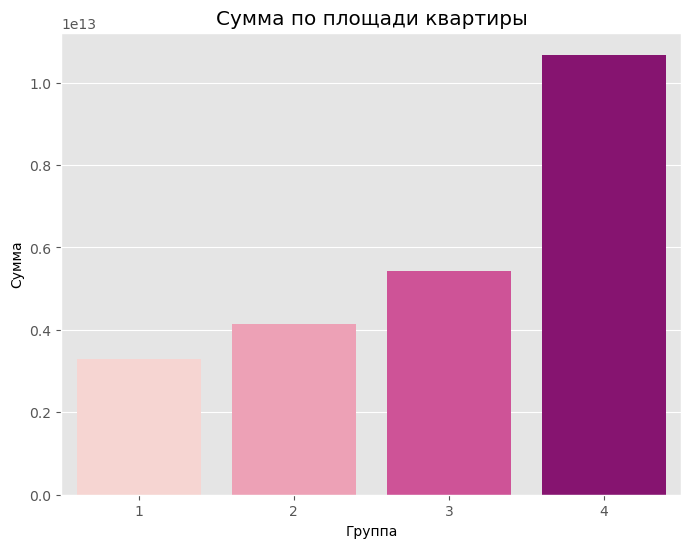

In [49]:
# построим столбчатую диаграмму
sns.barplot(data = ar, x = 'group', y = 'sum', palette ='RdPu').set(title = 'Сумма по площади квартиры', xlabel = 'Группа', ylabel = 'Сумма')

Сумма больше всего у 4 группы, меньше всего у первой, т.е. они идут прям по порядку.

Сформулируем нулевую гипотезу:<br>
H0 = стоимость квартир в 3 и 4 группах по площади одинакова.<br>
Другими словами: площадь не влияет на стоимость квартир.<br>
Тогда альтернативная гипотеза будет звучать так:<br>
H1 = стоимость квартир в 3 и 4 группе отличается.<br>
Другими словами: площадь влияет на стоимость квартир.<br>

<Axes: ylabel='Density'>

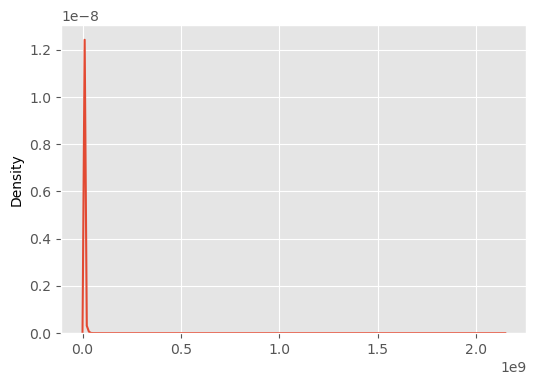

In [55]:
plt.rcParams['figure.figsize'] = (6, 4)
sns.kdeplot(data = a3)

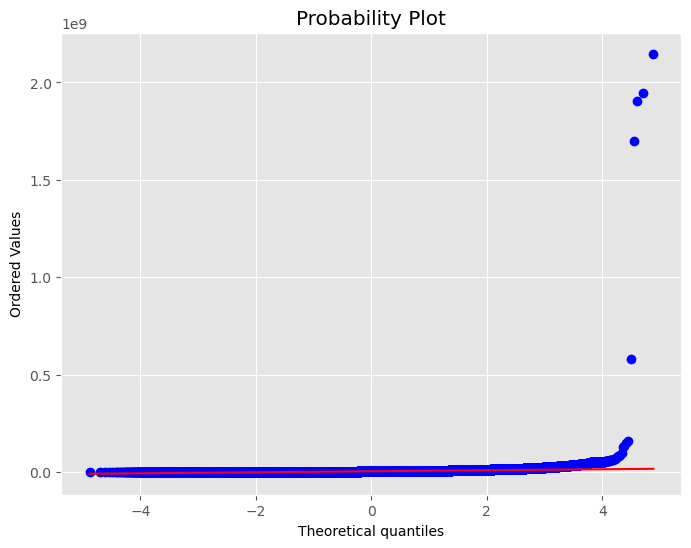

In [51]:
st.probplot(a3, dist='norm', plot=plt)
plt.show()

<Axes: ylabel='Count'>

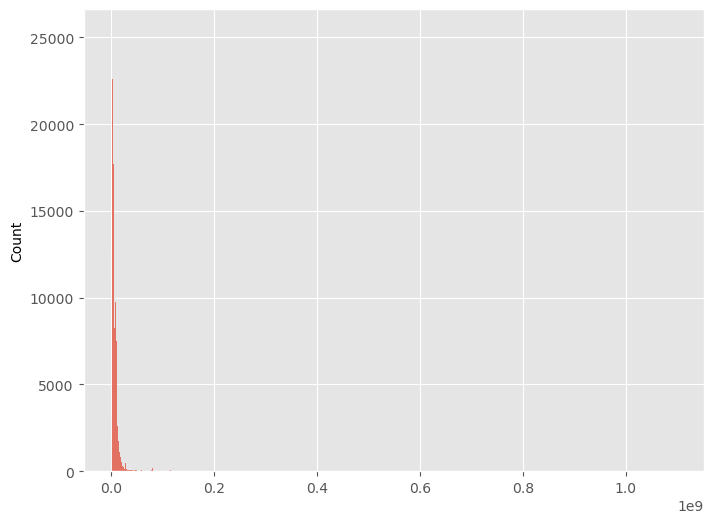

In [52]:
sns.histplot(data = a4)

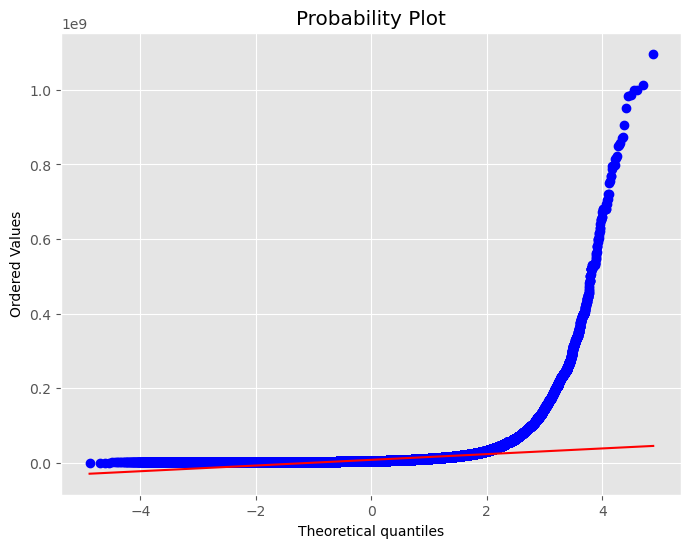

In [53]:
st.probplot(a4, dist='norm', plot=plt)
plt.show()

Т.к. выборки не имеют нормального распределения, проведем тест Манна-Уитни.

In [56]:
alpha = 0.05 # уровень статистической значимости

results = st.mannwhitneyu(a3, a4)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Следует отвергнуть нулевую гипотезу') 
else:
    print('Не удалось отвергнуть нулевую гипотезу') 

p-value: 0.0
Следует отвергнуть нулевую гипотезу


Проверим с помощью bootstrap

In [58]:
a3 = df[(df['area'] >= 4.900000e+01) & (df['area'] < 6.385000e+01)]['price']
a4 = df[df['area'] >= 6.385000e+01]['price']

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [04:28<00:00,  3.72it/s]


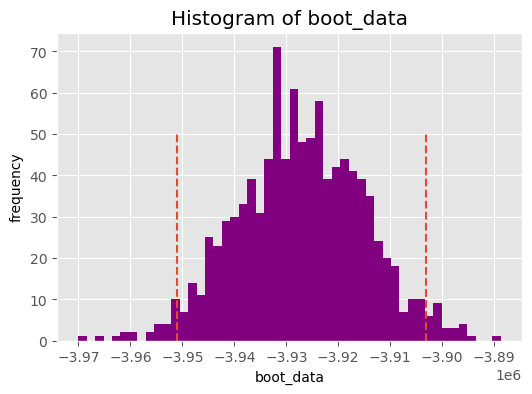

In [59]:
alpha = 0.05
from tqdm import tqdm
booted_data = get_bootstrap(a3, a4)

In [60]:
booted_data["p_value"]

0.0

In [61]:
if booted_data["p_value"]  < alpha:
    print('Следует отвергнуть нулевую гипотезу') 
else:
    print('Не удалось отвергнуть нулевую гипотезу') 

Следует отвергнуть нулевую гипотезу


По итогам обоих тестов мы получили отвержение нулевой гипотезы, т.е. есть статистическая разница между стоимостью квартир разной площади есть.

Т.е. чем больше площадь, тем дороже квартира, моя гипотеза подтвердилась.

Далее я просто проверила попарно эти же гипотезы между другими группами.

<Axes: ylabel='Density'>

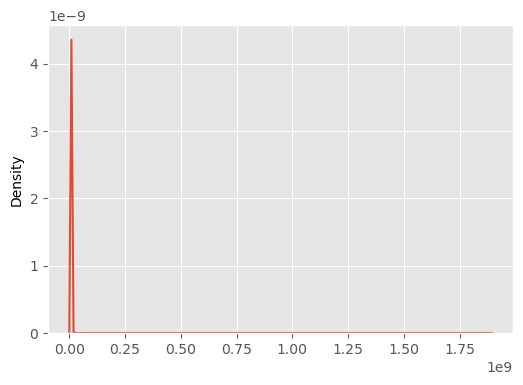

In [62]:
plt.rcParams['figure.figsize'] = (6, 4)
sns.kdeplot(data = a1)

<Axes: ylabel='Density'>

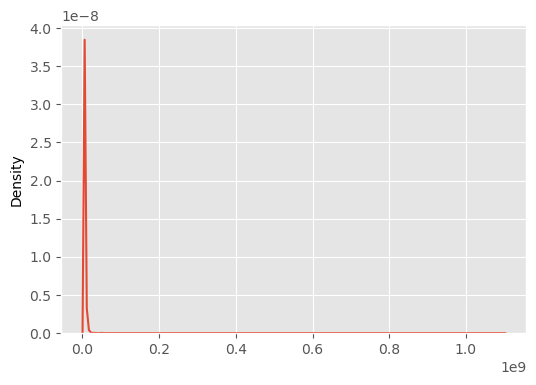

In [64]:
plt.rcParams['figure.figsize'] = (6, 4)
sns.kdeplot(data = a2)

In [65]:
alpha = 0.05 # уровень статистической значимости

results = st.mannwhitneyu(a3, a2)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Следует отвергнуть нулевую гипотезу') 
else:
    print('Не удалось отвергнуть нулевую гипотезу') 

p-value: 0.0
Следует отвергнуть нулевую гипотезу


In [66]:
alpha = 0.05 # уровень статистической значимости

results = st.mannwhitneyu(a1, a2)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Следует отвергнуть нулевую гипотезу') 
else:
    print('Не удалось отвергнуть нулевую гипотезу') 

p-value: 0.0
Следует отвергнуть нулевую гипотезу


In [67]:
a1 = df[(df['area'] >= 2.185000e+01) & (df['area'] < 3.900000e+01)]['price']
a2 = df[(df['area'] >= 3.900000e+01) & (df['area'] < 4.900000e+01)]['price']

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [04:31<00:00,  3.68it/s]


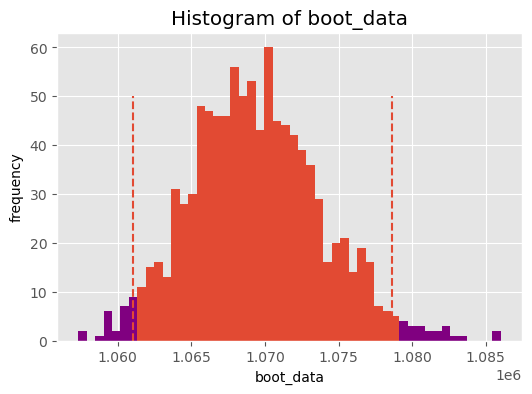

In [68]:
alpha = 0.05
from tqdm import tqdm
booted_data = get_bootstrap(a3, a2)

In [69]:
booted_data["p_value"]

0.0

In [70]:
if booted_data["p_value"]  < alpha:
    print('Следует отвергнуть нулевую гипотезу') 
else:
    print('Не удалось отвергнуть нулевую гипотезу') 

Следует отвергнуть нулевую гипотезу


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [04:33<00:00,  3.66it/s]


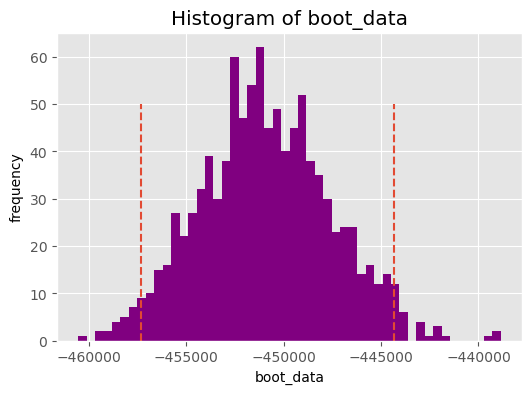

In [71]:
alpha = 0.05
from tqdm import tqdm
booted_data = get_bootstrap(a1, a2)

In [72]:
booted_data["p_value"]

0.0

In [73]:
if booted_data["p_value"]  < alpha:
    print('Следует отвергнуть нулевую гипотезу') 
else:
    print('Не удалось отвергнуть нулевую гипотезу') 

Следует отвергнуть нулевую гипотезу


Также я решила проверить t-тестами, т.к. по ЦПТ на достаточно больших выборках его можно использовать и без требования нормальности распределения данных.

In [75]:
alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(a1, a2)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Следует отвергнуть нулевую гипотезу') 
else:
    print('Не удалось отвергнуть нулевую гипотезу') 

p-value: 0.0
Следует отвергнуть нулевую гипотезу


In [76]:
alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(a3, a2)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Следует отвергнуть нулевую гипотезу') 
else:
    print('Не удалось отвергнуть нулевую гипотезу') 

p-value: 0.0
Следует отвергнуть нулевую гипотезу


In [77]:
alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(a3, a4)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Следует отвергнуть нулевую гипотезу') 
else:
    print('Не удалось отвергнуть нулевую гипотезу') 

p-value: 0.0
Следует отвергнуть нулевую гипотезу


T-тесты дали тот же результат.

## <a class="anchor" id="2"><div class="alert alert-block alert-success">4. Квартиры в многоэтажных домах стоят дороже, чем в низкоэтажных.

In [5]:
df['levels'].unique()

array([10,  5,  9,  3, 12, 14, 17,  4,  6, 18,  8, 24, 16, 27, 23, 25, 13,
       26,  7, 22, 20,  1, 21, 19, 11,  2, 15, 32, 28, 30, 35, 34, 29, 37,
       31, 36, 33, 38, 39], dtype=int64)

Для этого исследования я разделю квартиры по тому, в скольки этажном доме они находятся, на 4 группы с помощью метода describe.

In [6]:
df['levels'].describe()

count    5.182755e+06
mean     1.135973e+01
std      6.336213e+00
min      1.000000e+00
25%      5.000000e+00
50%      1.000000e+01
75%      1.600000e+01
max      3.900000e+01
Name: levels, dtype: float64

In [7]:
l1 = df[(df['levels'] >= 1) & (df['levels'] < 5)]['price'].tolist()
l1

[6500000,
 3900000,
 5000000,
 2000000,
 3800000,
 3500000,
 4500000,
 4700000,
 13500000,
 4480000,
 4800000,
 13000000,
 6000000,
 4700000,
 23000000,
 9000000,
 7750000,
 5200000,
 6999000,
 5700000,
 6850000,
 4700000,
 2700000,
 4400000,
 2500000,
 8000000,
 2800000,
 55000000,
 3000000,
 7500000,
 7800000,
 5350000,
 19450000,
 9300000,
 4150000,
 4000000,
 2700000,
 5200000,
 2390000,
 9707400,
 12673800,
 11054000,
 11794000,
 5654768,
 3450000,
 27000000,
 1050000,
 7550000,
 4200000,
 8190000,
 4150000,
 4250000,
 3000000,
 3790000,
 5200000,
 2040000,
 7600000,
 10600000,
 14500000,
 8900000,
 9690000,
 6400000,
 6450000,
 8754000,
 3600000,
 8213280,
 7861725,
 4384800,
 8213280,
 8213280,
 8213280,
 4384800,
 4384800,
 8186868,
 8213280,
 4384800,
 7861725,
 4341600,
 7100000,
 14400000,
 9850000,
 1650000,
 14200000,
 12600000,
 8000000,
 2900000,
 3400000,
 4680000,
 5480000,
 8900000,
 15000000,
 6300000,
 3650000,
 2220000,
 8000000,
 1700000,
 3400000,
 8000000,
 6750

In [8]:
l2 = df[(df['levels'] >= 5) & (df['levels'] < 10)]['price'].tolist()
l2

[3600000,
 3200000,
 6300000,
 4500000,
 6680000,
 2150000,
 10272240,
 4990000,
 6380000,
 4900000,
 2149764,
 9300000,
 8300000,
 6890000,
 3680000,
 6600000,
 4690000,
 7000000,
 3550000,
 17922000,
 2350000,
 3300000,
 4900000,
 2450000,
 4750000,
 4950000,
 3600000,
 2250000,
 8278000,
 2995000,
 3550000,
 4830000,
 10770000,
 3995000,
 4985000,
 11100000,
 18400000,
 16503008,
 4400000,
 7600000,
 2980000,
 13272321,
 5800000,
 3500000,
 1690000,
 3650000,
 4435000,
 4000000,
 4555000,
 12100000,
 4700000,
 3250000,
 4700000,
 5750000,
 4500000,
 4300000,
 6463442,
 2297881,
 4300000,
 4500000,
 3150000,
 4000000,
 2000000,
 4600000,
 6130000,
 4850000,
 2800000,
 4900000,
 3000000,
 15000000,
 19999999,
 3950000,
 4200000,
 4250000,
 2700000,
 2650000,
 8700000,
 6100000,
 5000000,
 37000000,
 3950000,
 2424058,
 4100000,
 1932000,
 2906000,
 4999000,
 3150000,
 4190000,
 4300000,
 2999999,
 18200000,
 14200000,
 4500000,
 4090000,
 3650000,
 3800000,
 8220000,
 4750000,
 630000

In [11]:
l3 = df[(df['levels'] >= 10) & (df['levels'] < 16)]['price'].tolist()
l3

[6050000,
 7100000,
 8500000,
 6390000,
 8280000,
 5800000,
 6749000,
 9900000,
 3300000,
 4690000,
 4100000,
 5200000,
 7200000,
 7514000,
 3700000,
 5050000,
 2086150,
 6500000,
 5681600,
 4376900,
 3363030,
 4231640,
 5179850,
 4701190,
 22374400,
 44100000,
 10650000,
 28105000,
 8290000,
 36900000,
 2750000,
 9800000,
 3750000,
 6700000,
 5700000,
 2990000,
 5500000,
 5750000,
 5050000,
 4800000,
 3350000,
 5824000,
 7200000,
 4500000,
 9500000,
 5840000,
 5090000,
 5990000,
 14800000,
 11500000,
 7400000,
 12300000,
 3600000,
 4550000,
 6700000,
 3250000,
 9200000,
 5600000,
 4400000,
 9660000,
 4600000,
 6500000,
 3003728,
 10300000,
 8160000,
 3300000,
 5000000,
 8500000,
 7400000,
 8000000,
 9401141,
 8000000,
 4500000,
 6400000,
 5800000,
 2340819,
 4935871,
 2990000,
 4790000,
 3750000,
 6000000,
 2800000,
 3100000,
 7600000,
 4150000,
 5201580,
 3500000,
 3750000,
 6700000,
 24900000,
 4700000,
 4500000,
 4100000,
 5600000,
 6990000,
 8500000,
 6850000,
 6450000,
 18850000,

In [12]:
l4 = df[df['levels'] >= 16]['price'].tolist()
l4

[3830000,
 7101000,
 4800000,
 3735430,
 10470000,
 8771000,
 4500000,
 6242346,
 4900000,
 6581000,
 5319940,
 3900000,
 3750000,
 6050550,
 3903900,
 3900000,
 3784100,
 6400000,
 4700000,
 7400000,
 8750000,
 3600000,
 5000000,
 4570000,
 3400000,
 3055000,
 30580000,
 3070000,
 4674000,
 4826000,
 6780000,
 7170000,
 4400000,
 4400000,
 8587000,
 11600000,
 6100000,
 4365000,
 3808000,
 9500000,
 3800000,
 4550000,
 5395000,
 3595000,
 6715000,
 7030000,
 5400000,
 3899000,
 4800000,
 4600000,
 5700000,
 5100000,
 4900000,
 4260000,
 3370000,
 6391000,
 4378800,
 6190450,
 5550740,
 5365000,
 3259920,
 4767480,
 4909360,
 3894000,
 6857000,
 17000000,
 6250000,
 9050000,
 2349999,
 4975000,
 4350000,
 4500000,
 3900000,
 2700000,
 3995200,
 4900000,
 9350000,
 10200000,
 3150000,
 2630160,
 4100000,
 7830000,
 3885000,
 5971820,
 6012200,
 3915000,
 7445435,
 3965000,
 7095000,
 4000000,
 4355000,
 1850000,
 3600000,
 4100000,
 7470000,
 2000000,
 7195000,
 5200000,
 4400000,
 3800

In [13]:
import statistics
dict = {'group':['1', '2', '3', '4'],
        'sum': [sum(l1), sum(l2), sum(l3), sum(l4)],
        'mean':[statistics.mean(l1), statistics.mean(l2), statistics.mean(l3), statistics.mean(l4)],
       'count':[len(l1), len(l2), len(l3), len(l4)]}
lv = pd.DataFrame(dict)
lv

group            sum          mean    count
0     1  1330577566418  3.240861e+06   410563
1     2  7720684706979  4.066971e+06  1898387
2     3  5673236787464  4.173195e+06  1359447
3     4  8831080545231  5.831567e+06  1514358

[Text(0.5, 1.0, 'Сумма по этажам квартиры'),
 Text(0.5, 0, 'Группа'),
 Text(0, 0.5, 'Сумма')]

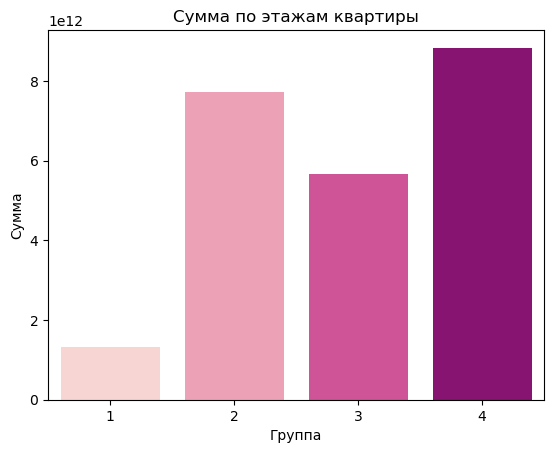

In [14]:
# построим столбчатую диаграмму
sns.barplot(data = lv, x = 'group', y = 'sum', palette ='RdPu').set(title = 'Сумма по этажам квартиры', xlabel = 'Группа', ylabel = 'Сумма')

Средняя сумма больше всего у 4 группы, меньше всего у первой, т.е. они идут прям по порядку. Общие суммы нет, но это по причине разного количества.

Сформулируем нулевую гипотезу:<br>
H0 = стоимость квартир в 3 и 4 группах по этажам одинакова.<br>
Другими словами: этажность дома не влияет на стоимость квартир.<br>
Тогда альтернативная гипотеза будет звучать так:<br>
H1 = стоимость квартир в 3 и 4 группе отличается.<br>
Другими словами: этажность влияет на стоимость квартир.<br>

<Axes: ylabel='Density'>

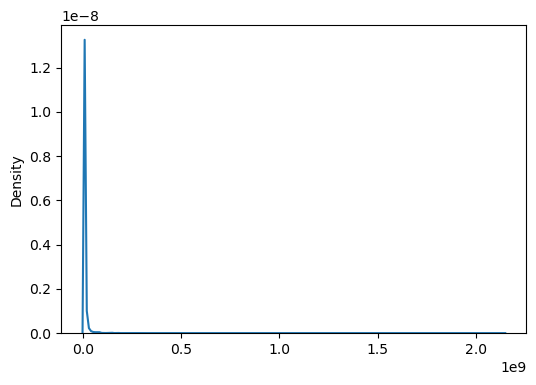

In [20]:
plt.rcParams['figure.figsize'] = (6, 4)
sns.kdeplot(data = l3)

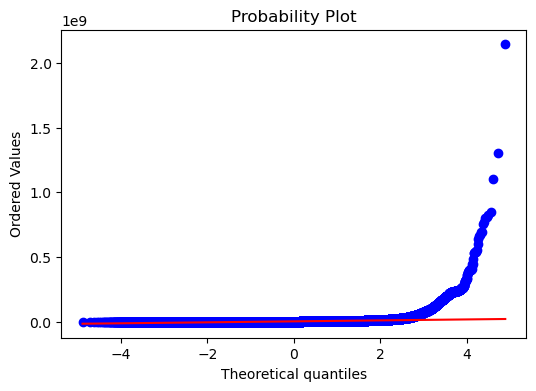

In [21]:
st.probplot(l3, dist='norm', plot=plt)
plt.show()

<Axes: ylabel='Count'>

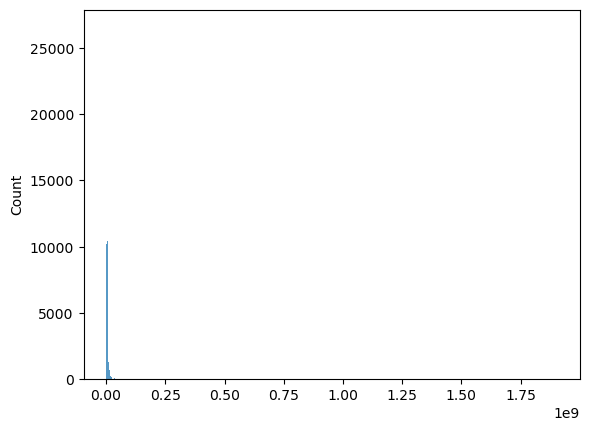

In [15]:
sns.histplot(data = l4)

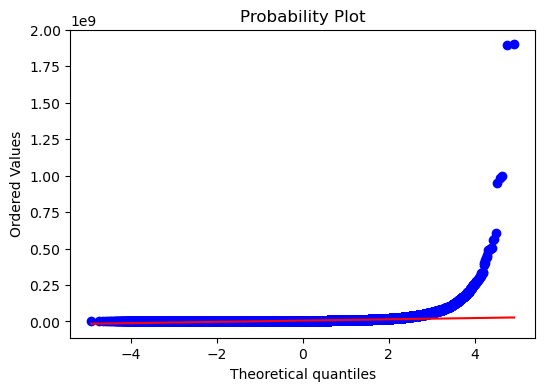

In [23]:
st.probplot(l4, dist='norm', plot=plt)
plt.show()

Т.к. выборки не имеют нормального распределения, проведем тест Манна-Уитни.

In [16]:
alpha = 0.05 # уровень статистической значимости

results = st.mannwhitneyu(l3, l4)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Следует отвергнуть нулевую гипотезу') 
else:
    print('Не удалось отвергнуть нулевую гипотезу') 

p-value: 0.0
Следует отвергнуть нулевую гипотезу


Проверим с помощью bootstrap

In [19]:
l3 = df[(df['levels'] >= 10) & (df['levels'] < 16)]['price']
l4 = df[df['levels'] >= 16]['price']

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [04:11<00:00,  3.97it/s]


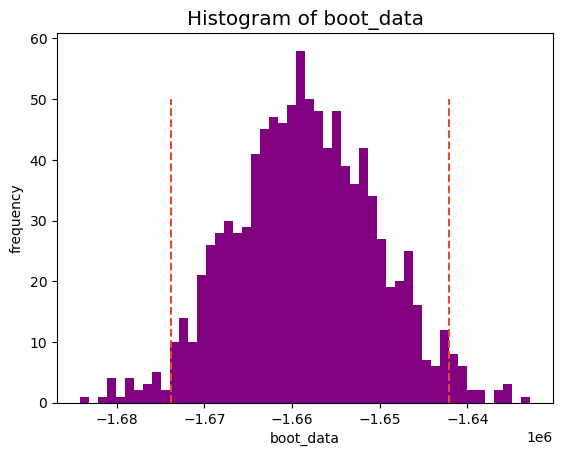

In [20]:
alpha = 0.05
from tqdm import tqdm
booted_data = get_bootstrap(l3, l4)

In [21]:
booted_data["p_value"]

0.0

In [22]:
if booted_data["p_value"]  < alpha:
    print('Следует отвергнуть нулевую гипотезу') 
else:
    print('Не удалось отвергнуть нулевую гипотезу') 

Следует отвергнуть нулевую гипотезу


Проверю t-тестом по ЦПТ

In [23]:
alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(l3, l4)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Следует отвергнуть нулевую гипотезу') 
else:
    print('Не удалось отвергнуть нулевую гипотезу') 

p-value: 0.0
Следует отвергнуть нулевую гипотезу


По итогам всех тестов мы получили отвержение нулевой гипотезы, т.е. есть статистическая разница между стоимостью квартир в домах с разной этажностью есть.

Т.е. чем больше этажей в доме, тем дороже квартира, моя гипотеза подтвердилась.

Далее я просто проверила попарно эти же гипотезы между другими группами.

<Axes: ylabel='Density'>

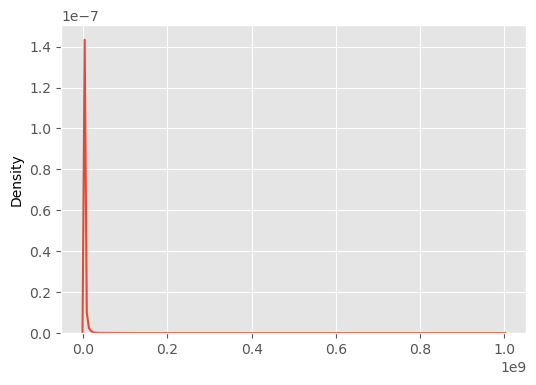

In [24]:
plt.rcParams['figure.figsize'] = (6, 4)
sns.kdeplot(data = l1)

<Axes: ylabel='Density'>

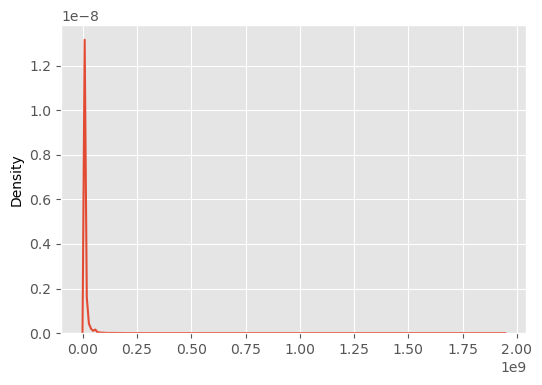

In [25]:
plt.rcParams['figure.figsize'] = (6, 4)
sns.kdeplot(data = l2)

In [26]:
alpha = 0.05 # уровень статистической значимости

results = st.mannwhitneyu(l3, l2)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Следует отвергнуть нулевую гипотезу') 
else:
    print('Не удалось отвергнуть нулевую гипотезу') 

p-value: 2.787931381605072e-23
Следует отвергнуть нулевую гипотезу


In [27]:
alpha = 0.05 # уровень статистической значимости

results = st.mannwhitneyu(l1, l2)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Следует отвергнуть нулевую гипотезу') 
else:
    print('Не удалось отвергнуть нулевую гипотезу') 

p-value: 0.0
Следует отвергнуть нулевую гипотезу


In [28]:
l1 = df[(df['levels'] >= 1) & (df['levels'] < 5)]['price']
l2 = df[(df['levels'] >= 5) & (df['levels'] < 10)]['price']

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [05:21<00:00,  3.11it/s]


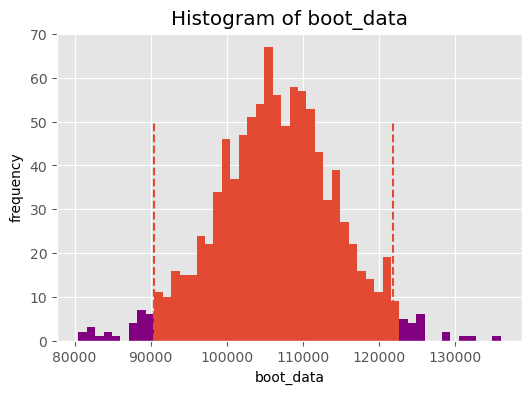

In [29]:
alpha = 0.05
from tqdm import tqdm
booted_data = get_bootstrap(l3, l2)

In [30]:
booted_data["p_value"]

6.450626071516279e-40

In [31]:
if booted_data["p_value"]  < alpha:
    print('Следует отвергнуть нулевую гипотезу') 
else:
    print('Не удалось отвергнуть нулевую гипотезу') 

Следует отвергнуть нулевую гипотезу


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [04:25<00:00,  3.76it/s]


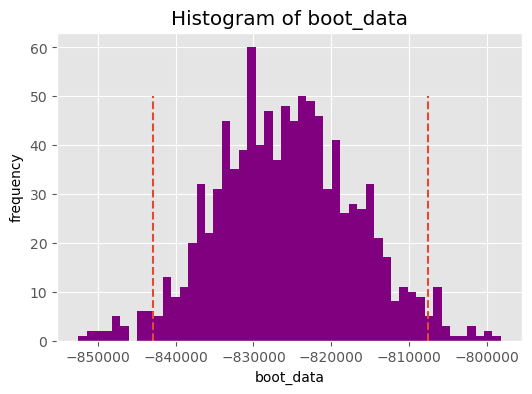

In [32]:
alpha = 0.05
from tqdm import tqdm
booted_data = get_bootstrap(l1, l2)

In [33]:
booted_data["p_value"]

0.0

In [34]:
if booted_data["p_value"]  < alpha:
    print('Следует отвергнуть нулевую гипотезу') 
else:
    print('Не удалось отвергнуть нулевую гипотезу') 

Следует отвергнуть нулевую гипотезу


Также я решила проверить t-тестами, т.к. по ЦПТ на достаточно больших выборках его можно использовать и без требования нормальности распределения данных.

In [35]:
alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(l1, l2)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Следует отвергнуть нулевую гипотезу') 
else:
    print('Не удалось отвергнуть нулевую гипотезу') 

p-value: 0.0
Следует отвергнуть нулевую гипотезу


In [36]:
alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(l3, l2)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Следует отвергнуть нулевую гипотезу') 
else:
    print('Не удалось отвергнуть нулевую гипотезу') 

p-value: 1.2075327756058318e-32
Следует отвергнуть нулевую гипотезу


По результатам всех тестов сделаем вывод: чем больше этажей в доме, тем дороже квартира.

## <a class="anchor" id="2"><div class="alert alert-block alert-success"> 5. Чем выше этаж, тем дороже квартира.

In [37]:
df['level'].unique()

array([ 8,  2,  7,  3,  5, 14,  1,  9, 10,  6, 21,  4, 13, 16, 12, 17, 18,
       15, 20, 23, 22, 19, 11, 25, 24, 26, 28, 34, 27, 31, 33, 29, 32, 35,
       30, 36, 37, 39, 38], dtype=int64)

Для этого исследования я разделю квартиры по их нахождению на этажах на 4 группы с помощью метода describe.

In [38]:
df['level'].describe()

count    5.182755e+06
mean     6.274267e+00
std      4.957791e+00
min      1.000000e+00
25%      3.000000e+00
50%      5.000000e+00
75%      9.000000e+00
max      3.900000e+01
Name: level, dtype: float64

In [39]:
l1 = df[(df['level'] >= 1) & (df['level'] < 3)]['price'].tolist()
l1

[3600000,
 3830000,
 4500000,
 6680000,
 5000000,
 3735430,
 2149764,
 9300000,
 6600000,
 9900000,
 2000000,
 4100000,
 3800000,
 4674000,
 2350000,
 2450000,
 4400000,
 3500000,
 2995000,
 4550000,
 5400000,
 4500000,
 11100000,
 5365000,
 4400000,
 4231640,
 4701190,
 1690000,
 12100000,
 3900000,
 3250000,
 4700000,
 4300000,
 4500000,
 5971820,
 6012200,
 7445435,
 13000000,
 3950000,
 4250000,
 2650000,
 2990000,
 7506975,
 6100000,
 2584170,
 4650000,
 3944000,
 5500000,
 3350000,
 2999999,
 4500000,
 3650000,
 14800000,
 8600000,
 3050000,
 5200000,
 6700000,
 4650000,
 5000000,
 3650000,
 4000000,
 11999000,
 3200000,
 12500000,
 5700000,
 10300000,
 9401141,
 6850000,
 4190000,
 4700000,
 2700000,
 3799000,
 6000000,
 4300000,
 2990000,
 2500000,
 7950000,
 4100000,
 2300000,
 4400000,
 6900000,
 5511000,
 3900000,
 4790000,
 3299999,
 4850000,
 8800000,
 2783250,
 2800000,
 3370000,
 55000000,
 4850000,
 7492495,
 7554035,
 3000000,
 3199000,
 10200000,
 3300000,
 7800000,
 

In [40]:
l2 = df[(df['level'] >= 3) & (df['level'] < 5)]['price'].tolist()
l2

[6500000,
 3900000,
 7101000,
 10272240,
 8300000,
 4690000,
 7000000,
 6749000,
 6400000,
 3550000,
 4700000,
 3300000,
 4690000,
 17922000,
 5200000,
 4826000,
 6780000,
 4750000,
 2250000,
 3550000,
 4830000,
 4600000,
 5700000,
 10770000,
 18400000,
 3370000,
 16503008,
 6500000,
 5681600,
 3894000,
 7600000,
 6857000,
 4700000,
 13272321,
 6250000,
 5800000,
 13500000,
 3650000,
 4435000,
 4480000,
 4700000,
 5750000,
 6463442,
 4800000,
 2297881,
 4300000,
 4000000,
 7095000,
 4600000,
 6130000,
 2800000,
 9800000,
 3000000,
 19999999,
 4200000,
 6000000,
 8700000,
 4400000,
 1185000,
 5390000,
 5000000,
 4882500,
 5750000,
 3950000,
 5050000,
 4165560,
 2424058,
 4100000,
 2840000,
 4700000,
 3150000,
 4300000,
 18200000,
 14200000,
 4500000,
 23000000,
 5824000,
 4090000,
 3800000,
 2500000,
 3390000,
 5840000,
 3580000,
 3590000,
 9000000,
 4500000,
 7750000,
 2550000,
 7700000,
 6300000,
 7400000,
 5218720,
 5240000,
 7400000,
 5300000,
 3400000,
 3600000,
 6888000,
 6882750,

In [41]:
l3 = df[(df['level'] >= 5) & (df['level'] < 9)]['price'].tolist()
l3

[6050000,
 3200000,
 6300000,
 7100000,
 2150000,
 5800000,
 4990000,
 4800000,
 6380000,
 4900000,
 8771000,
 5319940,
 6890000,
 3680000,
 6050550,
 3903900,
 3070000,
 3300000,
 7200000,
 4900000,
 4400000,
 4950000,
 3600000,
 7514000,
 11600000,
 5395000,
 6715000,
 3700000,
 4800000,
 4900000,
 5050000,
 3995000,
 4985000,
 6190450,
 4376900,
 3363030,
 5179850,
 22374400,
 2980000,
 3500000,
 8290000,
 4000000,
 4350000,
 4500000,
 2700000,
 4500000,
 2630160,
 4100000,
 3150000,
 36900000,
 2000000,
 4850000,
 4900000,
 15000000,
 3750000,
 4100000,
 5700000,
 2000000,
 2700000,
 37000000,
 5100000,
 4549000,
 1932000,
 2906000,
 4999000,
 8200000,
 4190000,
 5550000,
 8220000,
 4750000,
 4839600,
 4905000,
 4508400,
 6300000,
 4905000,
 9500000,
 5400000,
 6080000,
 3200000,
 7500000,
 22000000,
 12300000,
 2400000,
 3400000,
 10500000,
 7550000,
 7660000,
 3650000,
 4150000,
 6200000,
 4600000,
 4200000,
 45000000,
 7250099,
 8350000,
 6500000,
 3300000,
 6192000,
 4500000,
 

In [42]:
l4 = df[df['level'] >= 9]['price'].tolist()
l4

[8500000,
 6390000,
 8280000,
 10470000,
 4500000,
 6242346,
 4900000,
 6581000,
 3900000,
 3750000,
 3900000,
 3784100,
 7400000,
 8750000,
 3600000,
 5000000,
 4570000,
 3400000,
 3055000,
 30580000,
 7170000,
 8587000,
 6100000,
 8278000,
 4365000,
 3808000,
 9500000,
 3800000,
 3595000,
 7030000,
 3899000,
 5100000,
 4260000,
 2086150,
 6391000,
 4378800,
 5550740,
 3259920,
 4767480,
 4909360,
 17000000,
 44100000,
 10650000,
 28105000,
 9050000,
 2349999,
 4555000,
 4975000,
 3995200,
 4900000,
 9350000,
 10200000,
 3150000,
 7830000,
 3885000,
 3915000,
 3965000,
 4000000,
 4355000,
 2750000,
 1850000,
 3600000,
 6700000,
 7470000,
 7195000,
 5200000,
 3800000,
 5665000,
 3970000,
 5200000,
 4800000,
 7200000,
 2600000,
 3460000,
 5090000,
 5990000,
 6300000,
 6095000,
 11500000,
 6150000,
 5300000,
 3350000,
 5676370,
 6590000,
 8100000,
 7400000,
 5900000,
 5676370,
 4550000,
 3600000,
 4500000,
 3250000,
 5000000,
 9200000,
 5100000,
 5200000,
 8350000,
 5600000,
 4590000,
 6

In [43]:
import statistics
dict = {'group':['1', '2', '3', '4'],
        'sum': [sum(l1), sum(l2), sum(l3), sum(l4)],
        'mean':[statistics.mean(l1), statistics.mean(l2), statistics.mean(l3), statistics.mean(l4)],
       'count':[len(l1), len(l2), len(l3), len(l4)]}
lv = pd.DataFrame(dict)
lv

group            sum          mean    count
0     1  4575134421382  3.602959e+06  1269827
1     2  4785496868314  4.279739e+06  1118175
2     3  6628138025187  4.576840e+06  1448191
3     4  7566810291209  5.619355e+06  1346562

[Text(0.5, 1.0, 'Сумма по этажам квартиры'),
 Text(0.5, 0, 'Группа'),
 Text(0, 0.5, 'Сумма')]

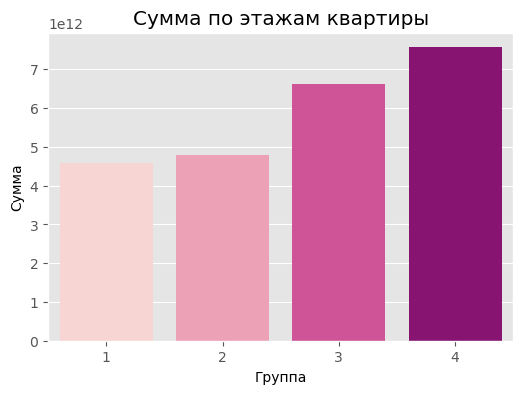

In [44]:
# построим столбчатую диаграмму
sns.barplot(data = lv, x = 'group', y = 'sum', palette ='RdPu').set(title = 'Сумма по этажам квартиры', xlabel = 'Группа', ylabel = 'Сумма')

Средняя сумма больше всего у 4 группы, меньше всего у первой, т.е. они идут прям по порядку. Общие суммы нет, но это по причине разного количества.

Сформулируем нулевую гипотезу:<br>
H0 = стоимость квартир в 3 и 4 группах по этажам одинакова.<br>
Другими словами: этаж не влияет на стоимость квартир.<br>
Тогда альтернативная гипотеза будет звучать так:<br>
H1 = стоимость квартир в 3 и 4 группе отличается.<br>
Другими словами: этаж влияет на стоимость квартир.<br>

<Axes: ylabel='Density'>

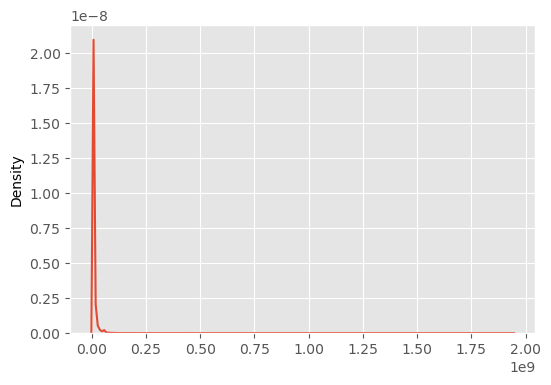

In [45]:
plt.rcParams['figure.figsize'] = (6, 4)
sns.kdeplot(data = l3)

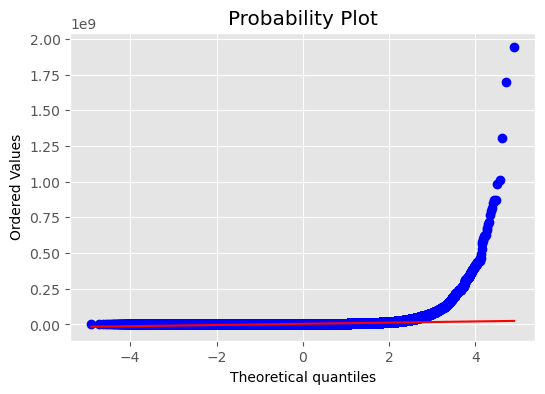

In [46]:
st.probplot(l3, dist='norm', plot=plt)
plt.show()

<Axes: ylabel='Count'>

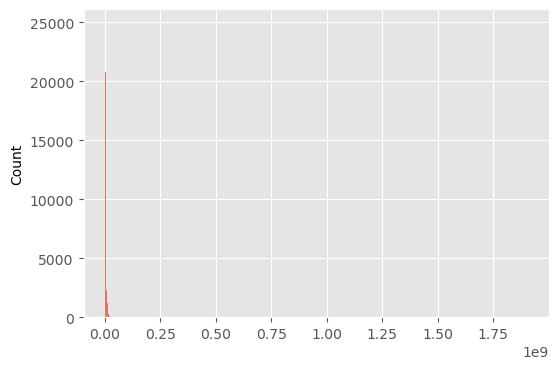

In [47]:
sns.histplot(data = l4)

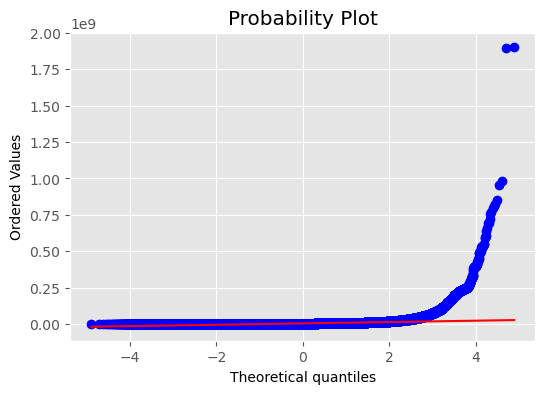

In [48]:
st.probplot(l4, dist='norm', plot=plt)
plt.show()

Т.к. выборки не имеют нормального распределения, проведем тест Манна-Уитни.

In [49]:
alpha = 0.05 # уровень статистической значимости

results = st.mannwhitneyu(l3, l4)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Следует отвергнуть нулевую гипотезу') 
else:
    print('Не удалось отвергнуть нулевую гипотезу') 

p-value: 0.0
Следует отвергнуть нулевую гипотезу


Проверим с помощью bootstrap

In [50]:
l3 = df[(df['level'] >= 5) & (df['level'] < 9)]['price']
l4 = df[df['level'] >= 9]['price']

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [04:35<00:00,  3.62it/s]


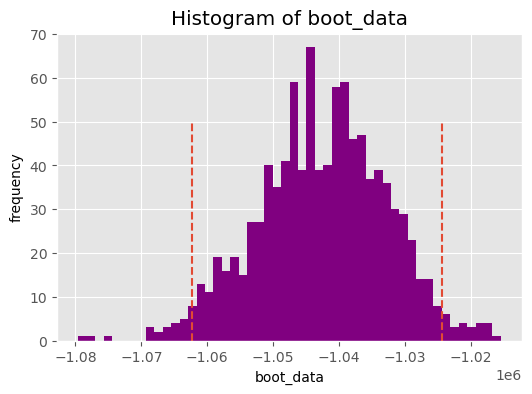

In [51]:
alpha = 0.05
from tqdm import tqdm
booted_data = get_bootstrap(l3, l4)

In [52]:
booted_data["p_value"]

0.0

In [53]:
if booted_data["p_value"]  < alpha:
    print('Следует отвергнуть нулевую гипотезу') 
else:
    print('Не удалось отвергнуть нулевую гипотезу') 

Следует отвергнуть нулевую гипотезу


Проверю t-тестом по ЦПТ

In [54]:
alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(l3, l4)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Следует отвергнуть нулевую гипотезу') 
else:
    print('Не удалось отвергнуть нулевую гипотезу') 

p-value: 0.0
Следует отвергнуть нулевую гипотезу


По итогам всех тестов мы получили отвержение нулевой гипотезы, т.е. есть статистическая разница между стоимостью квартир на разных этажах есть.

Т.е. чем больше этаж, тем дороже квартира, моя гипотеза подтвердилась.

Далее я просто проверила попарно эти же гипотезы между другими группами.

<Axes: ylabel='Density'>

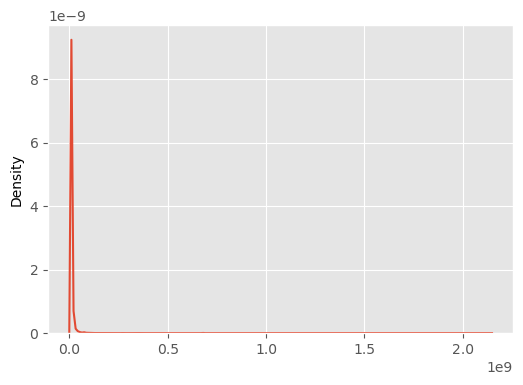

In [55]:
plt.rcParams['figure.figsize'] = (6, 4)
sns.kdeplot(data = l1)

<Axes: ylabel='Density'>

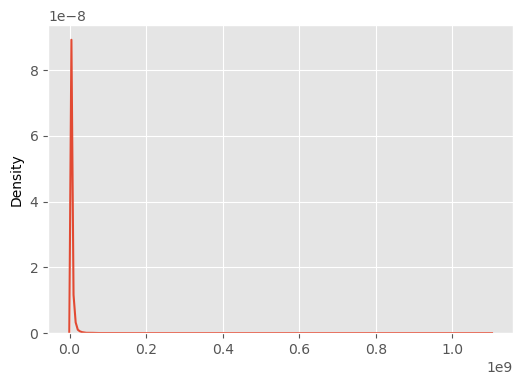

In [56]:
plt.rcParams['figure.figsize'] = (6, 4)
sns.kdeplot(data = l2)

In [57]:
alpha = 0.05 # уровень статистической значимости

results = st.mannwhitneyu(l3, l2)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Следует отвергнуть нулевую гипотезу') 
else:
    print('Не удалось отвергнуть нулевую гипотезу') 

p-value: 0.0
Следует отвергнуть нулевую гипотезу


In [58]:
alpha = 0.05 # уровень статистической значимости

results = st.mannwhitneyu(l1, l2)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Следует отвергнуть нулевую гипотезу') 
else:
    print('Не удалось отвергнуть нулевую гипотезу') 

p-value: 0.0
Следует отвергнуть нулевую гипотезу


In [59]:
l1 = df[(df['level'] >= 1) & (df['level'] < 3)]['price']
l2 = df[(df['level'] >= 3) & (df['level'] < 5)]['price']

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [04:45<00:00,  3.50it/s]


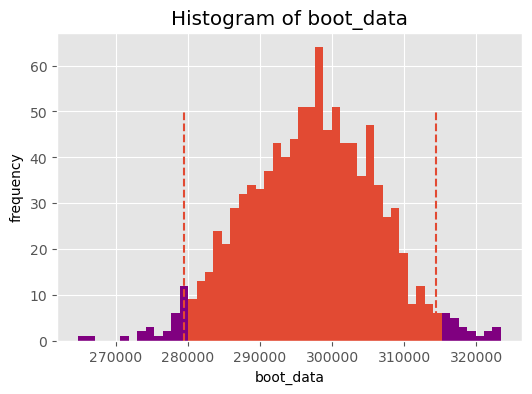

In [60]:
alpha = 0.05
from tqdm import tqdm
booted_data = get_bootstrap(l3, l2)

In [61]:
booted_data["p_value"]

2.1538471072760783e-240

In [62]:
if booted_data["p_value"]  < alpha:
    print('Следует отвергнуть нулевую гипотезу') 
else:
    print('Не удалось отвергнуть нулевую гипотезу') 

Следует отвергнуть нулевую гипотезу


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:58<00:00,  4.19it/s]


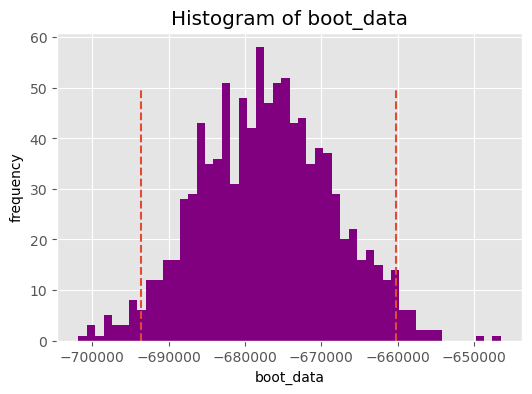

In [63]:
alpha = 0.05
from tqdm import tqdm
booted_data = get_bootstrap(l1, l2)

In [64]:
booted_data["p_value"]

0.0

In [65]:
if booted_data["p_value"]  < alpha:
    print('Следует отвергнуть нулевую гипотезу') 
else:
    print('Не удалось отвергнуть нулевую гипотезу') 

Следует отвергнуть нулевую гипотезу


Также я решила проверить t-тестами, т.к. по ЦПТ на достаточно больших выборках его можно использовать и без требования нормальности распределения данных.

In [66]:
alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(l1, l2)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Следует отвергнуть нулевую гипотезу') 
else:
    print('Не удалось отвергнуть нулевую гипотезу') 

p-value: 0.0
Следует отвергнуть нулевую гипотезу


In [67]:
alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(l3, l2)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Следует отвергнуть нулевую гипотезу') 
else:
    print('Не удалось отвергнуть нулевую гипотезу') 

p-value: 1.608733125270747e-201
Следует отвергнуть нулевую гипотезу


По результатам всех тестов сделаем вывод: чем больше этаж, тем дороже квартира.

## <a class="anchor" id="2"><div class="alert alert-block alert-success">6. Чем больше площадь кухни, тем дороже стоимость квартиры.

Для этого исследования я разделю квартиры по площади кухни на 4 группы с помощью метода describe.

In [68]:
df['kitchen_area'].describe()

count    5.182755e+06
mean     1.092386e+01
std      5.307343e+00
min      5.000000e+00
25%      7.700000e+00
50%      1.000000e+01
75%      1.292000e+01
max      1.491000e+02
Name: kitchen_area, dtype: float64

In [71]:
a1 = df[(df['kitchen_area'] >= 5.000000e+00) & (df['kitchen_area'] < 7.700000e+00)]['price'].tolist()
a1

[3600000,
 3200000,
 2150000,
 4990000,
 5000000,
 2149764,
 6600000,
 4690000,
 2000000,
 3550000,
 3400000,
 4100000,
 3800000,
 2350000,
 3300000,
 2450000,
 2250000,
 3500000,
 4365000,
 2995000,
 3550000,
 4500000,
 11100000,
 4400000,
 2980000,
 1690000,
 13500000,
 3650000,
 4435000,
 4000000,
 4555000,
 4700000,
 5750000,
 4500000,
 4800000,
 4300000,
 4500000,
 6130000,
 4850000,
 3000000,
 3950000,
 4250000,
 2000000,
 2700000,
 2650000,
 2990000,
 6100000,
 5000000,
 5050000,
 3150000,
 3350000,
 4500000,
 4090000,
 4750000,
 6300000,
 5090000,
 5400000,
 3200000,
 2550000,
 3050000,
 2400000,
 3400000,
 3600000,
 4150000,
 6200000,
 3580000,
 4100000,
 5000000,
 4600000,
 3650000,
 4000000,
 4200000,
 2550000,
 3200000,
 3250000,
 3040000,
 3200000,
 3300000,
 3300000,
 4190000,
 2700000,
 4800000,
 3200000,
 3250000,
 4600000,
 2450000,
 2500000,
 4000000,
 3750000,
 2800000,
 3100000,
 4400000,
 4550000,
 7600000,
 3299999,
 2000000,
 2390000,
 8800000,
 2800000,
 3180000

In [72]:
a2 = df[(df['kitchen_area'] >= 7.700000e+00) & (df['kitchen_area'] < 1.000000e+01)]['price'].tolist()
a2

[3900000,
 4500000,
 6680000,
 6390000,
 8280000,
 5800000,
 4800000,
 6380000,
 4900000,
 9300000,
 4900000,
 3680000,
 3750000,
 3784100,
 6400000,
 3300000,
 5200000,
 7200000,
 4750000,
 4950000,
 4400000,
 3600000,
 5050000,
 3995000,
 4260000,
 4378800,
 4767480,
 7600000,
 5800000,
 3500000,
 4480000,
 2349999,
 3250000,
 4300000,
 2630160,
 3150000,
 4600000,
 2750000,
 9800000,
 6700000,
 4100000,
 4200000,
 5700000,
 2584170,
 3970000,
 5500000,
 3950000,
 1932000,
 4999000,
 4800000,
 4190000,
 5824000,
 2600000,
 5550000,
 3800000,
 2500000,
 3590000,
 9000000,
 5990000,
 4500000,
 7700000,
 6300000,
 3350000,
 6590000,
 5300000,
 5200000,
 3600000,
 3650000,
 4650000,
 5100000,
 4450000,
 6000000,
 8350000,
 12500000,
 6500000,
 3003728,
 4500000,
 4500000,
 8200000,
 3800000,
 4400000,
 6250000,
 5000000,
 3800000,
 5800000,
 4300000,
 3694600,
 4935871,
 4150000,
 5400000,
 4400000,
 2900000,
 5300000,
 4100000,
 6470000,
 2300000,
 4400000,
 3524950,
 6900000,
 3900000,

In [73]:
a3 = df[(df['kitchen_area'] >= 1.000000e+01) & (df['kitchen_area'] < 1.292000e+01)]['price'].tolist()
a3

[6050000,
 6500000,
 7100000,
 8500000,
 3735430,
 6581000,
 5319940,
 6890000,
 3900000,
 7000000,
 6050550,
 3903900,
 5000000,
 4570000,
 4690000,
 3055000,
 3070000,
 4900000,
 4400000,
 8587000,
 11600000,
 6100000,
 8278000,
 3808000,
 4550000,
 5395000,
 3595000,
 3700000,
 3899000,
 5700000,
 5100000,
 4985000,
 18400000,
 3370000,
 2086150,
 6500000,
 5550740,
 3259920,
 4376900,
 4231640,
 5179850,
 4909360,
 3894000,
 4700000,
 6250000,
 10650000,
 9050000,
 4975000,
 4500000,
 3900000,
 4700000,
 3995200,
 9350000,
 10200000,
 6463442,
 2297881,
 4100000,
 5971820,
 6012200,
 3915000,
 4000000,
 2000000,
 2800000,
 4900000,
 1850000,
 15000000,
 3750000,
 3600000,
 19999999,
 7195000,
 6000000,
 4400000,
 3800000,
 1185000,
 4650000,
 5750000,
 5200000,
 4549000,
 4100000,
 2906000,
 2840000,
 8200000,
 4300000,
 2999999,
 7200000,
 4500000,
 3650000,
 8220000,
 3390000,
 3460000,
 3580000,
 6300000,
 6095000,
 8600000,
 6080000,
 6150000,
 7750000,
 7400000,
 7400000,
 340

In [74]:
a4 = df[df['kitchen_area'] >= 1.292000e+01]['price'].tolist()
a4

[6300000,
 3830000,
 7101000,
 10272240,
 10470000,
 8771000,
 4500000,
 8300000,
 6242346,
 6749000,
 9900000,
 3900000,
 4700000,
 7400000,
 8750000,
 3600000,
 17922000,
 30580000,
 4674000,
 4826000,
 6780000,
 7170000,
 7514000,
 9500000,
 3800000,
 6715000,
 4830000,
 7030000,
 5400000,
 4800000,
 4600000,
 4900000,
 10770000,
 16503008,
 6391000,
 6190450,
 5365000,
 5681600,
 3363030,
 4701190,
 22374400,
 6857000,
 17000000,
 44100000,
 13272321,
 28105000,
 8290000,
 4350000,
 12100000,
 2700000,
 4900000,
 3150000,
 7830000,
 3885000,
 36900000,
 7445435,
 3965000,
 7095000,
 4000000,
 4355000,
 13000000,
 7470000,
 8700000,
 5200000,
 7506975,
 5390000,
 5665000,
 37000000,
 3944000,
 4882500,
 5100000,
 4165560,
 2424058,
 4700000,
 18200000,
 14200000,
 23000000,
 4839600,
 4905000,
 4508400,
 4905000,
 9500000,
 5840000,
 14800000,
 11500000,
 5300000,
 7500000,
 5218720,
 5676370,
 22000000,
 12300000,
 5240000,
 10500000,
 8100000,
 5676370,
 6888000,
 6882750,
 755000

In [75]:
import statistics
dict = {'group':['1', '2', '3', '4'],
        'sum': [sum(a1), sum(a2), sum(a3), sum(a4)],
        'mean':[statistics.mean(a1), statistics.mean(a2), statistics.mean(a3), statistics.mean(a4)],
       'count':[len(a1), len(a2), len(a3), len(a4)]}
ar = pd.DataFrame(dict)
ar

group            sum          mean    count
0     1  3613908777834  2.791745e+06  1294498
1     2  4121136790915  3.439882e+06  1198046
2     3  6122310736233  4.431210e+06  1381634
3     4  9698223301110  7.411274e+06  1308577

[Text(0.5, 1.0, 'Сумма по площади кухни'),
 Text(0.5, 0, 'Группа'),
 Text(0, 0.5, 'Сумма')]

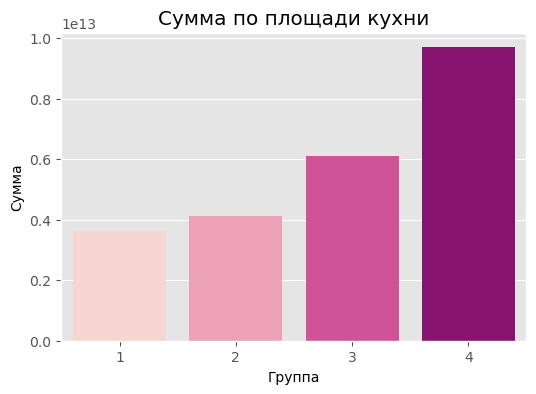

In [76]:
# построим столбчатую диаграмму
sns.barplot(data = ar, x = 'group', y = 'sum', palette ='RdPu').set(title = 'Сумма по площади кухни', xlabel = 'Группа', ylabel = 'Сумма')

Сумма больше всего у 4 группы, меньше всего у первой, т.е. они идут прям по порядку.

Сформулируем нулевую гипотезу:<br>
H0 = стоимость квартир в 3 и 4 группах по площади кухни одинакова.<br>
Другими словами: площадь кухни не влияет на стоимость квартир.<br>
Тогда альтернативная гипотеза будет звучать так:<br>
H1 = стоимость квартир в 3 и 4 группе отличается.<br>
Другими словами: площадь кухни влияет на стоимость квартир.<br>

<Axes: ylabel='Density'>

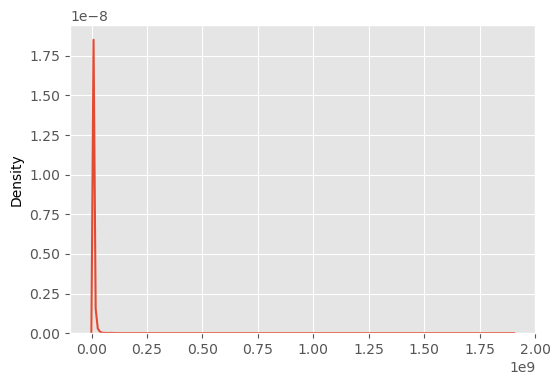

In [77]:
plt.rcParams['figure.figsize'] = (6, 4)
sns.kdeplot(data = a3)

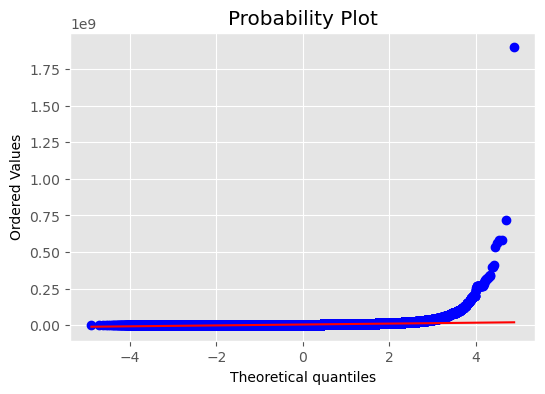

In [78]:
st.probplot(a3, dist='norm', plot=plt)
plt.show()

<Axes: ylabel='Count'>

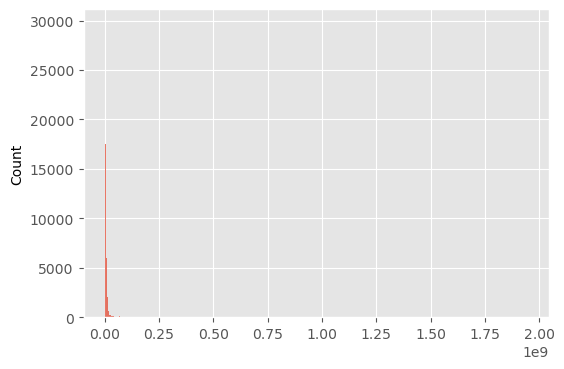

In [79]:
sns.histplot(data = a4)

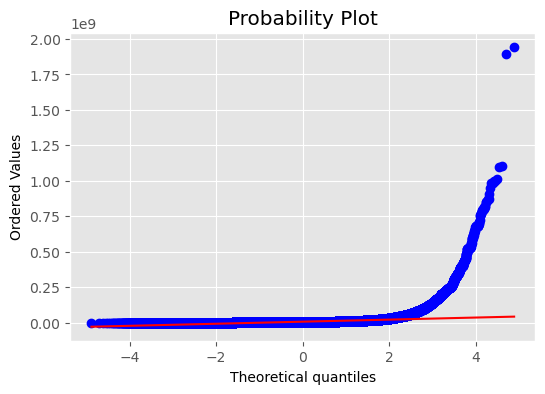

In [80]:
st.probplot(a4, dist='norm', plot=plt)
plt.show()

Т.к. выборки не имеют нормального распределения, проведем тест Манна-Уитни.

In [81]:
alpha = 0.05 # уровень статистической значимости

results = st.mannwhitneyu(a3, a4)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Следует отвергнуть нулевую гипотезу') 
else:
    print('Не удалось отвергнуть нулевую гипотезу') 

p-value: 0.0
Следует отвергнуть нулевую гипотезу


Проверим с помощью bootstrap

In [82]:
a3 = df[(df['kitchen_area'] >= 1.000000e+01) & (df['kitchen_area'] < 1.292000e+01)]['price']
a4 = df[df['kitchen_area'] >= 1.292000e+01]['price']

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [04:48<00:00,  3.46it/s]


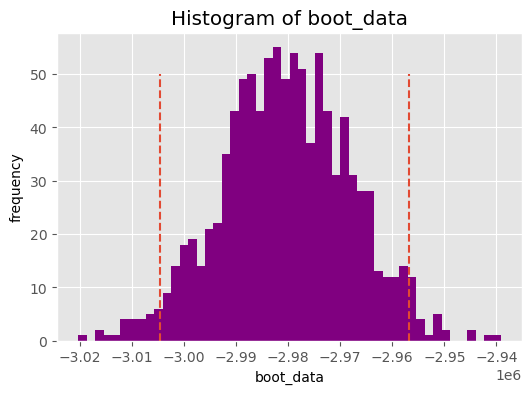

In [83]:
alpha = 0.05
from tqdm import tqdm
booted_data = get_bootstrap(a3, a4)

In [84]:
booted_data["p_value"]

0.0

In [85]:
if booted_data["p_value"]  < alpha:
    print('Следует отвергнуть нулевую гипотезу') 
else:
    print('Не удалось отвергнуть нулевую гипотезу') 

Следует отвергнуть нулевую гипотезу


По итогам обоих тестов мы получили отвержение нулевой гипотезы, т.е. есть статистическая разница между стоимостью квартир с разной площадью кухни есть.

Т.е. чем больше площадь кухни, тем дороже квартира, моя гипотеза подтвердилась.

Далее я просто проверила попарно эти же гипотезы между другими группами.

<Axes: ylabel='Density'>

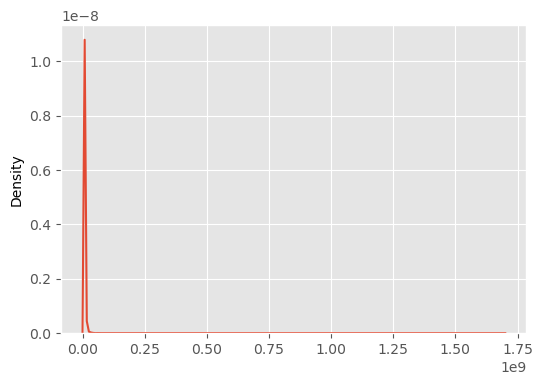

In [86]:
plt.rcParams['figure.figsize'] = (6, 4)
sns.kdeplot(data = a1)

<Axes: ylabel='Density'>

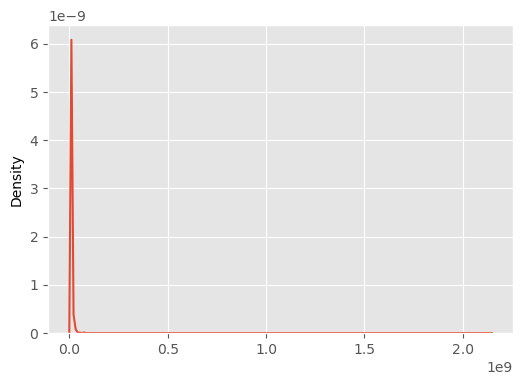

In [87]:
plt.rcParams['figure.figsize'] = (6, 4)
sns.kdeplot(data = a2)

In [88]:
alpha = 0.05 # уровень статистической значимости

results = st.mannwhitneyu(a3, a2)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Следует отвергнуть нулевую гипотезу') 
else:
    print('Не удалось отвергнуть нулевую гипотезу') 

p-value: 0.0
Следует отвергнуть нулевую гипотезу


In [89]:
alpha = 0.05 # уровень статистической значимости

results = st.mannwhitneyu(a1, a2)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Следует отвергнуть нулевую гипотезу') 
else:
    print('Не удалось отвергнуть нулевую гипотезу') 

p-value: 0.0
Следует отвергнуть нулевую гипотезу


In [90]:
a1 = df[(df['kitchen_area'] >= 5.000000e+00) & (df['kitchen_area'] < 7.700000e+00)]['price']
a2 = df[(df['kitchen_area'] >= 7.700000e+00) & (df['kitchen_area'] < 1.000000e+01)]['price']

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [6:45:51<00:00, 24.35s/it]


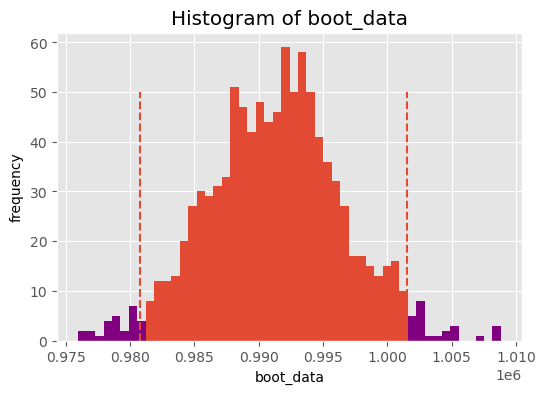

In [91]:
alpha = 0.05
from tqdm import tqdm
booted_data = get_bootstrap(a3, a2)

In [92]:
booted_data["p_value"]

0.0

In [93]:
if booted_data["p_value"]  < alpha:
    print('Следует отвергнуть нулевую гипотезу') 
else:
    print('Не удалось отвергнуть нулевую гипотезу') 

Следует отвергнуть нулевую гипотезу


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [04:43<00:00,  3.53it/s]


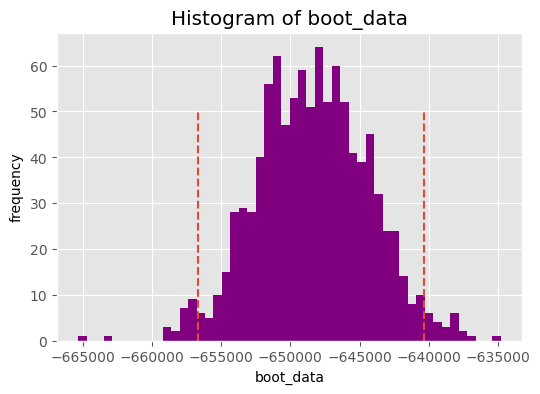

In [94]:
alpha = 0.05
from tqdm import tqdm
booted_data = get_bootstrap(a1, a2)

In [95]:
booted_data["p_value"]

0.0

In [96]:
if booted_data["p_value"]  < alpha:
    print('Следует отвергнуть нулевую гипотезу') 
else:
    print('Не удалось отвергнуть нулевую гипотезу') 

Следует отвергнуть нулевую гипотезу


Также я решила проверить t-тестами, т.к. по ЦПТ на достаточно больших выборках его можно использовать и без требования нормальности распределения данных.

In [97]:
alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(a1, a2)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Следует отвергнуть нулевую гипотезу') 
else:
    print('Не удалось отвергнуть нулевую гипотезу') 

p-value: 0.0
Следует отвергнуть нулевую гипотезу


In [98]:
alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(a3, a2)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Следует отвергнуть нулевую гипотезу') 
else:
    print('Не удалось отвергнуть нулевую гипотезу') 

p-value: 0.0
Следует отвергнуть нулевую гипотезу


In [99]:
alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(a3, a4)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Следует отвергнуть нулевую гипотезу') 
else:
    print('Не удалось отвергнуть нулевую гипотезу') 

p-value: 0.0
Следует отвергнуть нулевую гипотезу


T-тесты дали тот же результат.

Я не проверяла связь стоимости и комнат, т.к. комнаты могут быть абсолютно разными по площади, например, одна комната в однушке может быть как две в двушке, т.е. опять же зависимость от площади, а не от количества комнат.

Регион точно влияет на стоимость, посмотрим значения.

In [109]:
reg = df.groupby('reg_name')['price'].sum() / df.groupby('reg_name')['area'].sum()
reg = reg.reset_index()
reg.columns = ['reg_name', 'm_pr']
reg.sort_values(by = 'm_pr', ascending = False)

reg_name           m_pr
29               Москва  228153.112856
63      Санкт-Петербург  141552.251727
30   Московская область   92673.201655
52      Республика Крым   90998.532683
1      Амурская область   85158.049742
..                  ...            ...
42    Псковская область   39772.651376
53  Республика Марий Эл   38958.898292
78  Челябинская область   38907.342178
24   Курганская область   37711.285288
49  Республика Калмыкия   36431.793428

[83 rows x 2 columns]

Также по средней цене за квадратный метр лидируют Москва, Санкт-Петербург и Московская область. Самые низкие значения у Челябинской области, Курганская область, Республика Калмыкия.

## <a class="anchor" id="40"><div class="alert alert-block alert-info">Выводы:
По результатам анализа факторов, которые влияют на стоимость квартиры, были подтверждены следующие гипотезы:
1. Жильё на первичном рынке стоит дороже, чем на вторичном.
2. Самая высокая цена на жильё в монолитных домах.
3. Чем больше площадь квартиры, тем больше цена на нее.
4. Квартиры в многоэтажных домах стоят дороже, чем в низкоэтажных.
5. Чем выше этаж квартиры, тем она дороже.
6. Чем больше площадь кухни, тем дороже стоимость квартиры.
Также были определены регионы с самой большой ценой за м² (Москва, Московская область, Санкт-Петербург) и с самой низкой ценой за м² (Челябинская область, Курганская область, Республика Калмыкия).

[Вернуться к Навигации](#1)

## <a class="anchor" id="13"><div class="alert alert-block alert-info">Задание №7

## <a class="anchor" id="2"><div class="alert alert-block alert-info">Выдвинете и проверьте собственную гипотезу статистическими методами.


## <a class="anchor" id="14"><div class="alert alert-block alert-success">1. Соотношение площади кухни к общей площади.
Сформулируем нулевую гипотезу:<br>
H0 = стоимость квартир с большим соотношением кухни к общей площади квартиры по отношению с квартирами с меньшим соотношением площади кухни к общей площади квартиры одинакова.<br>
Тогда альтернативная гипотеза будет звучать так:<br>
H1 = стоимость квартир с большим соотношением кухни к общей площади квартиры по отношению с квартирами с меньшим соотношением площади кухни к общей площади квартиры отличается.

In [5]:
df['sootn'] = df['kitchen_area'] / df['area']
df.head(1)

price        date  region  building_type  level  levels  rooms  area  \
0  6050000  2018-02-19    2661              1      8      10      3  82.6   

   kitchen_area  object_type         reg_name          pr_m year_month  month  \
0          10.8            1  Санкт-Петербург  73244.552058    2018-02      2   

  season month_name  year  season_n building_type_m     sootn  
0   Зима    Февраль  2018         1       Панельный  0.130751

Для этого исследования я разделю квартиры по соотношению площадей на 4 группы с помощью метода describe.

In [111]:
df['sootn'].describe()

count    5.182755e+06
mean     2.104596e-01
std      8.344408e-02
min      9.548611e-03
25%      1.488982e-01
50%      1.935484e-01
75%      2.575000e-01
max      1.000000e+00
Name: sootn, dtype: float64

In [116]:
a1 = df[(df['sootn'] >= 9.548611e-03) & (df['sootn'] < 1.488982e-01)]['price'].tolist()
a1

[6050000,
 6500000,
 6300000,
 4500000,
 6680000,
 6390000,
 4990000,
 5000000,
 9300000,
 6581000,
 6600000,
 4690000,
 7000000,
 2000000,
 6400000,
 3550000,
 7200000,
 11600000,
 4365000,
 3550000,
 11100000,
 18400000,
 7600000,
 22374400,
 17000000,
 44100000,
 1690000,
 13500000,
 28105000,
 9050000,
 4435000,
 4480000,
 4000000,
 12100000,
 4700000,
 4700000,
 5750000,
 4500000,
 4500000,
 36900000,
 6130000,
 4850000,
 9800000,
 15000000,
 6700000,
 19999999,
 3950000,
 5700000,
 4250000,
 6000000,
 5000000,
 5500000,
 5050000,
 4800000,
 4500000,
 4090000,
 8220000,
 4750000,
 6300000,
 5090000,
 9000000,
 5990000,
 14800000,
 7700000,
 22000000,
 6590000,
 7400000,
 5200000,
 3600000,
 4150000,
 6200000,
 3580000,
 4650000,
 5000000,
 5100000,
 3650000,
 4000000,
 6000000,
 4200000,
 11999000,
 8350000,
 12500000,
 8500000,
 8000000,
 9290000,
 4190000,
 8200000,
 2700000,
 4800000,
 8000000,
 4410000,
 6470000,
 2300000,
 2800000,
 6900000,
 8200000,
 13800000,
 4550000,
 76

In [117]:
a2 = df[(df['sootn'] >= 1.488982e-01) & (df['sootn'] < 1.935484e-01)]['price'].tolist()
a2

[3600000,
 7100000,
 8500000,
 3900000,
 2150000,
 8280000,
 6380000,
 4900000,
 2149764,
 10470000,
 8300000,
 4900000,
 6890000,
 6050550,
 17922000,
 30580000,
 3800000,
 2350000,
 6780000,
 4900000,
 7170000,
 4750000,
 3600000,
 3500000,
 8278000,
 2995000,
 6715000,
 4500000,
 5700000,
 5100000,
 10770000,
 4985000,
 16503008,
 6500000,
 6391000,
 6190450,
 4400000,
 6857000,
 4700000,
 2980000,
 10650000,
 3650000,
 4555000,
 9350000,
 10200000,
 4300000,
 6463442,
 4800000,
 4300000,
 5971820,
 6012200,
 3915000,
 4000000,
 7445435,
 7095000,
 4900000,
 3000000,
 13000000,
 2990000,
 5200000,
 7506975,
 6100000,
 5100000,
 2906000,
 8200000,
 3150000,
 4190000,
 4500000,
 5550000,
 5400000,
 6095000,
 8600000,
 11500000,
 7750000,
 6300000,
 7400000,
 10500000,
 5300000,
 7400000,
 3400000,
 7660000,
 6999000,
 6700000,
 4100000,
 4600000,
 8090000,
 2550000,
 5600000,
 3250000,
 6999000,
 6500000,
 3200000,
 3300000,
 6192000,
 8000000,
 6292360,
 7716350,
 6250000,
 3800000,


In [118]:
a3 = df[(df['sootn'] >= 1.935484e-01) & (df['sootn'] < 2.575000e-01)]['price'].tolist()
a3

[3200000,
 7101000,
 5800000,
 10272240,
 8771000,
 5319940,
 3680000,
 3750000,
 6749000,
 9900000,
 3784100,
 4700000,
 3300000,
 8750000,
 5000000,
 4570000,
 3400000,
 4100000,
 5200000,
 4826000,
 3300000,
 2450000,
 4950000,
 4400000,
 2250000,
 8587000,
 7514000,
 6100000,
 5395000,
 4800000,
 4600000,
 5050000,
 4260000,
 4378800,
 5550740,
 5681600,
 4376900,
 4231640,
 5179850,
 4767480,
 4909360,
 13272321,
 5800000,
 4350000,
 4500000,
 3995200,
 4900000,
 2630160,
 3885000,
 3965000,
 4600000,
 4355000,
 2750000,
 3600000,
 4100000,
 2000000,
 7195000,
 2700000,
 2650000,
 8700000,
 4400000,
 2584170,
 3970000,
 4650000,
 3944000,
 4882500,
 5750000,
 3950000,
 4100000,
 4999000,
 4700000,
 3350000,
 4300000,
 5824000,
 7200000,
 2600000,
 3800000,
 2500000,
 3590000,
 6300000,
 6080000,
 4500000,
 3200000,
 2550000,
 3350000,
 5676370,
 12300000,
 3050000,
 5240000,
 2400000,
 8100000,
 5900000,
 3600000,
 5676370,
 6888000,
 6882750,
 7550000,
 6781100,
 4550000,
 365000

In [119]:
a4 = df[df['sootn'] >= 2.575000e-01]['price'].tolist()
a4

[3830000,
 4800000,
 3735430,
 4500000,
 6242346,
 3900000,
 3903900,
 3900000,
 7400000,
 3600000,
 4690000,
 3055000,
 3070000,
 4674000,
 4400000,
 3808000,
 9500000,
 3800000,
 4550000,
 3595000,
 3700000,
 4830000,
 7030000,
 5400000,
 3899000,
 4900000,
 3995000,
 3370000,
 2086150,
 5365000,
 3259920,
 3363030,
 4701190,
 3894000,
 6250000,
 3500000,
 8290000,
 2349999,
 4975000,
 3900000,
 2700000,
 3250000,
 3150000,
 2297881,
 4100000,
 7830000,
 3150000,
 2000000,
 4000000,
 2800000,
 1850000,
 3750000,
 7470000,
 4200000,
 3800000,
 1185000,
 5390000,
 5665000,
 37000000,
 4165560,
 5200000,
 4549000,
 2424058,
 1932000,
 2840000,
 2999999,
 18200000,
 14200000,
 23000000,
 3650000,
 4839600,
 4905000,
 4508400,
 4905000,
 3390000,
 9500000,
 5840000,
 3460000,
 3580000,
 6150000,
 5300000,
 7500000,
 5218720,
 3400000,
 4550000,
 4500000,
 3250000,
 5600000,
 4400000,
 6450000,
 7250099,
 3840000,
 9660000,
 10300000,
 8160000,
 5000000,
 3530000,
 4600000,
 7400000,
 3779

In [122]:
import statistics
dict = {'group':['1', '2', '3', '4'],
        'sum': [sum(a1), sum(a2), sum(a3), sum(a4)],
        'mean':[statistics.mean(a1), statistics.mean(a2), statistics.mean(a3), statistics.mean(a4)],
       'count':[len(a1), len(a2), len(a3), len(a4)]}
ar = pd.DataFrame(dict)
ar

group            sum          mean    count
0     1  6946308983065  5.232242e+06  1327597
1     2  5836497176899  4.536641e+06  1286524
2     3  5291999309552  4.158036e+06  1272716
3     4  5480774136576  4.229260e+06  1295918

[Text(0.5, 1.0, 'Сумма по соотношению площадей кухни к общей'),
 Text(0.5, 0, 'Группа'),
 Text(0, 0.5, 'Сумма')]

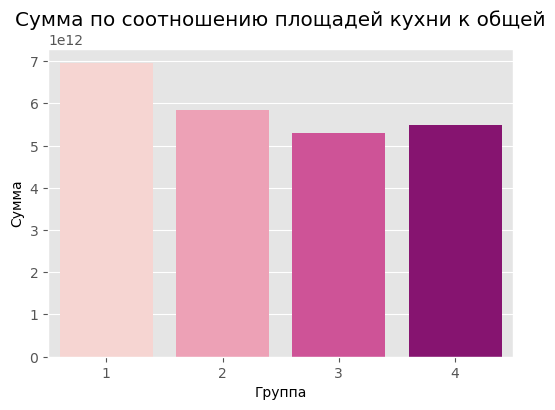

In [123]:
# построим столбчатую диаграмму
sns.barplot(data = ar, x = 'group', y = 'sum', palette ='RdPu').set(title = 'Сумма по соотношению площадей кухни к общей', xlabel = 'Группа', ylabel = 'Сумма')

Сумма больше всего у 1 группы, меньше всего у четвертой, при этом у 3 группы меньше, чем у 4.

Сформулируем нулевую гипотезу:<br>
H0 = стоимость квартир в 1 и 2 группах по соотношению площадей 1 одинакова.<br>
Тогда альтернативная гипотеза будет звучать так:<br>
H1 = стоимость квартир в 1 и 2 группе по соотношению площадей отличается.<br>

<Axes: ylabel='Density'>

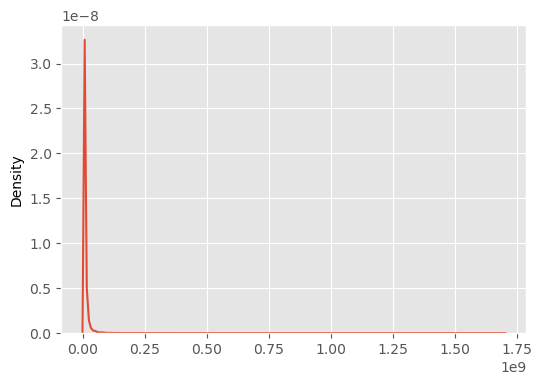

In [124]:
plt.rcParams['figure.figsize'] = (6, 4)
sns.kdeplot(data = a1)

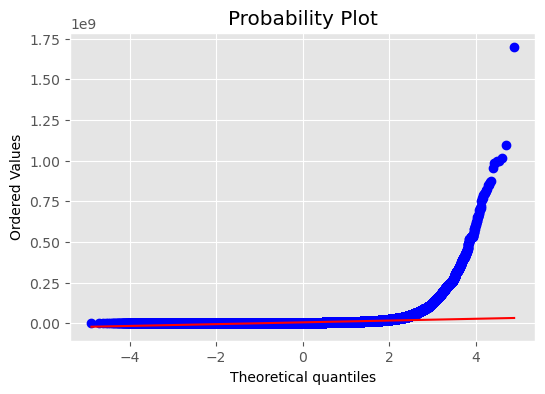

In [125]:
st.probplot(a1, dist='norm', plot=plt)
plt.show()

<Axes: ylabel='Count'>

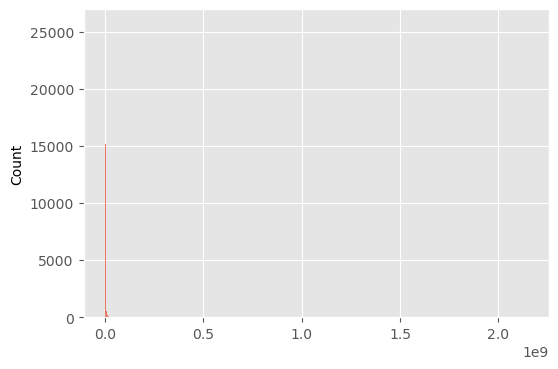

In [126]:
sns.histplot(data = a2)

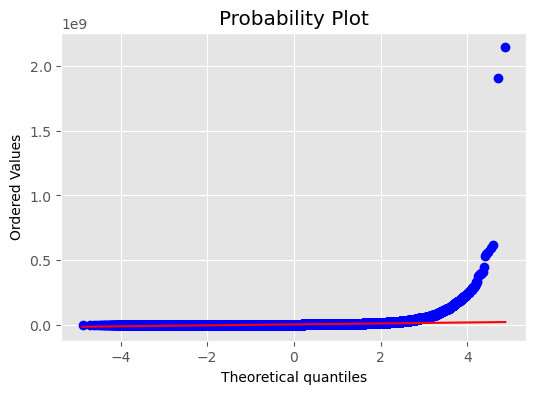

In [127]:
st.probplot(a2, dist='norm', plot=plt)
plt.show()

Т.к. выборки не имеют нормального распределения, проведем тест Манна-Уитни.

In [128]:
alpha = 0.05 # уровень статистической значимости

results = st.mannwhitneyu(a1, a2)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Следует отвергнуть нулевую гипотезу') 
else:
    print('Не удалось отвергнуть нулевую гипотезу') 

p-value: 2.260978870015484e-92
Следует отвергнуть нулевую гипотезу


Проверим с помощью bootstrap

In [129]:
a1 = df[(df['sootn'] >= 9.548611e-03) & (df['sootn'] < 1.488982e-01)]['price']
a2 = df[(df['sootn'] >= 1.488982e-01) & (df['sootn'] < 1.935484e-01)]['price']

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [04:55<00:00,  3.38it/s]


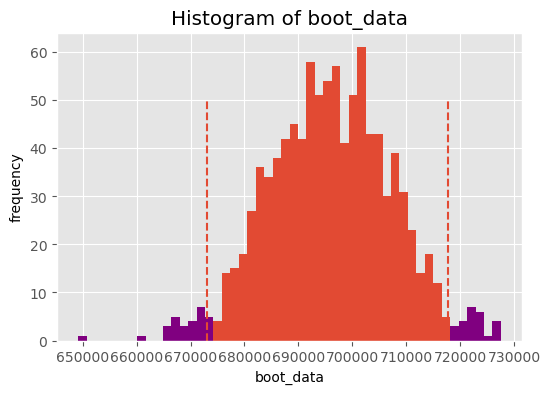

In [130]:
alpha = 0.05
from tqdm import tqdm
booted_data = get_bootstrap(a1, a2)

In [131]:
booted_data["p_value"]

0.0

In [132]:
if booted_data["p_value"]  < alpha:
    print('Следует отвергнуть нулевую гипотезу') 
else:
    print('Не удалось отвергнуть нулевую гипотезу') 

Следует отвергнуть нулевую гипотезу


По итогам обоих тестов мы получили отвержение нулевой гипотезы, т.е. есть статистическая разница между стоимостью квартир с разным соотношением площадей есть.

Далее я просто проверила попарно эти же гипотезы между другими группами.

<Axes: ylabel='Density'>

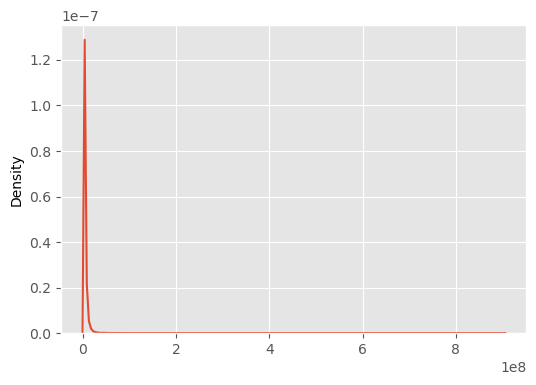

In [133]:
plt.rcParams['figure.figsize'] = (6, 4)
sns.kdeplot(data = a3)

<Axes: ylabel='Density'>

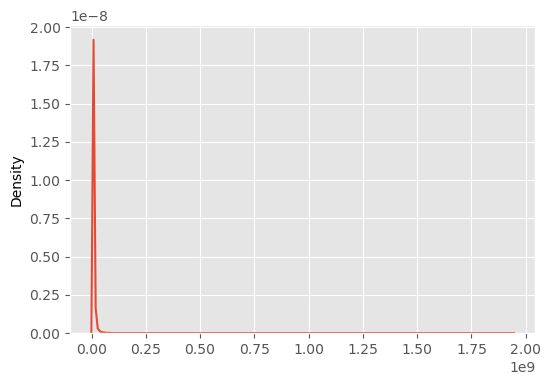

In [134]:
plt.rcParams['figure.figsize'] = (6, 4)
sns.kdeplot(data = a4)

In [135]:
alpha = 0.05 # уровень статистической значимости

results = st.mannwhitneyu(a3, a4)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Следует отвергнуть нулевую гипотезу') 
else:
    print('Не удалось отвергнуть нулевую гипотезу') 

p-value: 1.1567114910361964e-62
Следует отвергнуть нулевую гипотезу


In [136]:
alpha = 0.05 # уровень статистической значимости

results = st.mannwhitneyu(a3, a2)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Следует отвергнуть нулевую гипотезу') 
else:
    print('Не удалось отвергнуть нулевую гипотезу') 

p-value: 0.0
Следует отвергнуть нулевую гипотезу


In [137]:
a3 = df[(df['sootn'] >= 1.935484e-01) & (df['sootn'] < 2.575000e-01)]['price']
a4 = df[df['sootn'] >= 2.575000e-01]['price']

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [04:41<00:00,  3.56it/s]


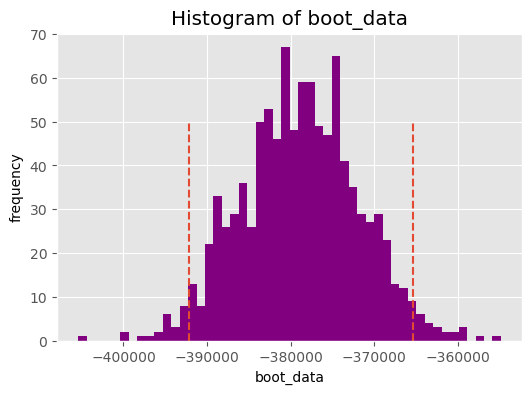

In [138]:
alpha = 0.05
from tqdm import tqdm
booted_data = get_bootstrap(a3, a2)

In [139]:
booted_data["p_value"]

0.0

In [140]:
if booted_data["p_value"]  < alpha:
    print('Следует отвергнуть нулевую гипотезу') 
else:
    print('Не удалось отвергнуть нулевую гипотезу') 

Следует отвергнуть нулевую гипотезу


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [04:37<00:00,  3.60it/s]


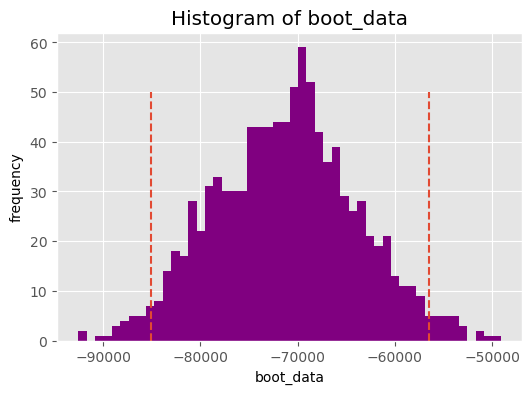

In [141]:
alpha = 0.05
from tqdm import tqdm
booted_data = get_bootstrap(a3, a4)

In [142]:
booted_data["p_value"]

1.474241611724387e-22

In [143]:
if booted_data["p_value"]  < alpha:
    print('Следует отвергнуть нулевую гипотезу') 
else:
    print('Не удалось отвергнуть нулевую гипотезу') 

Следует отвергнуть нулевую гипотезу


Также я решила проверить t-тестами, т.к. по ЦПТ на достаточно больших выборках его можно использовать и без требования нормальности распределения данных.

In [144]:
alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(a1, a2)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Следует отвергнуть нулевую гипотезу') 
else:
    print('Не удалось отвергнуть нулевую гипотезу') 

p-value: 0.0
Следует отвергнуть нулевую гипотезу


In [145]:
alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(a3, a2)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Следует отвергнуть нулевую гипотезу') 
else:
    print('Не удалось отвергнуть нулевую гипотезу') 

p-value: 0.0
Следует отвергнуть нулевую гипотезу


In [146]:
alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(a3, a4)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Следует отвергнуть нулевую гипотезу') 
else:
    print('Не удалось отвергнуть нулевую гипотезу') 

p-value: 1.6566426798877767e-24
Следует отвергнуть нулевую гипотезу


T-тесты дали тот же результат.

По результатам тестов выяснилось, что статистическая разница между группами есть. По итогам среднего чем меньше соотношение площади кухни и общей площади, тем дороже квартира и наоборот.

## <a class="anchor" id="15"><div class="alert alert-block alert-success">2. Стоимость квартир в Москве больше, чем в Санкт-Петербурге.
Сформулируем нулевую гипотезу:<br>
H0 = стоимости квартир в Москве и Санкт-Петербурге одинаковы.<br>
 Тогда альтернативная гипотеза будет звучать так:<br>
H1 = стоимости квартир в Москве и Санкт-Петербурге отличаются.

In [155]:
moc = df[df['reg_name'] == 'Москва']['price'].tolist()
spb = df[df['reg_name'] == 'Санкт-Петербург']['price'].tolist()

In [156]:
import statistics
dict = {'group':['Москва', 'Санкт-Петербург'],
        'sum': [sum(moc), sum(spb)],
        'mean':[statistics.mean(moc), statistics.mean(spb)],
       'count':[len(moc), len(spb)]}
сt = pd.DataFrame(dict)
сt

group            sum          mean   count
0           Москва  5647097919507  1.382842e+07  408369
1  Санкт-Петербург  3760651135220  8.374589e+06  449055

In [158]:
ct = pd.DataFrame(dict)

[Text(0.5, 1.0, 'Сумма по городам'),
 Text(0.5, 0, 'Город'),
 Text(0, 0.5, 'Сумма')]

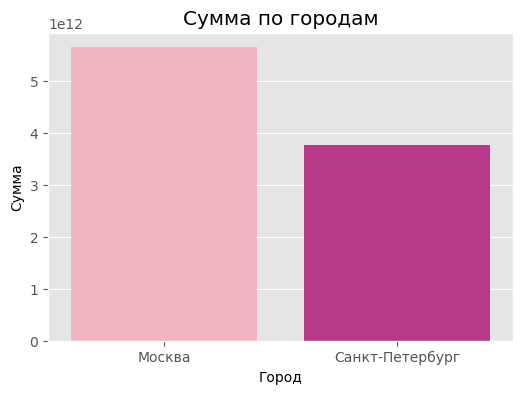

In [159]:
# построим столбчатую диаграмму
sns.barplot(data = ct, x = 'group', y = 'sum', palette ='RdPu').set(title = 'Сумма по городам', xlabel = 'Город', ylabel = 'Сумма')

<Axes: ylabel='Count'>

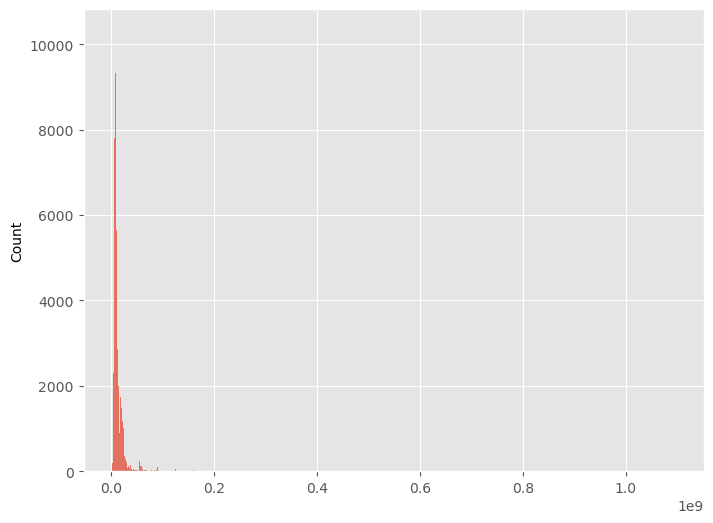

In [160]:
plt.rcParams['figure.figsize'] = (8, 6)
sns.histplot(data = moc)

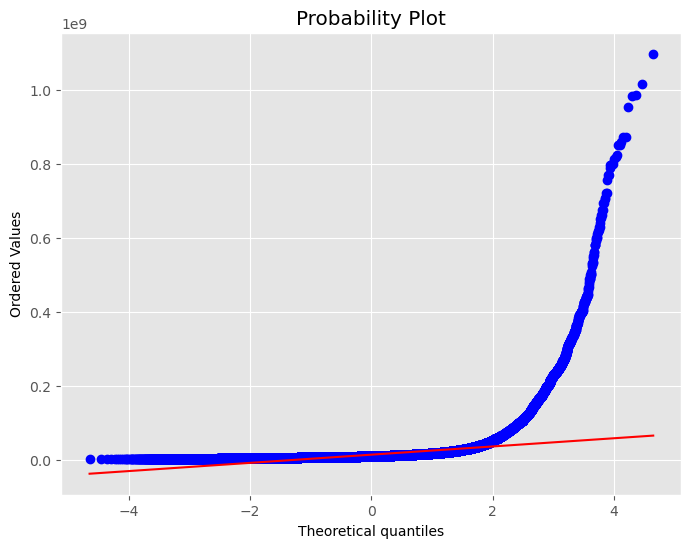

In [161]:
st.probplot(moc, dist='norm', plot=plt)
plt.show()

<Axes: ylabel='Count'>

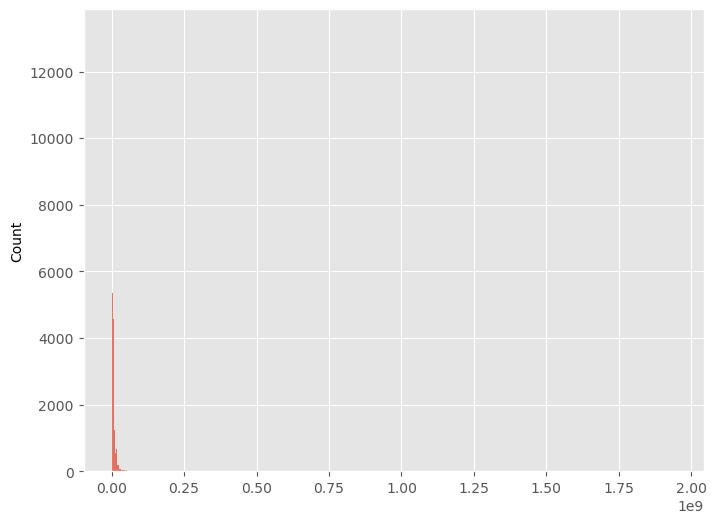

In [162]:
sns.histplot(data = spb)

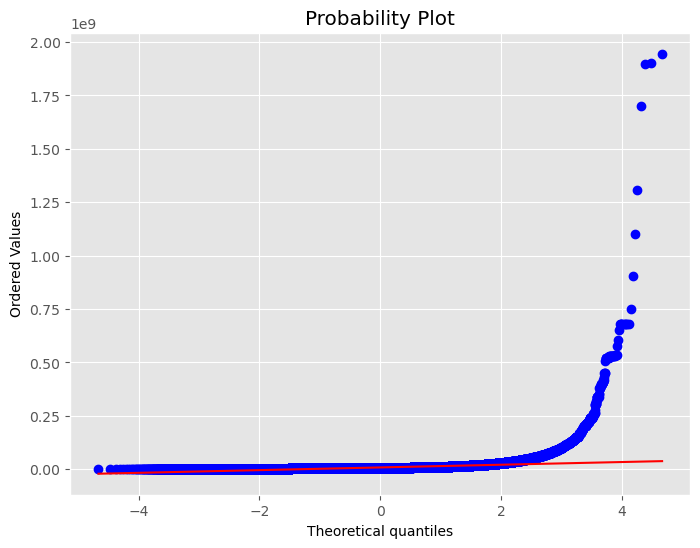

In [163]:
st.probplot(spb, dist='norm', plot=plt)
plt.show()

Т.к. выборки не имеют нормального распределения, проведем тест Манна-Уитни.

In [164]:
alpha = 0.05 # уровень статистической значимости

results = st.mannwhitneyu(moc, spb)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Следует отвергнуть нулевую гипотезу') 
else:
    print('Не удалось отвергнуть нулевую гипотезу') 

p-value: 0.0
Следует отвергнуть нулевую гипотезу


Проверим с помощью bootstrap

In [165]:
moc = df[df['reg_name'] == 'Москва']['price']
spb = df[df['reg_name'] == 'Санкт-Петербург']['price']

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:21<00:00, 12.34it/s]


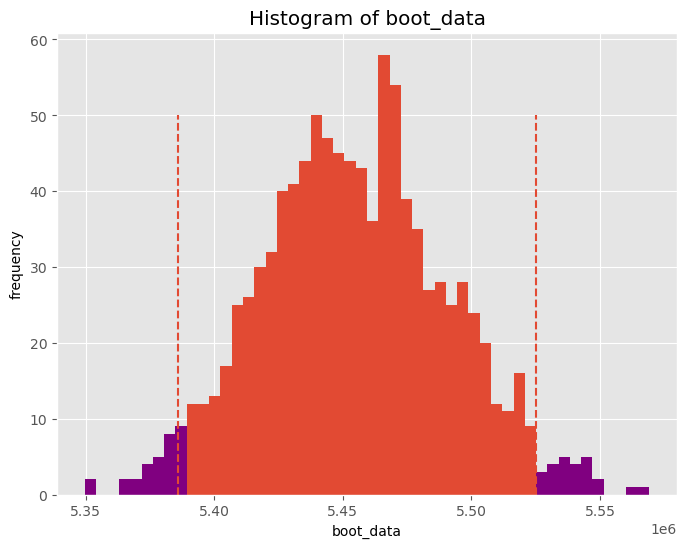

In [166]:
alpha = 0.05
from tqdm import tqdm
booted_data = get_bootstrap(moc, spb)

In [167]:
booted_data["p_value"]

0.0

In [168]:
if booted_data["p_value"]  < alpha:
    print('Следует отвергнуть нулевую гипотезу') 
else:
    print('Не удалось отвергнуть нулевую гипотезу') 

Следует отвергнуть нулевую гипотезу


Также я решила проверить t-тестом, т.к. по ЦПТ на достаточно больших выборках его можно использовать и без требования нормальности распределения данных.

In [169]:
alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(moc, spb)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Следует отвергнуть нулевую гипотезу') 
else:
    print('Не удалось отвергнуть нулевую гипотезу') 

p-value: 0.0
Следует отвергнуть нулевую гипотезу


По итогам всех тестов мы получили отвержение нулевой гипотезы, т.е. есть статистическая разница между стоимостью квартир в Москве и Санкт-Петербурге есть.

In [170]:
moc.mean() - spb.mean()

5453830.52790149

Т.е. жилье дороже в Москве, первая моя гипотеза подтвердилась.

## <a class="anchor" id="40"><div class="alert alert-block alert-info">Выводы:
Были выявлены следующие закономерности:
1. Чем меньше соотношение площади кухни к общей площади, тем квартира дороже.
2. Стоимость квартир в Москве больше, чем в Санкт-Петербурге.

[Вернуться к Навигации](#1)

## <a class="anchor" id="16"><div class="alert alert-block alert-info">Задание №8

## <a class="anchor" id="16"><div class="alert alert-block alert-info">Создайте модель прогноза цены объекта недвижимости.

Построим распределение цены еще раз.

Диапазон цен: 350000 - 2147483647
Средняя цена: 4544991
Медианная цена: 3080000
Среднеквадратическое отклонение: 7721650


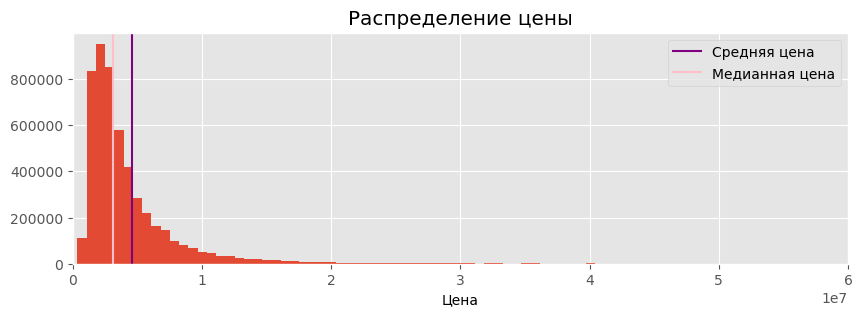

In [183]:
plt.rcParams['figure.figsize'] = (10, 3)
mean_price = int(df['price'].mean())
median_price = int(df['price'].median())

std = int(df['price'].std())

min_price = int(df['price'].min())
max_price = int(df['price'].max())

print(f'Диапазон цен: {min_price} - {max_price}')
print(f'Средняя цена: {mean_price}\nМедианная цена: {median_price}')
print(f'Среднеквадратическое отклонение: {std}')

plt.hist(df['price'], bins=3000)
plt.axvline(mean_price, label='Средняя цена', color='purple')
plt.axvline(median_price, label='Медианная цена', color='pink')
plt.xlim(0, 60000000)
plt.legend()
plt.xlabel('Цена')
plt.title('Распределение цены')
plt.show()


In [8]:
df.head(1)

price        date  region  building_type  level  levels  rooms  area  \
0  6050000  2018-02-19    2661              1      8      10      3  82.6   

   kitchen_area  object_type         reg_name          pr_m year_month  month  \
0          10.8            1  Санкт-Петербург  73244.552058    2018-02      2   

  season month_name  year  season_n building_type_m     sootn  
0   Зима    Февраль  2018         1       Панельный  0.130751

In [9]:
df.corr()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14084\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


price    region  building_type     level    levels  \
price          1.000000 -0.212548       0.019648  0.115310  0.149914   
region        -0.212548  1.000000      -0.164583 -0.127650 -0.175538   
building_type  0.019648 -0.164583       1.000000 -0.107511 -0.200538   
level          0.115310 -0.127650      -0.107511  1.000000  0.654364   
levels         0.149914 -0.175538      -0.200538  0.654364  1.000000   
rooms          0.245955 -0.082293       0.050523 -0.051148 -0.097948   
area           0.493857 -0.010722       0.023702  0.071920  0.080494   
kitchen_area   0.319765 -0.090272       0.021044  0.200526  0.286859   
object_type    0.024673  0.100169      -0.159863  0.236793  0.380458   
pr_m           0.727121 -0.330193       0.013309  0.168320  0.240653   
month         -0.004854 -0.037495       0.014608  0.001077  0.000795   
year           0.090269 -0.101855       0.040937  0.047779  0.064321   
season_n      -0.004748 -0.003682       0.007620 -0.012227 -0.017782   
sootn         -0.038714 -0.115992       0.010324  0.183194  0.282245   

                  rooms      area  kitchen_area  object_type      pr_m  \
price          0.245955  0.493857      0.319765     0.024673  0.727121   
region        -0.082293 -0.010722     -0.090272     0.100169 -0.330193   
building_type  0.050523  0.023702      0.021044    -0.159863  0.013309   
level         -0.051148  0.071920      0.200526     0.236793  0.168320   
levels        -0.097948  0.080494      0.286859     0.380458  0.240653   
rooms          1.000000  0.685221      0.226911    -0.134354  0.035892   
area           0.685221  1.000000      0.527118     0.016389  0.128732   
kitchen_area   0.226911  0.527118      1.000000     0.205130  0.177420   
object_type   -0.134354  0.016389      0.205130     1.000000  0.044558   
pr_m           0.035892  0.128732      0.177420     0.044558  1.000000   
month          0.008634 -0.009349      0.000790    -0.005239 -0.008490   
year           0.016237  0.013616      0.048904    -0.020281  0.148918   
season_n      -0.007390 -0.008984     -0.011595    -0.015865 -0.010169   
sootn         -0.413744 -0.299382      0.570459     0.235355  0.107660   

                  month      year  season_n     sootn  
price         -0.004854  0.090269 -0.004748 -0.038714  
region        -0.037495 -0.101855 -0.003682 -0.115992  
building_type  0.014608  0.040937  0.007620  0.010324  
level          0.001077  0.047779 -0.012227  0.183194  
levels         0.000795  0.064321 -0.017782  0.282245  
rooms          0.008634  0.016237 -0.007390 -0.413744  
area          -0.009349  0.013616 -0.008984 -0.299382  
kitchen_area   0.000790  0.048904 -0.011595  0.570459  
object_type   -0.005239 -0.020281 -0.015865  0.235355  
pr_m          -0.008490  0.148918 -0.010169  0.107660  
month          1.000000 -0.465071  0.557539  0.008970  
year          -0.465071  1.000000 -0.247459  0.051425  
season_n       0.557539 -0.247459  1.000000 -0.007372  
sootn          0.008970  0.051425 -0.007372  1.000000

Для построения модели множественной линейной регрессии я использовала не все признаки, т.к. были те, которые получены путем деления одних на другие, например. Не стала исключать по корреляцииЮ есть Lasso-регрессия, например.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.metrics import  mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

In [36]:
# разделим на признаки
y = df['price']
x = df[['building_type', 'level', 'levels', 'rooms', 'area', 'kitchen_area', 'object_type', 'month', 'year', 'season_n']]

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [38]:
scaler = StandardScaler()
x_train_st = scaler.fit_transform(x_train)
x_train_st

array([[ 1.02016346, -0.66057928, -1.16199353, ..., -0.742588  ,
         0.71330201, -0.45696008],
       [-0.91651382, -0.25717853,  0.89039169, ..., -0.17792675,
        -0.43335102,  0.41114736],
       [-0.91651382,  0.14622222, -0.68836617, ..., -1.30724925,
        -0.43335102, -1.32506752],
       ...,
       [ 1.02016346, -0.4588789 , -1.16199353, ..., -0.742588  ,
        -0.43335102, -0.45696008],
       [ 0.05182482,  2.5666267 ,  2.15339798, ..., -1.58957988,
        -0.43335102, -1.32506752],
       [-0.91651382, -1.06398002, -0.3726146 , ..., -0.742588  ,
         1.85995503, -0.45696008]])

In [39]:
# создадим модель линейной регрессии
model = LinearRegression()

# обучим нашу модель
model.fit(x_train_st, y_train)

print(model.coef_, model.intercept_)

[  158542.46201646    82919.15968548   671284.29332228 -1225374.04710496
  4507263.76321915   187352.82261411  -319774.5744399    369798.94851277
   756106.33681905   -15456.37341658] 4545145.582388059


In [40]:
x_test_st = scaler.transform(x_test)

In [41]:
y_pred = model.predict(x_test_st)

In [42]:
r2_score(y_test, y_pred)

0.273240301786268

Попробуем применить регуляризацию.

In [25]:
model = Lasso()
model.fit(x_train_st, y_train)
print(model.coef_, model.intercept_)

[  158080.73654904    83744.73574677   670552.25681106 -1208264.58544761
  4478215.77981743   205445.91107895  -322813.17059382   370978.19976582
   752728.12006905   -14830.30350462] 4544110.233867434


In [26]:
x_test_st = scaler.transform(x_test)

In [27]:
y_pred = model.predict(x_test_st)

In [28]:
r2_score(y_test, y_pred)

0.26604919706195973

In [83]:
# разделим на признаки
y = df['price']
x = df[['building_type', 'level', 'area', 'kitchen_area', 'object_type', 'month', 'year']]

In [84]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [85]:
scaler = StandardScaler()
x_train_st = scaler.fit_transform(x_train)
x_train_st

array([[-0.91604089,  0.14608131, -0.07751781, ..., -0.64337647,
         0.10441981,  0.71296904],
       [ 1.02056074, -0.45896719,  0.4243598 , ..., -0.64337647,
         0.95127912, -1.58078031],
       [-1.88434171, -0.66065002, -0.52132694, ..., -0.64337647,
         1.515852  ,  0.71296904],
       ...,
       [ 1.02056074, -0.66065002, -1.02735229, ..., -0.64337647,
         0.95127912, -0.43390563],
       [-0.91604089, -1.06401568, -0.62916841, ...,  1.55429992,
         0.95127912, -1.58078031],
       [ 1.02056074,  0.7511298 ,  1.17095459, ..., -0.64337647,
         0.10441981, -0.43390563]])

In [86]:
model = Ridge()
model.fit(x_train_st, y_train)
print(model.coef_, model.intercept_)

[  67566.76725665  529241.98628424 3509207.41929378  486989.80491269
  -64563.34544892  345520.48424976  755708.22808406] 4543451.048066609


In [87]:
x_test_st = scaler.transform(x_test)

In [88]:
y_pred = model.predict(x_test_st)

In [89]:
r2_score(y_test, y_pred)

0.24819933273715278

Попробуем вернуть первую модель, исключив мультиколлинеарность.

In [44]:
# разделим на признаки
y = df['price']
x = df[['building_type', 'level', 'area', 'kitchen_area', 'object_type', 'month', 'year']]

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [52]:
scaler = StandardScaler()
x_train_st = scaler.fit_transform(x_train)
x_train_st

array([[ 1.9879117 , -0.25703538,  0.38280791, ..., -0.64307338,
         0.95178339, -1.58087502],
       [ 1.01978518, -0.66040868, -0.77837236, ..., -0.64307338,
         0.66945968,  0.71278147],
       [ 1.01978518,  0.34802457,  0.42427863, ..., -0.64307338,
         0.95178339, -0.43404677],
       ...,
       [ 1.01978518, -0.66040868,  1.95869542, ..., -0.64307338,
        -0.74215889,  0.71278147],
       [-0.91646786, -0.25703538, -0.27989426, ...,  1.55503249,
        -1.30680631, -0.43404677],
       [-0.91646786, -0.66040868,  0.52380837, ..., -0.64307338,
         0.95178339, -0.43404677]])

In [53]:
# создадим модель линейной регрессии
model = LinearRegression()

# обучим нашу модель
model.fit(x_train_st, y_train)

print(model.coef_, model.intercept_)

[  68289.15977379  525317.51189617 3530371.9628647   487131.717645
  -61915.13362473  344425.35100325  757209.13486   ] 4546736.414997391


In [54]:
x_test_st = scaler.transform(x_test)

In [55]:
y_pred = model.predict(x_test_st)

In [56]:
r2_score(y_test, y_pred)

0.24892777300393643

In [90]:
predictions = y_pred

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14084\421924994.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_14084\421924994.py:39: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],  "k--", color='r')


Text(0.5, 1.0, 'Предсказанные значения vs. Фактические значения')

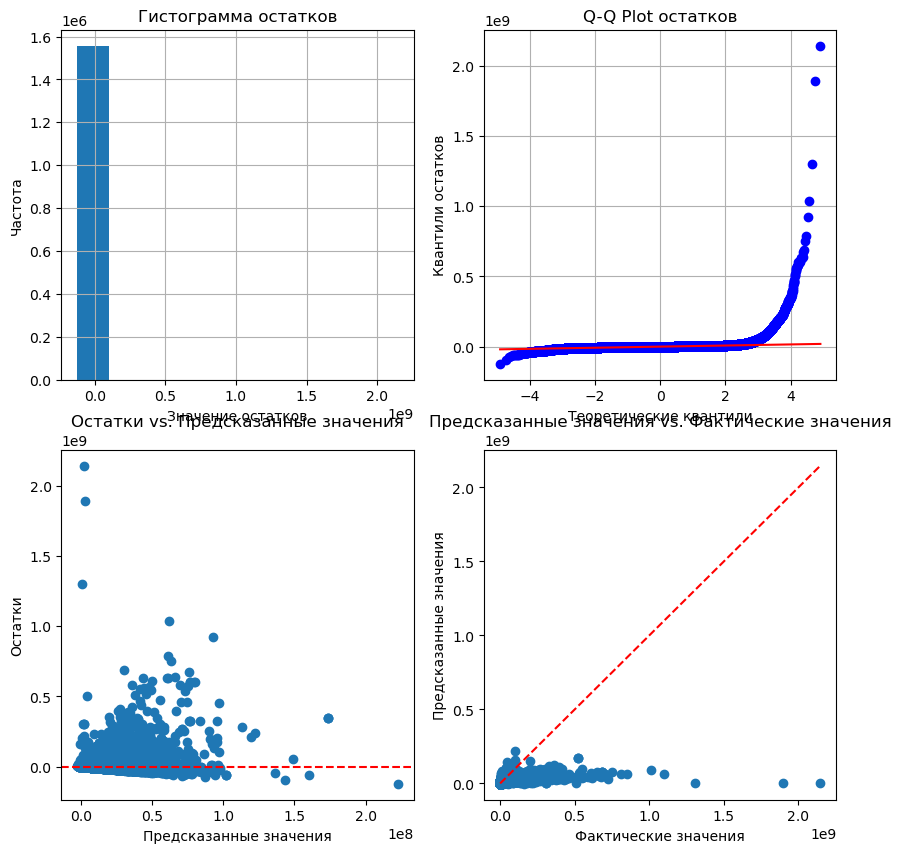

In [91]:
import statsmodels.api as sm

# Получение остатков модели
residuals = y_test - predictions

# Расчет стандартизированных остатков
stand_residuals = (residuals - np.mean(residuals)) / np.std(residuals)
plt.subplots(figsize=(10, 10))


# Распределение остатков
plt.subplot(2, 2, 1)
plt.hist(residuals)
plt.xlabel('Значение остатков')
plt.ylabel('Частота')
plt.title('Гистограмма остатков')
plt.grid(True)


# График остатков vs. предсказанных значений
plt.subplot(2, 2, 2)
st.probplot(residuals, dist='norm', plot=plt)
plt.xlabel('Теоретические квантили')
plt.ylabel('Квантили остатков')
plt.title('Q-Q Plot остатков')
plt.grid(True)

#График остатков относительно прогноза
plt.subplot(2, 2, 3)
plt.scatter(predictions, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('Остатки vs. Предсказанные значения')

# Предсказанные и фактические значения
plt.subplot(2, 2, 4)
plt.scatter(y_test, predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],  "k--", color='r')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Предсказанные значения vs. Фактические значения')

Попробуем посмотреть другие модели. 

XGB - строит сначала предсказания на слабых деревьях, а потом оббединяет их в одну сильную модель. 

Т.к. стоимость квартиры точно зависит от региона, но учесть этот фактор очень сложно, коды, присвоенные регионам, внутренние, не идут по какому-нибудь порядку. Попробуем построить модель для одного региона для начала.

In [92]:
data = df.loc[df['reg_name'] == 'Санкт-Петербург']
data

price        date  region  building_type  level  levels  rooms  \
0        6050000  2018-02-19    2661              1      8      10      3   
1        3600000  2018-03-04    2661              1      2       5      1   
2        3200000  2018-04-10    2661              1      7       9      1   
3        6500000  2018-04-23    2661              3      3       3      3   
4        6300000  2018-04-28    2661              3      5       5      2   
...          ...         ...     ...            ...    ...     ...    ...   
449050   8000000  2021-05-01    2661              1      5       9      3   
449051  12500000  2021-05-01    2661              1      1       9      3   
449052  30000000  2021-05-01    2661              2      4       8      2   
449053   9600000  2021-05-01    2661              3      3       6      3   
449054   4900000  2021-05-01    2661              1      2       5      1   

        area  kitchen_area  object_type         reg_name           pr_m  \
0       82.6          10.8            1  Санкт-Петербург   73244.552058   
1       31.1           6.0            1  Санкт-Петербург  115755.627010   
2       31.0           7.0            1  Санкт-Петербург  103225.806452   
3       89.0          10.0            1  Санкт-Петербург   73033.707865   
4       99.9          14.5            1  Санкт-Петербург   63063.063063   
...      ...           ...          ...              ...            ...   
449050  60.0           6.2            1  Санкт-Петербург  133333.333333   
449051  67.0           6.0            1  Санкт-Петербург  186567.164179   
449052  92.0          21.6            1  Санкт-Петербург  326086.956522   
449053  62.0           8.6            1  Санкт-Петербург  154838.709677   
449054  31.0           6.0            1  Санкт-Петербург  158064.516129   

       year_month  month season month_name  year  season_n  \
0         2018-02      2   Зима    Февраль  2018         1   
1         2018-03      3  Весна       Март  2018         2   
2         2018-04      4  Весна     Апрель  2018         2   
3         2018-04      4  Весна     Апрель  2018         2   
4         2018-04      4  Весна     Апрель  2018         2   
...           ...    ...    ...        ...   ...       ...   
449050    2021-05      5  Весна        Май  2021         2   
449051    2021-05      5  Весна        Май  2021         2   
449052    2021-05      5  Весна        Май  2021         2   
449053    2021-05      5  Весна        Май  2021         2   
449054    2021-05      5  Весна        Май  2021         2   

            building_type_m     sootn  
0                 Панельный  0.130751  
1                 Панельный  0.192926  
2                 Панельный  0.225806  
3                 Кирпичный  0.112360  
4                 Кирпичный  0.145145  
...                     ...       ...  
449050            Панельный  0.103333  
449051            Панельный  0.089552  
449052  Кирпично-монолитный  0.234783  
449053            Кирпичный  0.138710  
449054            Панельный  0.193548  

[449055 rows x 20 columns]

In [93]:
data = data.drop(['date', 'reg_name', 'season', 'month_name', 'year_month', 'building_type_m', 'region', 'pr_m', 'sootn'], axis  = 1)
data.head(1)

price  building_type  level  levels  rooms  area  kitchen_area  \
0  6050000              1      8      10      3  82.6          10.8   

   object_type  month  year  season_n  
0            1      2  2018         1

In [94]:
pip install xgboost

In [228]:
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [325]:
X, y = data.drop('price', axis=1), data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=25)

model = xgb.XGBRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [326]:
print(f'R^2 score: {r2_score(y_test, predictions):.3f}')

R^2 score: 0.756


Если не брать в расчет регион, то можем построить модель на все данные.

In [327]:
df.head(1)

price        date  region  building_type  level  levels  rooms  area  \
0  6050000  2018-02-19    2661              1      8      10      3  82.6   

   kitchen_area  object_type         reg_name          pr_m year_month  month  \
0          10.8            1  Санкт-Петербург  73244.552058    2018-02      2   

  season month_name  year  season_n building_type_m     sootn  
0   Зима    Февраль  2018         1       Панельный  0.130751

In [328]:
df = df.drop(['date', 'region', 'reg_name', 'season', 'month_name', 'year_month', 'building_type_m', 'region', 'pr_m', 'sootn'], axis  = 1)
df.head(1)

price  building_type  level  levels  rooms  area  kitchen_area  \
0  6050000              1      8      10      3  82.6          10.8   

   object_type  month  year  season_n  
0            1      2  2018         1

In [329]:
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [348]:
X, y = df.drop('price', axis=1), df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=27)

model = xgb.XGBRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [349]:
print(f'R^2 score: {r2_score(y_test, predictions):.3f}')

R^2 score: 0.425


Можно заметить, что из-за неучета региона модель сильно снизила точность.

Попробую учесть столбец region.

In [350]:
# загрузим данные
df = pd.read_csv('All1.csv')
df

Unnamed: 0    price        date  region  building_type  level  \
0                 0  6050000  2018-02-19    2661              1      8   
1                 1  3600000  2018-03-04    2661              1      2   
2                 2  3200000  2018-04-10    2661              1      7   
3                 3  6500000  2018-04-23    2661              3      3   
4                 4  6300000  2018-04-28    2661              3      5   
...             ...      ...         ...     ...            ...    ...   
5182750     5182750  3500000  2021-01-28    4963              1      9   
5182751     5182751  3000000  2018-11-29   61888              5      2   
5182752     5182752  6000000  2018-11-30   61888              3      5   
5182753     5182753  3500000  2018-11-30   61888              2      1   
5182754     5182754  5200000  2018-12-01   61888              3      5   

         levels  rooms  area  kitchen_area  object_type  \
0            10      3  82.6          10.8            1   
1             5      1  31.1           6.0            1   
2             9      1  31.0           7.0            1   
3             3      3  89.0          10.0            1   
4             5      2  99.9          14.5            1   
...         ...    ...   ...           ...          ...   
5182750       9      3  66.0          12.0            1   
5182751       2      2  57.0          10.0            1   
5182752       5      2  64.3          16.3            1   
5182753       3      2  59.7          10.2            1   
5182754       5      2  72.5          15.7            1   

                          reg_name           pr_m year_month  month season  \
0                  Санкт-Петербург   73244.552058    2018-02      2   Зима   
1                  Санкт-Петербург  115755.627010    2018-03      3  Весна   
2                  Санкт-Петербург  103225.806452    2018-04      4  Весна   
3                  Санкт-Петербург   73033.707865    2018-04      4  Весна   
4                  Санкт-Петербург   63063.063063    2018-04      4  Весна   
...                            ...            ...        ...    ...    ...   
5182750            Приморский край   53030.303030    2021-01      1   Зима   
5182751  Ненецкий автономный округ   52631.578947    2018-11     11  Осень   
5182752  Ненецкий автономный округ   93312.597201    2018-11     11  Осень   
5182753  Ненецкий автономный округ   58626.465662    2018-11     11  Осень   
5182754  Ненецкий автономный округ   71724.137931    2018-12     12   Зима   

        month_name  year  season_n  
0          Февраль  2018         1  
1             Март  2018         2  
2           Апрель  2018         2  
3           Апрель  2018         2  
4           Апрель  2018         2  
...            ...   ...       ...  
5182750     Январь  2021         1  
5182751     Ноябрь  2018         4  
5182752     Ноябрь  2018         4  
5182753     Ноябрь  2018         4  
5182754    Декабрь  2018         1  

[5182755 rows x 19 columns]

In [351]:
# продолжу редактирование, удалив ненужные столбцы
df = df.drop(labels = ['Unnamed: 0'], axis = 1)
df.head(1)

price        date  region  building_type  level  levels  rooms  area  \
0  6050000  2018-02-19    2661              1      8      10      3  82.6   

   kitchen_area  object_type         reg_name          pr_m year_month  month  \
0          10.8            1  Санкт-Петербург  73244.552058    2018-02      2   

  season month_name  year  season_n  
0   Зима    Февраль  2018         1

In [370]:
X, y = df[['region', 'building_type', 'level', 'area', 'kitchen_area', 'object_type', 'month', 'year']], df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=48)

model = xgb.XGBRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [371]:
print(f'R^2 score: {r2_score(y_test, predictions):.3f}')

R^2 score: 0.629


R^2 увеличилось, но все равно достаточно низкий.

## <a class="anchor" id="40"><div class="alert alert-block alert-info">Выводы:
Была построена модель XGB, которая дала наибольший R² при уточнении региона. Все остальные модели дали слишком маленькую точность, особенно если не учитывать регион (возможно, это связано с тем, что считались самые "дорогие" регионы как выбросы).

[Вернуться к Навигации](#1)

## <a class="anchor" id="40"><div class="alert alert-block alert-info">Общий вывод по работе:
1. Столбец с датой был приведён к нужному типу данных (datetime64[ns]).
2. Были найдены и удалены строки с ценой 0 и отрицательной ценой, что составляло 388 строк (0,0007%).
1. В дополнительном датасете была обнаружена странность: через запятую написаны два кода. Было принято решение в исходном датасете оставить у Республики Крым оба этих кода (7873, 6937)
1. Столбцы были проверены на пропуски. Они оказались только в столбце kitchen_area - 253 696.
2. Было принято решение заполнить этот столбец с помощью построения модели линейной регрессии. При этом, применялся детерминированный подход, который мог переоценить точность прогноза. При заполнении пропусков среднее осталось таким же, а медиана увеличилась на 0,1. При этом я не стала применять стохастический метод, который добавляет шум в данных (чтобы не переоценить точность прогноза), потому что это может и ухудшить данные.
1. Все столбцы были проверены на аномалии, включая новый столбец - цена за м², а также были обработаны связанные столбцы.
2. Были строки, где этаж квартиры больше, чем всего этажей в доме. В таком случаи столбцы были поменяны местами.
3. Были строки, где площадь кухни больше или равна общей площади. Там, где площадь кухни больше, строки поменяли местами. Там, где они равны, строки были удалены.
4. Было обнаружено значение -2 в столбце с комнатами. По средней цене студии и первому квартилю значения до него были заменены на -1, а все следующие на 2.
5. Была вычислена минимальная площадь квартиры - 21, 85, удалены экстремальные выбросы (больше 2000)
6. Минимальная площадь кухни была определена как 5, а максимальная 150.
7. Был создан столбец pr_m с ценой за метр. Для минимальной средней цены за метр был загружен дополнительный датасет, составленный на основе нпа. Минимум был основан на 0,5*минимальное среднее из дополнительного датасета. Также были удалены экстремальные выбросы за исключением 4 регионов: Москва, Санкт-Петербург, Московская область, Ленинградская область. Экстремальных выбросов в цене не оказалось (с учётом площади).
8. Также у каждого материала дома есть максимум этажей, поэтому если этажей было больше нормы, число этажей менялось на максимальный этаж.
1. По анализу средних было выяснено, что самым выгодным временем для покупки квартиры был февраль 2018 года, а для продажи - апрель 2021 года.
2. Выгоднее покупать квартиры летом, а продавать весной.
3. Продавать квартиры лучше в апреле, а покупать в августе.
По результатам анализа факторов, которые влияют на стоимость квартиры, были подтверждены следующие гипотезы:
1. Жильё на первичном рынке стоит дороже, чем на вторичном.
2. Самая высокая цена на жильё в монолитных домах.
3. Чем больше площадь квартиры, тем больше цена на нее.
4. Квартиры в многоэтажных домах стоят дороже, чем в низкоэтажных.
5. Чем выше этаж квартиры, тем она дороже.
6. Чем больше площадь кухни, тем дороже стоимость квартиры.
Также были определены регионы с самой большой ценой за м² (Москва, Московская область, Санкт-Петербург) и с самой низкой ценой за м² (Челябинская область, Курганская область, Республика Калмыкия).
Были выявлены следующие закономерности:
1. Чем меньше соотношение площади кухни к общей площади, тем квартира дороже.
2. Стоимость квартир в Москве больше, чем в Санкт-Петербурге.
3. Была построена модель XGB, которая дала наибольший R² при уточнении региона. Все остальные модели дали слишком маленькую точность, особенно если не учитывать регион (возможно, это связано с тем, что считались самые "дорогие" регионы как выбросы)